# Criteo Dataset (CTR) Prediction

## Introduction
Display advertising is a billion dollar effort and one of the central uses of machine learning on the Internet. However, its data and methods are usually kept under lock and key. In this research competition, CriteoLabs is sharing a week’s worth of data for you to develop models predicting ad click-through rate (CTR). Given a user and the page he is visiting, what is the probability that he will click on a given ad?

All datasets have been anonymized to confirm to privacy standards.

The goal of this challenge is to benchmark the most accurate ML algorithms for CTR estimation



This dataset contains feature values and click feedback for millions of display ads. Its purpose is to benchmark algorithms for clickthrough rate (CTR) prediction. It is similar, but larger, to the dataset released for the Display Advertising Challenge hosted by Kaggle: https://www.kaggle.com/c/criteo-display-ad-challenge

## Dataset construction:
The training dataset consists of a portion of Criteo’s traffic over a period
of 24 days. Each row corresponds to a display ad served by Criteo and the first
column is indicates whether this ad has been clicked or not.
The positive (clicked) and negatives (non-clicked) examples have both been
subsampled (but at different rates) in order to reduce the dataset size.

There are 13 features taking integer values (mostly count features) and 26
categorical features. The values of the categorical features have been hashed
onto 32 bits for anonymization purposes.
The semantic of these features is undisclosed. Some features may have missing values.

The rows are chronologically ordered.
 
## Dataset Format:
The columns are tab separated with the following schema:

"label" "integer feature 1" "integer feature 13 "categorical feature 1" "categorical feature 26"

When a value is missing, the field is just empty.

Difference with the Kaggle challenge dataset:

The dataset is not over the same time period;

The subsampling ratios are different;

The ordering of the features is not the same and the computation of some of them has changed;

The hash function for categorical features is different.
 
## Criteo Download:
The dataset is hosted on Azure ML.
Each day can be downloaded at http://azuremlsampleexperiments.blob.core.windows.net/criteo/day_XX.gz, where XX goes from 0 to 23.

The following command downloads all days:
curl -O http://azuremlsampleexperiments.blob.core.windows.net/criteo/day_{`seq -s ‘,’ 0 23`}.gz
 
Direct access from Azure
The data can be used directly by Azure Machine Learning and Azure HDInsight (Hadoop) users.
In Hive queries on HDInsight, use LOCATION ‘wasb://criteo@azuremlsampleexperiments.blob.core.windows.net/raw/’
(first 21 days are stored in “count” subfolder, last three days in “train” and “test” subfolders).
Azure Machine Learning users can run Hive queries directly via the Reader module, or use Learning with Counts modules.

For more details, please see http://aka.ms/learning-with-counts-mlblog

# Criteo Dataset Description
The Criteo data is a click prediction dataset that is approximately 370GB of gzip compressed TSV files (~1.3TB uncompressed), comprising more than 4.3 billion records. It is taken from 24 days of click data made available by Criteo. For the convenience of data scientists, the data available to us to experiment with has been unzipped.

Each record in this dataset contains 40 columns:

the first column is a label column that indicates whether a user clicks an add (value 1) or does not click one (value 0)
next 13 columns are numeric, and
last 26 are categorical columns
The columns are anonymized and use a series of enumerated names: "Col1" (for the label column) to 'Col40" (for the last categorical column).

## Definition:
Clickthrough rate (CTR): This is the percentage of clicks in the data. In this Criteo dataset, the CTR is about 3.3% or 0.033.

Examples of prediction tasks
Two sample prediction problems are addressed in this walkthrough:

Binary classification: Predicts whether a user clicked an add:

Class 0: No Click
Class 1: Click
Regression: Predicts the probability of an ad click from user features

In [1]:
#For calculating data loading time
import timeit
import datetime as dt
import os
work_PATH = os.getcwd()
script_PATH = '/home/javeed/Jupyter_Projects/SRP/SRP_MY/usefulScripts/'
os.chdir(script_PATH)
%run rePYduce.py numpy pandas matplotlib seaborn scikit-learn
os.chdir(work_PATH)
#Using for numerical Python computation for nd-arrays and matrices
import numpy as np #linear algebra
"""Using for Statistical modeling i.e Data wrangling, shaping, merging, reshaping, and slicing datasets
two main data structures “Series” — one-dimensional “Data Frames”, two-dimensional
Converting data structures to DataFrame objects"""
import pandas as pd
#visualization of statistical models
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('whitegrid')
#Using for plotting # To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
from matplotlib import colors
#plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER_ID = "CRITEO_JUN_28"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", FOLDER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
#Using for scientfic statiscal computing
from scipy import stats
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
warnings.filterwarnings('ignore')


"""for training machine learning model, model fitting, cross validation, Confusion-Matrix-
Compute precision, recall, F-measure and calculating Receiver operating system (ROC)"""
"""
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm, linear_model, datasets
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
"""


'\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.grid_search import GridSearchCV\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.svm import SVC\nfrom sklearn import svm, linear_model, datasets\n#from sklearn.model_selection import cross_val_score\nfrom sklearn.model_selection import train_test_split\n'

In [2]:
# 26 Categorical columns and 13 numerical columns
cat_cols = ['C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22','C23',
       'C24', 'C25', 'C26']

In [3]:
# 13 Integer columns
int_cols = ["I1","I2","I3","I4","I5","I6","I7","I8","I9","I10","I11","I12","I13"]

In [5]:
## loading 5 million records from day 4 of the criteo dataset.
start_time = timeit.default_timer()
day_4 = pd.read_csv('/media/javeed/Downloads/BIG-DATA/day_4/day_4', header = None, encoding = 'utf-8', sep = "\t", index_col = None, nrows = 5000000, 
                    names = ["Label","I1","I2","I3","I4","I5","I6","I7","I8","I9","I10","I11","I12","I13","C1","C2","C3","C4","C5","C6","C7","C8","C9","C10","C11","C12","C13","C14","C15","C16","C17","C18","C19","C20","C21","C22","C23","C24","C25","C26"])

In [6]:
print('Overall Time taken for loading 5 million record was: %0.2f seconds' %(timeit.default_timer() - start_time))

Overall Time taken for loading 5 million record was: 28.91 seconds


In [7]:
## Overall Time was 102.78 seconds which is 1 min and 43 secounds
## Overall Time: 159.15, 143.84
#https://pandas.pydata.org/pandas-docs/stable/10min.html
#import timeit
#start_time = timeit.default_timer()
######## INSERT YOUR PIECE OF CODE THAT YOU WANT TO TIME ######
#print('Overall Time to run was: %0.2f seconds' %(timeit.default_timer() - start_time))

In [8]:
day_4.head()

Label    I1     I2    I3     I4   I5   I6   I7   I8  I9    ...     \
0      0   6.0   26.0   1.0    NaN  NaN  0.0  1.0  184   6    ...      
1      0   NaN  160.0   3.0    3.0  9.0  3.0  0.0   12   3    ...      
2      0   2.0   31.0   NaN    NaN  NaN  0.0  0.0    2   4    ...      
3      0   NaN  519.0   NaN   67.0  1.0  0.0  0.0   -1  27    ...      
4      0  97.0  209.0  49.0  376.0  1.0  0.0  0.0    6  48    ...      

        C17       C18       C19       C20       C21       C22       C23  \
0  753da5f3  a1eb1511  9512c20b       NaN       NaN       NaN  30254c7c   
1  d20856aa  b8170bba  9512c20b  42c42eca  d7cb911e  c3b50cb2  aa59c5e7   
2  1f7fc70b  a1eb1511  9512c20b  788b608e  8277789b  967187f0  e355781a   
3  d20856aa  a1eb1511  9512c20b  083f581c  5731c43e  be98cd91  f717c6be   
4  753da5f3  a1eb1511  9512c20b  d681c7c2  271871ef  05192a01  e341c9be   

        C24       C25       C26  
0  efcf1636  991321ea  2ccea557  
1  655b7591  0b3c06d0  6c730e3e  
2  31972574  57e36578  b757e957  
3  6a4b1ed3  cdc3217e  962813c6  
4  ef9ab7d5  30436bfc  2ccea557  

[5 rows x 40 columns]

In [9]:
day_4.tail(5)

Label     I1      I2    I3    I4     I5   I6   I7   I8  I9    ...     \
4999995      1    6.0   598.0   1.0   1.0  108.0  1.0  0.0   13   2    ...      
4999996      0   23.0     NaN  18.0  18.0    NaN  8.0  0.0   34  19    ...      
4999997      0  135.0  2271.0  15.0   NaN   16.0  0.0  0.0  177   5    ...      
4999998      0    5.0   243.0   NaN  31.0    1.0  0.0  0.0  417   2    ...      
4999999      0    NaN    21.0   NaN  16.0    NaN  0.0  0.0    1   0    ...      

              C17       C18       C19       C20       C21       C22       C23  \
4999995       NaN  17861b30  108a0699  47849e55  73b3f46d  d994ba60       NaN   
4999996  1f7fc70b  b8170bba  139221a3  a03f31a9  f9a1d79a  5b4a4dde  c6f7e69e   
4999997  d20856aa  d9f758ff  cc7a7d35  156cbe87  96fbe197  15562d5d  d3df7183   
4999998  d20856aa  628f1b8d  9512c20b  708f790d  e54fc1bc  ca3fba16  d7c1fc0b   
4999999  d20856aa  b8170bba  cc7a7d35  156cbe87  96fbe197  15562d5d  d3df7183   

              C24       C25       C26  
4999995  8c573d44  30436bfc  2ba8d787  
4999996  541ffe6c  ff654802  962813c6  
4999997  5dea4c3e  30436bfc  e1be5ef2  
4999998  900d6be5  30436bfc  b757e957  
4999999  1eaafedd  30436bfc  e1be5ef2  

[5 rows x 40 columns]

In [10]:
day_4.index

RangeIndex(start=0, stop=5000000, step=1)

In [11]:
day_4.columns

Index(['Label', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10',
       'I11', 'I12', 'I13', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18',
       'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26'],
      dtype='object')

In [12]:
# don't run 
#day_4.values

In [13]:
day_4.describe()
#Transposing data
#day_4.T
# 4th row for minimum and 7th row for maximum values

Label            I1            I2            I3            I4  \
count  5.000000e+06  4.049669e+06  4.535580e+06  3.735021e+06  2.818145e+06   
mean   3.348300e-02  4.030111e+01  4.643857e+02  7.411426e+00  1.551565e+02   
std    1.798941e-01  5.104700e+02  8.148055e+02  1.022803e+01  7.900081e+02   
min    0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  3.000000e+00  6.200000e+01  2.000000e+00  1.000000e+01   
50%    0.000000e+00  8.000000e+00  2.000000e+02  4.000000e+00  3.400000e+01   
75%    0.000000e+00  2.500000e+01  5.300000e+02  9.000000e+00  1.030000e+02   
max    1.000000e+00  6.553500e+04  8.000000e+03  6.190000e+02  2.648250e+05   

                 I5            I6            I7            I8            I9  \
count  2.907195e+06  4.536158e+06  4.823432e+06  5.000000e+06  5.000000e+06   
mean   2.291442e+01  1.403149e+00  1.565238e-01  1.117240e+02  9.543782e+00   
std    7.764501e+01  6.608944e+00  2.834126e+00  3.769866e+02  1.382593e+01   
min    1.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00  0.000000e+00   
25%    2.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00   
50%    6.000000e+00  0.000000e+00  0.000000e+00  6.000000e+00  4.000000e+00   
75%    1.700000e+01  0.000000e+00  0.000000e+00  5.400000e+01  1.400000e+01   
max    7.965000e+03  2.399000e+03  3.579000e+03  2.009900e+04  1.867000e+03   

                I10           I11           I12           I13  
count  4.536158e+06  2.907195e+06  4.926204e+06  3.735021e+06  
mean   2.380118e-01  4.289207e+00  2.212940e+04  9.517800e+00  
std    5.180527e-01  7.437808e+00  7.466045e+04  2.425912e+01  
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  1.000000e+00  6.100000e+02  2.000000e+00  
50%    0.000000e+00  2.000000e+00  3.062000e+03  5.000000e+00  
75%    0.000000e+00  4.000000e+00  1.280400e+04  1.100000e+01  
max    1.000000e+01  2.150000e+02  2.627004e+06  9.361000e+03

In [14]:
day_4.groupby('Label').sum()

I1            I2          I3           I4          I5  \
Label                                                                   
0      160045602.0  2.044321e+09  26971993.0  427579449.0  61954483.0   
1        3160563.0  6.193766e+07    709839.0    9674088.0   4662190.0   

              I6        I7         I8        I9        I10         I11  \
Label                                                                    
0      5933701.0  707208.0  536547185  46133972  1012255.0  11669889.0   
1       431206.0   47774.0   22072908   1584939    67404.0    799671.0   

                I12         I13  
Label                            
0      1.073275e+11  34812304.0  
1      1.686447e+09    736879.0

In [15]:
#day_4.groupby('I2').sum()

In [16]:
#day_4.groupby('I9').sum()

In [17]:
day_4.Label.value_counts()

0    4832585
1     167415
Name: Label, dtype: int64

In [18]:
"""
day_4.tail(5)
day_4.index
day_4.columns
day_4.describe()
day_4.groupby('Label').sum()
day_4.dtypes
day_4.Label.value_counts()
day_4.shape
day_4.Label.hist(color = "darkgreen")
"""

'\nday_4.tail(5)\nday_4.index\nday_4.columns\nday_4.describe()\nday_4.groupby(\'Label\').sum()\nday_4.dtypes\nday_4.Label.value_counts()\nday_4.shape\nday_4.Label.hist(color = "darkgreen")\n'

In [19]:
#5 million rows and 40 features
day_4.shape

(5000000, 40)

In [20]:
#writing in a csv file (Writing For other memebers)
day_4.to_csv('day_4_5M.csv', sep='\t', encoding='utf-8')

Saving figure label_histogram_plots


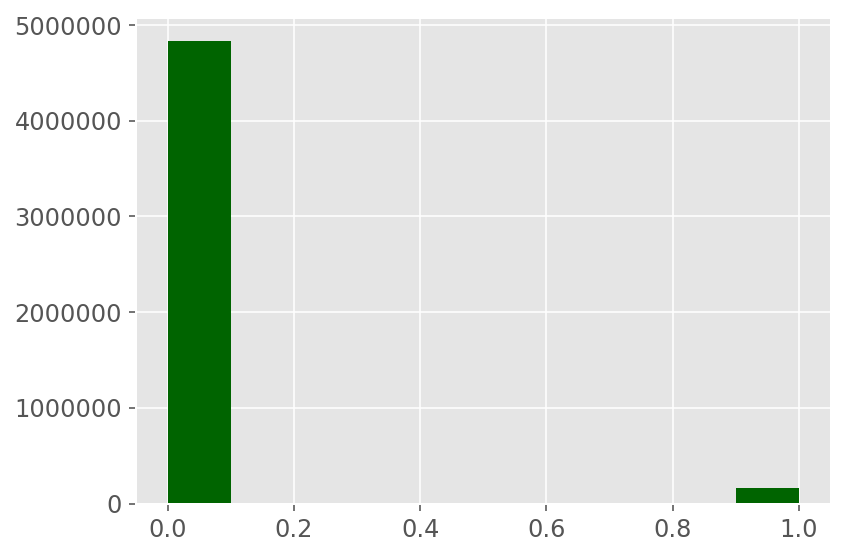

In [22]:
## I can see the data is unbalanced. So many more 0's than 1's. 
## Lets do a quick histogram on 'Label'
#for line width lw = 0, for edge color ec="skyblue"
day_4.Label.hist(color = "darkgreen")
#plt.hist(day_21.Label, color = "skyblue", ec="skyblue")
# A picture speak louder than a thousnad words
save_fig("label_histogram_plots")
plt.show()

Saving figure I1_histogram_plots


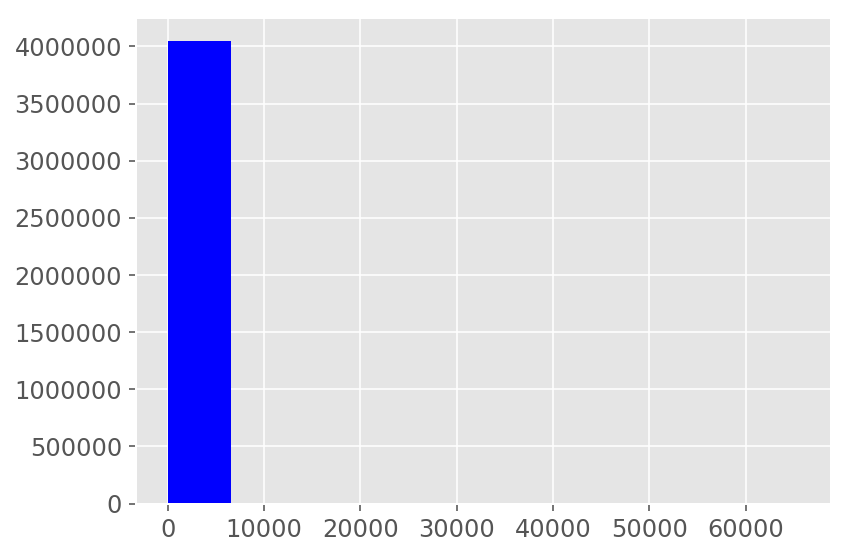

In [23]:
day_4.I1.hist(color = "blue")
save_fig("I1_histogram_plots")
plt.show()
#plt.hist(day_4.I1, color = "skyblue", ec="skyblue")

Saving figure I2_histogram_plots


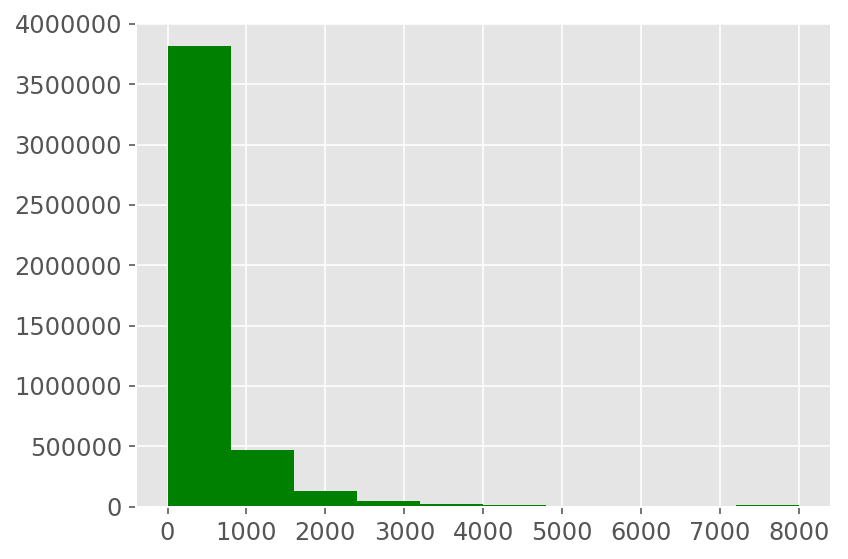

In [24]:
day_4.I2.hist(color = "green")
save_fig("I2_histogram_plots")
plt.show()

Saving figure I3_histogram_plots


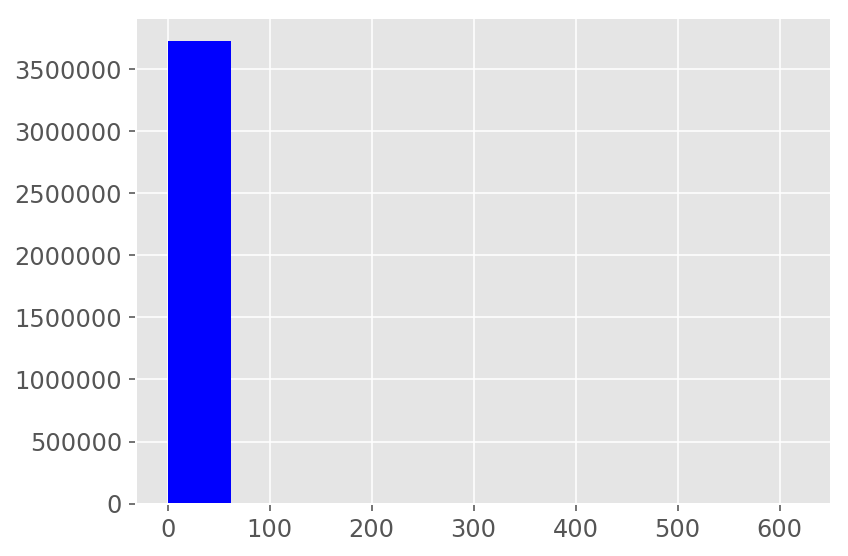

In [25]:
day_4.I3.hist(color = "blue")
save_fig("I3_histogram_plots")
plt.show()

Saving figure I4_histogram_plots


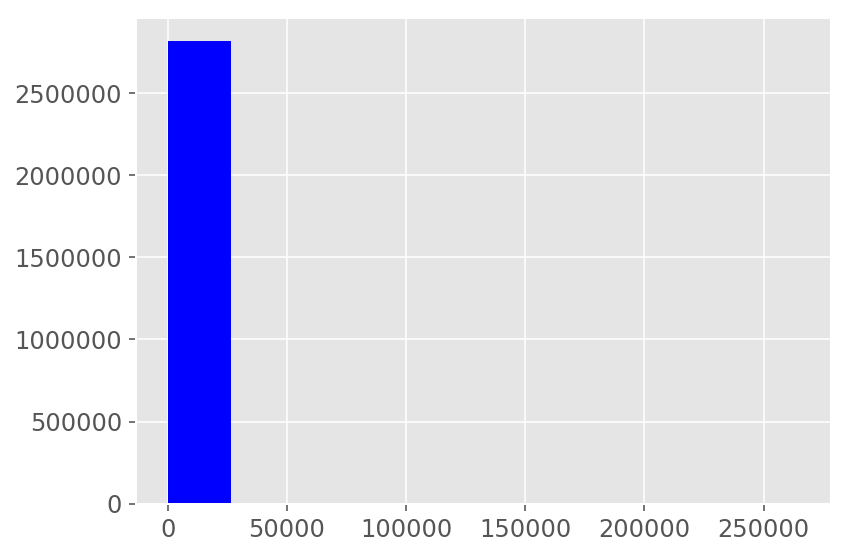

In [26]:
day_4.I4.hist(color = "blue")
save_fig("I4_histogram_plots")
plt.show()

Saving figure I5_histogram_plots


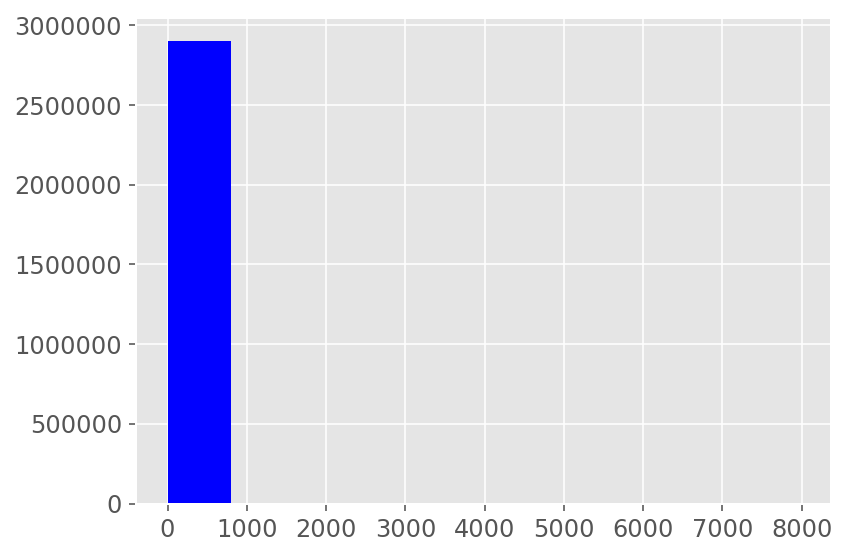

In [27]:
day_4.I5.hist(color = "blue")
save_fig("I5_histogram_plots")
plt.show()

Saving figure I6_histogram_plots


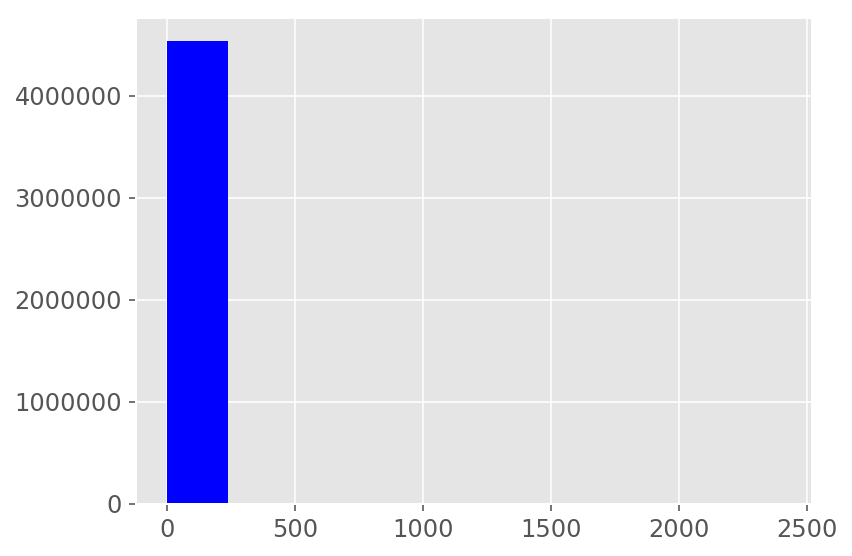

In [28]:
day_4.I6.hist(color = "blue")
save_fig("I6_histogram_plots")
plt.show()

Saving figure I7_histogram_plots


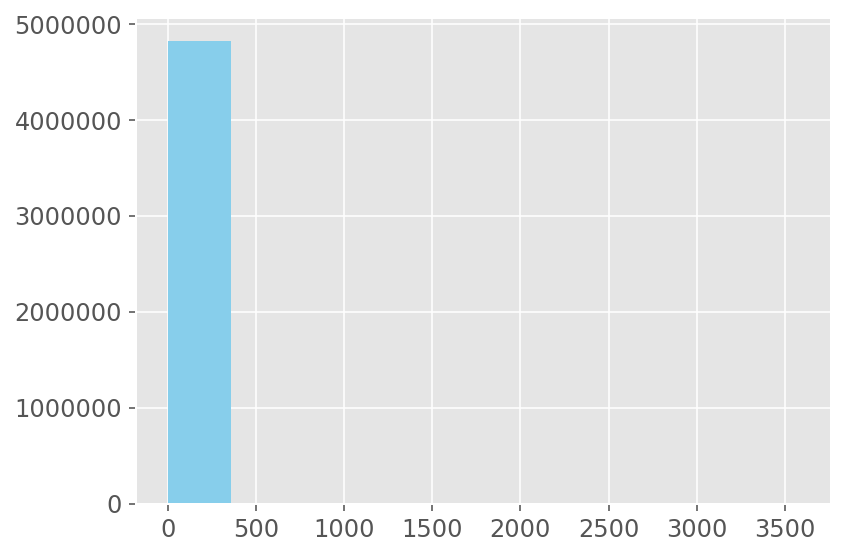

In [29]:
day_4.I7.hist(color = "skyblue")
save_fig("I7_histogram_plots")
plt.show()

Saving figure I8_histogram_plots


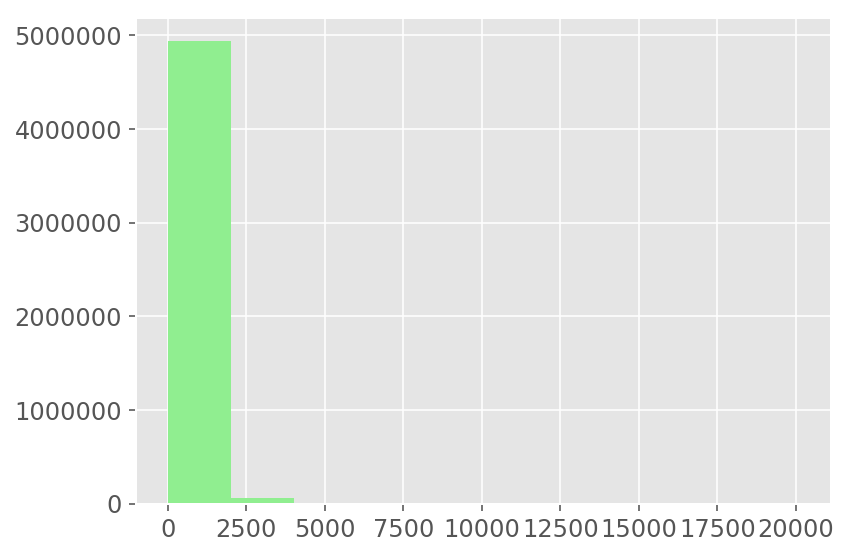

In [30]:
day_4.I8.hist(color = "lightgreen")
save_fig("I8_histogram_plots")
plt.show()

Saving figure I12_histogram_plots


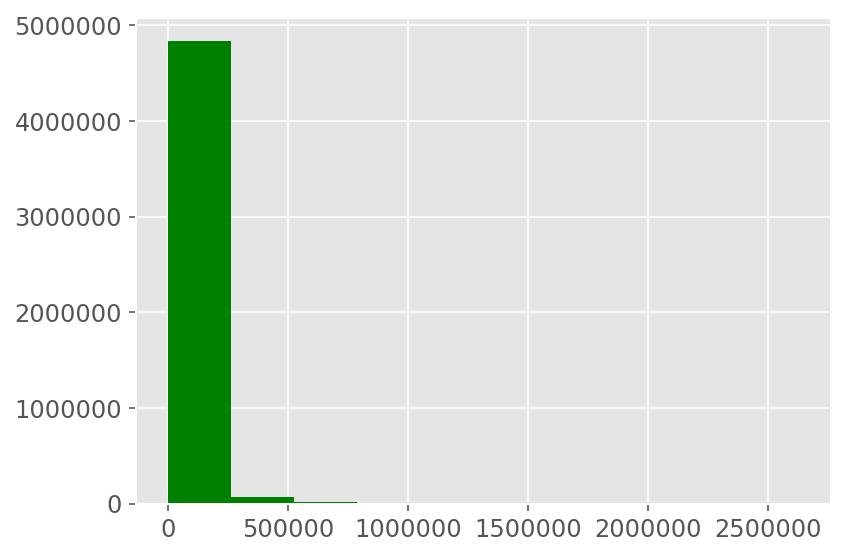

In [31]:
day_4.I12.hist(color = "green")
save_fig("I12_histogram_plots")
plt.show()

Saving figure I13_histogram_plots


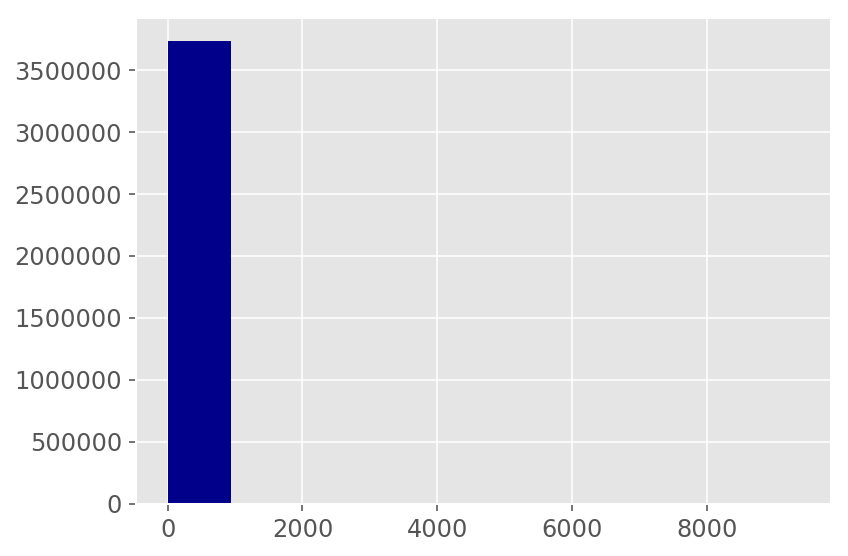

In [32]:
day_4.I13.hist(color = "darkblue")
save_fig("I13_histogram_plots")
plt.show()

In [33]:
"""Next I took a closer look at the data.
The histogram of the response column show an extremely ""unbalanced classification problem"".
We decided to work with Logistic Regression, Decision tree classifier and Random Forest.
Looking at the anonymized data made me think twice about this data, but I was also excited to explore and learn."""

'Next I took a closer look at the data.\nThe histogram of the response column show an extremely ""unbalanced classification problem"".\nWe decided to work with Logistic Regression, Decision tree classifier and Random Forest.\nLooking at the anonymized data made me think twice about this data, but I was also excited to explore and learn.'

In [34]:
""""
From the data description, lets look at the data types. We are expecting to find 13 numerical
columns with count data and 26 columns of hashed categorical columns along with a column
containing click (1) and no click (0) in a column called 'Label'"""
day_4.dtypes

Label      int64
I1       float64
I2       float64
I3       float64
I4       float64
I5       float64
I6       float64
I7       float64
I8         int64
I9         int64
I10      float64
I11      float64
I12      float64
I13      float64
C1        object
C2        object
C3        object
C4        object
C5        object
C6        object
C7        object
C8        object
C9        object
C10       object
C11       object
C12       object
C13       object
C14       object
C15       object
C16       object
C17       object
C18       object
C19       object
C20       object
C21       object
C22       object
C23       object
C24       object
C25       object
C26       object
dtype: object

In [35]:
## Ok, This looks as expected. Lets look at the numerical columns.  
day_4.head(5)

Label    I1     I2    I3     I4   I5   I6   I7   I8  I9    ...     \
0      0   6.0   26.0   1.0    NaN  NaN  0.0  1.0  184   6    ...      
1      0   NaN  160.0   3.0    3.0  9.0  3.0  0.0   12   3    ...      
2      0   2.0   31.0   NaN    NaN  NaN  0.0  0.0    2   4    ...      
3      0   NaN  519.0   NaN   67.0  1.0  0.0  0.0   -1  27    ...      
4      0  97.0  209.0  49.0  376.0  1.0  0.0  0.0    6  48    ...      

        C17       C18       C19       C20       C21       C22       C23  \
0  753da5f3  a1eb1511  9512c20b       NaN       NaN       NaN  30254c7c   
1  d20856aa  b8170bba  9512c20b  42c42eca  d7cb911e  c3b50cb2  aa59c5e7   
2  1f7fc70b  a1eb1511  9512c20b  788b608e  8277789b  967187f0  e355781a   
3  d20856aa  a1eb1511  9512c20b  083f581c  5731c43e  be98cd91  f717c6be   
4  753da5f3  a1eb1511  9512c20b  d681c7c2  271871ef  05192a01  e341c9be   

        C24       C25       C26  
0  efcf1636  991321ea  2ccea557  
1  655b7591  0b3c06d0  6c730e3e  
2  31972574  57e36578  b757e957  
3  6a4b1ed3  cdc3217e  962813c6  
4  ef9ab7d5  30436bfc  2ccea557  

[5 rows x 40 columns]

In [36]:
def float_num_counts(data):      
    #Filter float64 numerical variables
    numerical_columns = [x for x in data.dtypes.index if data.dtypes[x] == 'float64']
    #Print frequency of categories
    for col in numerical_columns:
        print('\nContinuous value or discrete value for varible ==> %s'%col)
        print(data[col].value_counts(10))

In [37]:
float_num_counts(day_4)


Continuous value or discrete value for varible ==> I1
1.0       1.338243e-01
2.0       9.301526e-02
3.0       7.197601e-02
4.0       5.755927e-02
5.0       4.821505e-02
6.0       4.017464e-02
7.0       3.514756e-02
8.0       3.047656e-02
9.0       2.726544e-02
10.0      2.406394e-02
11.0      2.164103e-02
12.0      1.927269e-02
13.0      1.804098e-02
14.0      1.645814e-02
15.0      1.494542e-02
16.0      1.407473e-02
17.0      1.300872e-02
18.0      1.194715e-02
19.0      1.162095e-02
20.0      1.069371e-02
21.0      1.005934e-02
22.0      9.418054e-03
23.0      8.774050e-03
24.0      8.234747e-03
25.0      7.874471e-03
26.0      7.353440e-03
27.0      7.290719e-03
28.0      6.845498e-03
29.0      6.570167e-03
30.0      6.242732e-03
              ...     
5245.0    2.469338e-07
5250.0    2.469338e-07
5152.0    2.469338e-07
5254.0    2.469338e-07
5256.0    2.469338e-07
5259.0    2.469338e-07
5263.0    2.469338e-07
5267.0    2.469338e-07
5269.0    2.469338e-07
5274.0    2.469338e-07
52

0.0       9.480374e-01
1.0       3.240597e-02
2.0       8.477366e-03
3.0       3.358812e-03
4.0       1.900514e-03
5.0       1.102742e-03
6.0       8.247240e-04
7.0       5.701335e-04
8.0       4.612898e-04
9.0       3.356531e-04
10.0      3.006158e-04
11.0      2.324071e-04
12.0      1.971625e-04
13.0      1.664790e-04
14.0      1.364174e-04
15.0      1.212829e-04
16.0      9.433117e-05
17.0      8.914814e-05
18.0      8.748957e-05
19.0      7.691619e-05
20.0      7.235512e-05
21.0      6.820869e-05
22.0      5.514746e-05
23.0      5.141567e-05
26.0      3.648854e-05
24.0      3.524461e-05
25.0      3.482997e-05
28.0      3.400069e-05
29.0      3.234212e-05
27.0      2.881766e-05
              ...     
411.0     2.073213e-07
512.0     2.073213e-07
243.0     2.073213e-07
129.0     2.073213e-07
994.0     2.073213e-07
225.0     2.073213e-07
141.0     2.073213e-07
144.0     2.073213e-07
145.0     2.073213e-07
146.0     2.073213e-07
156.0     2.073213e-07
160.0     2.073213e-07
161.0     2

In [38]:
def int_num_counts(data):      
    #Filter int64 numerical variables
    numerical_columns = [x for x in data.dtypes.index if data.dtypes[x] == 'int64']
    #Print frequency of categories
    for col in numerical_columns:
        print('\nContinuous value or discrete value for varible ==> %s'%col)
        print(data[col].value_counts(10))

In [39]:
int_num_counts(day_4)


Continuous value or discrete value for varible ==> Label
0    0.966517
1    0.033483
Name: Label, dtype: float64

Continuous value or discrete value for varible ==> I8
 0        1.761964e-01
 1        1.192130e-01
-1        6.745660e-02
 2        6.033780e-02
 3        3.298120e-02
 4        2.219660e-02
 5        1.771480e-02
 6        1.535000e-02
 7        1.347400e-02
 8        1.207540e-02
 9        1.092120e-02
 10       1.028400e-02
 11       9.497600e-03
 12       8.760400e-03
 13       8.122400e-03
 14       7.657400e-03
 15       7.229600e-03
 16       6.897600e-03
 17       6.477800e-03
 18       6.089000e-03
 19       5.967600e-03
 20       5.648600e-03
 21       5.388800e-03
 22       5.212400e-03
 23       4.865200e-03
 30       4.725400e-03
 24       4.720200e-03
 31       4.654400e-03
 25       4.578000e-03
 26       4.419800e-03
              ...     
 6328     2.000000e-07
 10422    2.000000e-07
 4738     2.000000e-07
 6320     2.000000e-07
 6323     2.000000e-07
 88

In [40]:
## Number of nulls, distinct values, and counts per column
def df_counts(df):
    print('Dataset shape: %d rows, %d cols\n' % df.shape)
    print('\n|============================================================================|\n')
    print('column wise info:')
    for col in df.columns:
        print('* %s: %d nulls, %d unique vals, most common: %s' % (
            col, 
            df[col].isnull().sum(),
            df[col].nunique(),
            df[col].value_counts().head(2).to_dict()         
        ))
    print('\n|============================================================================|\n')
## Number of nulls, distinct values, and counts per column

In [41]:
## There are definitely buckets of similiar values. Many of the top counts are a huge percentage
## of the data. Lets take a look at nulls, unique values and most common
df_counts(day_4)

Dataset shape: 5000000 rows, 40 cols


|============================================================================|

column wise info:
* Label: 0 nulls, 2 unique vals, most common: {0: 4832585, 1: 167415}
* I1: 950331 nulls, 5708 unique vals, most common: {1.0: 541944, 2.0: 376681}
* I2: 464420 nulls, 7714 unique vals, most common: {1.0: 50141, 2.0: 40064}
* I3: 1264979 nulls, 450 unique vals, most common: {1.0: 650520, 2.0: 493457}
* I4: 2181855 nulls, 9808 unique vals, most common: {0.0: 139409, 1.0: 81039}
* I5: 2092805 nulls, 1939 unique vals, most common: {1.0: 521568, 2.0: 340799}
* I6: 463842 nulls, 326 unique vals, most common: {0.0: 3519358, 1.0: 324029}
* I7: 176568 nulls, 217 unique vals, most common: {0.0: 4572794, 1.0: 156308}
* I8: 0 nulls, 5321 unique vals, most common: {0: 880982, 1: 596065}
* I9: 0 nulls, 521 unique vals, most common: {0: 1156639, 1: 448394}
* I10: 463842 nulls, 11 unique vals, most common: {0.0: 3616140, 1.0: 790248}
* I11: 2092805 nulls, 165 unique

In [42]:
## With discrete numerical variables I will look at binning and other relationships. ## There are 
## some categorial columns with high number of nulls.
### We are going to collect our data and oversample the Label feature so the model can learn better.
### We are also going to take a look at the categorical columns.

In [43]:
## Examining the unique values and their length for patterns (with actual data day_4)
for i in cat_cols:
    length = len(day_4[i].unique())
    if length < 100:
        print('Length: ', length)
        print('Integer Column: ',i)
        print(day_4[i].unique())
        print()
        print('|======================|')
        print()
    elif length > 99 & length <500:
        print('Length:', length)
        print('Integer Column: ',i)
        print(day_4[i].unique())
        print()
        print('|======================|')
        print()

Length: 749073
Integer Column:  C1
[nan 'f910f6e7' '9145443c' ... '709ac5a5' 'cb3a7144' '78063213']

|======================|

Length: 18515
Integer Column:  C2
['7a06385f' 'b08a122f' 'f21f7a0a' ... '6e049182' 'b12038cb' '6cc6e57e']

|======================|

Length: 13550
Integer Column:  C3
['661fdda2' '06e490ef' '4b794cbe' ... 'dcdde55b' '608ce02f' '0df4b07d']

|======================|

Length: 6827
Integer Column:  C4
['43653b6c' '80b7260b' 'f2463ffb' ... '3d0a9c1e' 'baad75c4' 'e38b462b']

|======================|

Length: 18354
Integer Column:  C5
['9813d341' '729e35ab' '76a35846' ... '59757f5a' '28897840' '748549b7']

|======================|

Length:  3
Integer Column:  C6
['6fcd6dcb' '919c68e4' '80b15496']

|======================|

Length: 6380
Integer Column:  C7
['186d18b9' 'f56c180b' 'cc649556' ... 'eb144292' '9c24e3e2' '0ac10eba']

|======================|

Length: 1234
Integer Column:  C8
['670da99c' 'c160c0f0' 'a77d6062' ... '050e9433' '49e18a3c' '791dfd43']

|==========

Length:  14
Integer Column:  C19
['9512c20b' 'b49a729d' '108a0699' 'cc7a7d35' '34879027' '139221a3'
 '1889c49d' '55191c09' '0a1d513f' '09c8c22c' '64083ab9' '7a7178b2'
 'fbbb426d' 'ff4b7387']

|======================|

Length: 792725
Integer Column:  C20
[nan '42c42eca' '788b608e' ... '5b189ffe' '74555462' '38a44019']

|======================|

Length: 270008
Integer Column:  C21
[nan 'd7cb911e' '8277789b' ... 'da1e035c' '9583e26c' '82cf8a98']

|======================|

Length: 670609
Integer Column:  C22
[nan 'c3b50cb2' '967187f0' ... 'ccea6730' '5efec7ad' '9ae725e2']

|======================|

Length: 67768
Integer Column:  C23
['30254c7c' 'aa59c5e7' 'e355781a' ... '01aded43' '23b3a1b1' '17a73ae8']

|======================|

Length: 8958
Integer Column:  C24
['efcf1636' '655b7591' '31972574' ... '27bbb129' 'f1bc3417' 'b28b4531']

|======================|

Length:  74
Integer Column:  C25
['991321ea' '0b3c06d0' '57e36578' 'cdc3217e' '30436bfc' 'ff654802'
 'e5cb08fd' '337b81aa' '321935c

In [44]:
## Some categorical columns have many unique values (high dimentionality) and some have few.
day_4.shape

(5000000, 40)

In [45]:
## To oversample on the 1's we will pick out all the ones from the current dataset.
#Picking all one's into new dataframe
day_4_1 = day_4[day_4.Label == 1 ]

In [46]:
#Dimension for label 1 in one million datset
day_4_1.shape

(167415, 40)

## In a 5 Million records we are having 167.415K (thousands) One's and 4832.585K Zero's

In [47]:
# Save that dataset to df1
df1 = day_4_1

In [48]:
# Pick a random 500K from 5 million
chosen_idx = np.random.choice(5000000, replace=False, size=5000000)
df2 = day_4.iloc[chosen_idx]
df2.head(5)

Label    I1     I2   I3    I4    I5   I6   I7   I8  I9    ...     \
4038147      0   3.0  177.0  6.0  48.0   2.0  0.0  0.0    8  12    ...      
2782994      0  53.0   56.0  4.0   NaN   NaN  0.0  0.0    0  13    ...      
4569587      0   2.0   41.0  NaN   NaN   NaN  0.0  0.0    2   0    ...      
1470803      0   1.0  121.0  3.0   4.0   3.0  1.0  0.0    0   2    ...      
123882       0   1.0  556.0  2.0   NaN  13.0  0.0  0.0  104  17    ...      

              C17       C18       C19       C20       C21       C22       C23  \
4038147  d20856aa  b8170bba  139221a3  6156099e  9574c320  a409e683  d7c1fc0b   
2782994  1f7fc70b  7232d217  9512c20b  3cf46b7e  fd8203d2  fbf3cf4a  1215a843   
4569587       NaN  b8170bba  9512c20b  0c310f79  fb4561dc  d1ce530d       NaN   
1470803       NaN  b8170bba  9512c20b  20e4d612  2d1edf25  ea4af3a6       NaN   
123882   d20856aa  3c328ca5  cc7a7d35  156cbe87  96fbe197  15562d5d  d3df7183   

              C24       C25       C26  
4038147  f3a1835d  ff654802  b757e957  
2782994  b7630505  321935cd  6c730e3e  
4569587  59c61d47  337b81aa  b757e957  
1470803  a1b026f8  30436bfc  b757e957  
123882   20f66bed  30436bfc  e1be5ef2  

[5 rows x 40 columns]

In [49]:
df2.shape

(5000000, 40)

In [50]:
## Taking a look at the unique values in the integer columns (with random generated 500K from 5 million dataset)
for i in int_cols:
    length = len(df2[i].unique())
    if length < 100:
        print('Length: ', length)
        print('Integer Column: ',i)
        print(df2[i].unique())
        print()
        print('|========================|')
        print()
    elif length > 99 & length <500:
        print('Length:', length)
        print('Integer Column: ',i)
        print(df2[i].unique())
        print()
        print('|========================|')
        print()

Length: 5709
Integer Column:  I1
[3.000e+00 5.300e+01 2.000e+00 ... 8.163e+03 6.270e+03 7.346e+03]

|========================|

Length: 7715
Integer Column:  I2
[ 177.   56.   41. ... 5720. 7025. 6478.]

|========================|

Length: 451
Integer Column:  I3
[  6.   4.  nan   3.   2.   1.  18.  12.   5.   0.  30.  17.  16.  39.
  11.  44.  15.   9.  19.   7.  24.  10.  32.  25.   8.  13.  21.  23.
  28.  20.  56.  51.  14.  22.  31.  29.  40.  42.  41.  38.  35.  47.
  34.  43.  27.  70.  33.  26. 129.  45.  74.  36.  49.  59.  37.  96.
 107.  92.  50.  98.  48.  57.  46.  52.  62.  61.  68.  79. 139.  69.
  53. 142.  66.  63.  89.  55.  54. 159.  65.  81. 113. 103.  73.  77.
  72.  60.  82.  97.  83.  90.  85.  91. 122. 176. 186. 611.  71.  78.
  58. 157. 127. 165. 169. 115. 220.  93.  75. 372. 146.  94. 257. 102.
 104.  64.  76. 439.  80. 136.  67.  95. 240. 114. 105. 395. 320.  86.
  87. 128. 119. 154. 118. 161. 429. 106.  88. 121. 150. 111. 132. 110.
 338. 100. 205. 163. 160. 

[  1.  nan   2.  10.   4.  12.   5.   6.   3.   9.  11.   8.  34.   7.
  18.  56.  15.  38.  14.  19.  32.  13.  43.  16.  21.  23.  31.  28.
  42.  24.  49.  26.  59.  50.  81.  37.  22.  40.  20.  52.  36.  17.
  70.  66.  44.  46.  29. 125.  55.  27.  35.  57.  47.  91.  48.  39.
  30.  73.  45. 101.  25.  33.  53.  83. 100.  94. 133.  41.  69.  62.
  60.  78.  75.  65.  61.  67.  54.  71.  58.  64. 109.  51.  74.  68.
  79. 112.  63.  99.  88.  80.  77.  89.  93. 110. 137.  76.  72. 131.
  82. 119. 107.  86. 126.  85.  84. 103.  92. 111. 118.  87. 124. 113.
  90.  95. 105.  98. 166. 115. 120. 104. 147. 108. 130. 102. 145. 135.
  96. 189. 129. 134. 160. 141.  97. 151. 106. 123. 116. 114. 117. 162.
 138. 127. 140. 136. 122. 142. 144. 121. 215. 146. 128. 153. 156. 154.
 143. 132. 150. 168. 165. 139. 152. 155. 157. 171. 184. 159.]

|========================|

Length: 215898
Integer Column:  I12
[  3474.    864.   2082. ... 194459. 223702. 314321.]

|========================|

Length: 7

In [51]:
## Took the below out of model for now.
## found categorical values and integer are related to each other where there is a correlation
## of 1's. Create new features
"""
Length:  10
Integer Column:  C13
['#f4fc3c5e' '#26bb0b02' '6397311a' '00c5ffb7' '#a77a4a56' '#bf78d0d4'
 '405ca118' '#d49eb1df' 'e07cc34d' '62659fcd']
"""
"""
Continuous value or discrete value for varible ==> I10
0.0     7.971812e-01
1.0     1.742109e-01
2.0     2.338896e-02
3.0     4.141390e-03
4.0     8.498381e-04
5.0     1.785652e-04
6.0     3.946071e-05
7.0     8.377133e-06
8.0     8.818035e-07
10.0    2.204509e-07
9.0     2.204509e-07
Name: I10, dtype: float64
"""
i = 10
new = (df2.I10<=i) & (df2.C13=='bf78d0d4')

df2['new_feat1']=0
df2.loc[new,'new_feat1']=1
df2['new_feat1'].value_counts().to_frame()

new = (df2.I10<=i) & (df2.C13=='d49eb1df') 
df2['new_feat2']=0
df2.loc[new,'new_feat2']=1
df2['new_feat2'].value_counts().to_frame()

new = (df2.I10<=i) & (df2.C13=='f4fc3c5e') 
df2['new_feat3']=0
df2.loc[new,'new_feat3']=1
df2['new_feat3'].value_counts().to_frame()

new = (df2.I10<=i) &  (df2.C13=='26bb0b02')  
df2['new_feat4']=0
df2.loc[new,'new_feat4']=1
df2['new_feat4'].value_counts().to_frame()

new = (df2.I10<=i) &  (df2.C13 == 'a77a4a56')  
df2['new_feat5']=0
df2.loc[new,'new_feat5']=1
df2['new_feat5'].value_counts().to_frame()

df2['new_feat6'] = 0
new = (df2.I7>=10*0.9) & (df2.I10>=2)
df2.loc[new,'new_feat6']=1
df2['new_feat6'].value_counts().to_frame()

new =  (df2.I6>=40) & (df2.I7>=15)

df2.loc[new,'new_feat6']=1
df2['new_feat6'].value_counts().to_frame()

new = (df2.I6>=10*6) & (df2.I10>=4)

df2.loc[new,'new_feat6']=1
df2['new_feat6'].value_counts().to_frame()



/home/javeed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/javeed/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/javeed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

new_feat6
0    4995109
1       4891

In [52]:
print(df2['new_feat1'].value_counts().to_frame())
print()
print(df2['new_feat2'].value_counts().to_frame())
print()
print(df2['new_feat3'].value_counts().to_frame())
print()
print(df2['new_feat4'].value_counts().to_frame())
print()
print(df2['new_feat5'].value_counts().to_frame())
print()
print(df2['new_feat6'].value_counts().to_frame())
print()

   new_feat1
0    4383453
1     616547

   new_feat2
0    4726718
1     273282

   new_feat3
0    4561124
1     438876

   new_feat4
0    4704700
1     295300

   new_feat5
0    3283962
1    1716038

   new_feat6
0    4995109
1       4891



In [53]:
## Another view of the data where we can see the numbers are clustered into buckets
df3 = pd.concat([df1,df2])

In [54]:
df3.shape

(5167415, 46)

In [55]:
df3.to_csv('Bucket_Day_df3.csv', index=False)

In [56]:
df3.head(5)

C1       C10       C11       C12       C13  C14       C15  C16  \
67   265366bf  e63d98b4  c939136f  4806aa5d  f4fc3c5e  NaN  1de734ba  NaN   
85        NaN       NaN       NaN  6e4b486a  00c5ffb7  NaN  f0274ef2  NaN   
111       NaN       NaN       NaN  12716184  00c5ffb7  NaN  7167fd91  NaN   
123  f6b47db3  fcb4a2a4  6f105e1c  855ee41c  bf78d0d4  NaN  e10a0974  NaN   
133  265366bf  e63d98b4  c939136f  f7ab09d9  d49eb1df  NaN  1de734ba  NaN   

     C17       C18    ...      I7   I8  I9 Label new_feat1 new_feat2  \
67   NaN  b8170bba    ...     1.0   18   1     1       NaN       NaN   
85   NaN  b8170bba    ...     0.0   -1   0     1       NaN       NaN   
111  NaN  b8170bba    ...     0.0    0   0     1       NaN       NaN   
123  NaN  a1eb1511    ...     0.0   13   0     1       NaN       NaN   
133  NaN  0e45c477    ...     0.0  154  27     1       NaN       NaN   

    new_feat3 new_feat4 new_feat5 new_feat6  
67        NaN       NaN       NaN       NaN  
85        NaN       NaN       NaN       NaN  
111       NaN       NaN       NaN       NaN  
123       NaN       NaN       NaN       NaN  
133       NaN       NaN       NaN       NaN  

[5 rows x 46 columns]

In [57]:
df3.tail(5)

C1       C10       C11       C12       C13       C14       C15  \
4334231  ad98e872  62da11e3  14874876  59e2edfe  bf78d0d4  be4ee537  e99db36c   
1524291  ad98e872  62da11e3  14874876  ac7e4945  d49eb1df  be4ee537  fdc9e405   
3736841  bfd868a4  c40b14a6  95f8ca79  7630a12e  d49eb1df       NaN  d8162ef8   
27917    9cfe3370  cbe61618  c8c417a5  7dd00e3d  00c5ffb7  91cd1ef3  eea7f013   
4979524  e5f3fd8d  7de9c0a9  6652dc64  12716184  405ca118  be4ee537  f3bbfe99   

              C16       C17       C18    ...      I7   I8  I9 Label new_feat1  \
4334231  4cdc3efa  d20856aa  b6bc86c5    ...     0.0  240   0     0       1.0   
1524291  4cdc3efa  d20856aa  7232d217    ...     0.0   38   7     0       0.0   
3736841       NaN       NaN  b8170bba    ...     2.0    0  29     0       0.0   
27917    2514f91d  1f7fc70b  a1eb1511    ...     0.0   -1   0     0       0.0   
4979524  4cdc3efa  d20856aa  d9f758ff    ...     0.0   95  10     0       0.0   

        new_feat2 new_feat3 new_feat4 new_feat5 new_feat6  
4334231       0.0       0.0       0.0       0.0       0.0  
1524291       1.0       0.0       0.0       0.0       0.0  
3736841       1.0       0.0       0.0       0.0       0.0  
27917         0.0       0.0       0.0       0.0       0.0  
4979524       0.0       0.0       0.0       0.0       0.0  

[5 rows x 46 columns]

In [58]:
df3.index

Int64Index([     67,      85,     111,     123,     133,     135,     198,
                204,     206,     229,
            ...
             237990, 1229145, 1589930,  216889, 4708038, 4334231, 1524291,
            3736841,   27917, 4979524],
           dtype='int64', length=5167415)

In [59]:
df3.columns

Index(['C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18',
       'C19', 'C2', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C3',
       'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'I1', 'I10', 'I11', 'I12', 'I13',
       'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'Label', 'new_feat1',
       'new_feat2', 'new_feat3', 'new_feat4', 'new_feat5', 'new_feat6'],
      dtype='object')

In [60]:
df3.describe()

I1           I10           I11           I12           I13  \
count  4.173724e+06  4.684258e+06  3.023374e+06  5.092009e+06  3.853268e+06   
mean   3.986050e+01  2.448761e-01  4.388882e+00  2.174003e+04  9.416958e+00   
std    5.101286e+02  5.262871e-01  7.619306e+00  7.385015e+04  2.395548e+01   
min    1.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    3.000000e+00  0.000000e+00  1.000000e+00  5.910000e+02  2.000000e+00   
50%    8.000000e+00  0.000000e+00  2.000000e+00  3.002000e+03  4.000000e+00   
75%    2.400000e+01  0.000000e+00  4.000000e+00  1.233700e+04  1.100000e+01   
max    6.553500e+04  1.000000e+01  2.150000e+02  2.627004e+06  9.361000e+03   

                 I2            I3            I4            I5            I6  \
count  4.685571e+06  3.853268e+06  2.936961e+06  3.023374e+06  4.684258e+06   
mean   4.627389e+02  7.368206e+00  1.521735e+02  2.357593e+01  1.450841e+00   
std    8.102817e+02  1.015458e+01  7.828985e+02  7.954485e+01  6.718005e+00   
min    1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00   
25%    6.200000e+01  2.000000e+00  9.000000e+00  2.000000e+00  0.000000e+00   
50%    2.000000e+02  4.000000e+00  3.300000e+01  6.000000e+00  0.000000e+00   
75%    5.290000e+02  9.000000e+00  1.010000e+02  1.700000e+01  0.000000e+00   
max    8.000000e+03  6.190000e+02  2.648250e+05  7.965000e+03  2.399000e+03   

                 I7            I8            I9         Label     new_feat1  \
count  4.984298e+06  5.167415e+06  5.167415e+06  5.167415e+06  5.000000e+06   
mean   1.610570e-01  1.123759e+02  9.541299e+00  6.479642e-02  1.233094e-01   
std    2.837535e+00  3.788669e+02  1.379102e+01  2.461663e-01  3.287921e-01   
min    0.000000e+00 -1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  6.000000e+00  4.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  5.400000e+01  1.400000e+01  0.000000e+00  0.000000e+00   
max    3.579000e+03  2.009900e+04  1.867000e+03  1.000000e+00  1.000000e+00   

          new_feat2     new_feat3     new_feat4     new_feat5     new_feat6  
count  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06  
mean   5.465640e-02  8.777520e-02  5.906000e-02  3.432076e-01  9.782000e-04  
std    2.273084e-01  2.829677e-01  2.357370e-01  4.747801e-01  3.126089e-02  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00  
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00

In [61]:
df3.groupby('Label').sum()

I1        I10         I11           I12         I13  \
Label                                                                 
0      160045602.0  1012255.0  11669889.0  1.073275e+11  34812304.0   
1        6321126.0   134808.0   1599342.0  3.372895e+09   1473758.0   

                 I2          I3           I4          I5         I6        I7  \
Label                                                                           
0      2.044321e+09  26971993.0  427579449.0  61954483.0  5933701.0  707208.0   
1      1.238753e+08   1419678.0   19348176.0   9324380.0   862412.0   95548.0   

              I8        I9  new_feat1  new_feat2  new_feat3  new_feat4  \
Label                                                                    
0      536547185  46133972   599634.0   263862.0   425539.0   280757.0   
1       44145816   3169878    16913.0     9420.0    13337.0    14543.0   

       new_feat5  new_feat6  
Label                        
0      1643333.0     4355.0  
1        72705.0      536.0

In [62]:
df3.Label.value_counts()

0    4832585
1     334830
Name: Label, dtype: int64

In [63]:
df3.shape

(5167415, 46)

In [64]:
df3.dtypes

C1            object
C10           object
C11           object
C12           object
C13           object
C14           object
C15           object
C16           object
C17           object
C18           object
C19           object
C2            object
C20           object
C21           object
C22           object
C23           object
C24           object
C25           object
C26           object
C3            object
C4            object
C5            object
C6            object
C7            object
C8            object
C9            object
I1           float64
I10          float64
I11          float64
I12          float64
I13          float64
I2           float64
I3           float64
I4           float64
I5           float64
I6           float64
I7           float64
I8             int64
I9             int64
Label          int64
new_feat1    float64
new_feat2    float64
new_feat3    float64
new_feat4    float64
new_feat5    float64
new_feat6    float64
dtype: object

In [65]:
df3.I8 = df3.I8.apply(lambda x: 0 if x ==-1 else x)

Saving figure new_label_histogram_plots


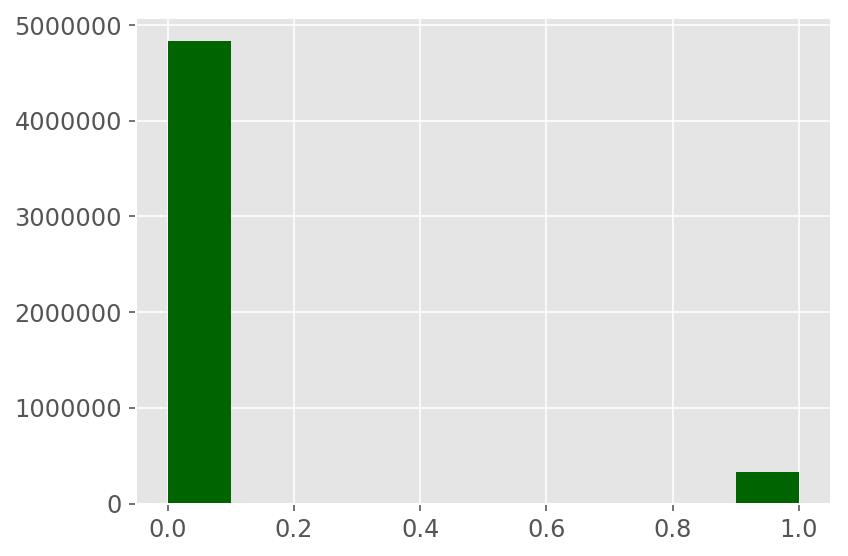

In [66]:
df3.Label.hist(color = "darkgreen")
save_fig("new_label_histogram_plots")
plt.show()

Saving figure new_I9_histogram_plots


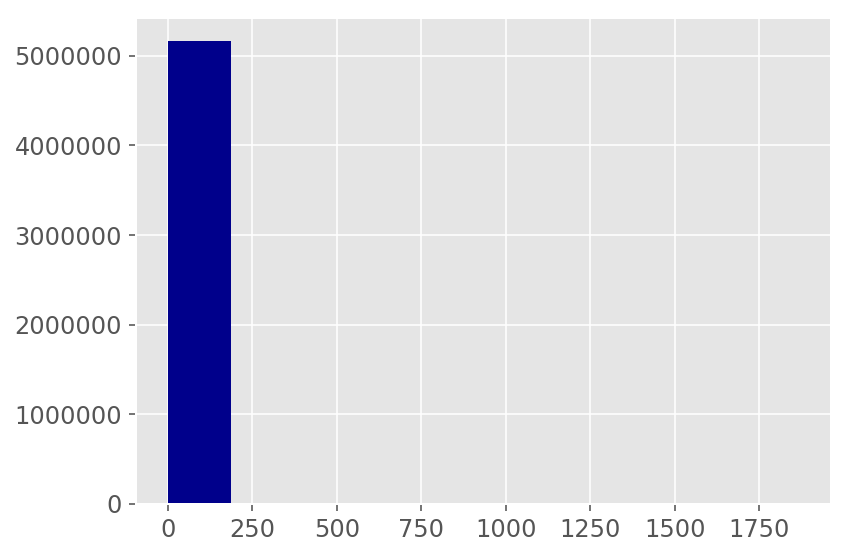

In [67]:
df3.I9.hist(color = "darkblue")
save_fig("new_I9_histogram_plots")
plt.show()

Saving figure new_I8_histogram_plots


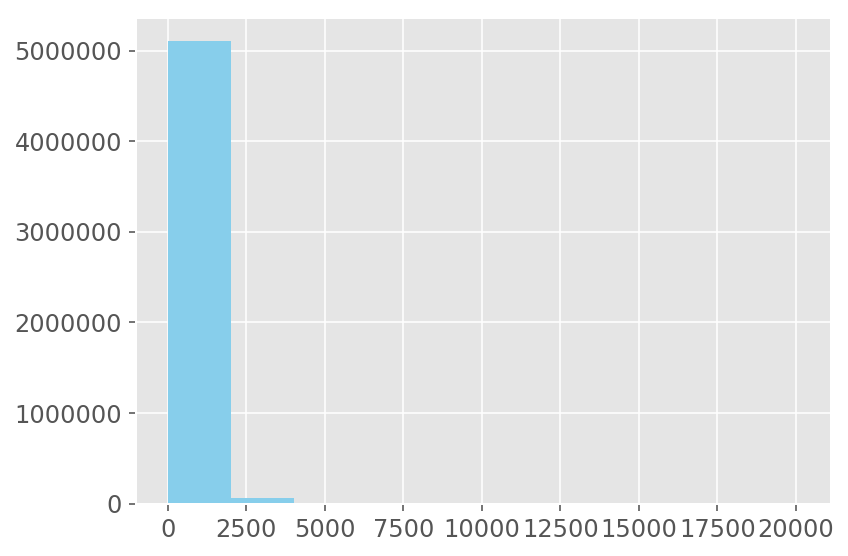

In [68]:
df3.I8.hist(color = "skyblue")
save_fig("new_I8_histogram_plots")
plt.show()

## Skewness
In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined.

Introduction
Consider the two distributions in the figure just below. Within each graph, the values on the right side of the distribution taper differently from the values on the left side. These tapering sides are called tails, and they provide a visual means to determine which of the two kinds of skewness a distribution has:

## negative skew: 
The left tail is longer; the mass of the distribution is concentrated on the right of the figure. The distribution is said to be left-skewed, left-tailed, or skewed to the left, despite the fact that the curve itself appears to be skewed or leaning to the right; left instead refers to the left tail being drawn out and, often, the mean being skewed to the left of a typical center of the data. A left-skewed distribution usually appears as a right-leaning curve.
## positive skew: 
The right tail is longer; the mass of the distribution is concentrated on the left of the figure. The distribution is said to be right-skewed, right-tailed, or skewed to the right, despite the fact that the curve itself appears to be skewed or leaning to the left; right instead refers to the right tail being drawn out and, often, the mean being skewed to the right of a typical center of the data. A right-skewed distribution usually appears as a left-leaning curve.
Negative and positive skew diagrams (English).svg
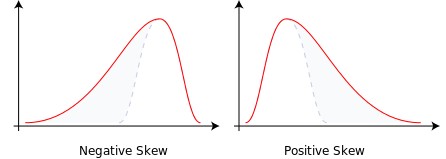
Skewness in a data series may sometimes be observed not only graphically but by simple inspection of the values. For instance, consider the numeric sequence (49, 50, 51), whose values are evenly distributed around a central value of 50. We can transform this sequence into a negatively skewed distribution by adding a value far below the mean, e.g. (40, 49, 50, 51). Similarly, we can make the sequence positively skewed by adding a value far above the mean, e.g. (49, 50, 51, 60).

In [69]:
# for float64 datatype numerical values checking skewness
def float_num_skew(data):      
    #Filter float64 numerical variables
    numerical_columns = [ x for x in data.dtypes.index if data.dtypes[x]=='float64']
    #Print frequency of categories
    for col in numerical_columns:   
        print('\nSkewness for varible ==> %s'%col)
        print(data[col].skew())

In [70]:
## Find float64 number columns that are skewed
float_num_skew(df3)


Skewness for varible ==> I1
83.3789816206043

Skewness for varible ==> I10
2.540594131903723

Skewness for varible ==> I11
5.666676787904141

Skewness for varible ==> I12
7.761168039938619

Skewness for varible ==> I13
176.6988823903969

Skewness for varible ==> I2
4.837466993936519

Skewness for varible ==> I3
9.06834829551641

Skewness for varible ==> I4
65.18210473960498

Skewness for varible ==> I5
16.929759101888628

Skewness for varible ==> I6
37.53417521408048

Skewness for varible ==> I7
475.15208785271466

Skewness for varible ==> new_feat1
2.291361657470165

Skewness for varible ==> new_feat2
3.918410988906212

Skewness for varible ==> new_feat3
2.9135829741865167

Skewness for varible ==> new_feat4
3.740950286205207

Skewness for varible ==> new_feat5
0.6604844940065451

Skewness for varible ==> new_feat6
31.92628105258427


In [71]:
# Skewness for int64 numerical values
def int_num_skew(data):      
    #Filter int64 numerical variables
    numerical_columns = [ x for x in data.dtypes.index if data.dtypes[x]=='int64']
    #Print frequency of categories
    for col in numerical_columns:   
        print('\nSkewness for varible ==> %s'%col)
        print(data[col].skew())

In [72]:
## Find integer64 number columns that are skewed
int_num_skew(df3)


Skewness for varible ==> I8
6.4342700470719825

Skewness for varible ==> I9
19.46002863046492

Skewness for varible ==> Label
3.535851270611473


In [73]:
## Transforming Integer Data and columns with Outliers
df3.head()

C1       C10       C11       C12       C13  C14       C15  C16  \
67   265366bf  e63d98b4  c939136f  4806aa5d  f4fc3c5e  NaN  1de734ba  NaN   
85        NaN       NaN       NaN  6e4b486a  00c5ffb7  NaN  f0274ef2  NaN   
111       NaN       NaN       NaN  12716184  00c5ffb7  NaN  7167fd91  NaN   
123  f6b47db3  fcb4a2a4  6f105e1c  855ee41c  bf78d0d4  NaN  e10a0974  NaN   
133  265366bf  e63d98b4  c939136f  f7ab09d9  d49eb1df  NaN  1de734ba  NaN   

     C17       C18    ...      I7   I8  I9 Label new_feat1 new_feat2  \
67   NaN  b8170bba    ...     1.0   18   1     1       NaN       NaN   
85   NaN  b8170bba    ...     0.0    0   0     1       NaN       NaN   
111  NaN  b8170bba    ...     0.0    0   0     1       NaN       NaN   
123  NaN  a1eb1511    ...     0.0   13   0     1       NaN       NaN   
133  NaN  0e45c477    ...     0.0  154  27     1       NaN       NaN   

    new_feat3 new_feat4 new_feat5 new_feat6  
67        NaN       NaN       NaN       NaN  
85        NaN       NaN       NaN       NaN  
111       NaN       NaN       NaN       NaN  
123       NaN       NaN       NaN       NaN  
133       NaN       NaN       NaN       NaN  

[5 rows x 46 columns]

In [74]:
df3.I1.value_counts()

1.0       565939
2.0       391454
3.0       302506
4.0       241483
5.0       201977
6.0       168067
7.0       146961
8.0       127261
9.0       113697
10.0      100283
11.0       90142
12.0       80276
13.0       75099
14.0       68426
15.0       62140
16.0       58443
17.0       54063
18.0       49630
19.0       48241
20.0       44380
21.0       41703
22.0       39062
23.0       36345
24.0       34136
25.0       32673
26.0       30465
27.0       30194
28.0       28305
29.0       27216
30.0       25853
           ...  
5205.0         1
5206.0         1
5211.0         1
5215.0         1
5222.0         1
5223.0         1
5225.0         1
5226.0         1
5232.0         1
5233.0         1
5190.0         1
5180.0         1
5097.0         1
5176.0         1
5107.0         1
5108.0         1
5123.0         1
5126.0         1
5135.0         1
5137.0         1
5142.0         1
5145.0         1
5152.0         1
5157.0         1
5162.0         1
5164.0         1
5169.0         1
5171.0        

We found that the integer count data was skewed and would need log transformation. Where we also found that some of the integers were clustered and looked more discrete than continuous. The data contained nulls and a fair amount of zeros in some columns. Most of the categorical data was highly dimensional. 
We want to start working with sklearn. For our first model we replaced the nulls with zeros and used the FeatureHasher from sklearn. The baseline was .031 because of the extreme low number of 1’s and our first models did not do much better. After examining criteo data with data wrangling, we decided on the following tasks.

• Log transformations to the integer columns. The highly skewed I13 column, we transformed twice.
• The highly skewed I1 column, we transformed twice.
• The highly skewed I4 column, we transformed twice.
• The highly skewed I7 column, we transformed twice.
• The highly skewed I13 column, we transformed twice.

In [75]:
df3.I4.value_counts()

0.0       153191
1.0        87828
2.0        83494
3.0        74779
4.0        68013
5.0        62974
6.0        58293
7.0        55363
8.0        51195
9.0        49038
10.0       46972
11.0       44745
12.0       41025
13.0       39626
14.0       38826
15.0       36991
16.0       36198
17.0       35283
18.0       30970
19.0       30802
20.0       30562
21.0       29273
22.0       28704
23.0       28206
24.0       27557
25.0       26701
26.0       24038
27.0       23817
28.0       23434
29.0       22729
           ...  
8655.0         1
8656.0         1
8602.0         1
8599.0         1
8597.0         1
8596.0         1
8529.0         1
5374.0         1
8540.0         1
8543.0         1
8544.0         1
8547.0         1
8548.0         1
5372.0         1
8557.0         1
8563.0         1
8565.0         1
5368.0         1
8569.0         1
8572.0         1
8573.0         1
8579.0         1
5367.0         1
8584.0         1
5366.0         1
8588.0         1
8593.0         1
4721.0        

In [76]:
df3.I13.value_counts()

1.0       639706
2.0       486762
3.0       363725
4.0       291716
5.0       230913
6.0       193246
7.0       159381
0.0       147530
8.0       133668
9.0       113869
10.0       99231
11.0       87673
12.0       77415
13.0       69248
14.0       61644
15.0       55280
16.0       49394
17.0       45126
18.0       40795
19.0       36808
20.0       33809
21.0       30138
22.0       27481
23.0       25695
24.0       23965
25.0       21641
26.0       20009
27.0       18654
28.0       17366
29.0       16026
           ...  
719.0          1
663.0          1
685.0          1
664.0          1
668.0          1
670.0          1
671.0          1
673.0          1
675.0          1
677.0          1
678.0          1
679.0          1
680.0          1
681.0          1
682.0          1
686.0          1
716.0          1
689.0          1
690.0          1
693.0          1
695.0          1
696.0          1
697.0          1
702.0          1
704.0          1
712.0          1
713.0          1
714.0         

In [77]:
df3.I7.value_counts()

0.0       4722058
1.0        162486
2.0         42827
3.0         17035
4.0          9720
5.0          5683
6.0          4234
7.0          2957
8.0          2383
9.0          1742
10.0         1559
11.0         1191
12.0         1023
13.0          867
14.0          719
15.0          631
16.0          488
17.0          474
18.0          458
19.0          405
20.0          381
21.0          353
22.0          284
23.0          275
26.0          192
25.0          188
24.0          187
28.0          180
29.0          171
27.0          151
           ...   
512.0           1
539.0           1
811.0           1
813.0           1
815.0           1
254.0           1
3579.0          1
243.0           1
189.0           1
156.0           1
160.0           1
161.0           1
141.0           1
135.0           1
166.0           1
129.0           1
127.0           1
187.0           1
112.0           1
994.0           1
106.0           1
203.0           1
206.0           1
209.0           1
210.0     

In [78]:
df3.shape

(5167415, 46)

# Highly skewed I11, I1, I4 and I7

In [79]:
#df3.I7_Skew = df3.I7
df3_skew = df3[df3.I7 == 1 ]

In [80]:
df3_skew.shape

(162486, 46)

In [81]:
df3.I7.shape

(5167415,)

In [82]:
df3.I7.value_counts()

0.0       4722058
1.0        162486
2.0         42827
3.0         17035
4.0          9720
5.0          5683
6.0          4234
7.0          2957
8.0          2383
9.0          1742
10.0         1559
11.0         1191
12.0         1023
13.0          867
14.0          719
15.0          631
16.0          488
17.0          474
18.0          458
19.0          405
20.0          381
21.0          353
22.0          284
23.0          275
26.0          192
25.0          188
24.0          187
28.0          180
29.0          171
27.0          151
           ...   
512.0           1
539.0           1
811.0           1
813.0           1
815.0           1
254.0           1
3579.0          1
243.0           1
189.0           1
156.0           1
160.0           1
161.0           1
141.0           1
135.0           1
166.0           1
129.0           1
127.0           1
187.0           1
112.0           1
994.0           1
106.0           1
203.0           1
206.0           1
209.0           1
210.0     

In [83]:
df3.I11.value_counts()

1.0      1243075
2.0       552794
3.0       310200
4.0       195806
5.0       138567
6.0        96707
7.0        73876
8.0        56242
9.0        45796
10.0       38058
11.0       30977
12.0       24943
13.0       21136
14.0       18678
15.0       16288
16.0       14631
17.0       12816
18.0       10600
19.0        9487
20.0        8684
21.0        7881
22.0        7243
23.0        6546
24.0        5965
25.0        5510
26.0        4604
27.0        4357
28.0        3863
29.0        3763
30.0        3463
          ...   
141.0          9
129.0          8
137.0          8
133.0          7
151.0          5
138.0          4
153.0          4
168.0          4
132.0          4
135.0          4
160.0          3
150.0          3
152.0          3
143.0          3
142.0          3
147.0          2
146.0          2
184.0          2
155.0          2
156.0          2
189.0          2
154.0          1
157.0          1
159.0          1
139.0          1
162.0          1
165.0          1
166.0         

In [84]:
#From the histogram there are a few integer predictors that are canidates to be binned. There distribution is distributed
#into three chunks quite nicely. Since I'll be using a Random Forest, binning in decision tree models works well.
#
df3['I9_bin'] = pd.qcut(df3['I9'], 3, labels=False)

In [85]:
df3.I9_bin.value_counts()

0    2032984
2    1694500
1    1439931
Name: I9_bin, dtype: int64

In [86]:
df3 = df3.drop(['I9'],axis = 1)

In [87]:
# It's dropped
#df3.I9

In [88]:
#df3['I0_bin'] = pd.qcut(df3['I10'], 3, labels=False)

In [89]:
df3.I10.count()

4684258

In [90]:
df3.I10.value_counts()

0.0     3711177
1.0      832059
2.0      114924
3.0       20682
4.0        4276
5.0         894
6.0         197
7.0          41
8.0           6
10.0          1
9.0           1
Name: I10, dtype: int64

In [91]:
## Percentage of nulls per total on each column
def df_null_percent(df):
    print('Dataset shape: %d rows, %d cols\n' % df.shape)
    print ('\n|=====================|\n')
    total = df.shape[0]
    print('column info:')
    for col in df.columns:
        total_null = df[col].isnull().sum()
        percent_null = (float(total_null)/total) * 100.0
        print ('* %s: %d nulls, %d percent nulls' % (col, total_null,percent_null))      
        if(percent_null > 35.0):
            print ('converting column')
            df[col].fillna(0,inplace=True)
            df[col] = df[col].map(lambda x: 1 if x == 0 else 0)
    print ('\n|=======================|\n')

In [92]:
## There are too many zeros to bin. we'll leave this as is.
## Percentage of nulls per total on each column
## We make boolean column if nulls above 35%
df_null_percent(df3)

Dataset shape: 5167415 rows, 46 cols


|=====================|

column info:
* C1: 206619 nulls, 3 percent nulls
* C10: 206619 nulls, 3 percent nulls
* C11: 206619 nulls, 3 percent nulls
* C12: 0 nulls, 0 percent nulls
* C13: 0 nulls, 0 percent nulls
* C14: 1858690 nulls, 35 percent nulls
converting column
* C15: 0 nulls, 0 percent nulls
* C16: 1858690 nulls, 35 percent nulls
converting column
* C17: 1858690 nulls, 35 percent nulls
converting column
* C18: 0 nulls, 0 percent nulls
* C19: 0 nulls, 0 percent nulls
* C2: 0 nulls, 0 percent nulls
* C20: 206619 nulls, 3 percent nulls
* C21: 206619 nulls, 3 percent nulls
* C22: 206619 nulls, 3 percent nulls
* C23: 1858690 nulls, 35 percent nulls
converting column
* C24: 0 nulls, 0 percent nulls
* C25: 0 nulls, 0 percent nulls
* C26: 0 nulls, 0 percent nulls
* C3: 0 nulls, 0 percent nulls
* C4: 0 nulls, 0 percent nulls
* C5: 0 nulls, 0 percent nulls
* C6: 0 nulls, 0 percent nulls
* C7: 0 nulls, 0 percent nulls
* C8: 0 nulls, 0 percent nulls
*

In [93]:
int_cols9 = ["I1","I2","I3","I4","I5","I6","I7","I8","I10","I11","I12","I13","new_feat1","new_feat2","new_feat3","new_feat4",
            "new_feat5","new_feat6"]

In [94]:
## Use the mean of the column to impute/replace Nan
for i in int_cols9:
    df3[i].fillna((df3[i].mean()), inplace=True)

In [95]:
## Use None to replace categories with Nan
#for c in cat_cols:
#    df3[c].fillna('None',inplace=True)

In [96]:
#### Simply Mode replacing code for categorical columns
for column in ['C1', 'C2', 'C3', 'C4', 'C5','C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
       'C15', 'C18', 'C19', 'C20', 'C21', 'C22','C24', 'C25', 'C26']:
    df3[column].fillna(df3[column].mode()[0], inplace=True)

In [97]:
## Lets check out df for nulls
df3.isnull().sum()

C1           0
C10          0
C11          0
C12          0
C13          0
C14          0
C15          0
C16          0
C17          0
C18          0
C19          0
C2           0
C20          0
C21          0
C22          0
C23          0
C24          0
C25          0
C26          0
C3           0
C4           0
C5           0
C6           0
C7           0
C8           0
C9           0
I1           0
I10          0
I11          0
I12          0
I13          0
I2           0
I3           0
I4           0
I5           0
I6           0
I7           0
I8           0
Label        0
new_feat1    0
new_feat2    0
new_feat3    0
new_feat4    0
new_feat5    0
new_feat6    0
I9_bin       0
dtype: int64

In [98]:
## Lets check our data types
df3.dtypes

C1            object
C10           object
C11           object
C12           object
C13           object
C14            int64
C15           object
C16            int64
C17            int64
C18           object
C19           object
C2            object
C20           object
C21           object
C22           object
C23            int64
C24           object
C25           object
C26           object
C3            object
C4            object
C5            object
C6            object
C7            object
C8            object
C9            object
I1           float64
I10          float64
I11            int64
I12          float64
I13          float64
I2           float64
I3           float64
I4             int64
I5             int64
I6           float64
I7           float64
I8             int64
Label          int64
new_feat1    float64
new_feat2    float64
new_feat3    float64
new_feat4    float64
new_feat5    float64
new_feat6    float64
I9_bin         int64
dtype: object

In [99]:
#df3.to_csv('Bucket_Day4.csv', index=False)

In [100]:
# log all I columns...Log I1-twice. See skew numbers
for num in [int_cols9]:
    df3[num]= np.log(df3[num]+1)

In [101]:
df3['I1'] = np.log(df3['I1']+1)

In [102]:
## ready to save and send for modeling.
df3.to_csv('day_4_E_df3_final.csv', index=False)

In [103]:
## Lets check the percentage of 1's now on our sample
len(df3[df3.Label==1])/df3.shape[0]

0.06479642142154249

In [104]:
df3.I7.head()

67     0.693147
85     0.000000
111    0.000000
123    0.000000
133    0.000000
Name: I7, dtype: float64

In [105]:
df3.corr('spearman')

C14       C16       C17       C23        I1       I10  \
C14        1.000000  1.000000  1.000000  1.000000 -0.161832  0.052598   
C16        1.000000  1.000000  1.000000  1.000000 -0.161832  0.052598   
C17        1.000000  1.000000  1.000000  1.000000 -0.161832  0.052598   
C23        1.000000  1.000000  1.000000  1.000000 -0.161832  0.052598   
I1        -0.161832 -0.161832 -0.161832 -0.161832  1.000000 -0.006651   
I10        0.052598  0.052598  0.052598  0.052598 -0.006651  1.000000   
I11        0.015953  0.015953  0.015953  0.015953  0.023816  0.069176   
I12        0.076822  0.076822  0.076822  0.076822 -0.051626 -0.437232   
I13       -0.083220 -0.083220 -0.083220 -0.083220  0.366456  0.027004   
I2         0.061633  0.061633  0.061633  0.061633  0.089548 -0.009938   
I3        -0.052042 -0.052042 -0.052042 -0.052042  0.301099  0.110072   
I4        -0.159919 -0.159919 -0.159919 -0.159919  0.084754 -0.233471   
I5         0.015953  0.015953  0.015953  0.015953  0.023816  0.069176   
I6         0.054676  0.054676  0.054676  0.054676 -0.010539  0.930413   
I7         0.030026  0.030026  0.030026  0.030026 -0.011032  0.240437   
I8        -0.142342 -0.142342 -0.142342 -0.142342 -0.067625 -0.083529   
Label      0.036532  0.036532  0.036532  0.036532 -0.032450  0.093738   
new_feat1 -0.008490 -0.008490 -0.008490 -0.008490 -0.006541 -0.011839   
new_feat2  0.002156  0.002156  0.002156  0.002156 -0.017508  0.021011   
new_feat3 -0.019825 -0.019825 -0.019825 -0.019825 -0.012772 -0.007477   
new_feat4  0.039085  0.039085  0.039085  0.039085 -0.022856  0.071492   
new_feat5 -0.018812 -0.018812 -0.018812 -0.018812 -0.006227 -0.012231   
new_feat6  0.027696  0.027696  0.027696  0.027696 -0.023201  0.075800   
I9_bin     0.166752  0.166752  0.166752  0.166752  0.021817  0.018319   

                I11       I12       I13        I2    ...           I7  \
C14        0.015953  0.076822 -0.083220  0.061633    ...     0.030026   
C16        0.015953  0.076822 -0.083220  0.061633    ...     0.030026   
C17        0.015953  0.076822 -0.083220  0.061633    ...     0.030026   
C23        0.015953  0.076822 -0.083220  0.061633    ...     0.030026   
I1         0.023816 -0.051626  0.366456  0.089548    ...    -0.011032   
I10        0.069176 -0.437232  0.027004 -0.009938    ...     0.240437   
I11        1.000000  0.020622 -0.017539 -0.038873    ...     0.004519   
I12        0.020622  1.000000 -0.004735 -0.133990    ...    -0.084925   
I13       -0.017539 -0.004735  1.000000  0.071323    ...     0.034759   
I2        -0.038873 -0.133990  0.071323  1.000000    ...    -0.003659   
I3        -0.022755 -0.089386  0.860790  0.061620    ...     0.047679   
I4         0.391607  0.169866  0.001702  0.042612    ...    -0.013274   
I5         1.000000  0.020622 -0.017539 -0.038873    ...     0.004519   
I6         0.065023 -0.410468  0.044716 -0.020969    ...     0.271736   
I7         0.004519 -0.084925  0.034759 -0.003659    ...     1.000000   
I8        -0.024959 -0.032742 -0.079622  0.034545    ...    -0.056248   
Label     -0.058164 -0.092528 -0.050188 -0.009731    ...     0.021619   
new_feat1 -0.004366 -0.019054 -0.036519 -0.045836    ...    -0.098506   
new_feat2 -0.100602 -0.063202 -0.019946  0.056264    ...     0.096131   
new_feat3 -0.091824 -0.044360 -0.019717  0.036278    ...     0.125024   
new_feat4 -0.144537 -0.123618 -0.024986  0.110761    ...     0.202586   
new_feat5 -0.221083 -0.096694 -0.016026  0.081110    ...    -0.212960   
new_feat6 -0.043926 -0.070597 -0.036705 -0.002896    ...     0.032580   
I9_bin    -0.061035 -0.269625  0.166570  0.174564    ...    -0.040904   

                 I8     Label  new_feat1  new_feat2  new_feat3  new_feat4  \
C14       -0.142342  0.036532  -0.008490   0.002156  -0.019825   0.039085   
C16       -0.142342  0.036532  -0.008490   0.002156  -0.019825   0.039085   
C17       -0.142342  0.036532  -0.008490   0.002156  -0.019825   0.039085   
C23       -0.142342  0.036532  -0.008490   0.002156  -0.

In [106]:
def correlation_heat_map(df):
    corrs = df.corr()
    # Set the custom matplotlib figure size:
    fig, ax = plt.subplots(figsize=(25,10))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    save_fig("correlation_heat_map_plots")
    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
    

Saving figure correlation_heat_map_plots


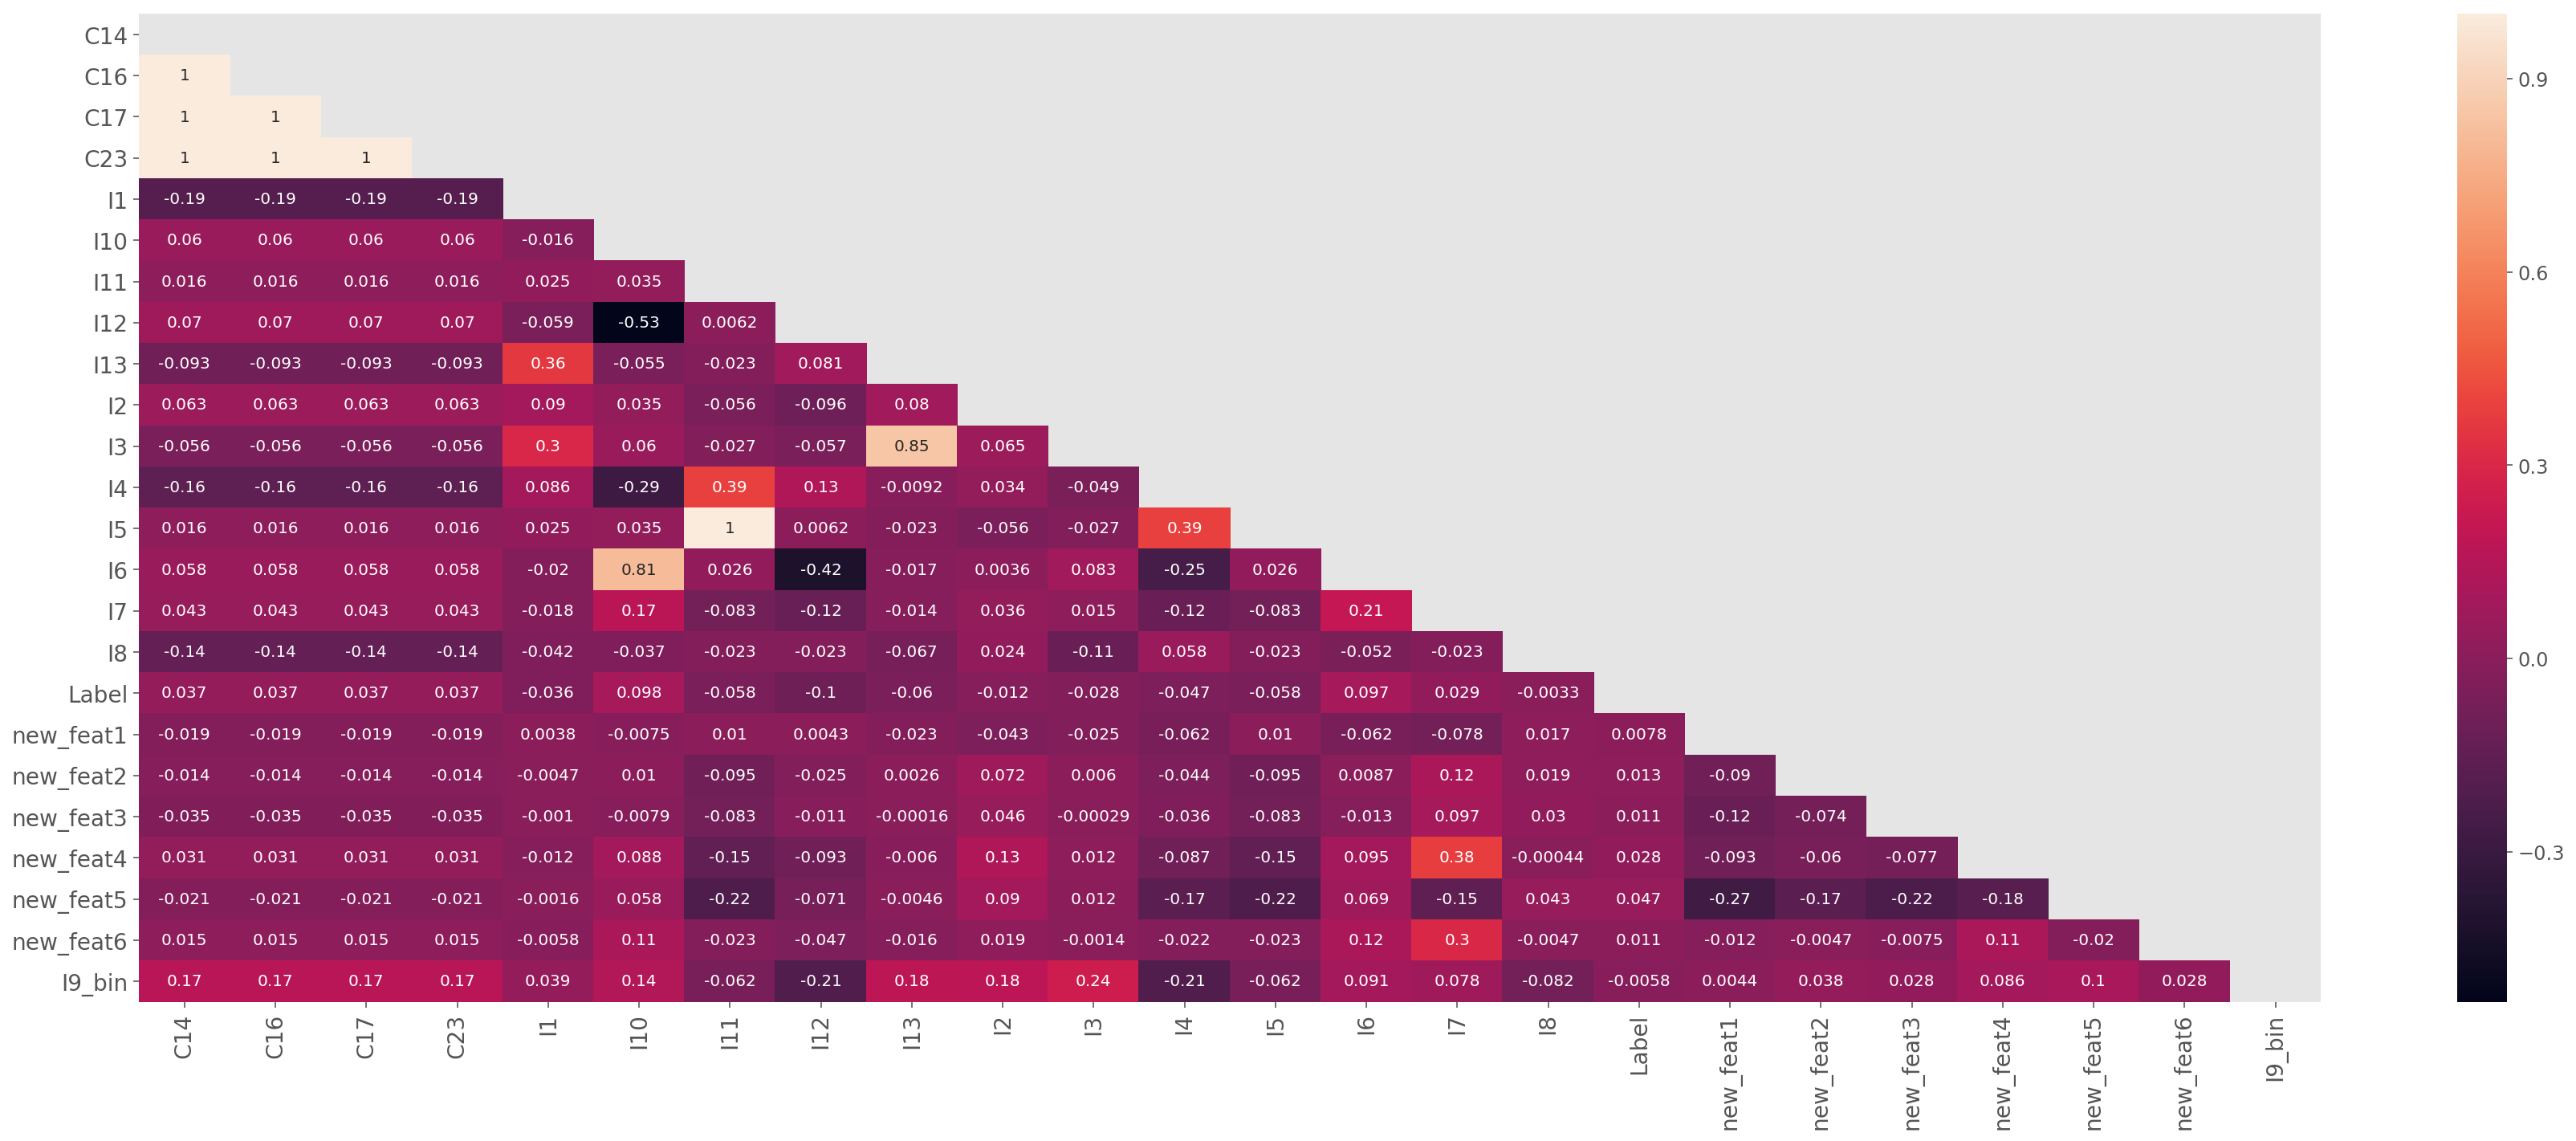

In [107]:
correlation_heat_map(df3)
#save_fig("correlation_heat_map_plots")
plt.show()

In [108]:
# make boolean: I4,I5,I11,C14,C16,C17,C23. Good: C6, C13, C17. Descrete 69% no value
# Impute: use spearment to correlate categories, use pearson for numbers.
for i in cat_cols:
    length = len(df3[i].unique())
    print('Length: ', length)
    print('Integer Column: ',i)
    print(df2[i].unique())
    print()
    print ('|=============================|')
    print()

Length:  749072
Integer Column:  C1
['a549d9ac' '590644e2' '65ea6d48' ... 'e7183cdd' '357597d9' 'bfd868a4']

|=============================|

Length:  18515
Integer Column:  C2
['bff9958d' '489aef86' 'a3b04ea2' ... '724fbb0d' '2cdcde78' '426a128b']

|=============================|

Length:  13550
Integer Column:  C3
['2af31717' 'b47109d3' 'bf34b749' ... '077f0d9d' '4b2c63da' '231ceeb2']

|=============================|

Length:  6827
Integer Column:  C4
['f2463ffb' '9f76af96' 'e6b5b2ee' ... '179b3be6' '4bcd05ce' 'cc3407c6']

|=============================|

Length:  18354
Integer Column:  C5
['99238af2' '58f5b2da' 'e64a1cfc' ... '12dde547' 'b6ef47ef' '0d40ca00']

|=============================|

Length:  3
Integer Column:  C6
['6fcd6dcb' '919c68e4' '80b15496']

|=============================|

Length:  6380
Integer Column:  C7
['6e1739cb' '08ae0426' '2d72123e' ... 'b94a06b5' '162b86d1' 'fb2119bd']

|=============================|

Length:  1234
Integer Column:  C8
['231d1ac4' '8f551379

Length:  792724
Integer Column:  C20
['6156099e' '3cf46b7e' '0c310f79' ... '1f50800f' '05d795f2' '881ae0ad']

|=============================|

Length:  270007
Integer Column:  C21
['9574c320' 'fd8203d2' 'fb4561dc' ... '5ff4db83' '0343ff05' '94fbc77f']

|=============================|

Length:  670608
Integer Column:  C22
['a409e683' 'fbf3cf4a' 'd1ce530d' ... 'c77a0412' '70ced847' '32a93710']

|=============================|

Length:  2
Integer Column:  C23
['d7c1fc0b' '1215a843' nan ... '12a9a7ff' '4443570a' '69275291']

|=============================|

Length:  8958
Integer Column:  C24
['f3a1835d' 'b7630505' '59c61d47' ... 'fe70da99' '57541493' 'd86aacf9']

|=============================|

Length:  74
Integer Column:  C25
['ff654802' '321935cd' '337b81aa' '30436bfc' '991321ea' 'cdc3217e'
 '0b3c06d0' '57e36578' '73bcdfc8' 'd5578a54' 'a09a1ac7' 'd0b1afa5'
 'e5cb08fd' 'facb8ad0' '8310666b' '0a95e0db' 'd7cf53f3' 'f31395f7'
 '9d44bb4b' 'd632d034' '5009452d' 'aba27ea9' '78679bd0' 'ec0a7376

Saving figure I1


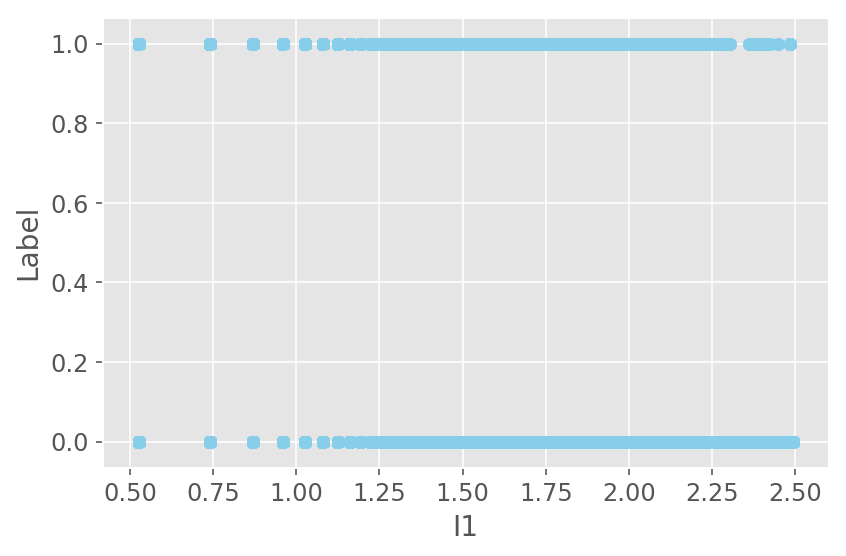

Saving figure I10


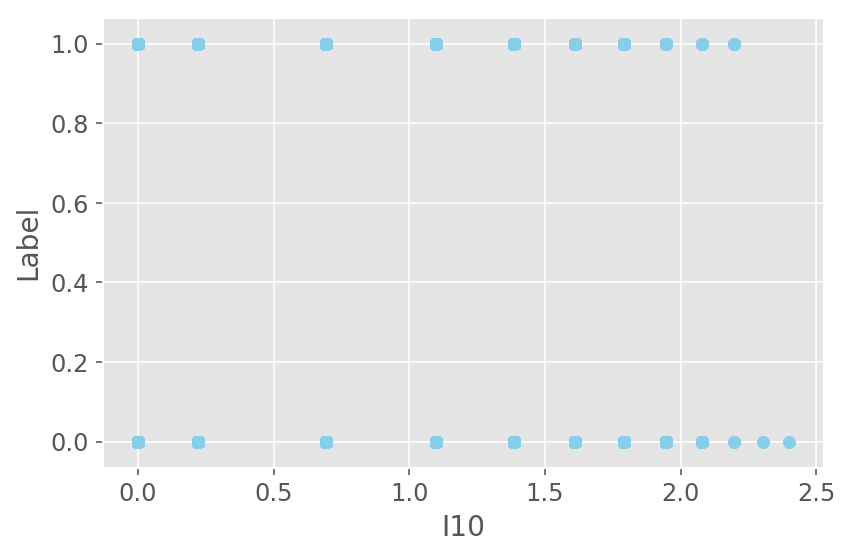

Saving figure I11


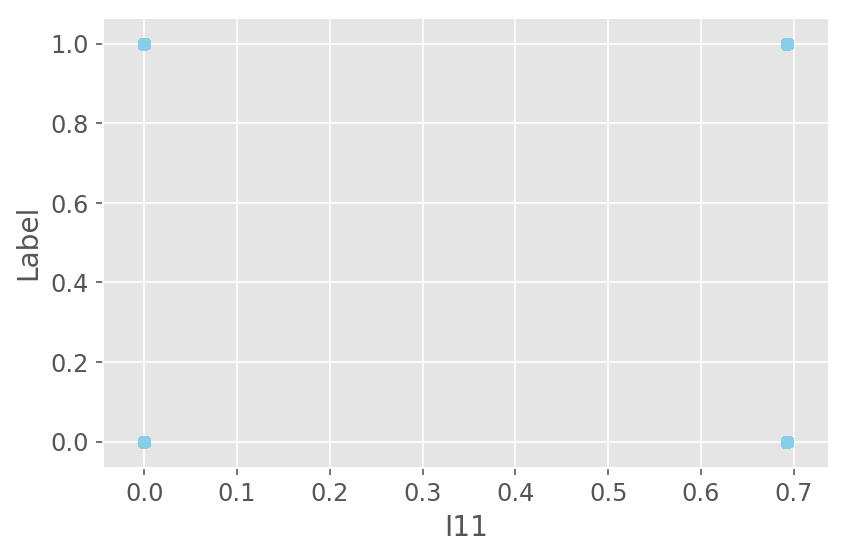

Saving figure I12


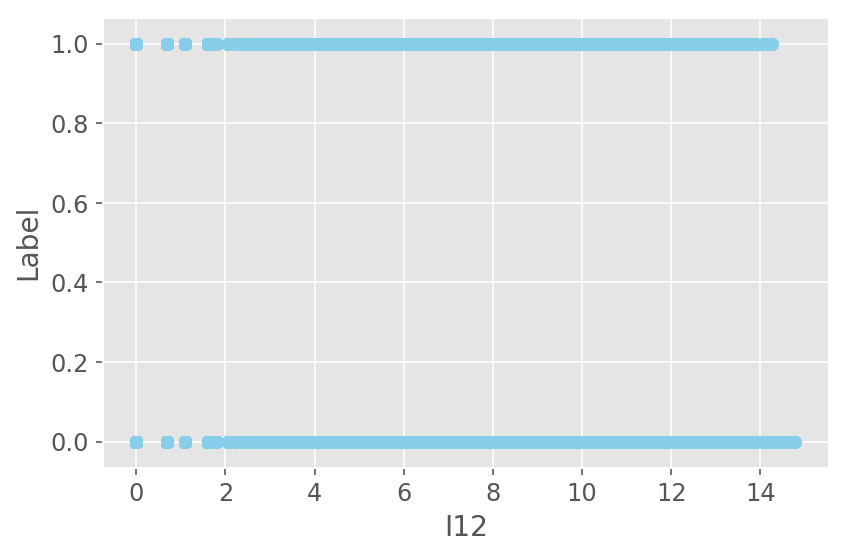

Saving figure I13


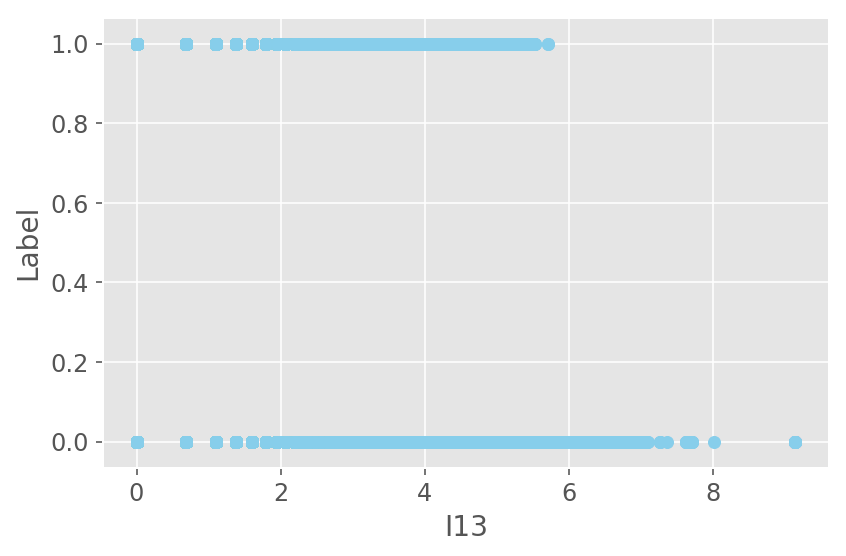

Saving figure I2


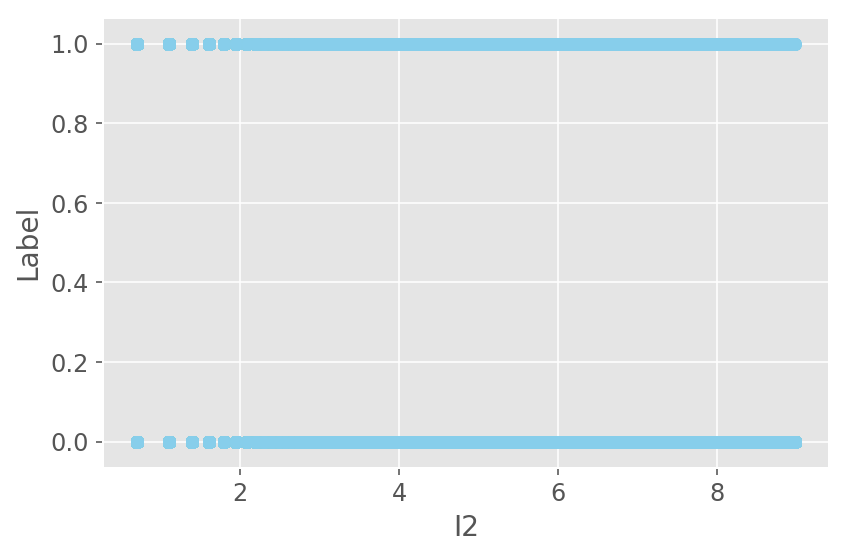

Saving figure I3


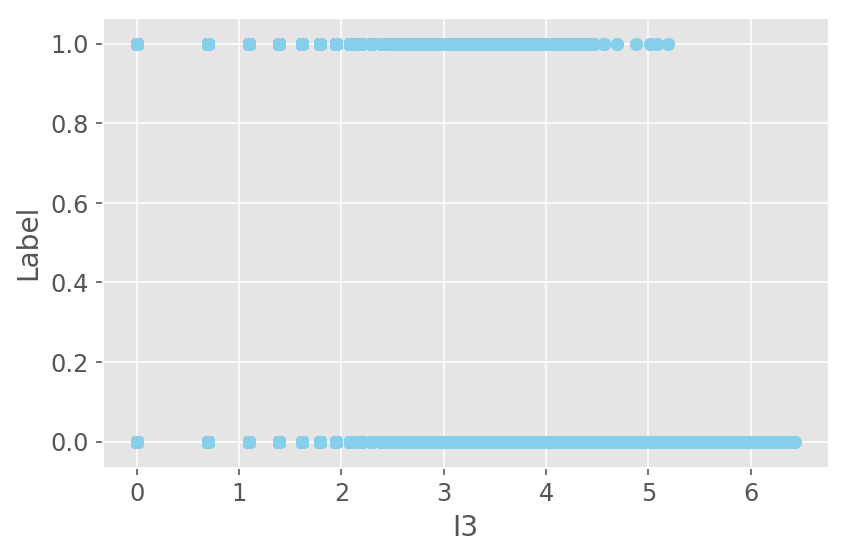

Saving figure I4


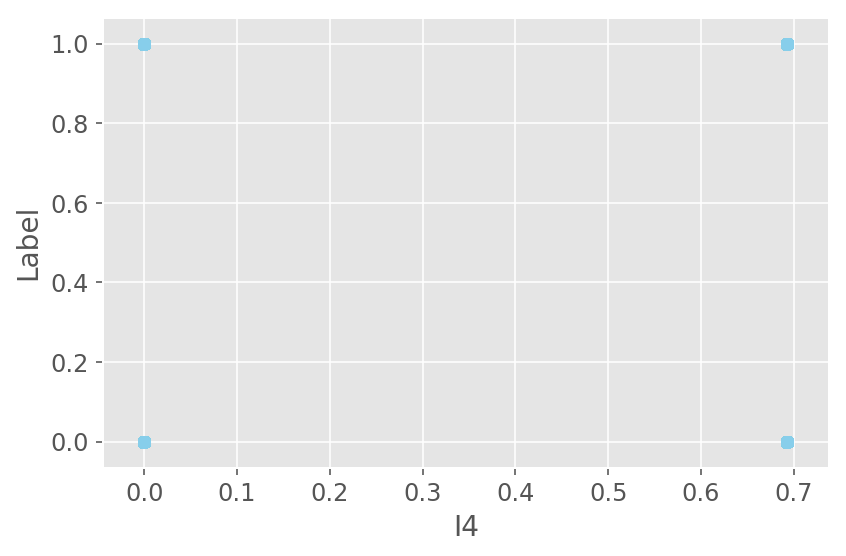

Saving figure I5


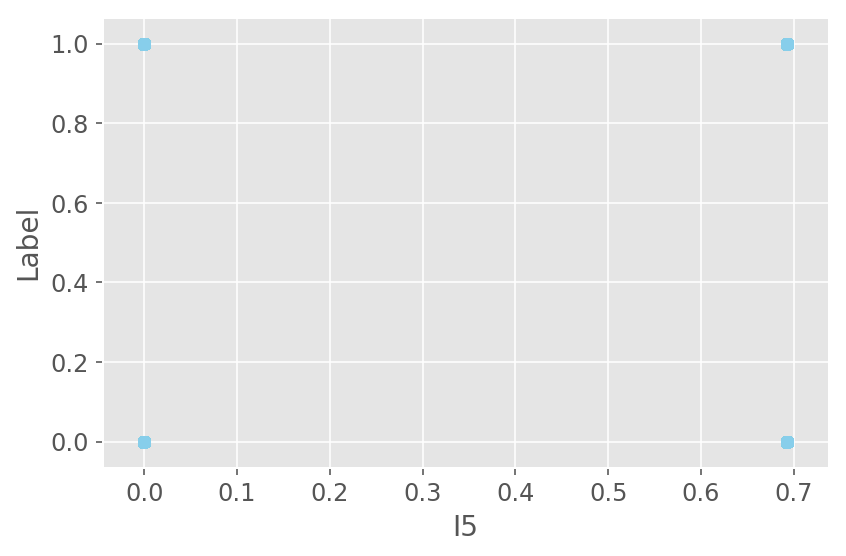

Saving figure I6


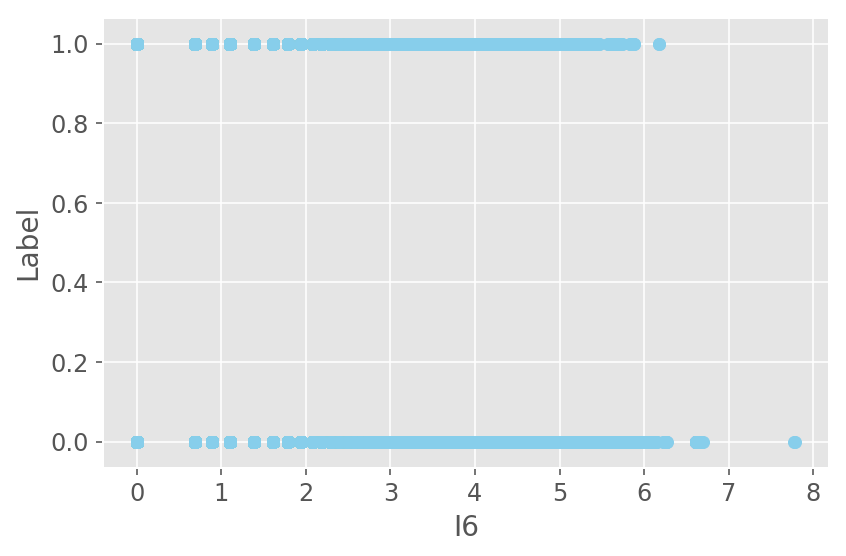

Saving figure I7


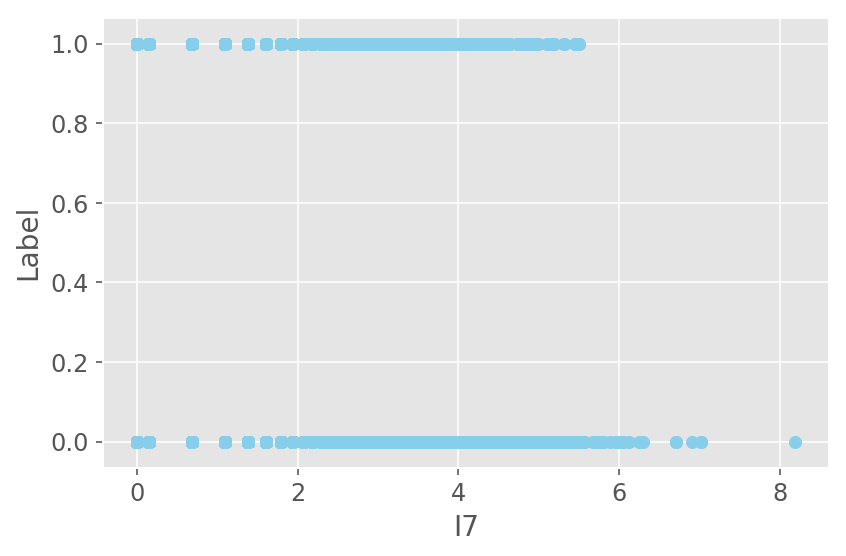

Saving figure I8


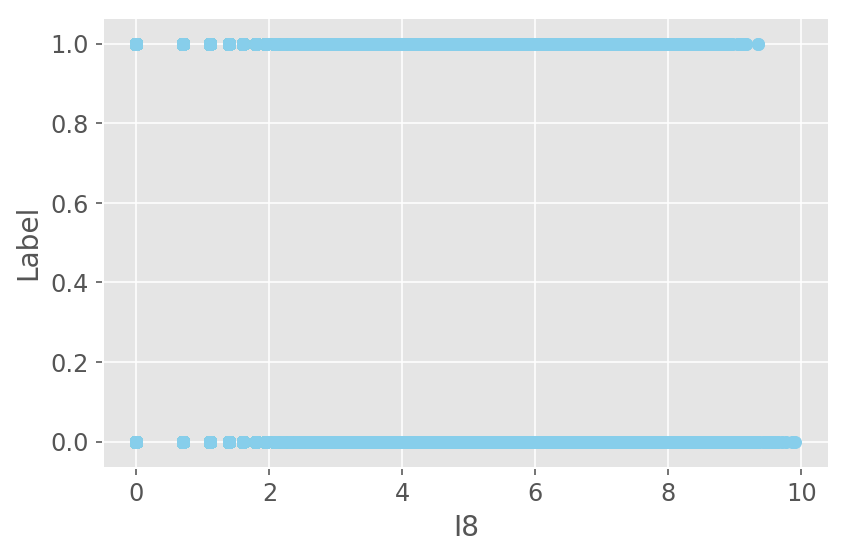

Saving figure new_feat1


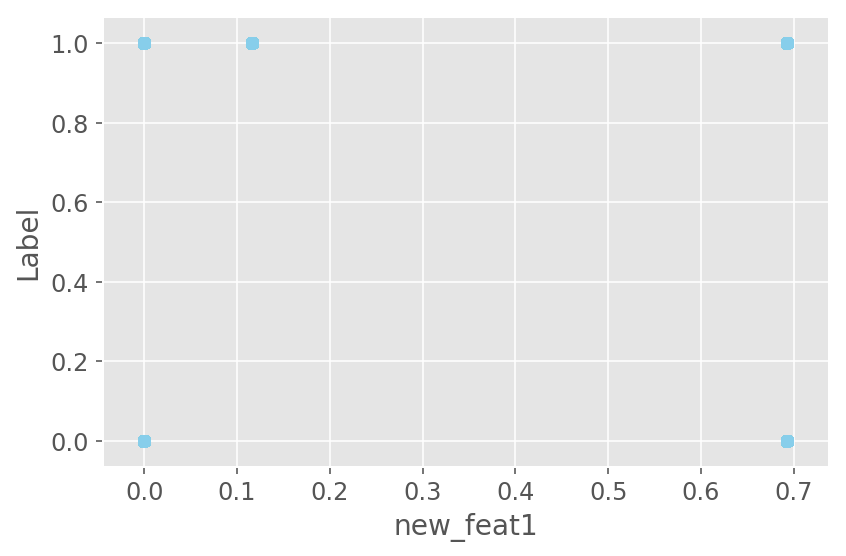

Saving figure new_feat2


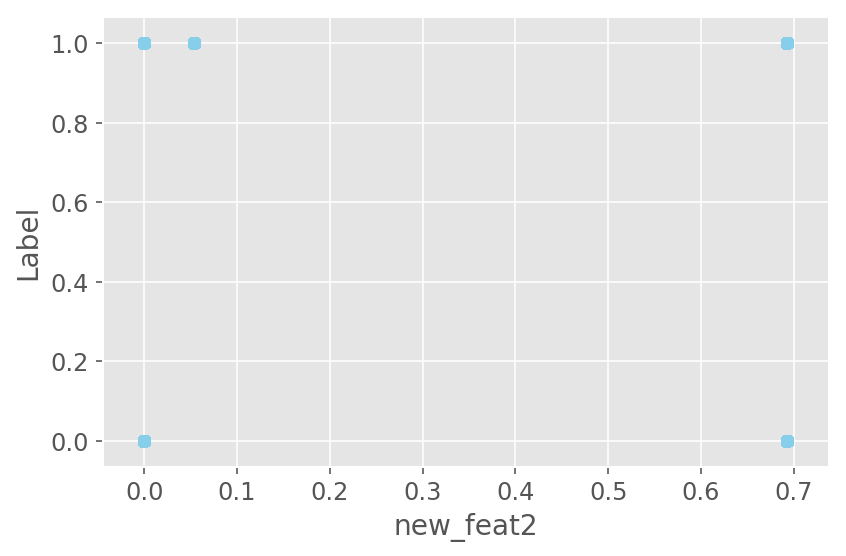

Saving figure new_feat3


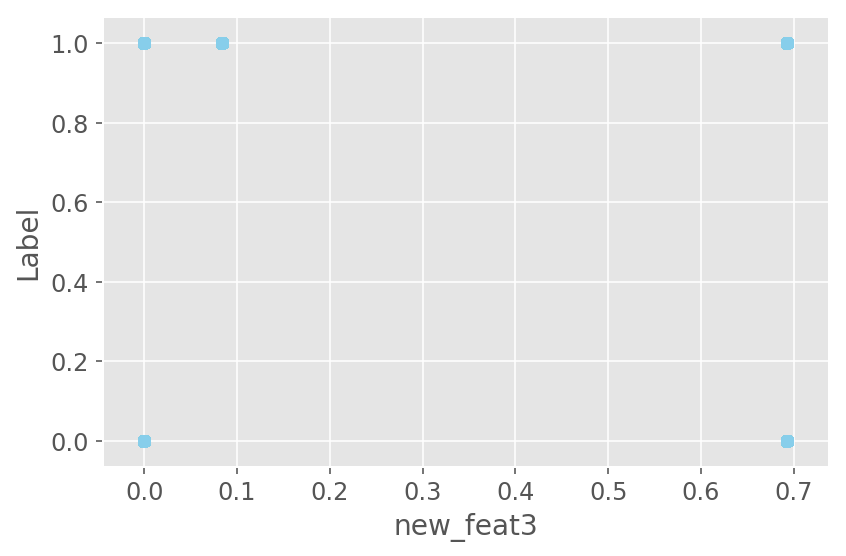

Saving figure new_feat4


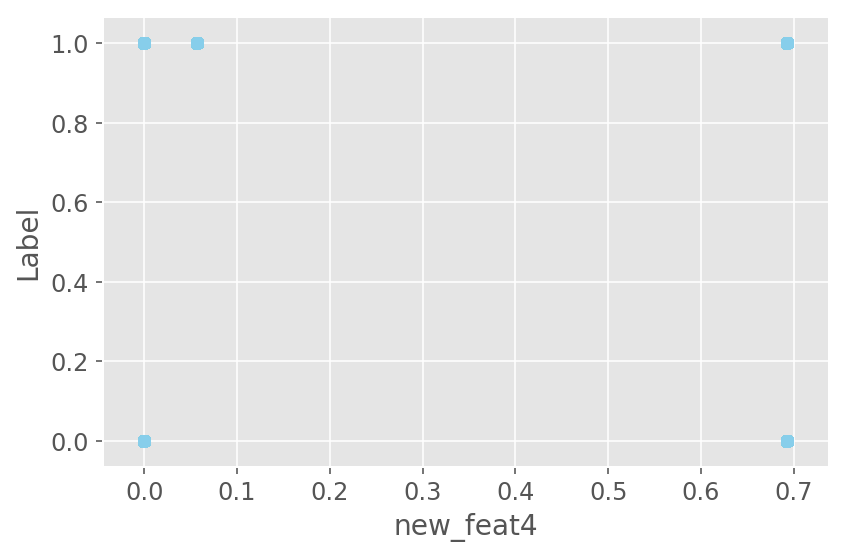

Saving figure new_feat5


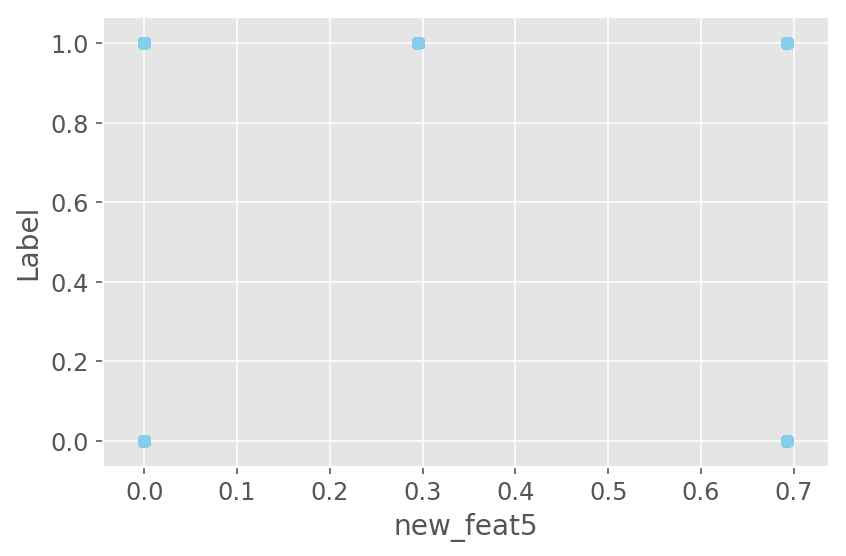

Saving figure new_feat6


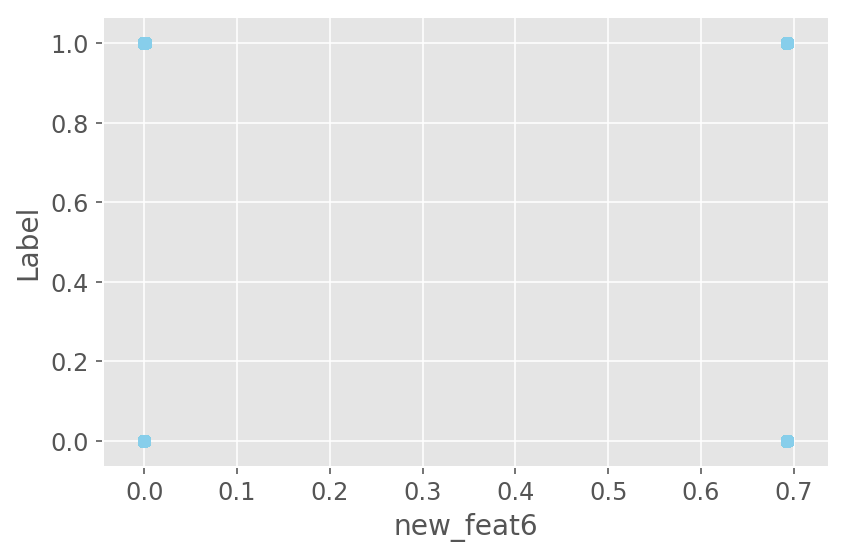

In [109]:
##Scatter plots versus Label
numerical_columns = [ x for x in df3.dtypes.index if df3.dtypes[x] == 'float64']
for num in numerical_columns:
    plt.scatter(x=df3[num], y=df3.Label, color='skyblue')
    plt.ylabel('Label')
    plt.xlabel(num)
    save_fig(num, "label_scatter_plots")
    plt.show()

Saving figure C14


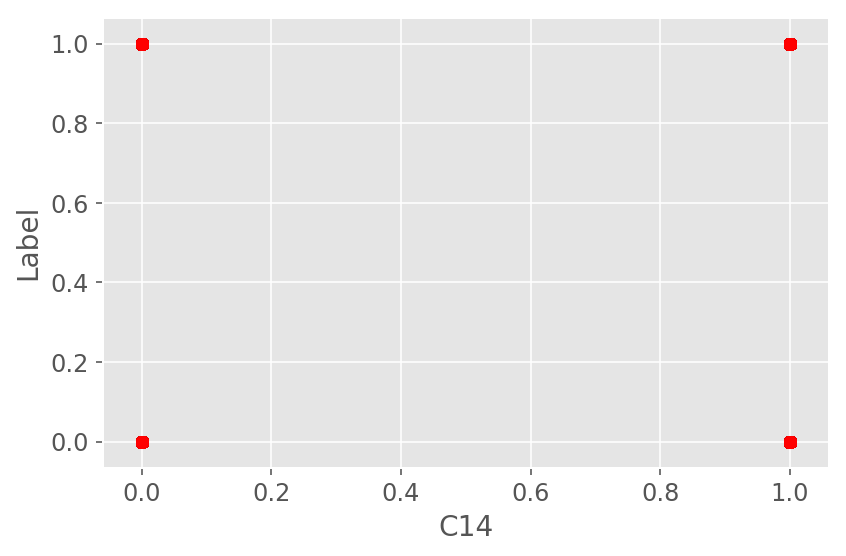

Saving figure C16


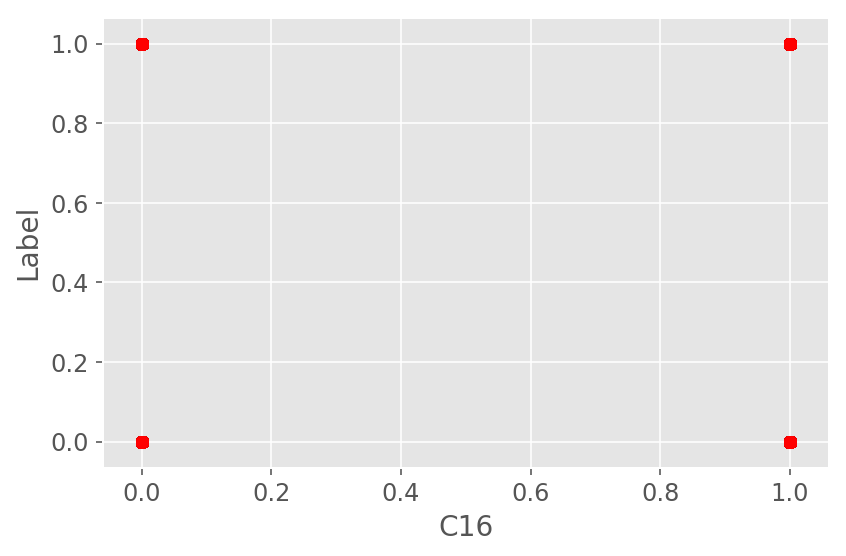

Saving figure C17


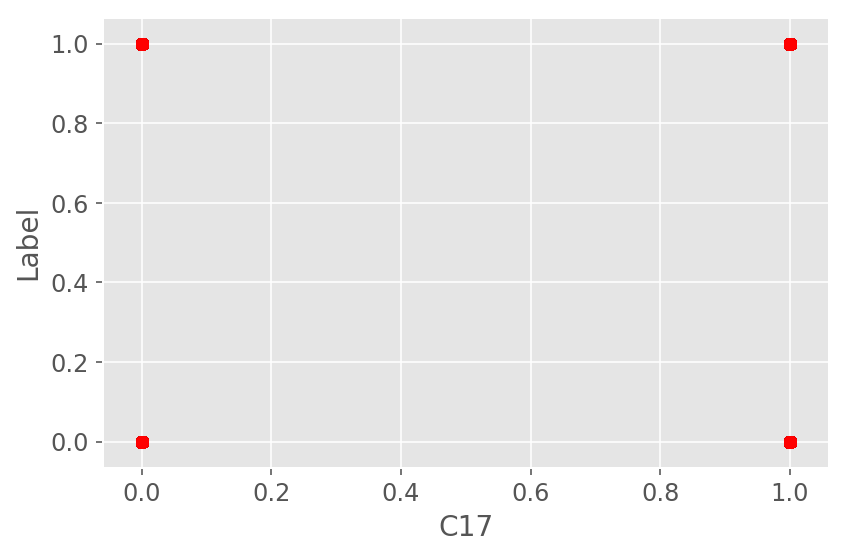

Saving figure C23


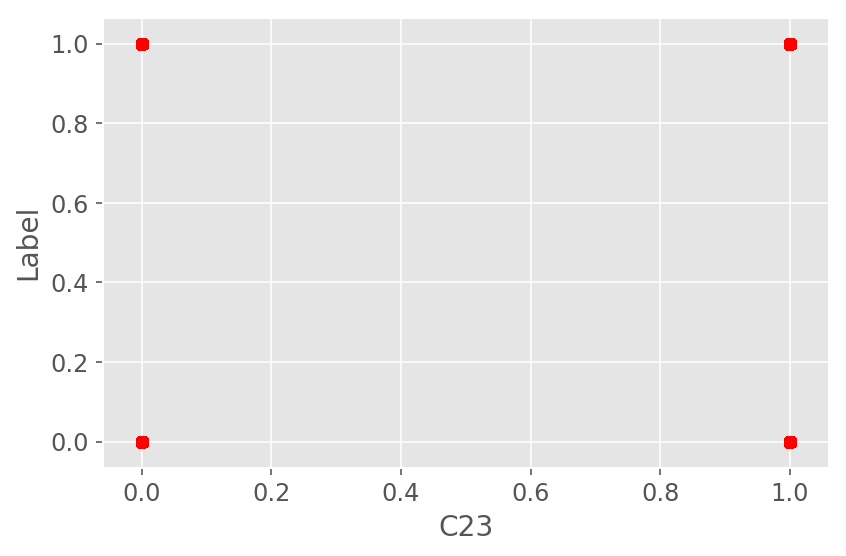

Saving figure Label


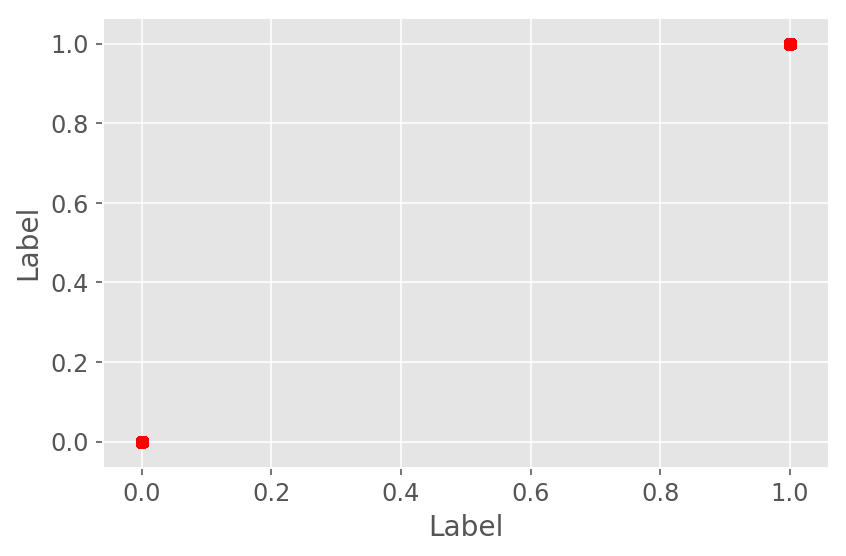

Saving figure I9_bin


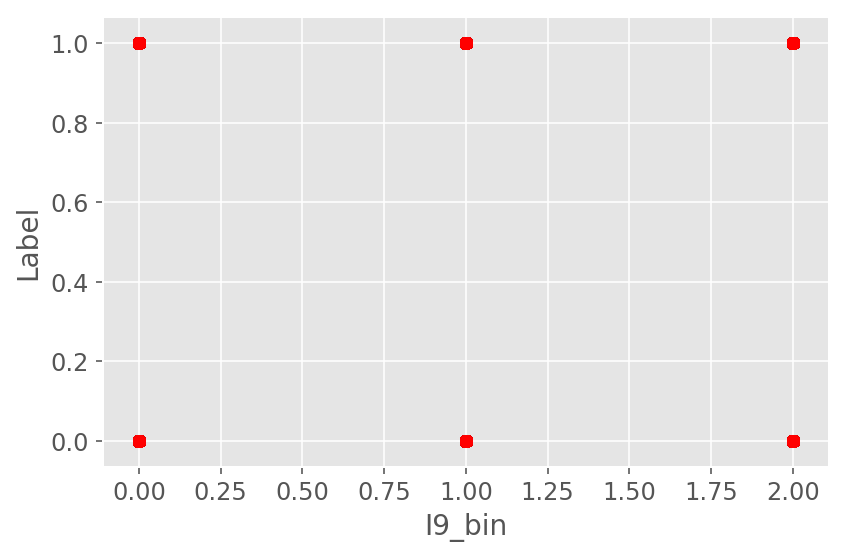

In [110]:
##Scatter plots versus Label
int_numerical_columns = [ x for x in df3.dtypes.index if df3.dtypes[x] == 'int64']
for num in int_numerical_columns:
    plt.scatter(x=df3[num], y=df3.Label, color='red')
    plt.ylabel('Label')
    plt.xlabel(num)
    save_fig(num, "label_Vs_scatter_plots")
    plt.show()

Saving figure label_Vs_scatter_plots-I1I1


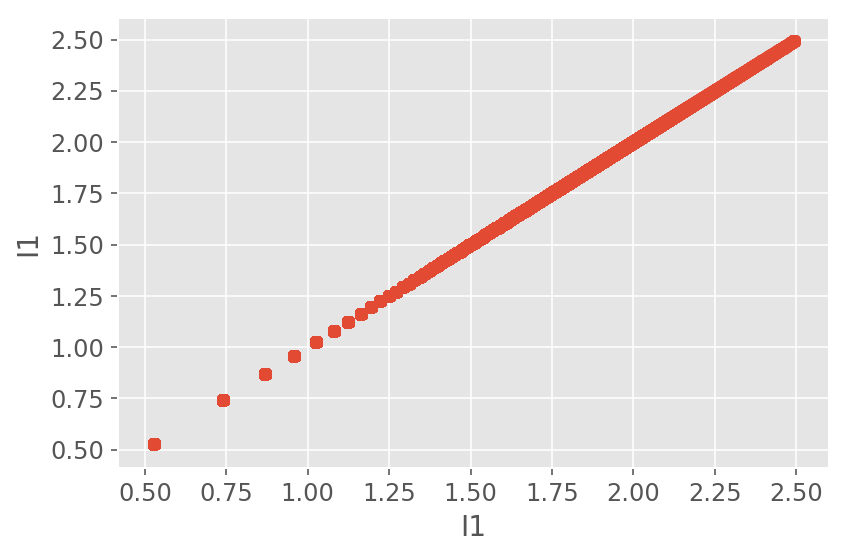

Saving figure label_Vs_scatter_plots-I1I2


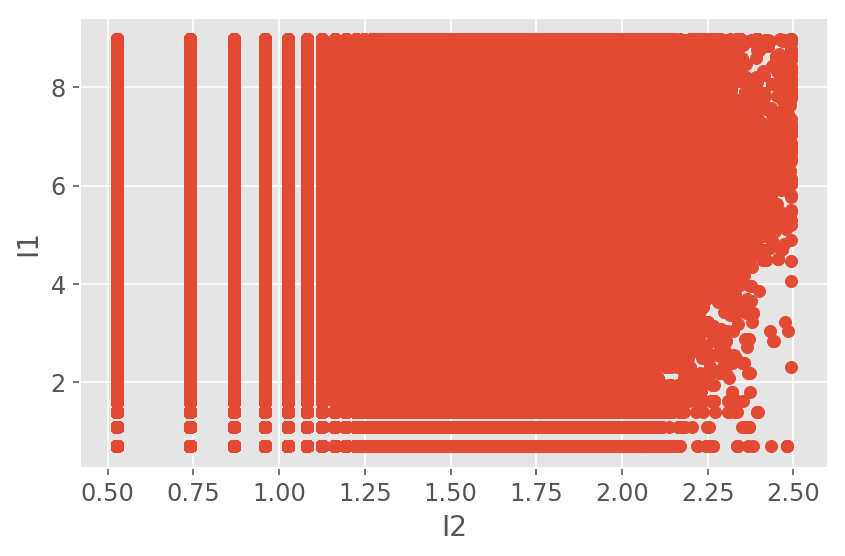

Saving figure label_Vs_scatter_plots-I1I3


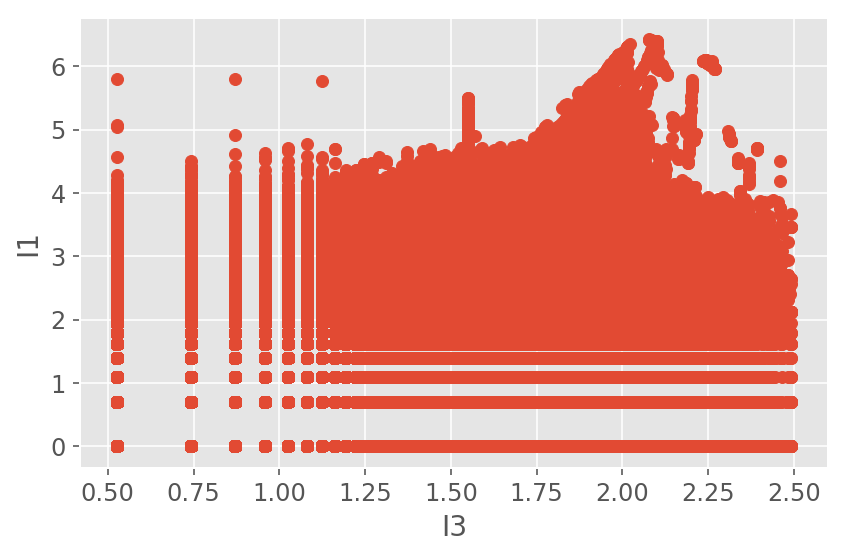

Saving figure label_Vs_scatter_plots-I1I4


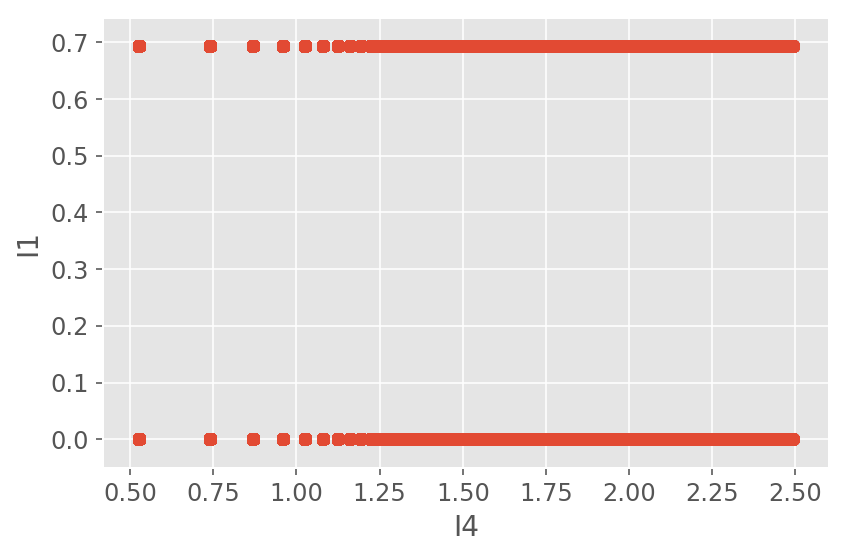

Saving figure label_Vs_scatter_plots-I1I5


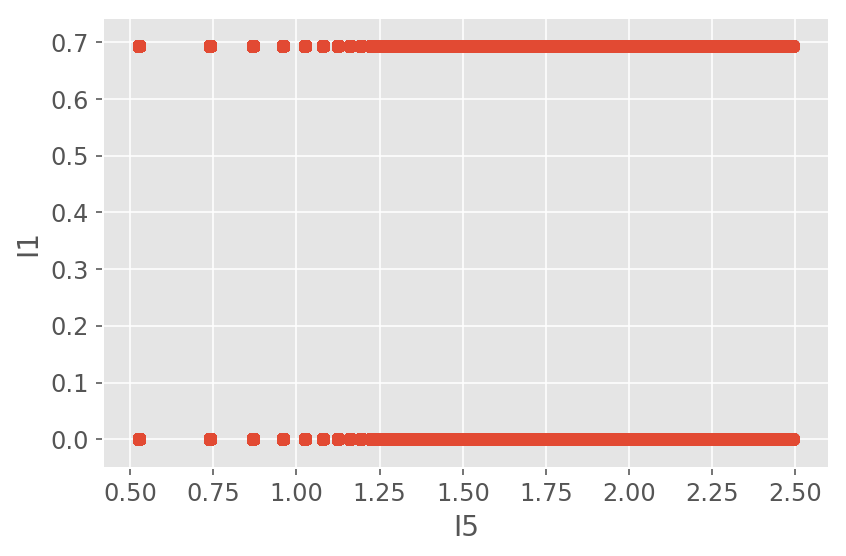

Saving figure label_Vs_scatter_plots-I1I6


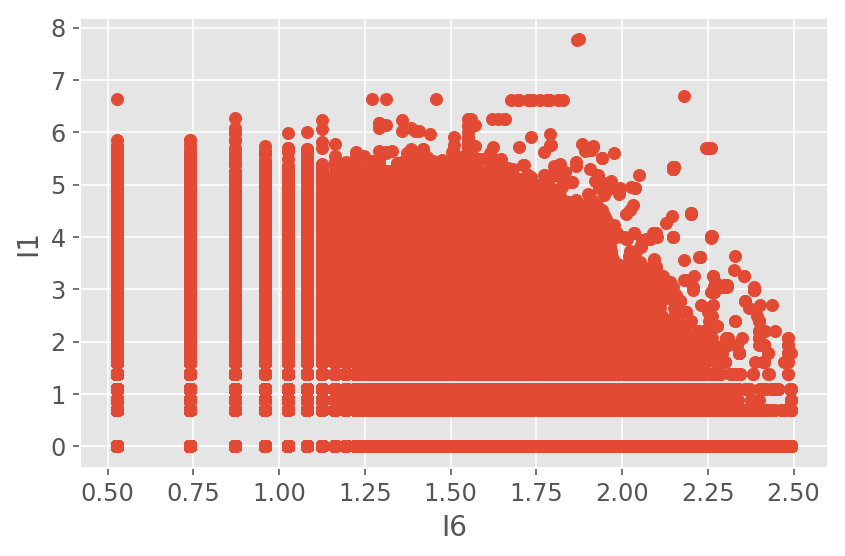

Saving figure label_Vs_scatter_plots-I1I7


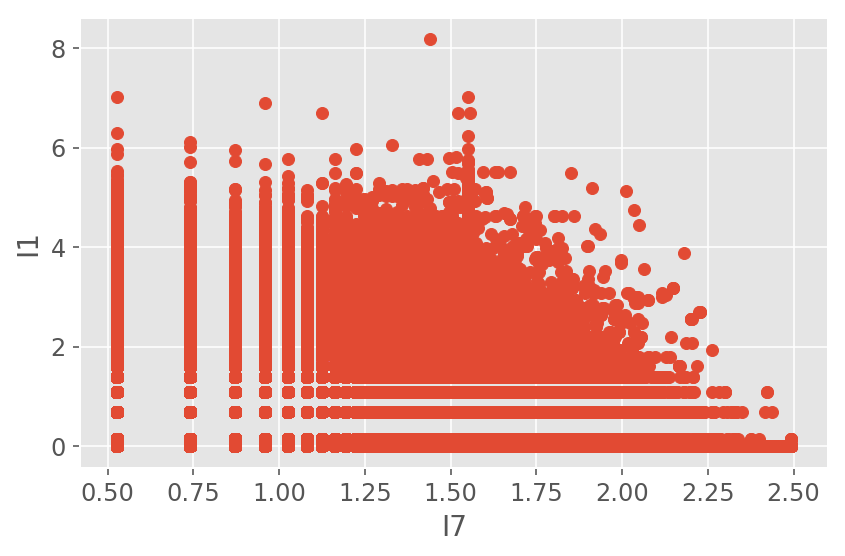

Saving figure label_Vs_scatter_plots-I1I8


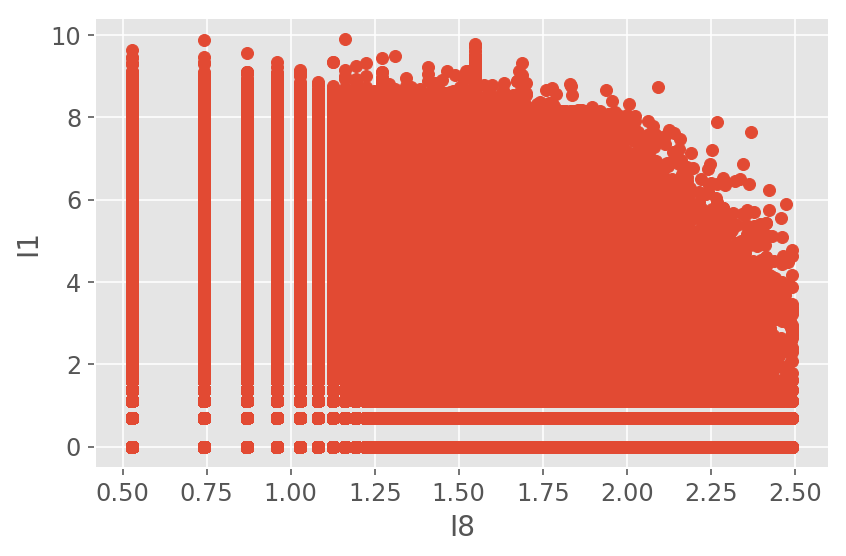

Saving figure label_Vs_scatter_plots-I1I10


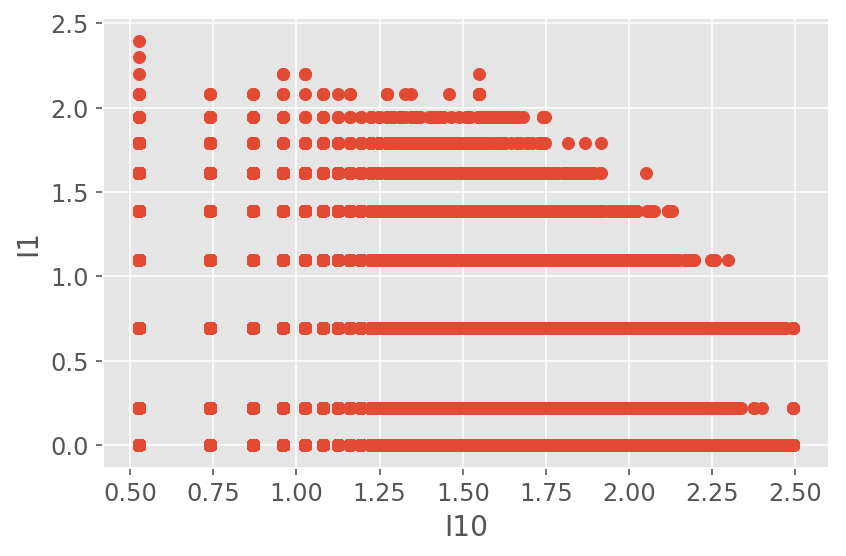

Saving figure label_Vs_scatter_plots-I1I11


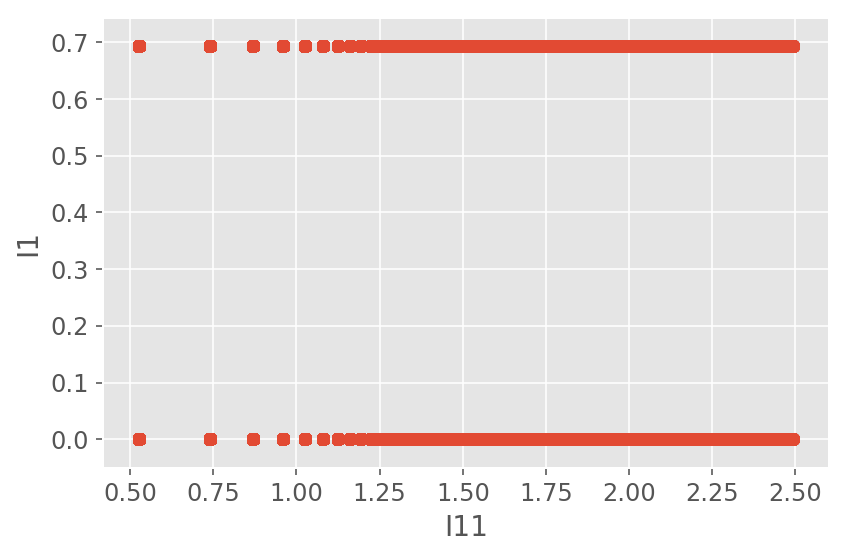

Saving figure label_Vs_scatter_plots-I1I12


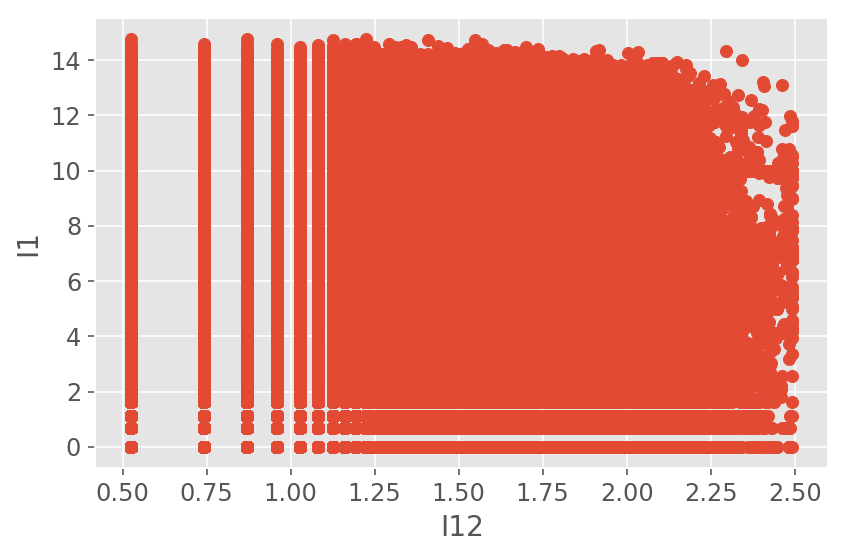

Saving figure label_Vs_scatter_plots-I1I13


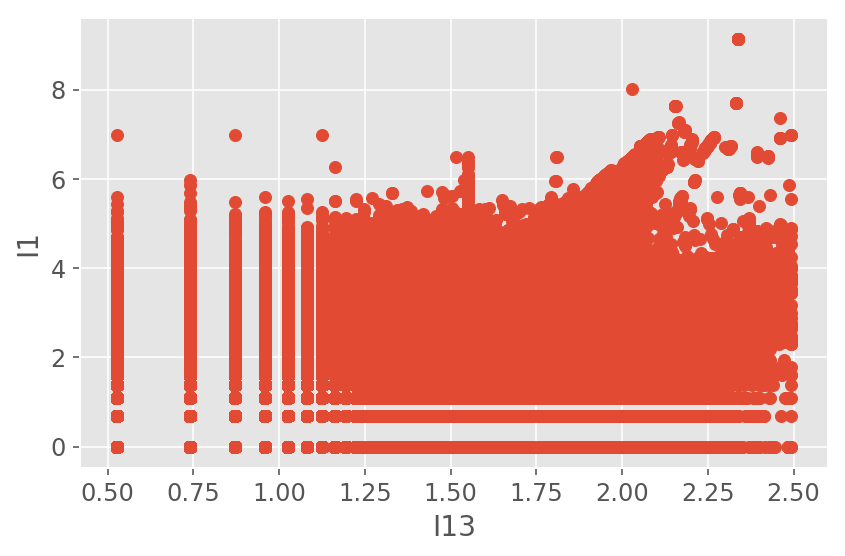

Saving figure label_Vs_scatter_plots-I1new_feat1


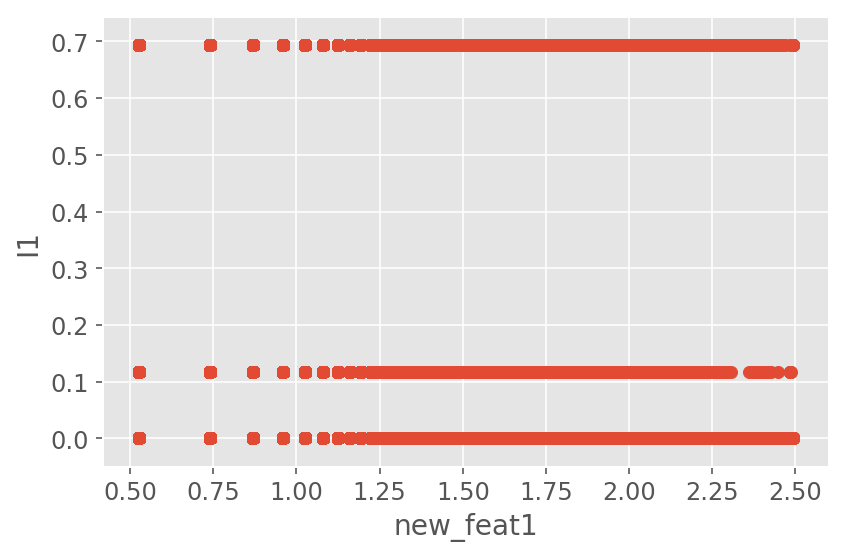

Saving figure label_Vs_scatter_plots-I1new_feat2


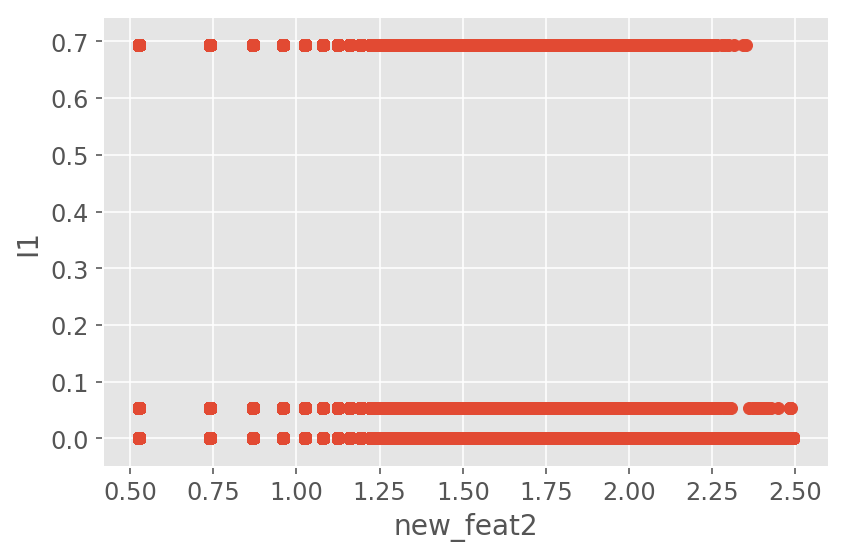

Saving figure label_Vs_scatter_plots-I1new_feat3


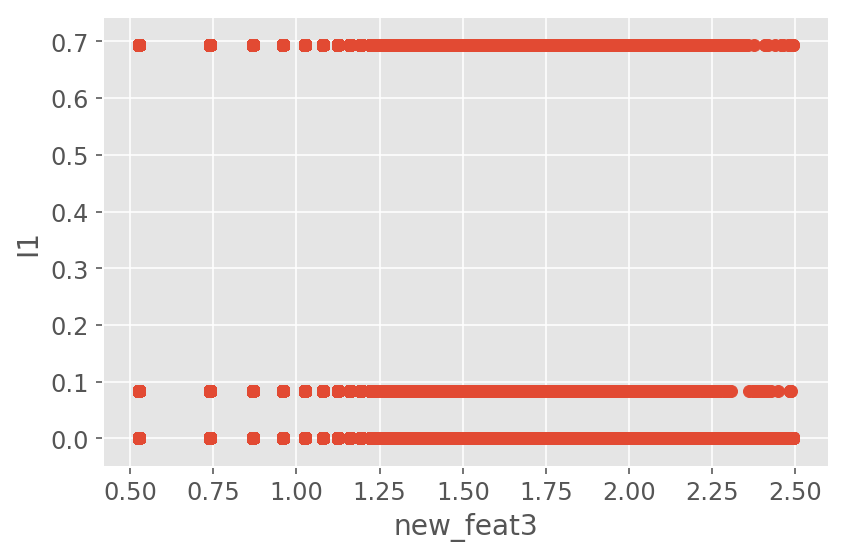

Saving figure label_Vs_scatter_plots-I1new_feat4


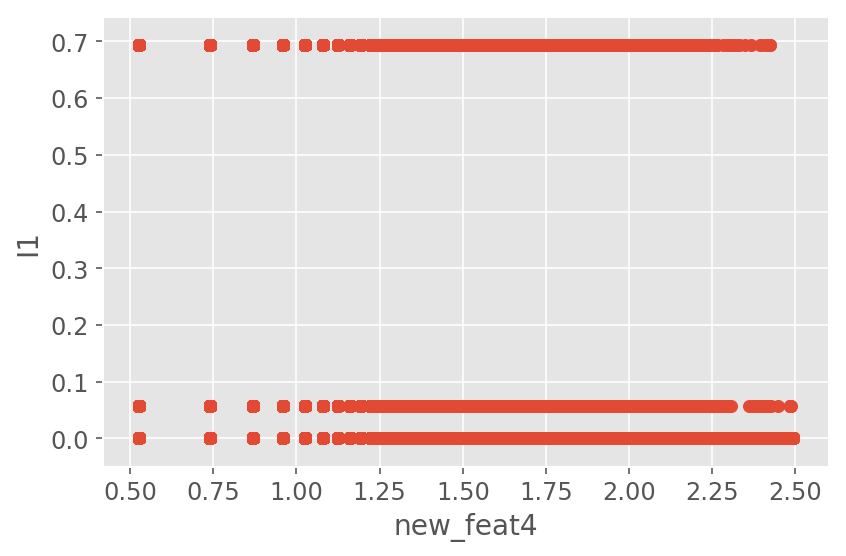

Saving figure label_Vs_scatter_plots-I1new_feat5


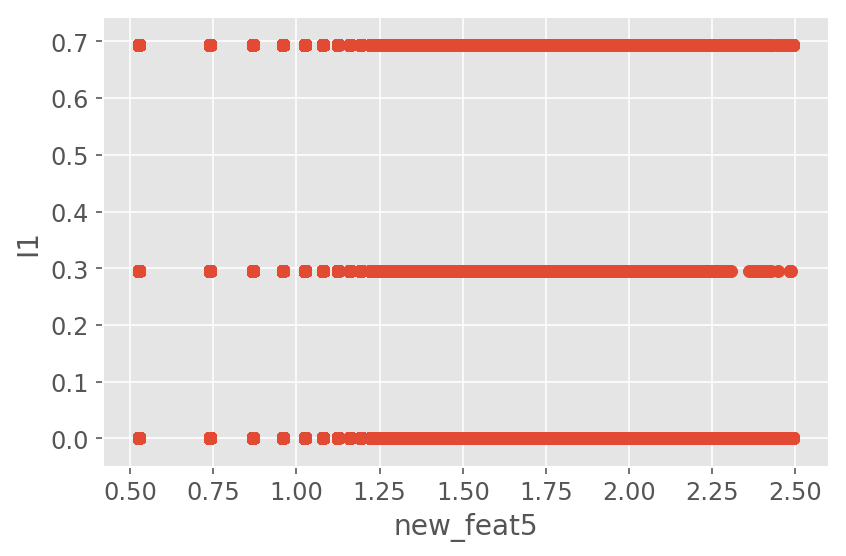

Saving figure label_Vs_scatter_plots-I1new_feat6


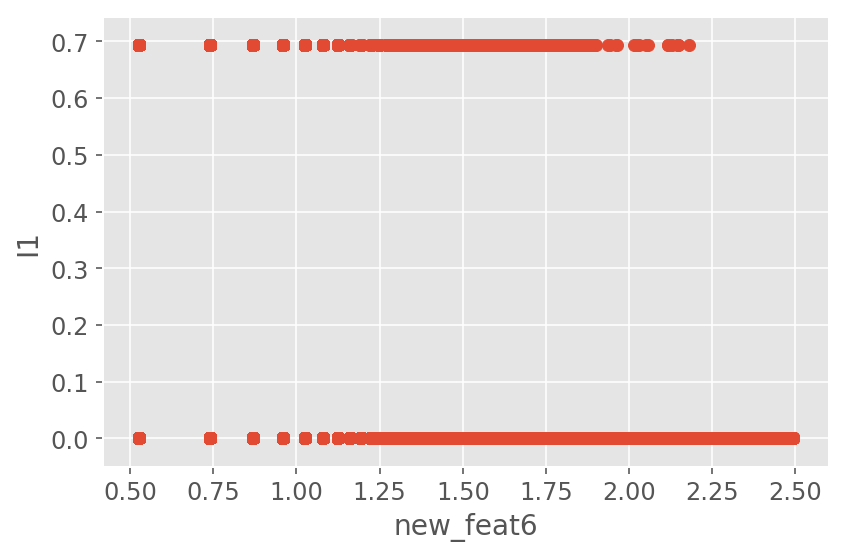

Saving figure label_Vs_scatter_plots-I2I1


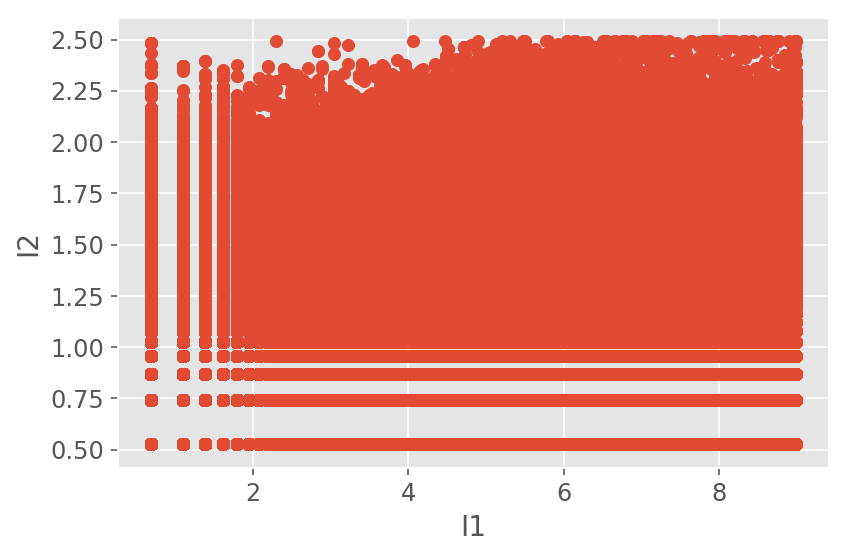

Saving figure label_Vs_scatter_plots-I2I2


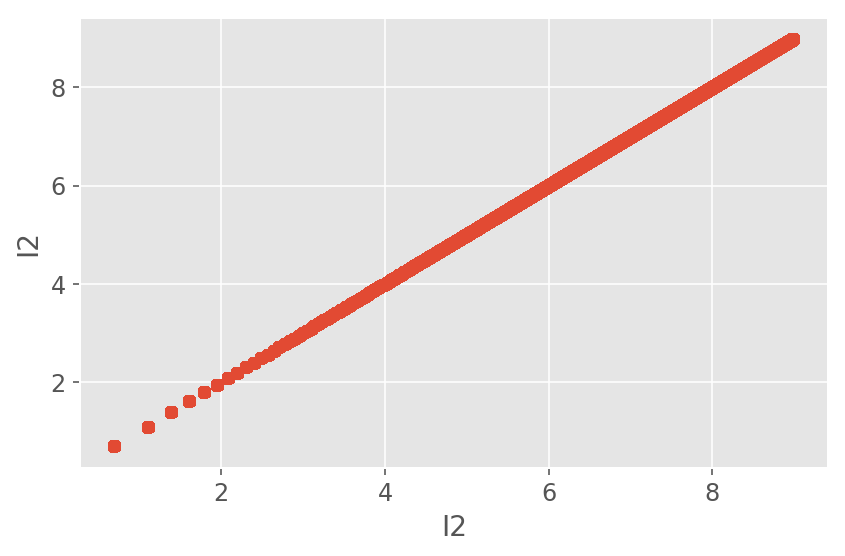

Saving figure label_Vs_scatter_plots-I2I3


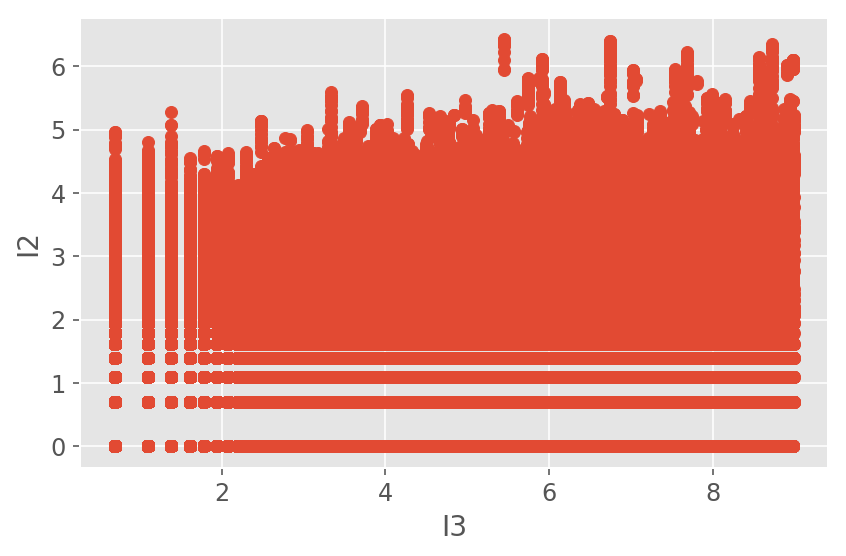

Saving figure label_Vs_scatter_plots-I2I4


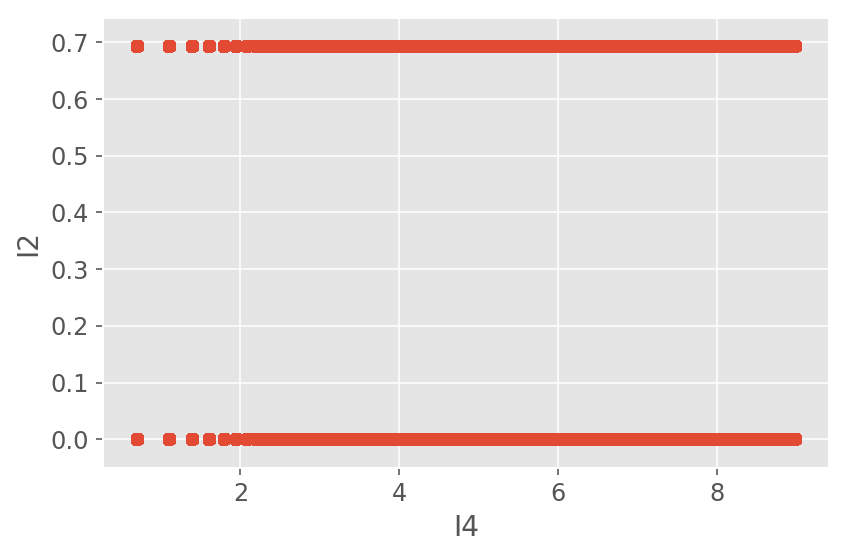

Saving figure label_Vs_scatter_plots-I2I5


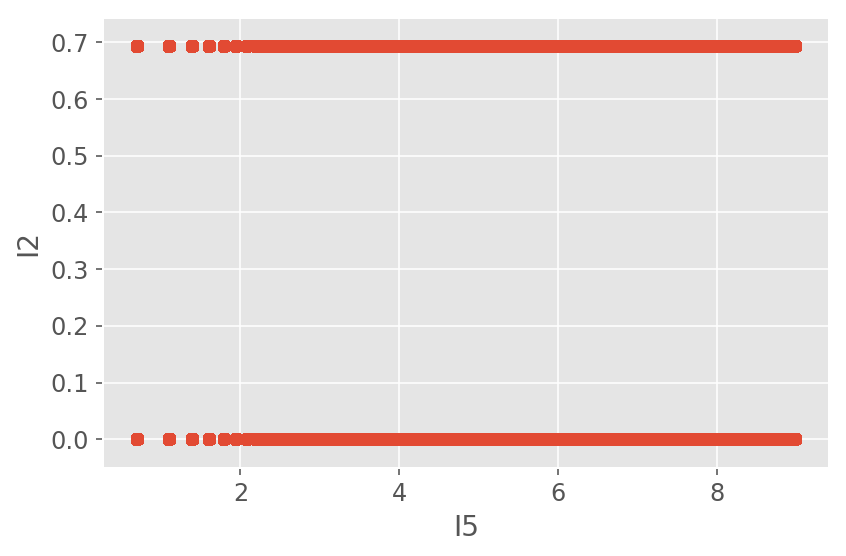

Saving figure label_Vs_scatter_plots-I2I6


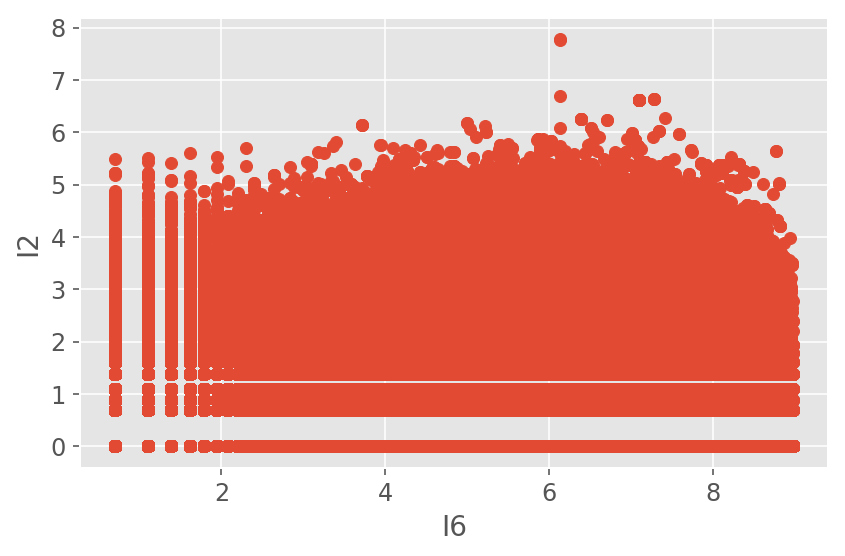

Saving figure label_Vs_scatter_plots-I2I7


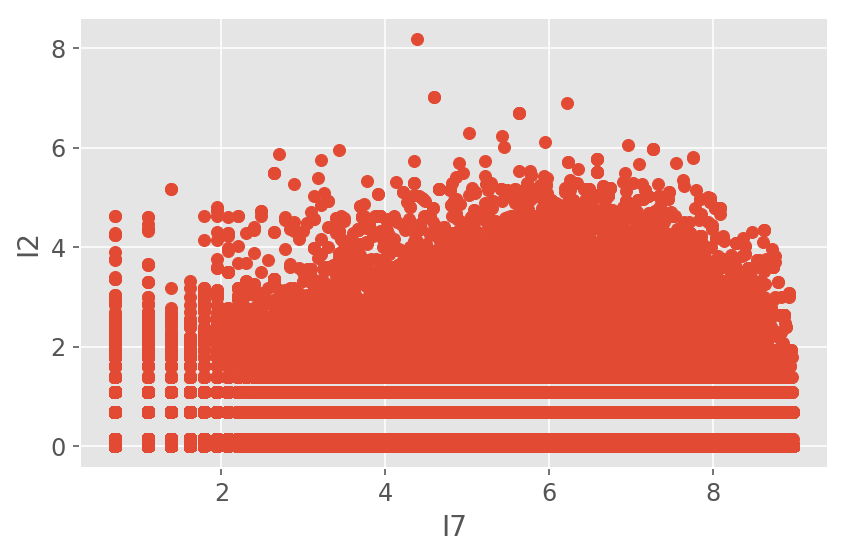

Saving figure label_Vs_scatter_plots-I2I8


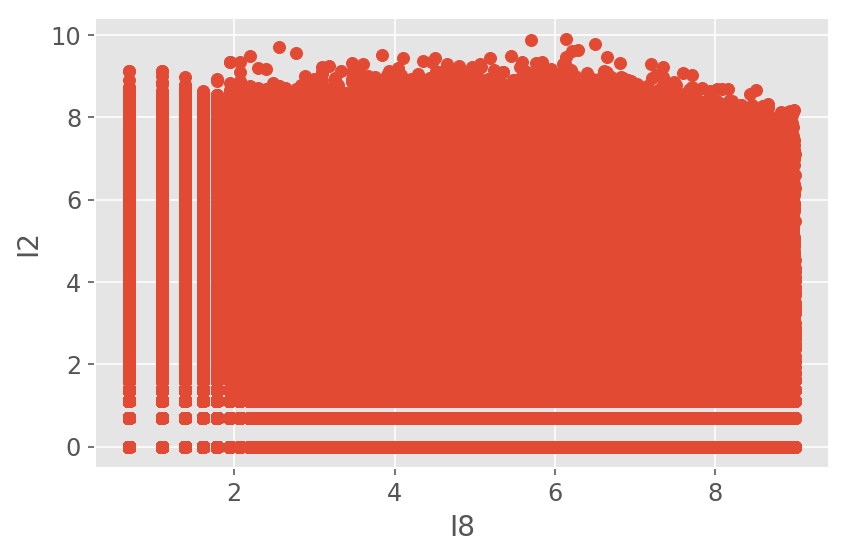

Saving figure label_Vs_scatter_plots-I2I10


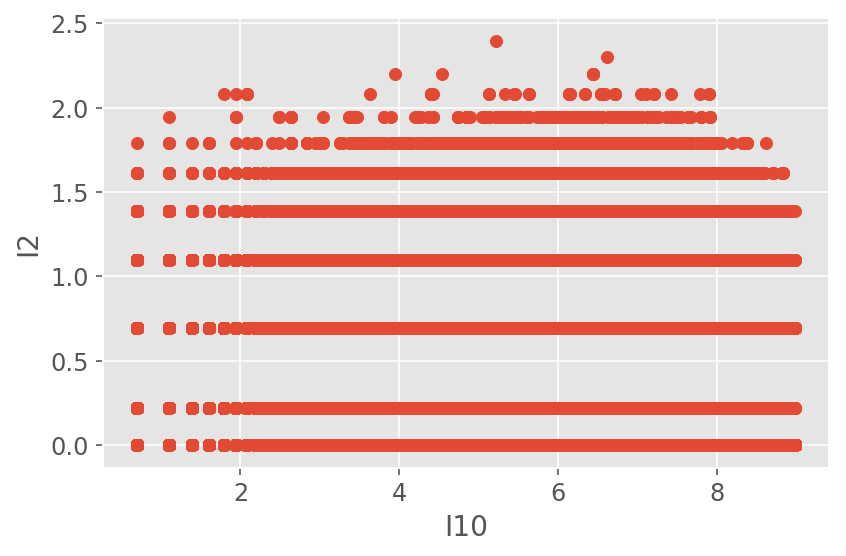

Saving figure label_Vs_scatter_plots-I2I11


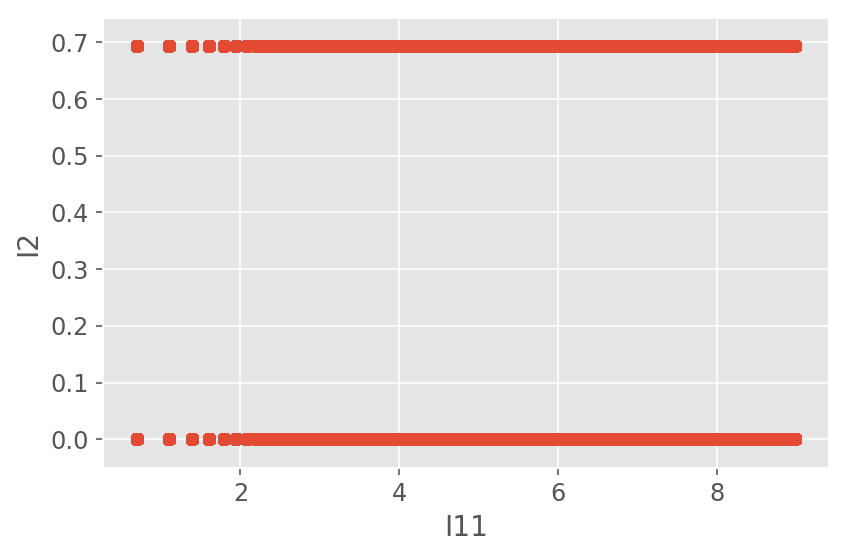

Saving figure label_Vs_scatter_plots-I2I12


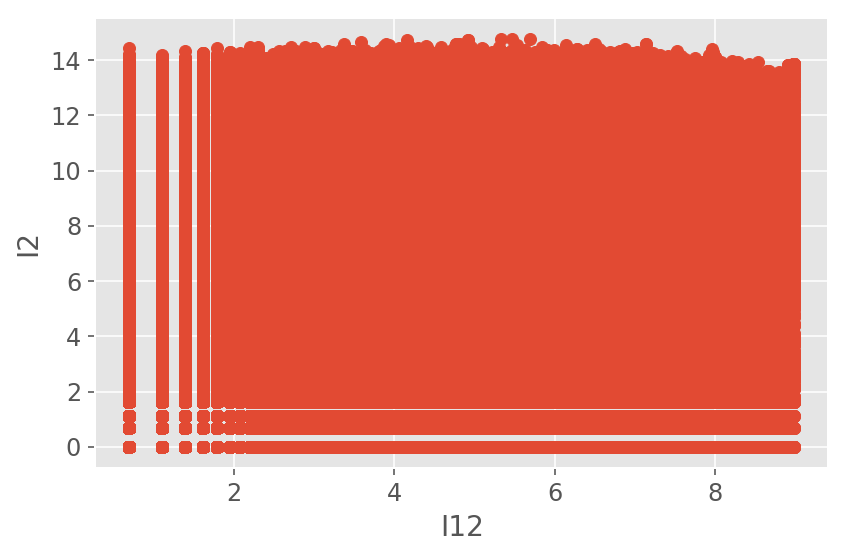

Saving figure label_Vs_scatter_plots-I2I13


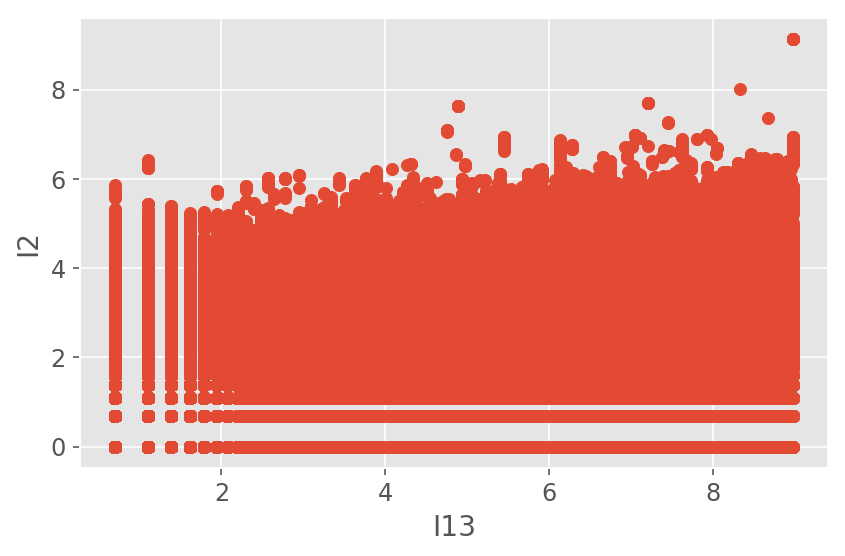

Saving figure label_Vs_scatter_plots-I2new_feat1


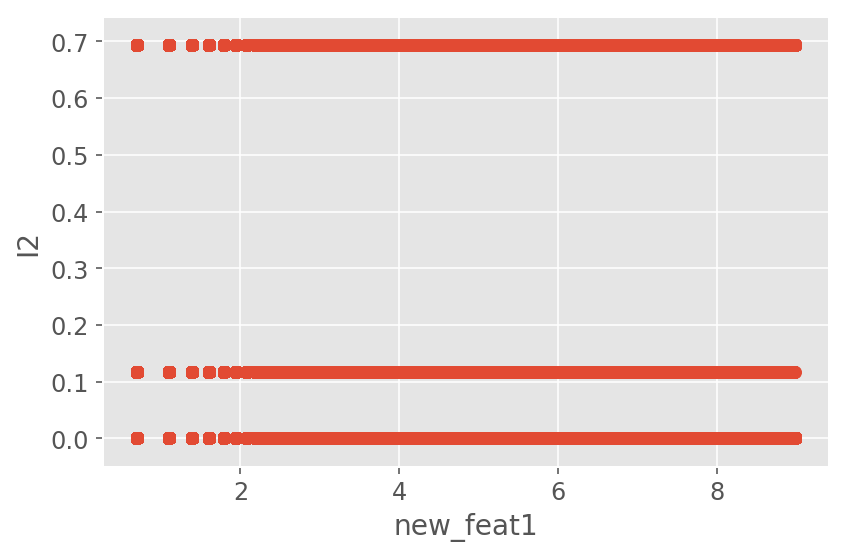

Saving figure label_Vs_scatter_plots-I2new_feat2


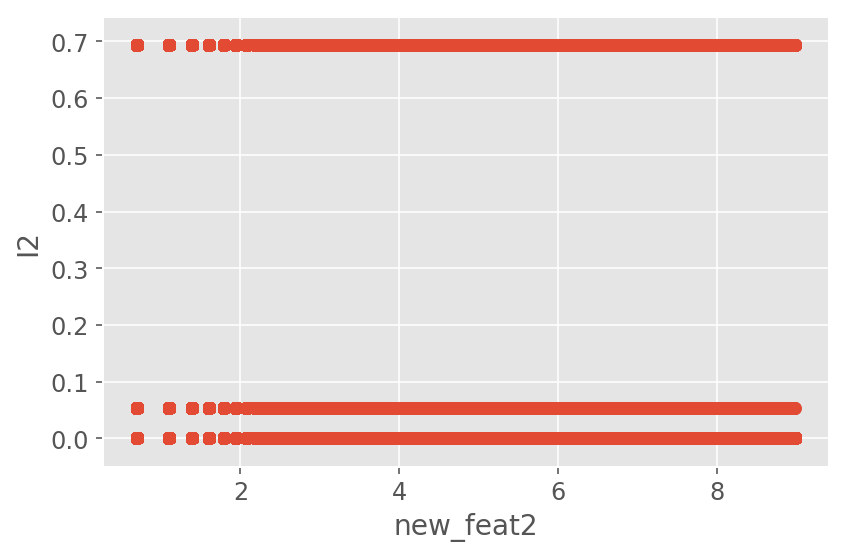

Saving figure label_Vs_scatter_plots-I2new_feat3


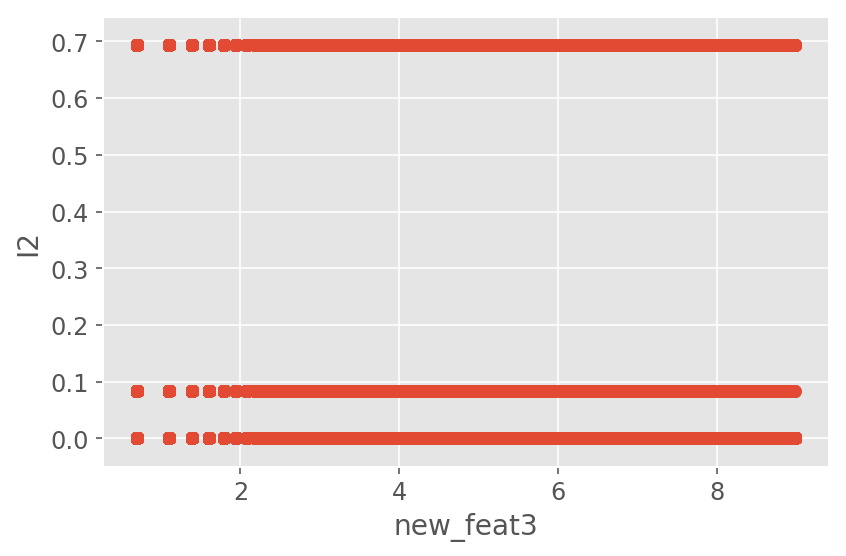

Saving figure label_Vs_scatter_plots-I2new_feat4


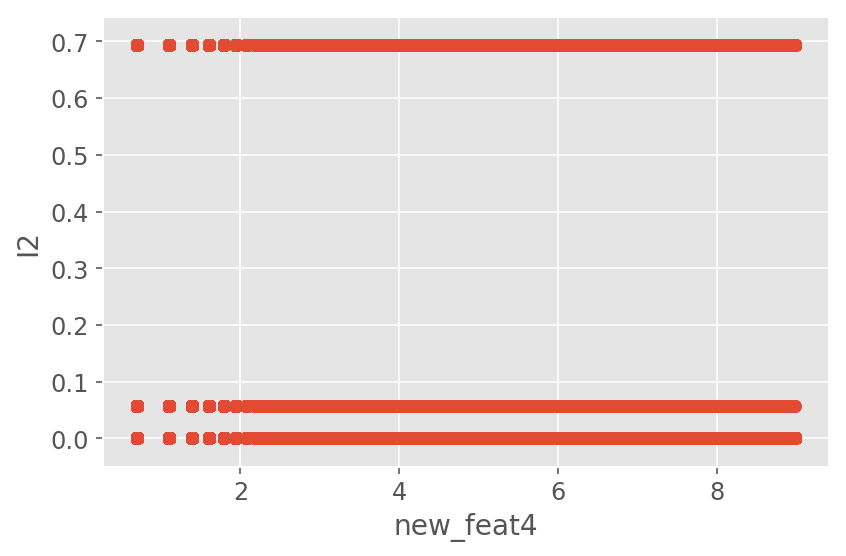

Saving figure label_Vs_scatter_plots-I2new_feat5


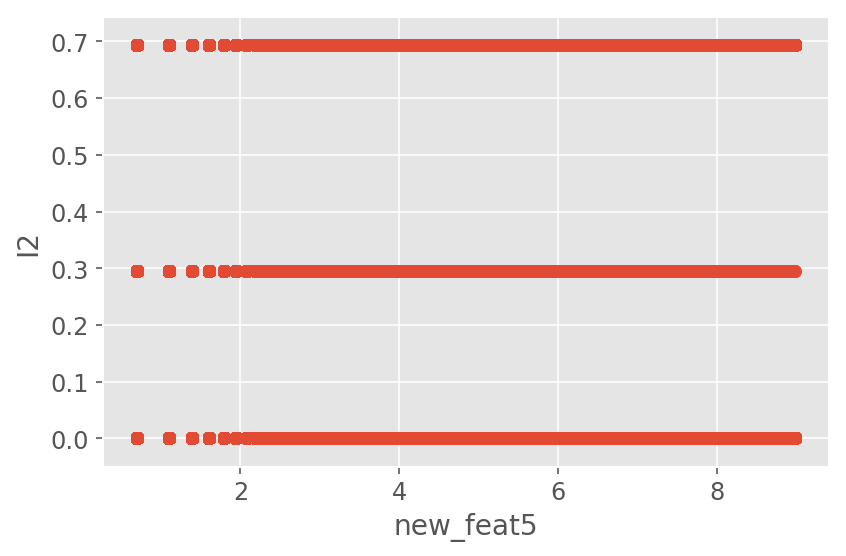

Saving figure label_Vs_scatter_plots-I2new_feat6


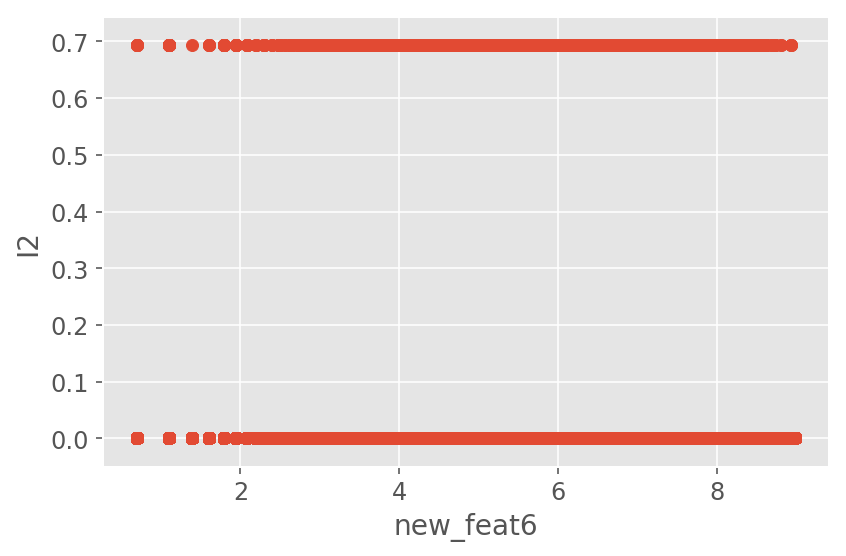

Saving figure label_Vs_scatter_plots-I3I1


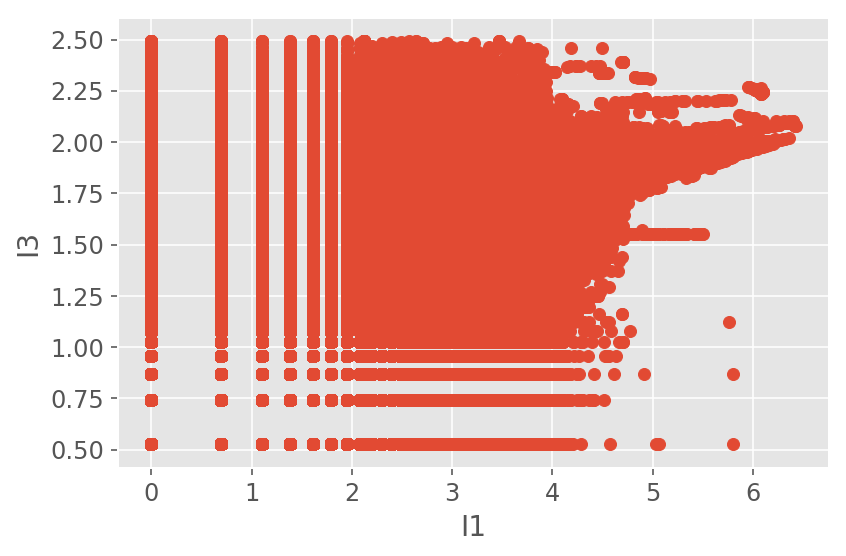

Saving figure label_Vs_scatter_plots-I3I2


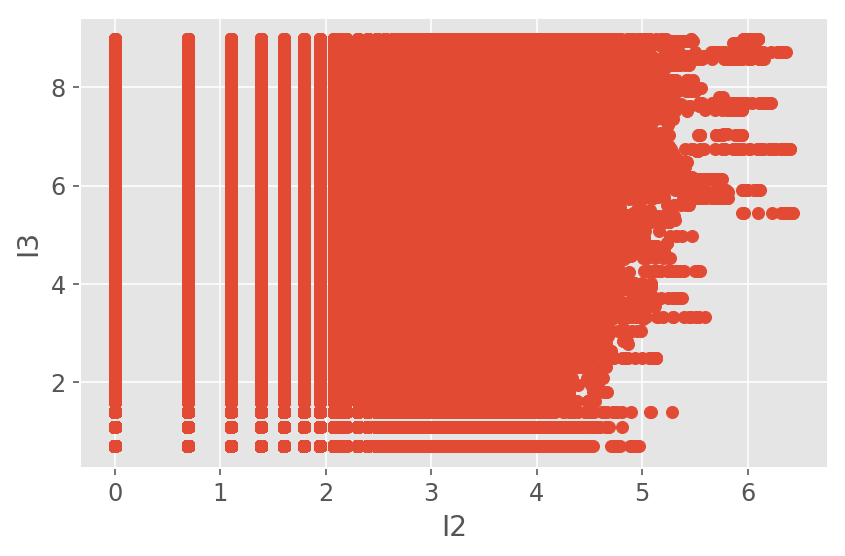

Saving figure label_Vs_scatter_plots-I3I3


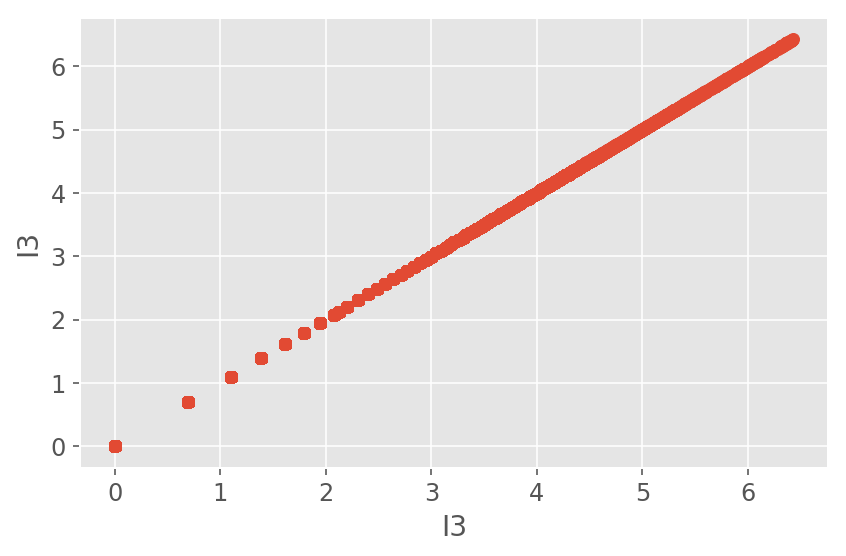

Saving figure label_Vs_scatter_plots-I3I4


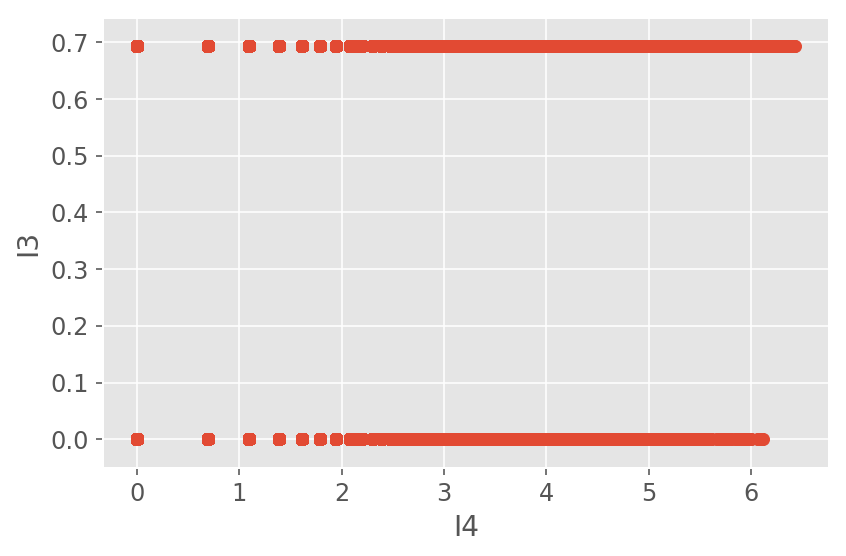

Saving figure label_Vs_scatter_plots-I3I5


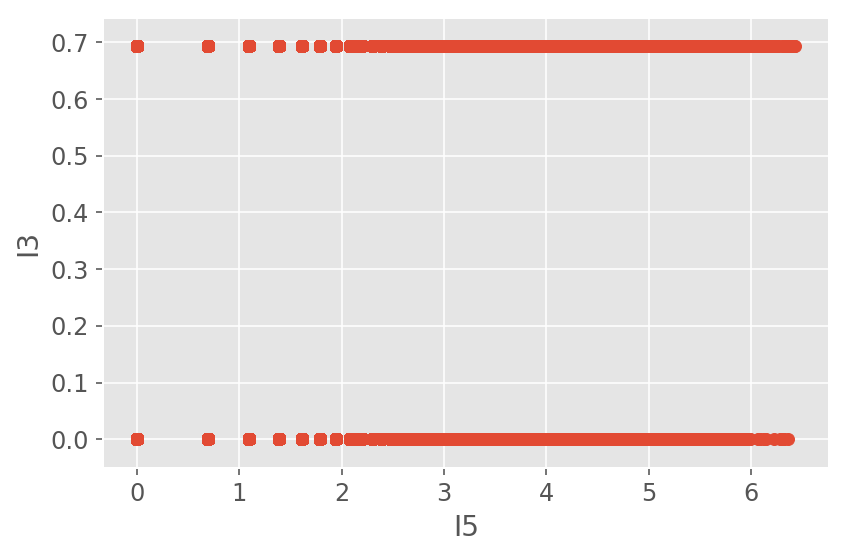

Saving figure label_Vs_scatter_plots-I3I6


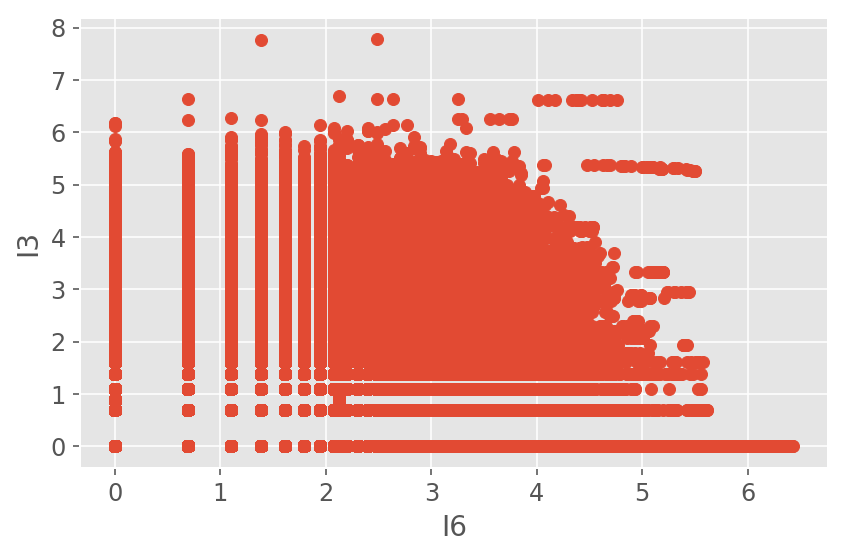

Saving figure label_Vs_scatter_plots-I3I7


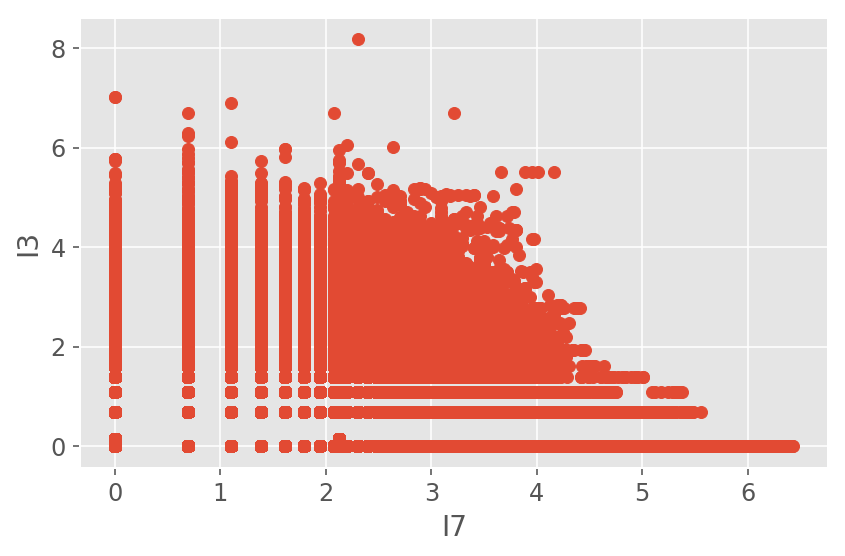

Saving figure label_Vs_scatter_plots-I3I8


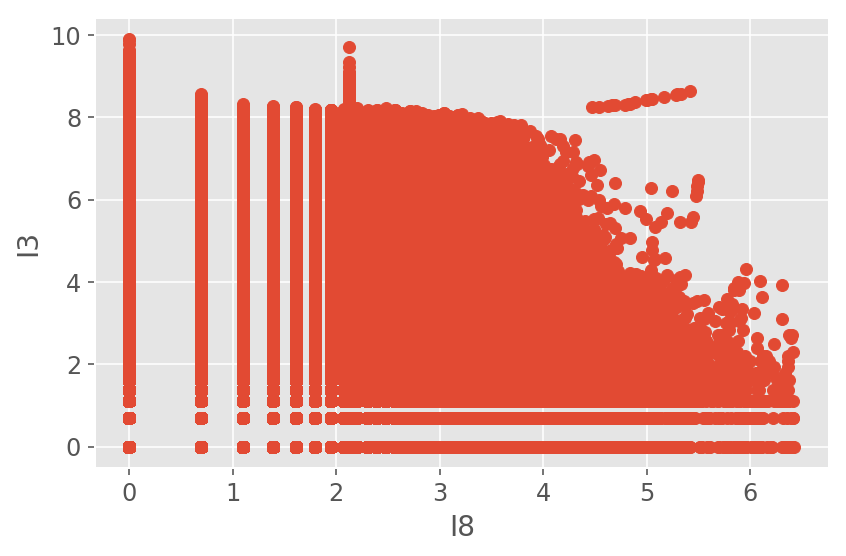

Saving figure label_Vs_scatter_plots-I3I10


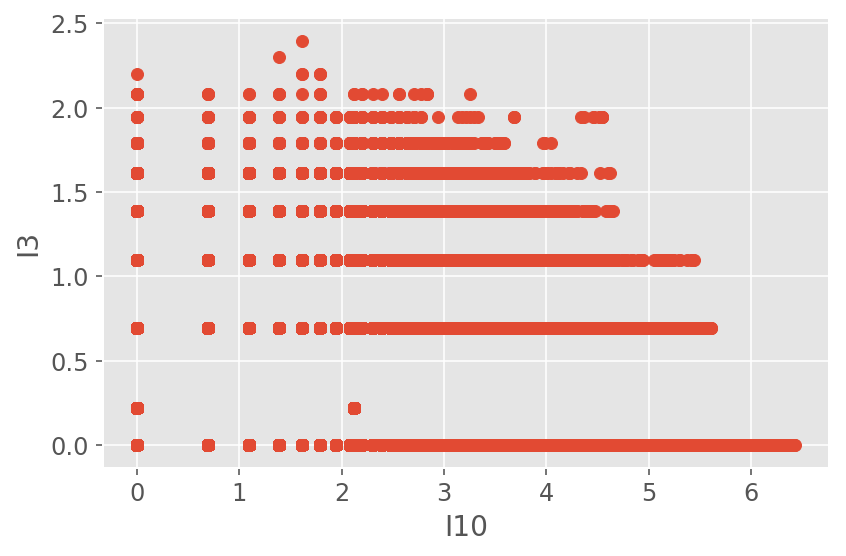

Saving figure label_Vs_scatter_plots-I3I11


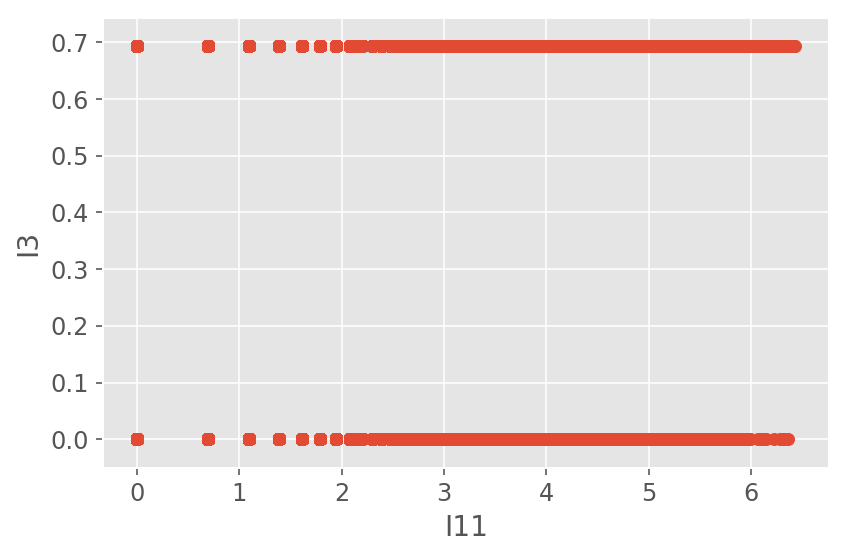

Saving figure label_Vs_scatter_plots-I3I12


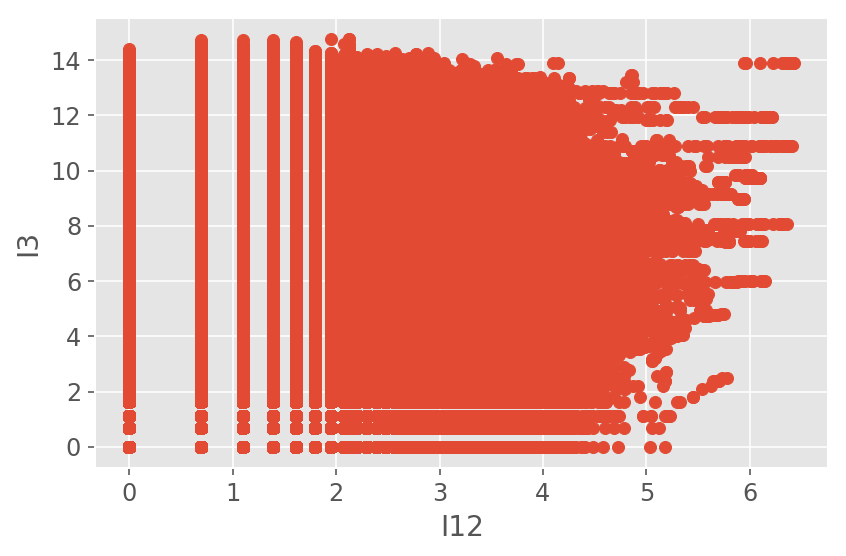

Saving figure label_Vs_scatter_plots-I3I13


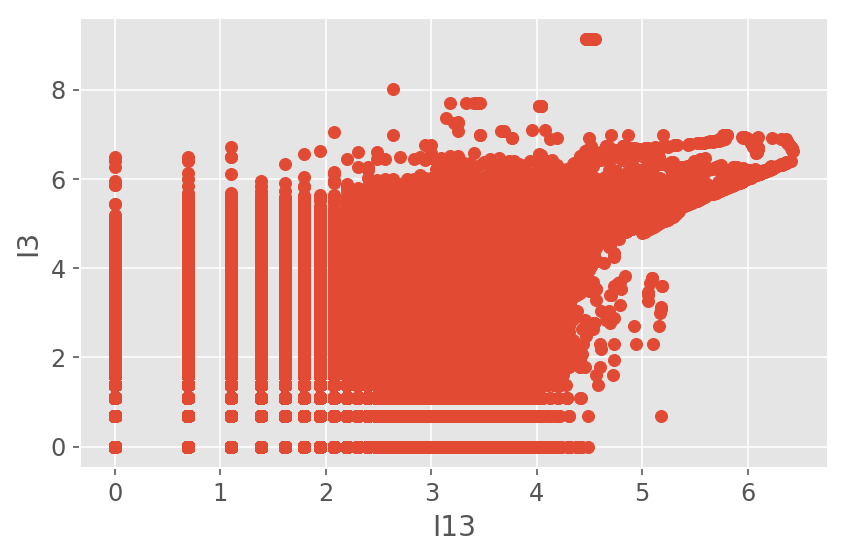

Saving figure label_Vs_scatter_plots-I3new_feat1


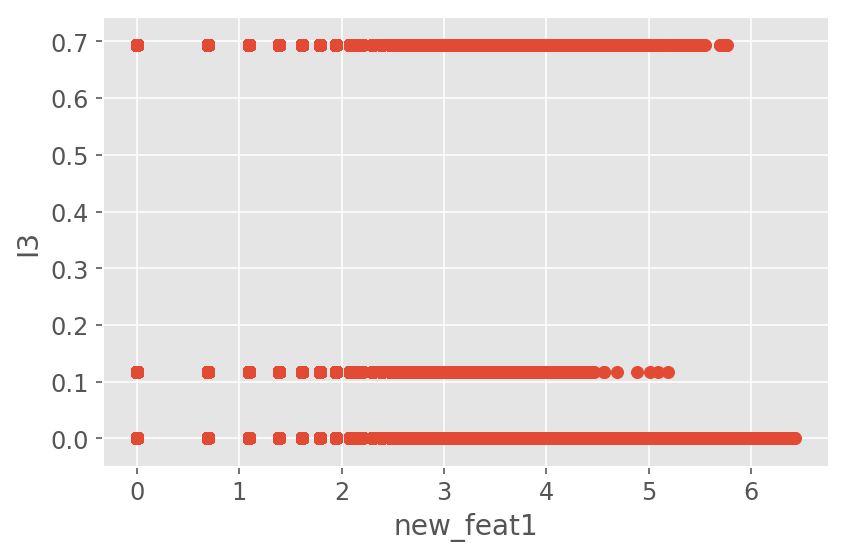

Saving figure label_Vs_scatter_plots-I3new_feat2


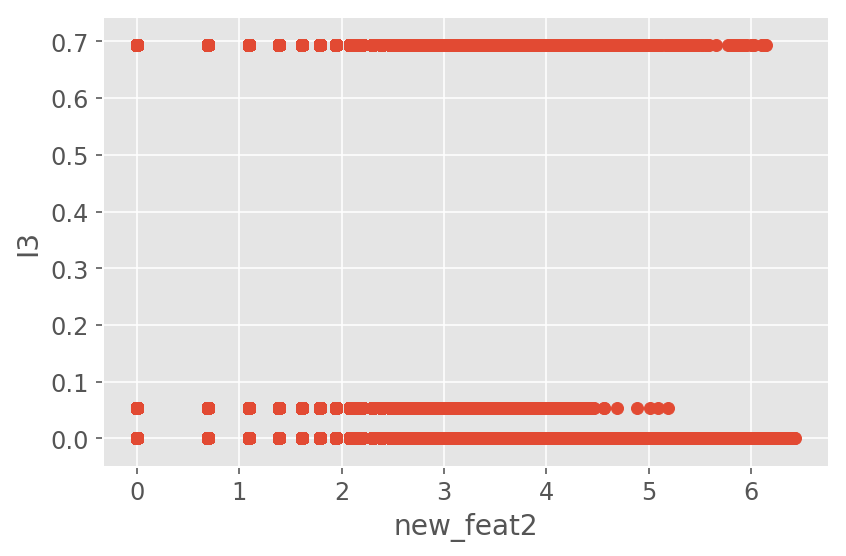

Saving figure label_Vs_scatter_plots-I3new_feat3


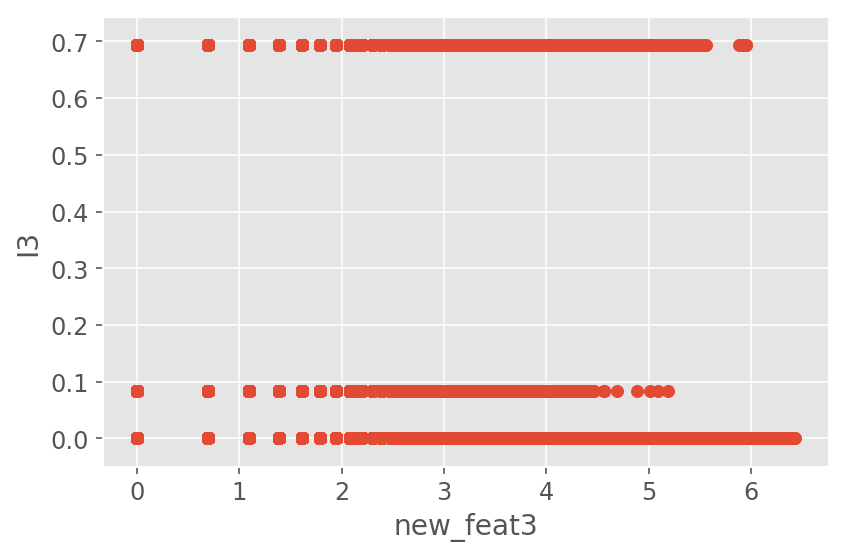

Saving figure label_Vs_scatter_plots-I3new_feat4


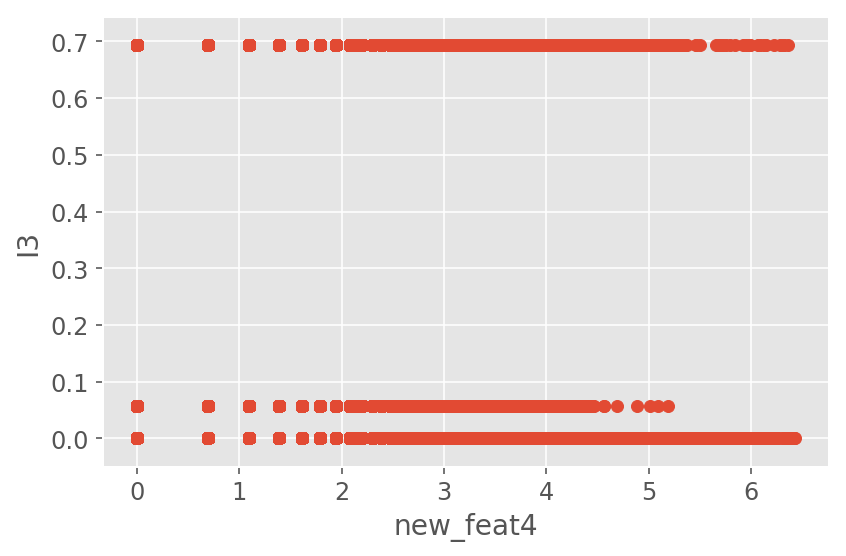

Saving figure label_Vs_scatter_plots-I3new_feat5


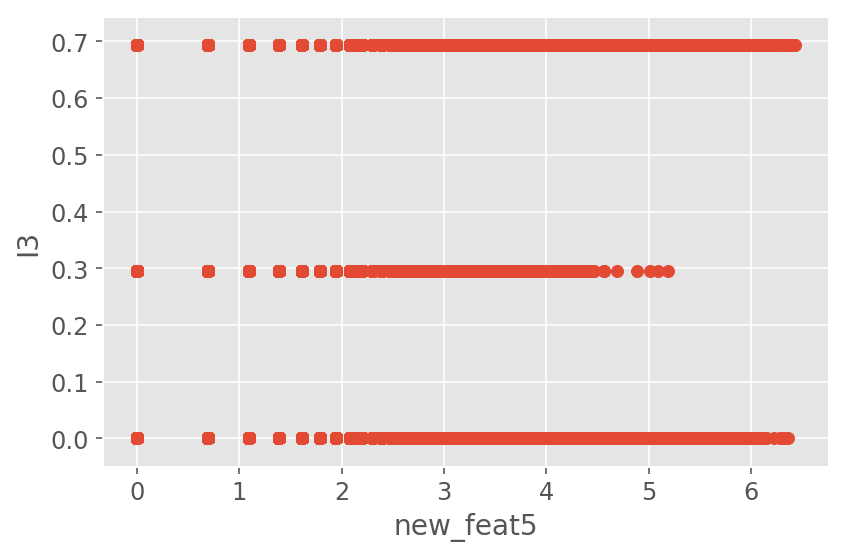

Saving figure label_Vs_scatter_plots-I3new_feat6


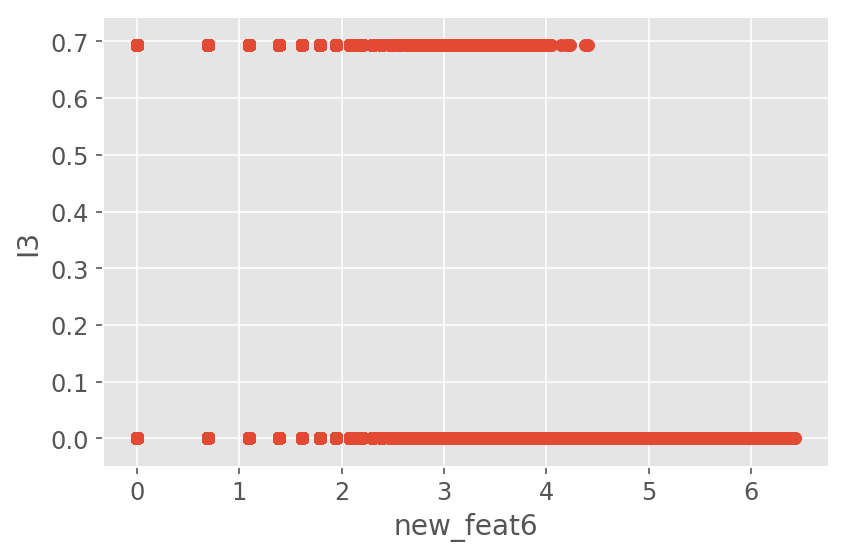

Saving figure label_Vs_scatter_plots-I4I1


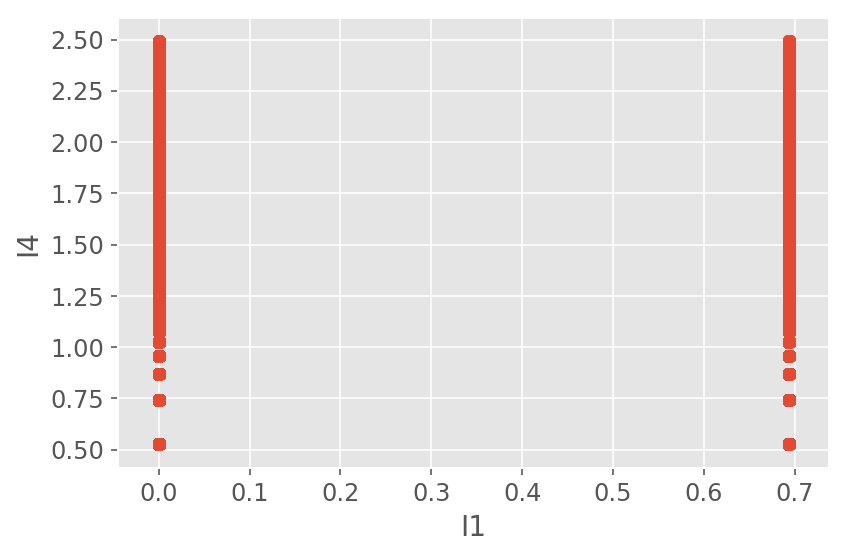

Saving figure label_Vs_scatter_plots-I4I2


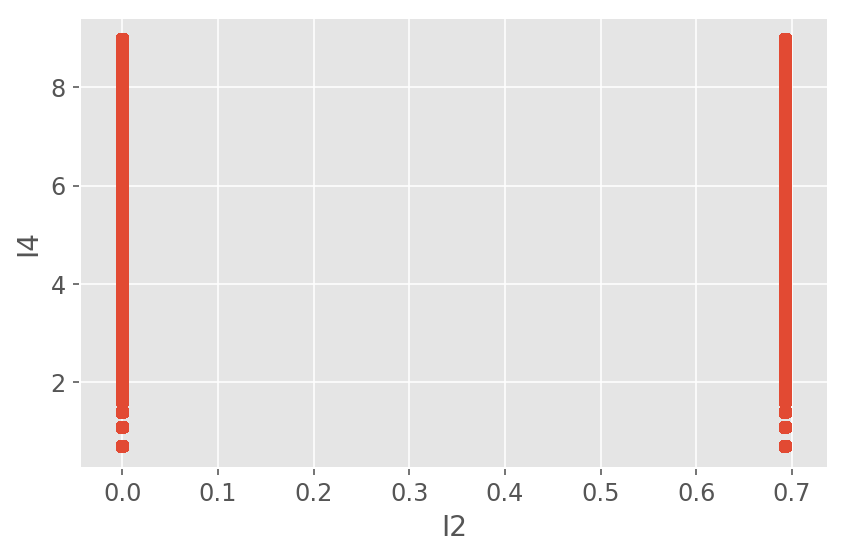

Saving figure label_Vs_scatter_plots-I4I3


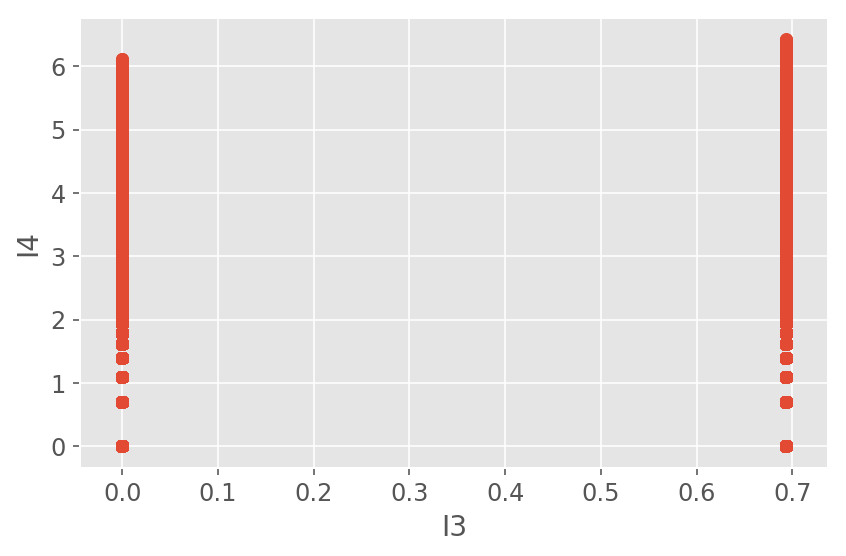

Saving figure label_Vs_scatter_plots-I4I4


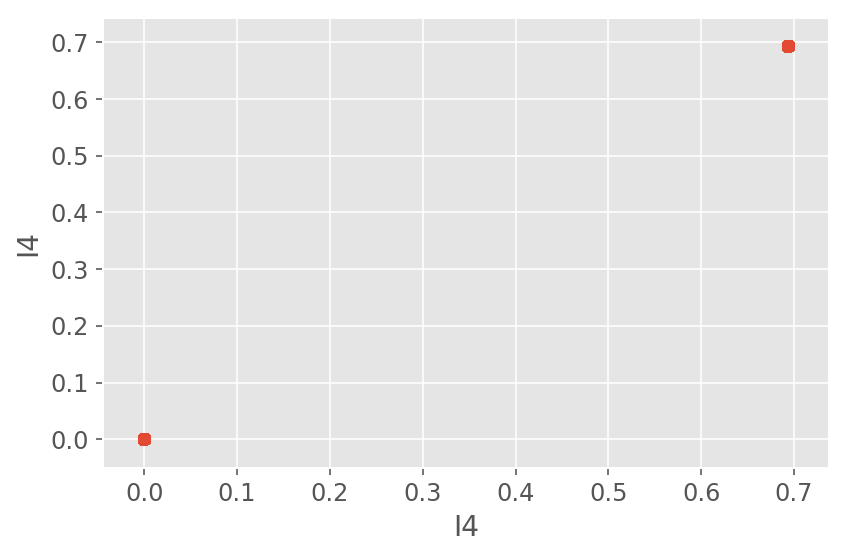

Saving figure label_Vs_scatter_plots-I4I5


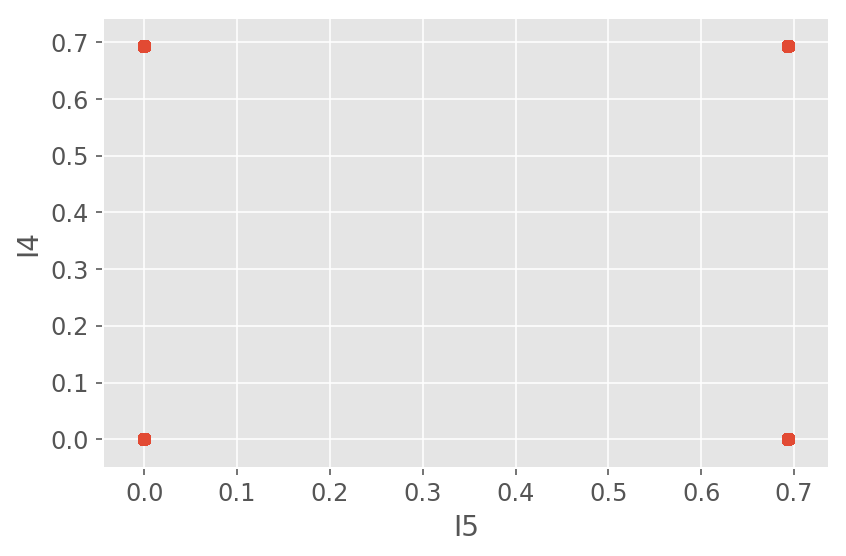

Saving figure label_Vs_scatter_plots-I4I6


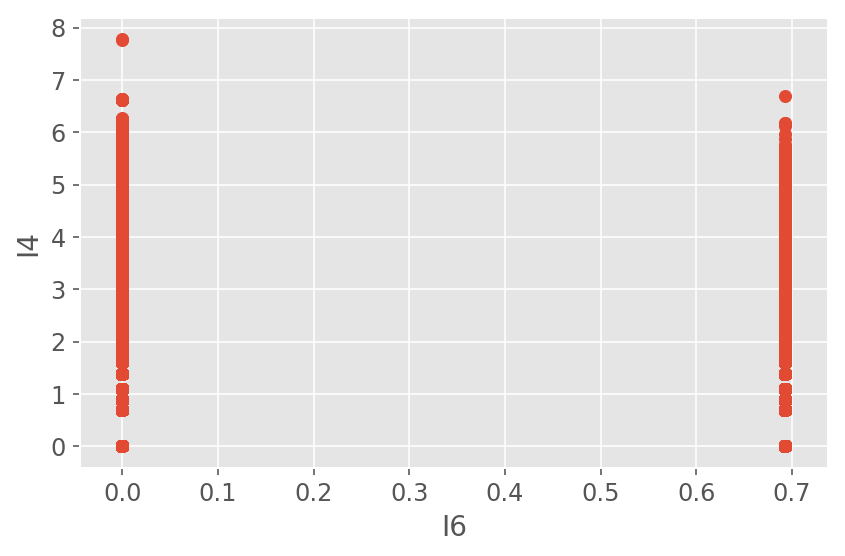

Saving figure label_Vs_scatter_plots-I4I7


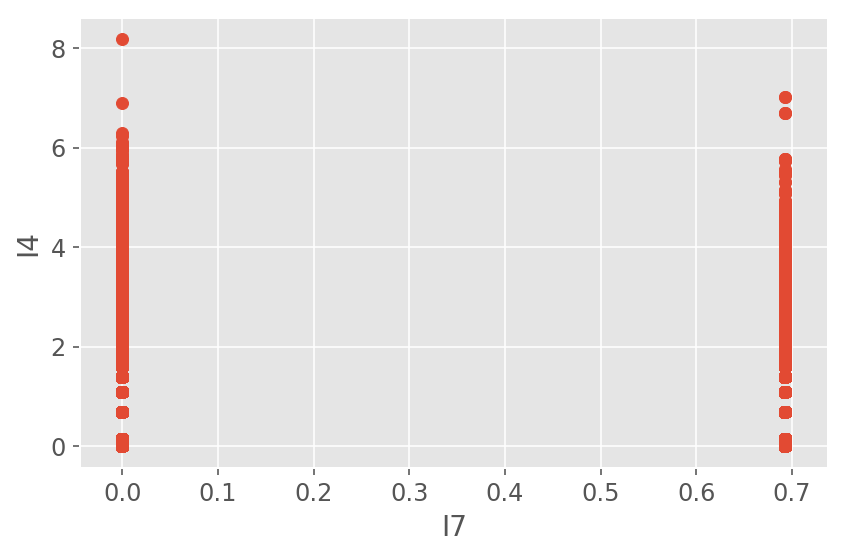

Saving figure label_Vs_scatter_plots-I4I8


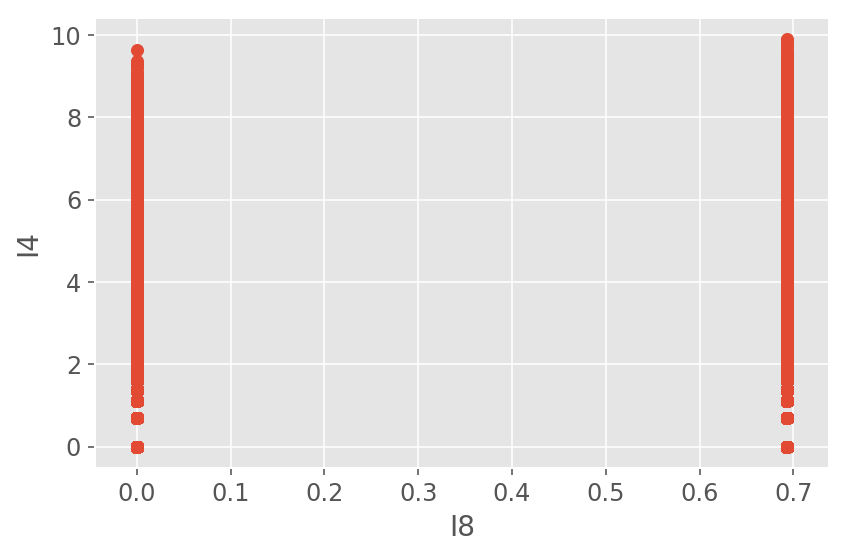

Saving figure label_Vs_scatter_plots-I4I10


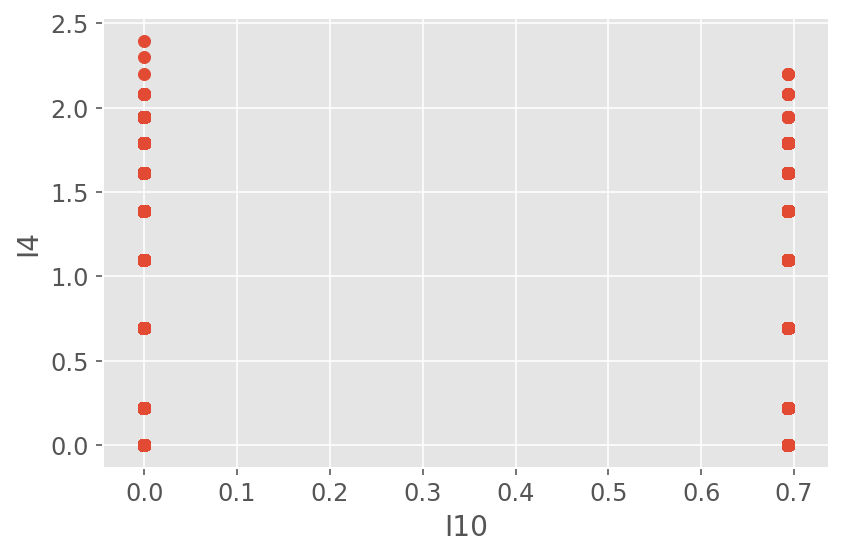

Saving figure label_Vs_scatter_plots-I4I11


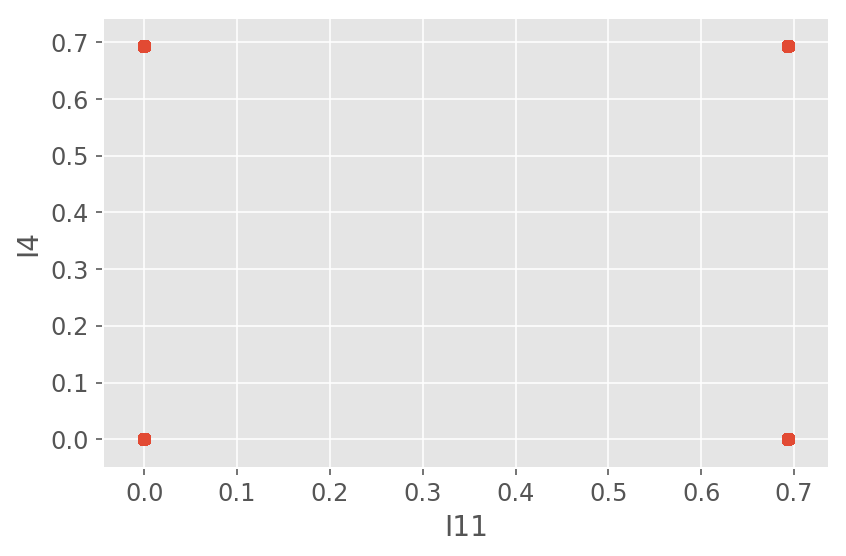

Saving figure label_Vs_scatter_plots-I4I12


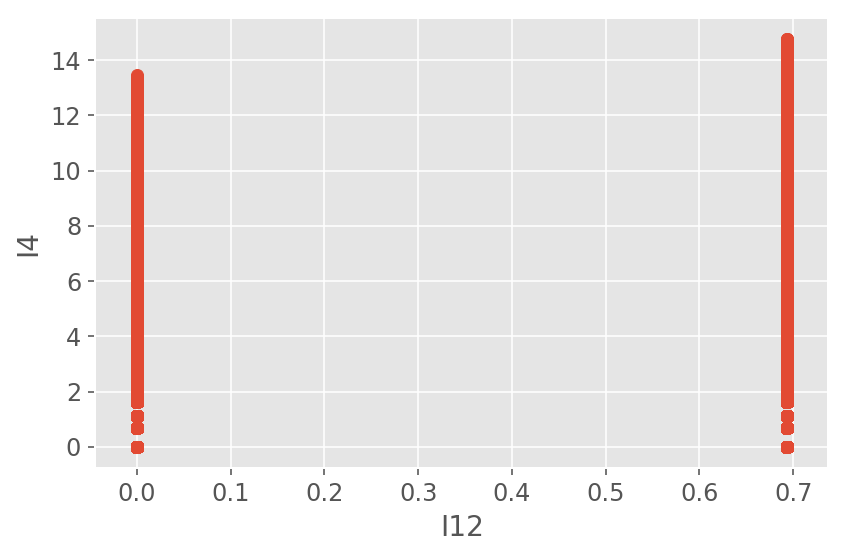

Saving figure label_Vs_scatter_plots-I4I13


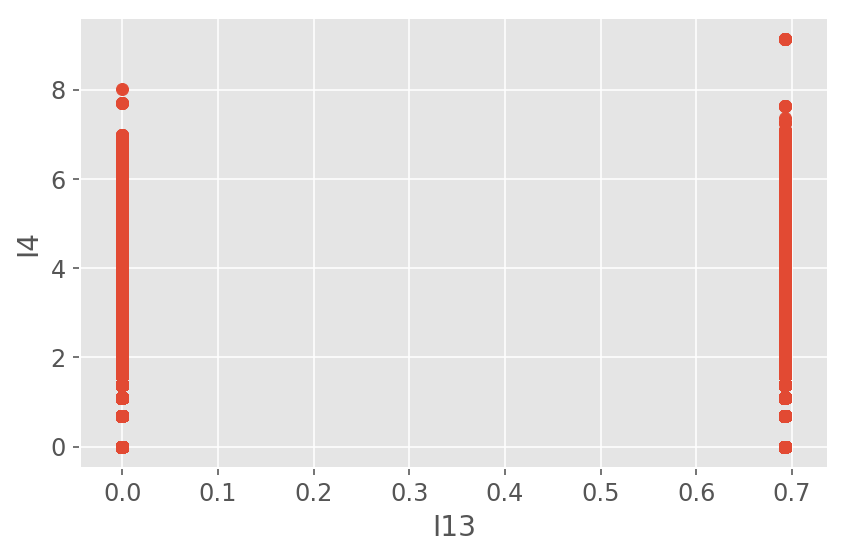

Saving figure label_Vs_scatter_plots-I4new_feat1


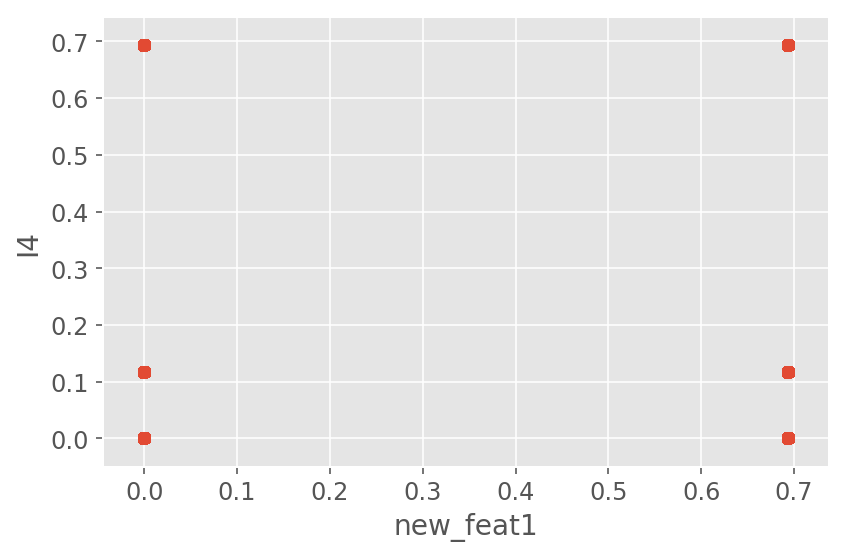

Saving figure label_Vs_scatter_plots-I4new_feat2


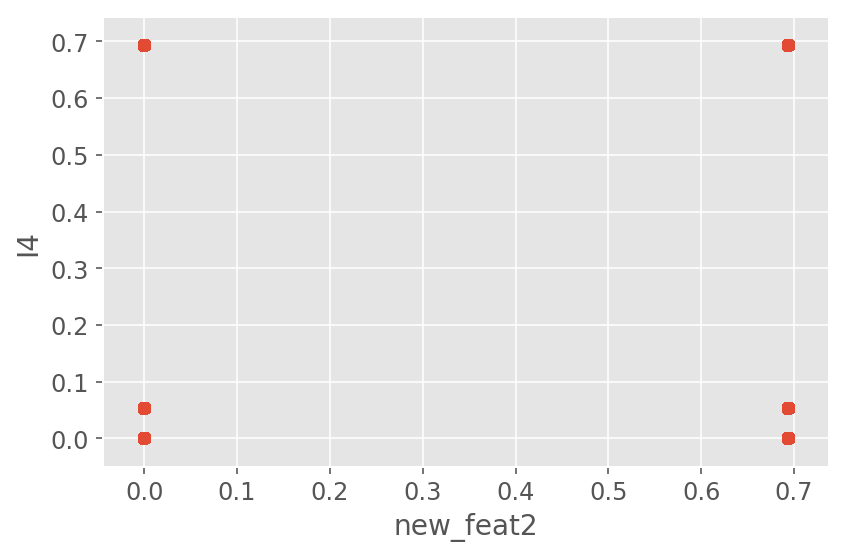

Saving figure label_Vs_scatter_plots-I4new_feat3


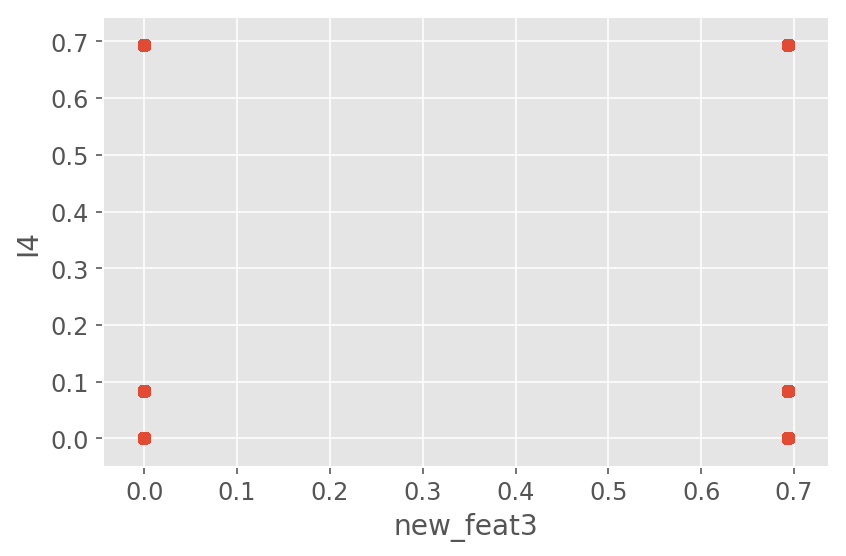

Saving figure label_Vs_scatter_plots-I4new_feat4


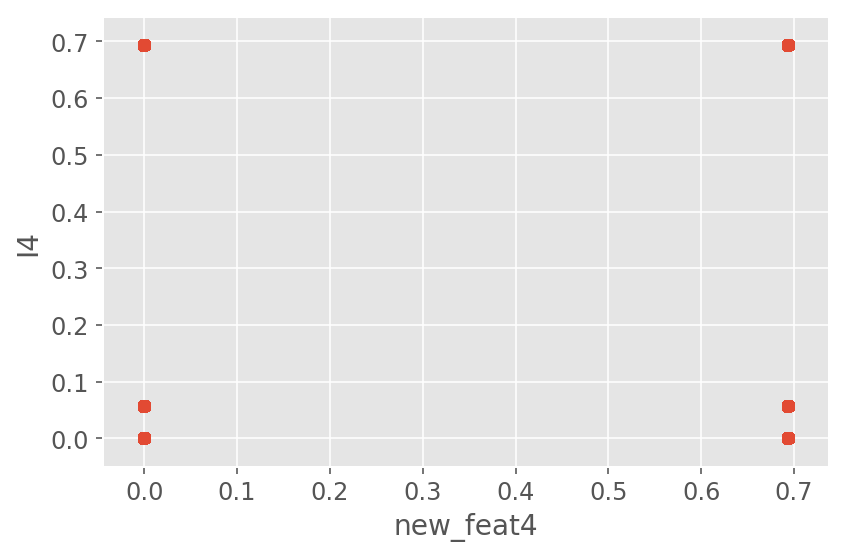

Saving figure label_Vs_scatter_plots-I4new_feat5


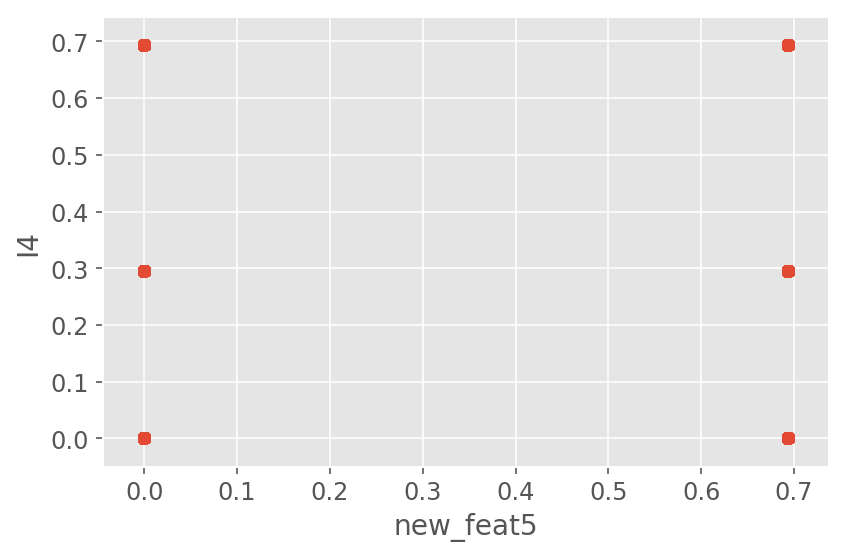

Saving figure label_Vs_scatter_plots-I4new_feat6


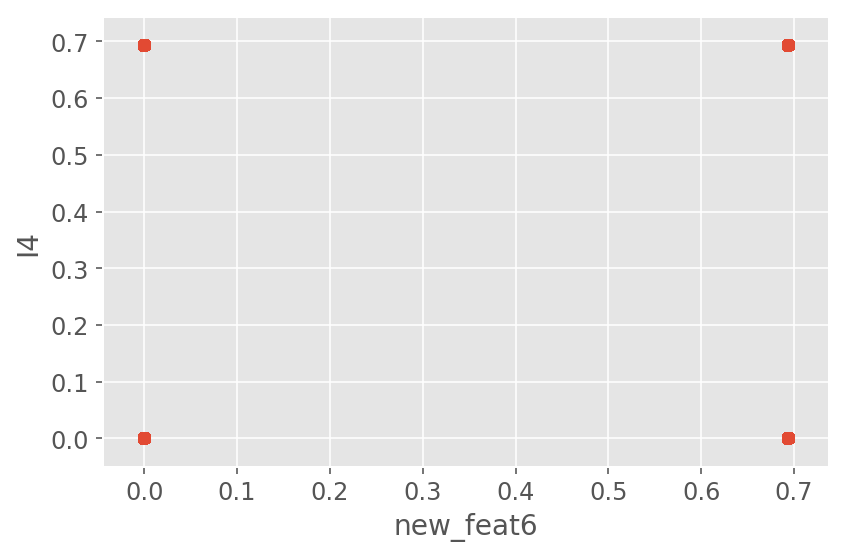

Saving figure label_Vs_scatter_plots-I5I1


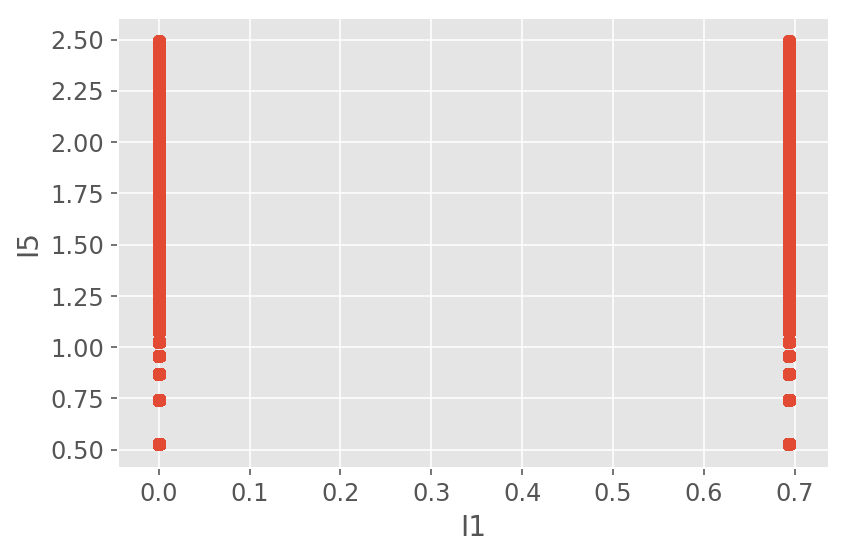

Saving figure label_Vs_scatter_plots-I5I2


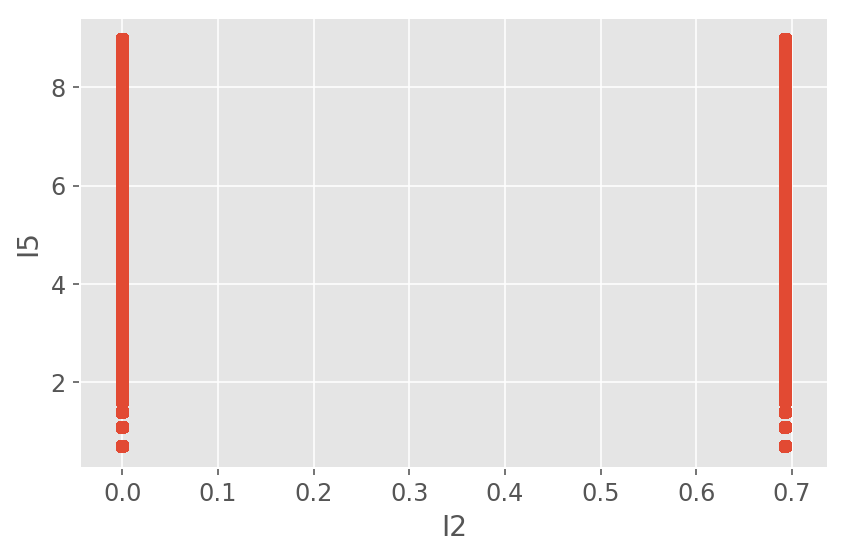

Saving figure label_Vs_scatter_plots-I5I3


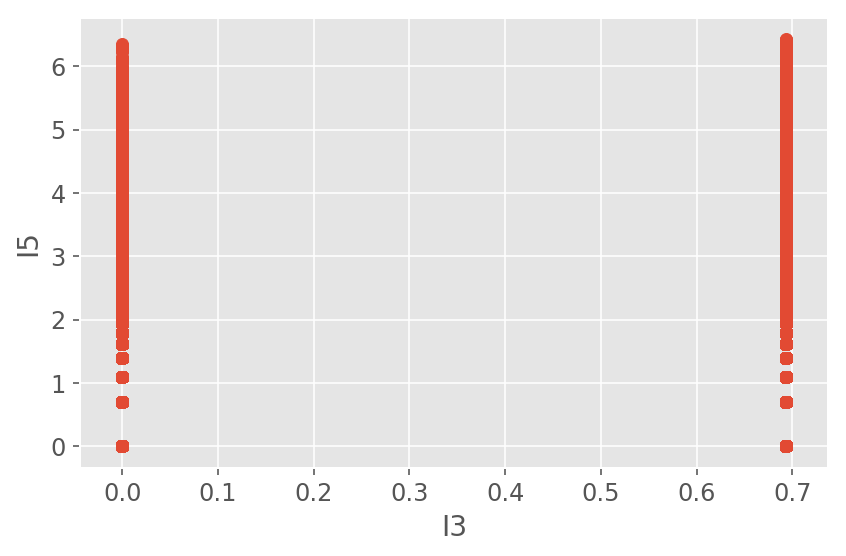

Saving figure label_Vs_scatter_plots-I5I4


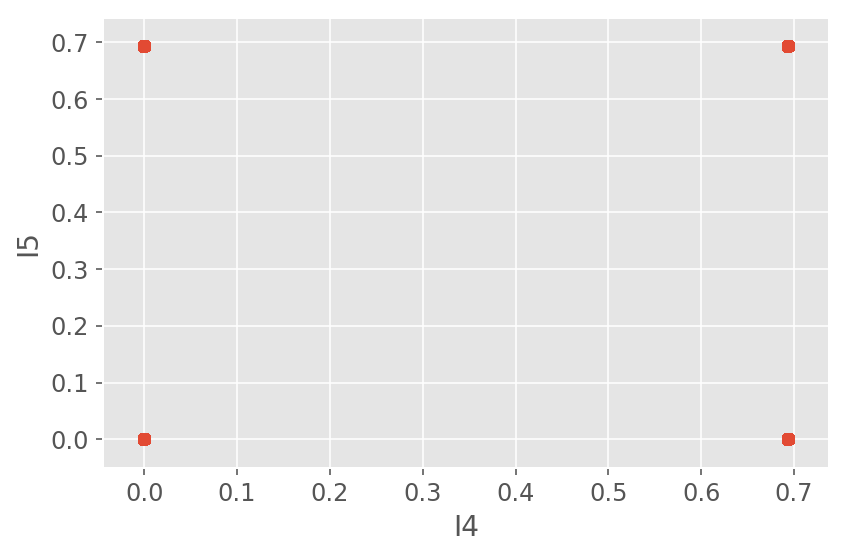

Saving figure label_Vs_scatter_plots-I5I5


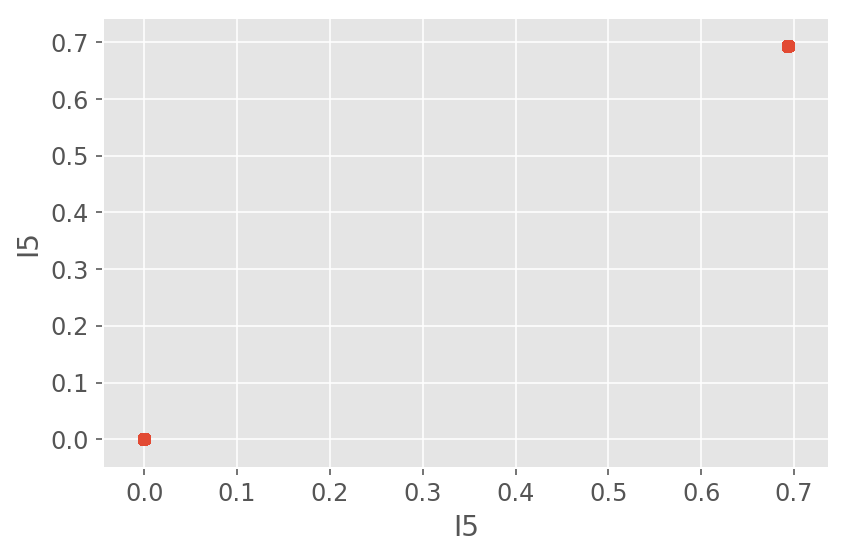

Saving figure label_Vs_scatter_plots-I5I6


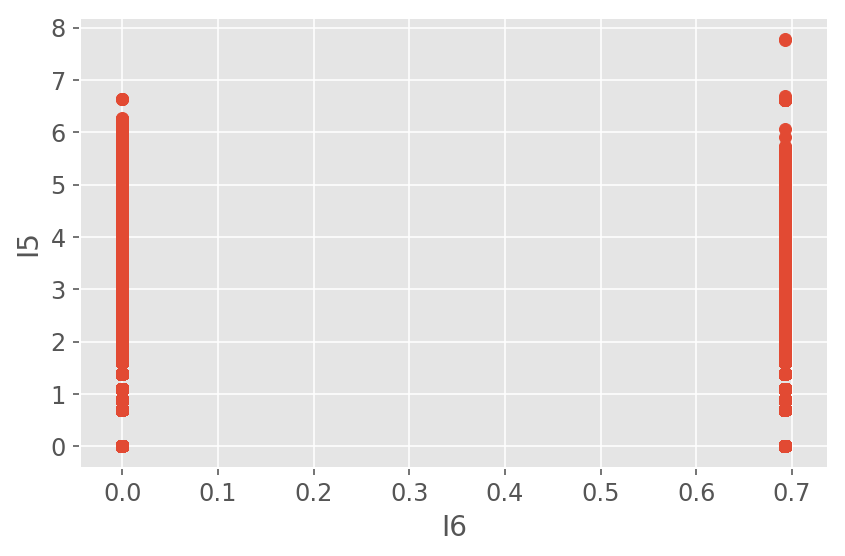

Saving figure label_Vs_scatter_plots-I5I7


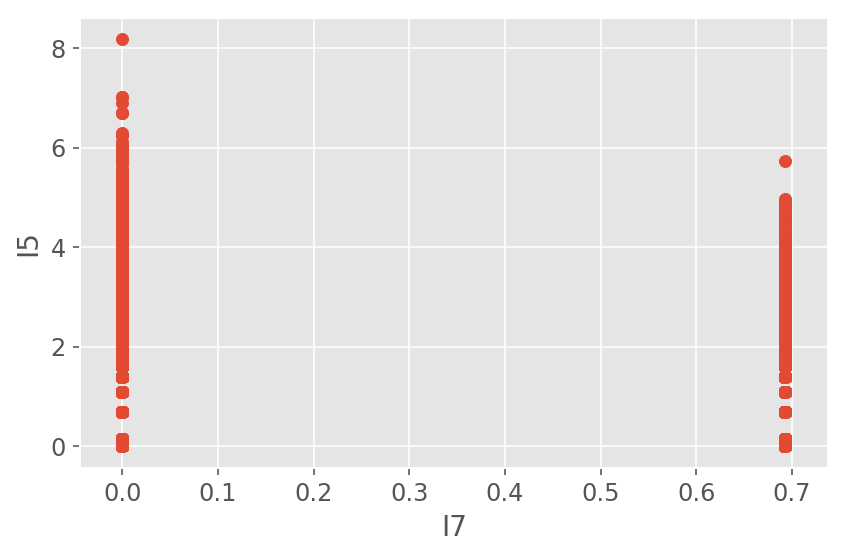

Saving figure label_Vs_scatter_plots-I5I8


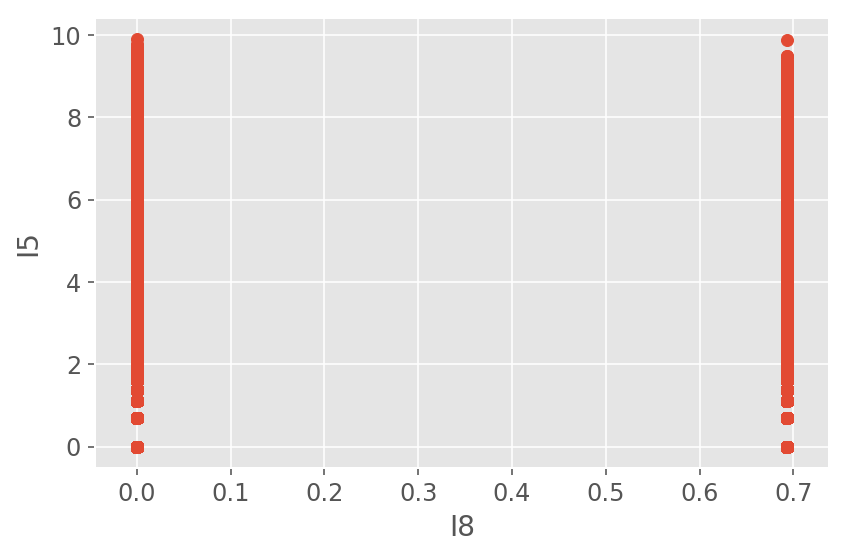

Saving figure label_Vs_scatter_plots-I5I10


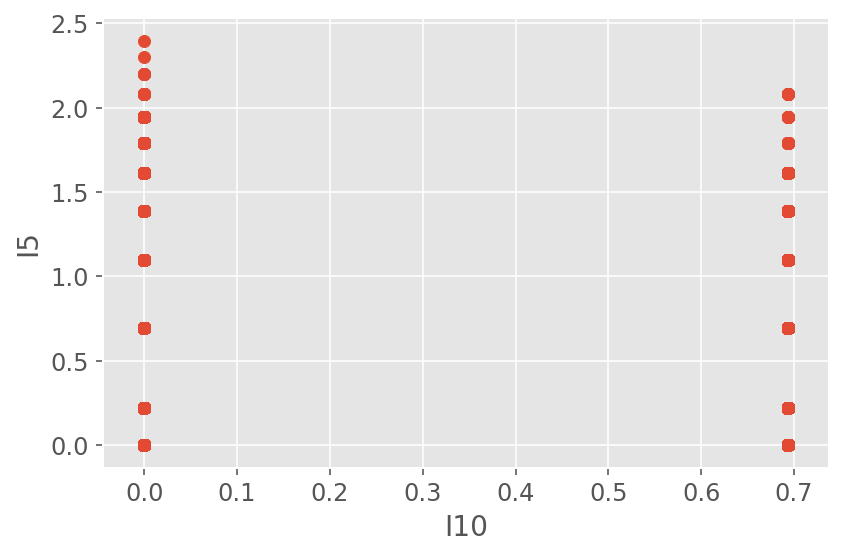

Saving figure label_Vs_scatter_plots-I5I11


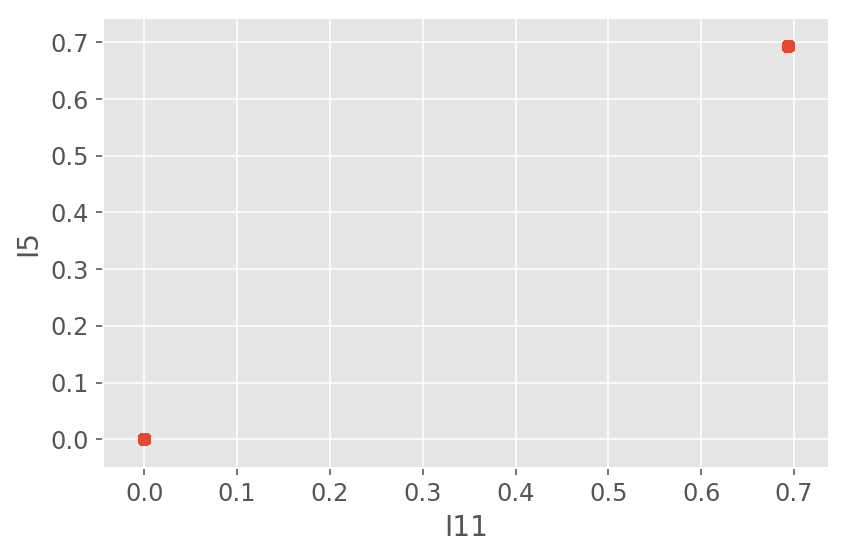

Saving figure label_Vs_scatter_plots-I5I12


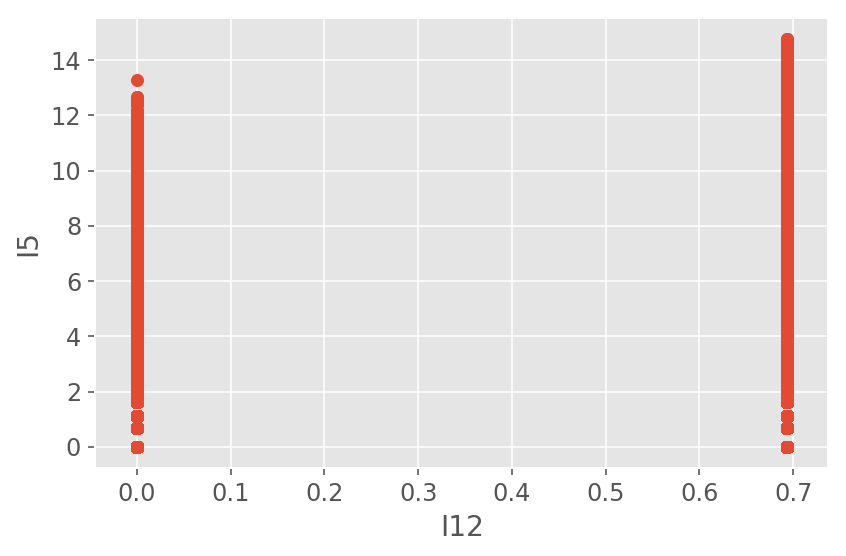

Saving figure label_Vs_scatter_plots-I5I13


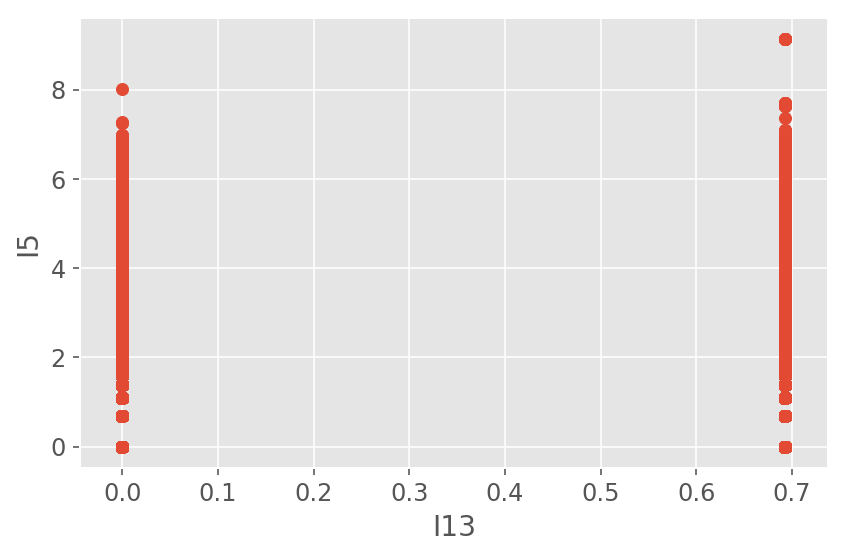

Saving figure label_Vs_scatter_plots-I5new_feat1


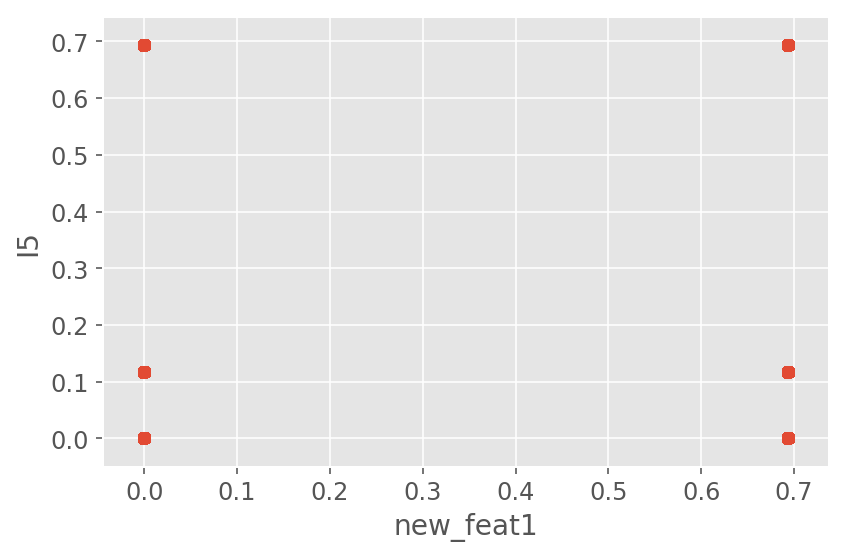

Saving figure label_Vs_scatter_plots-I5new_feat2


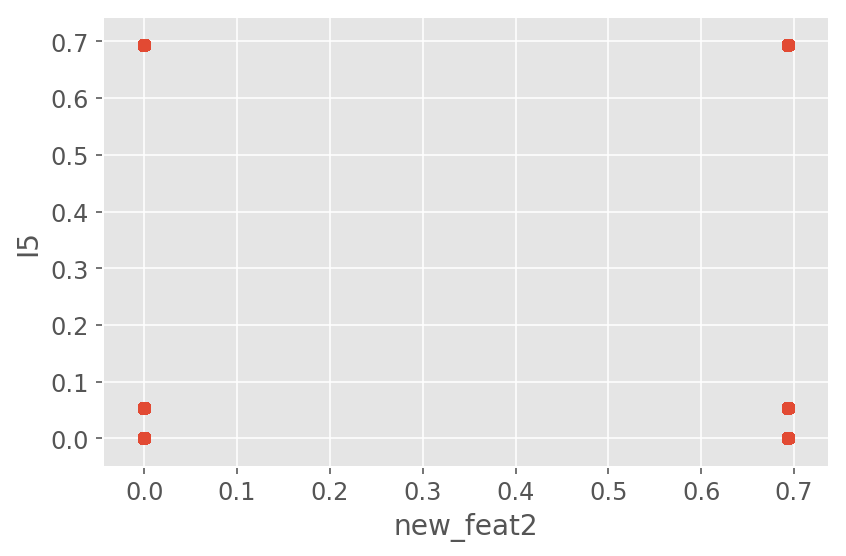

Saving figure label_Vs_scatter_plots-I5new_feat3


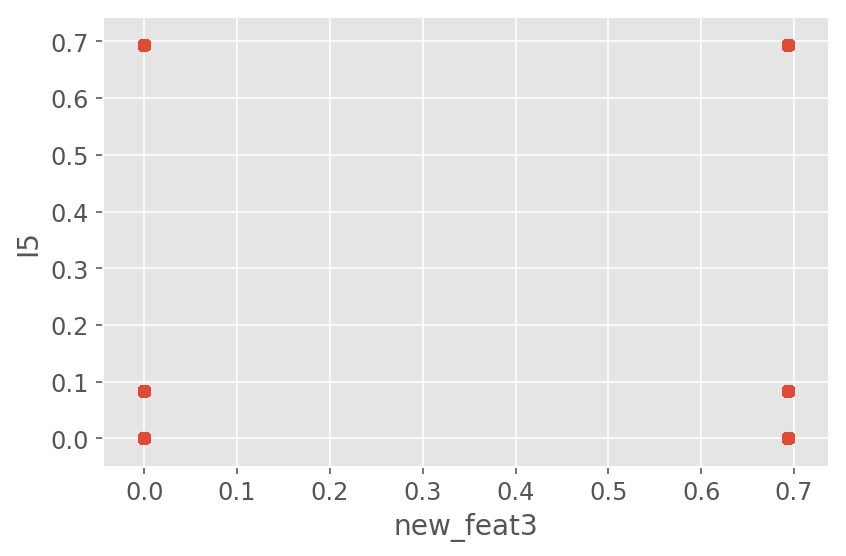

Saving figure label_Vs_scatter_plots-I5new_feat4


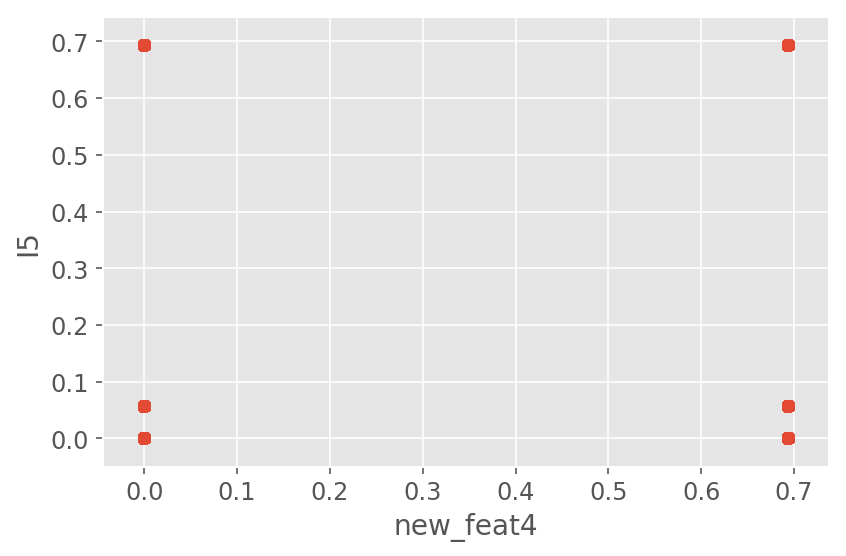

Saving figure label_Vs_scatter_plots-I5new_feat5


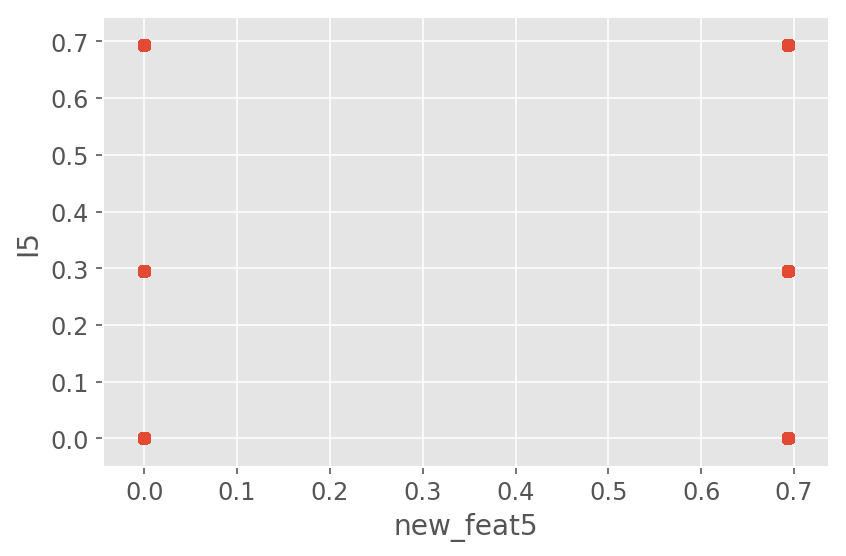

Saving figure label_Vs_scatter_plots-I5new_feat6


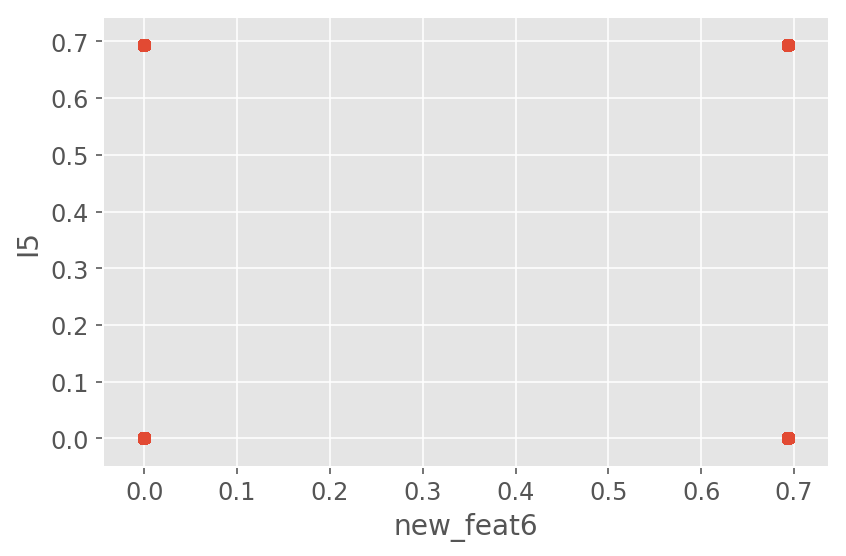

Saving figure label_Vs_scatter_plots-I6I1


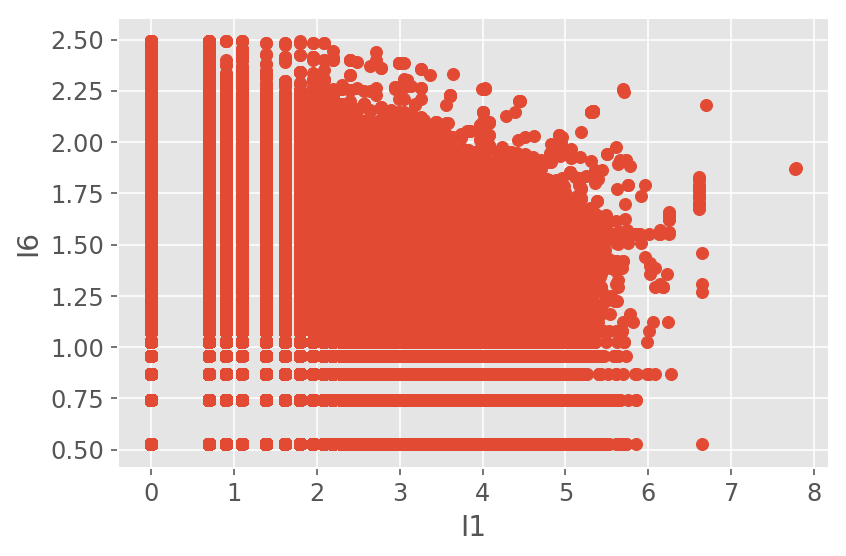

Saving figure label_Vs_scatter_plots-I6I2


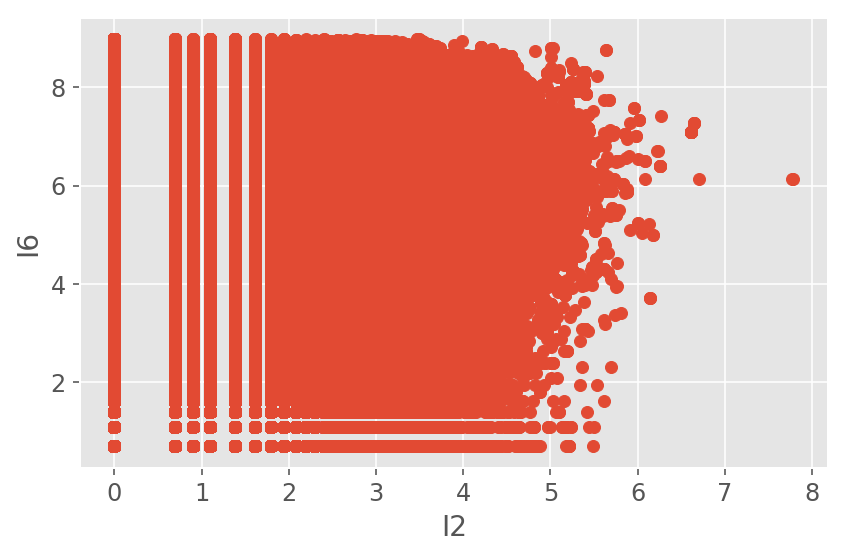

Saving figure label_Vs_scatter_plots-I6I3


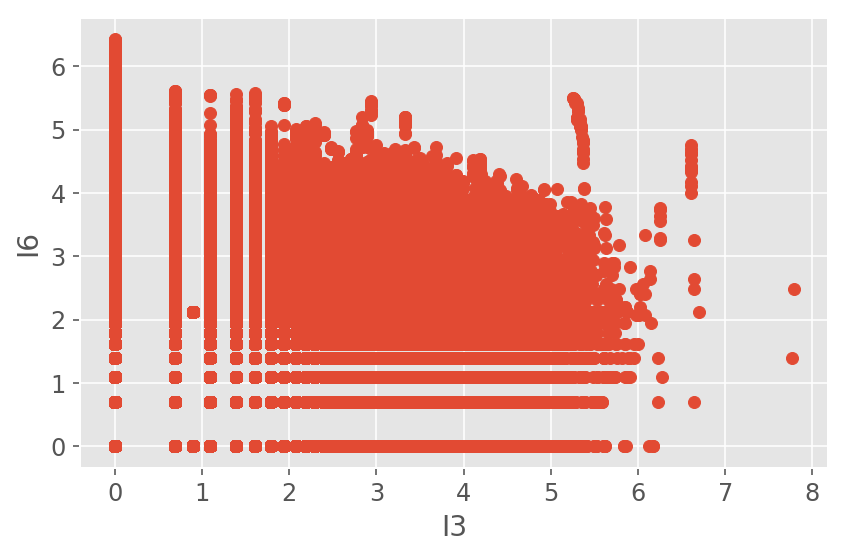

Saving figure label_Vs_scatter_plots-I6I4


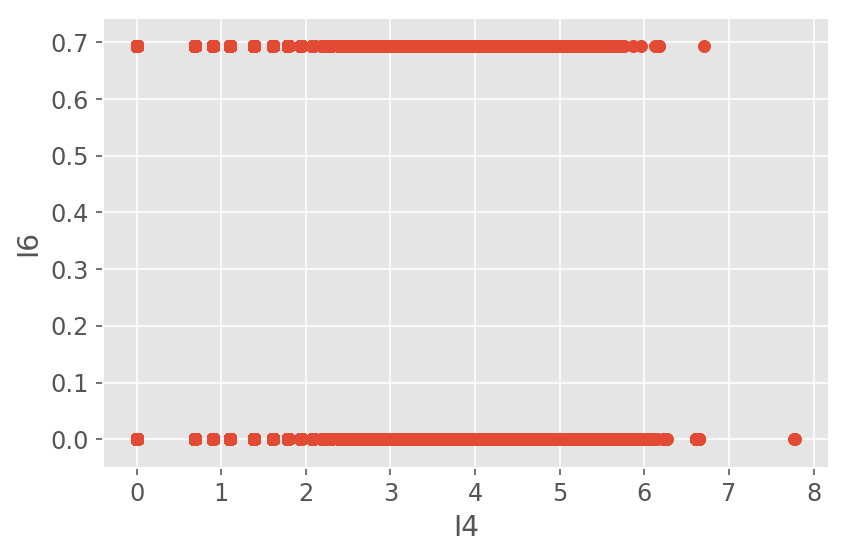

Saving figure label_Vs_scatter_plots-I6I5


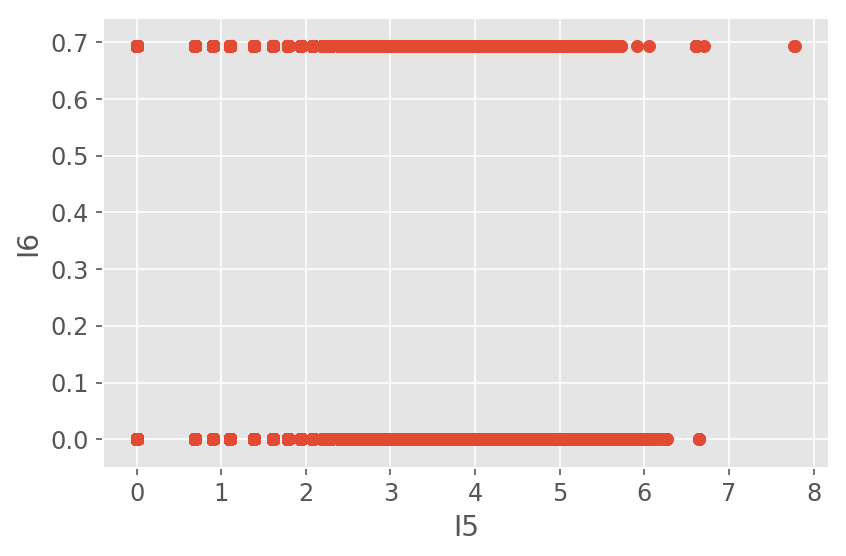

Saving figure label_Vs_scatter_plots-I6I6


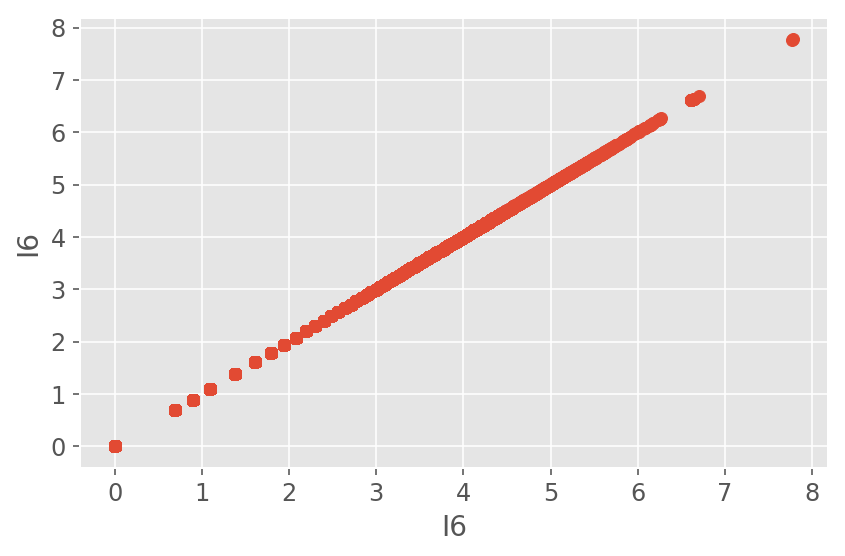

Saving figure label_Vs_scatter_plots-I6I7


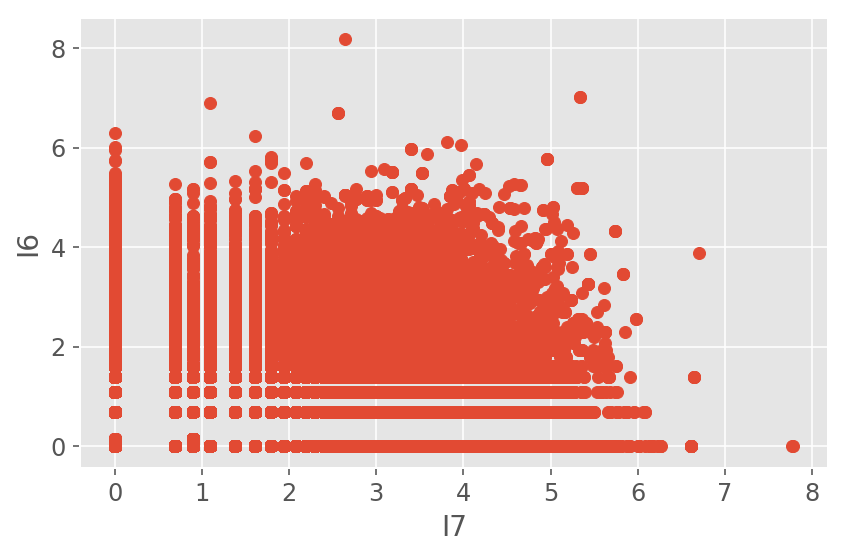

Saving figure label_Vs_scatter_plots-I6I8


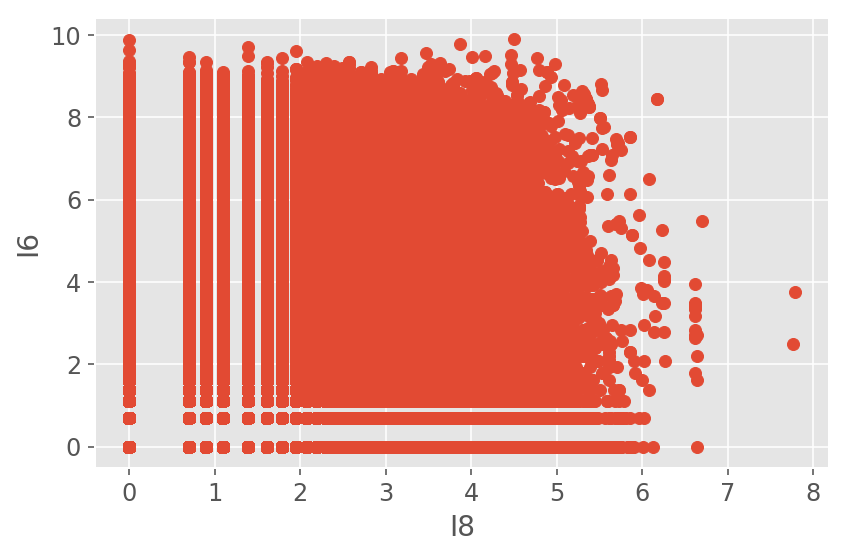

Saving figure label_Vs_scatter_plots-I6I10


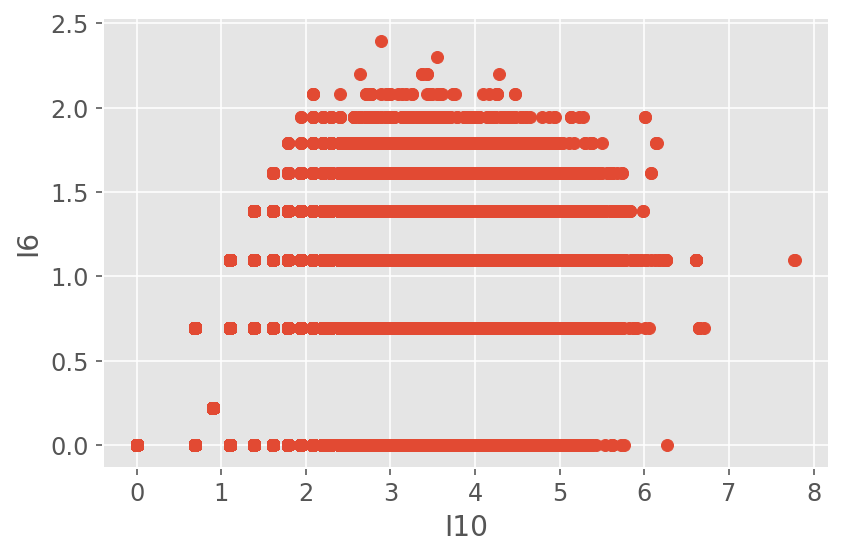

Saving figure label_Vs_scatter_plots-I6I11


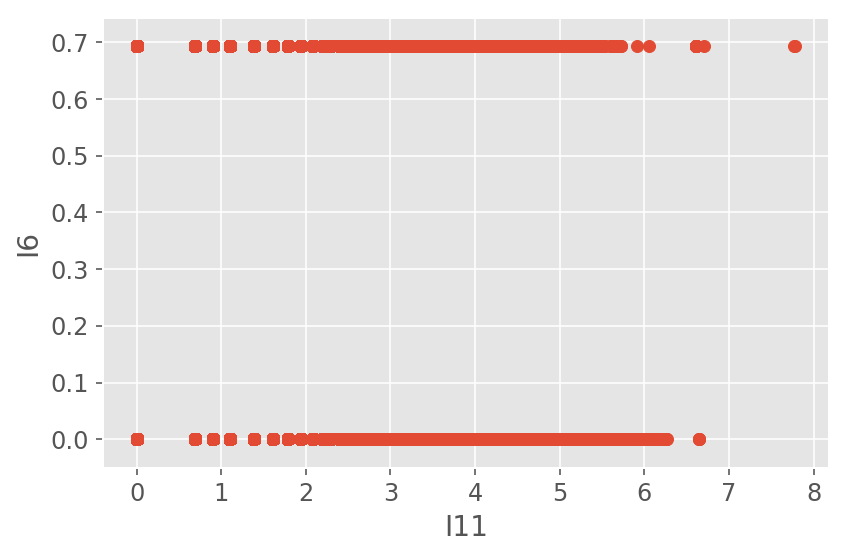

Saving figure label_Vs_scatter_plots-I6I12


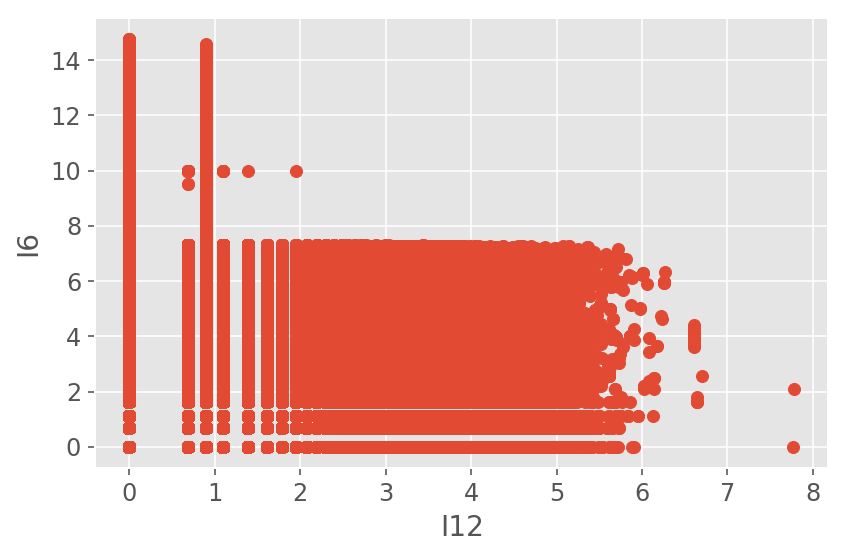

Saving figure label_Vs_scatter_plots-I6I13


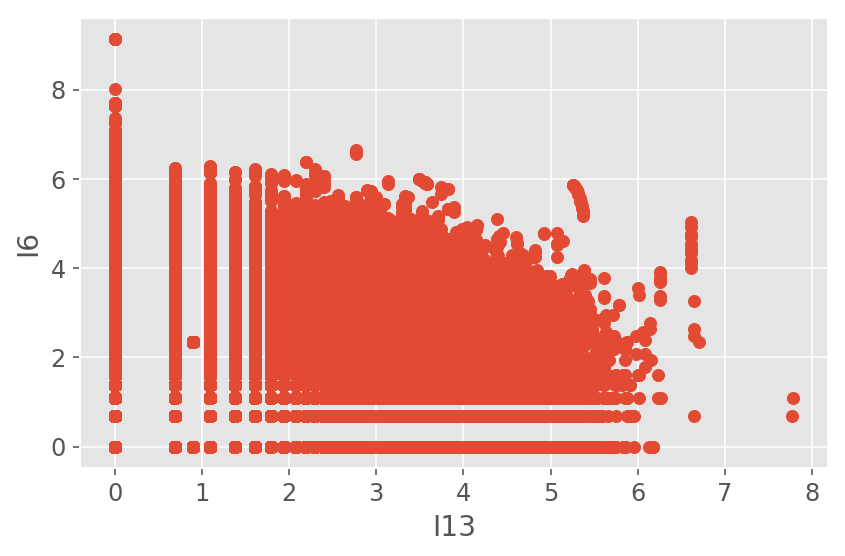

Saving figure label_Vs_scatter_plots-I6new_feat1


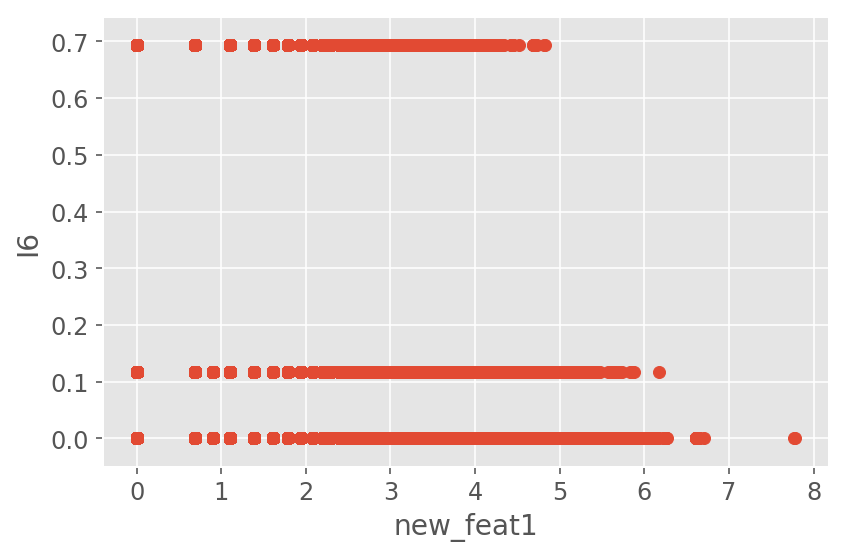

Saving figure label_Vs_scatter_plots-I6new_feat2


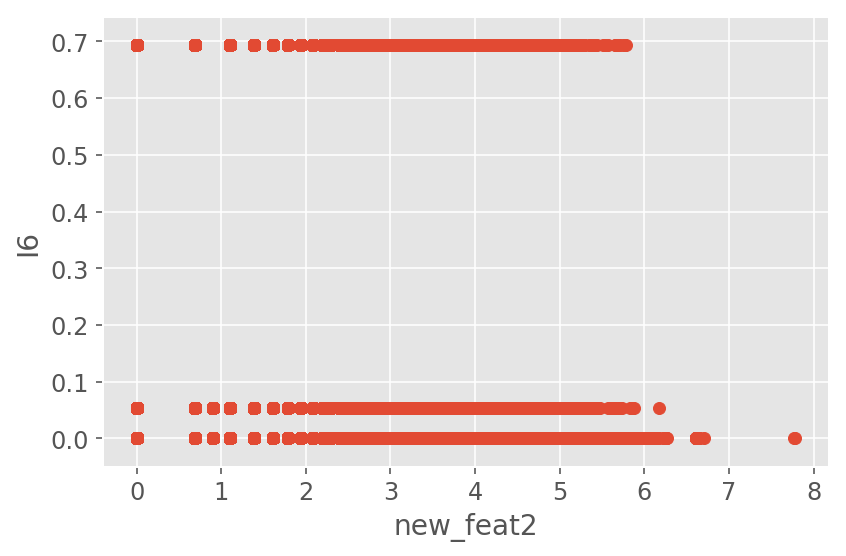

Saving figure label_Vs_scatter_plots-I6new_feat3


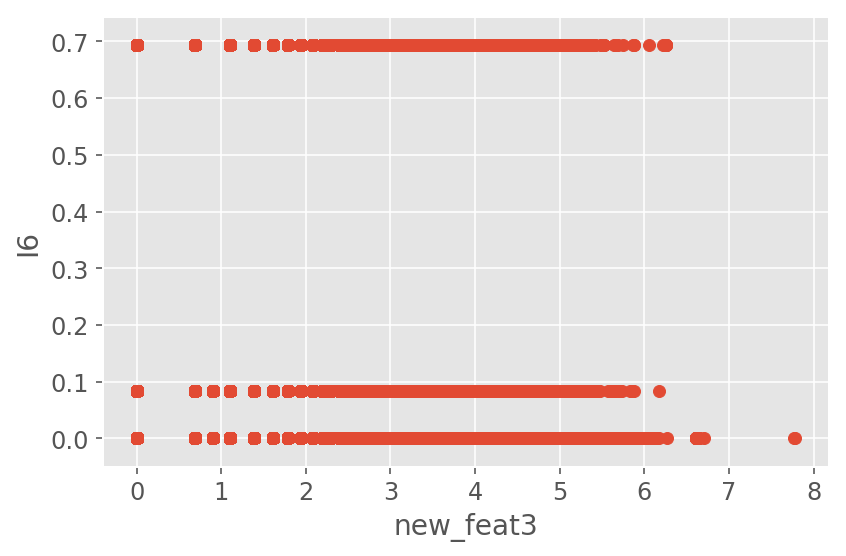

Saving figure label_Vs_scatter_plots-I6new_feat4


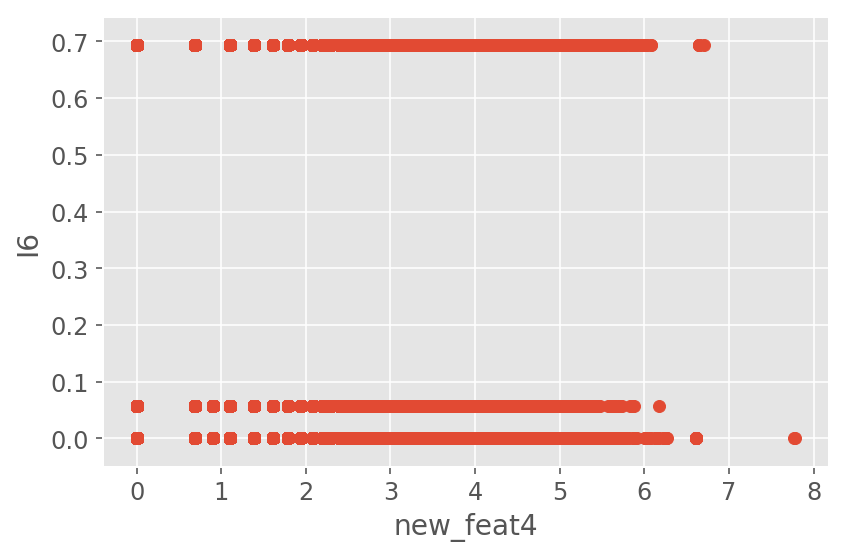

Saving figure label_Vs_scatter_plots-I6new_feat5


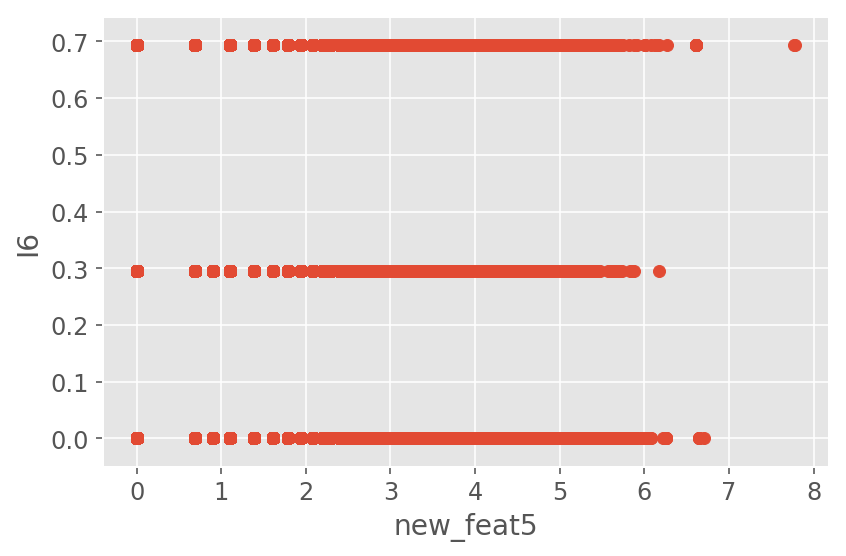

Saving figure label_Vs_scatter_plots-I6new_feat6


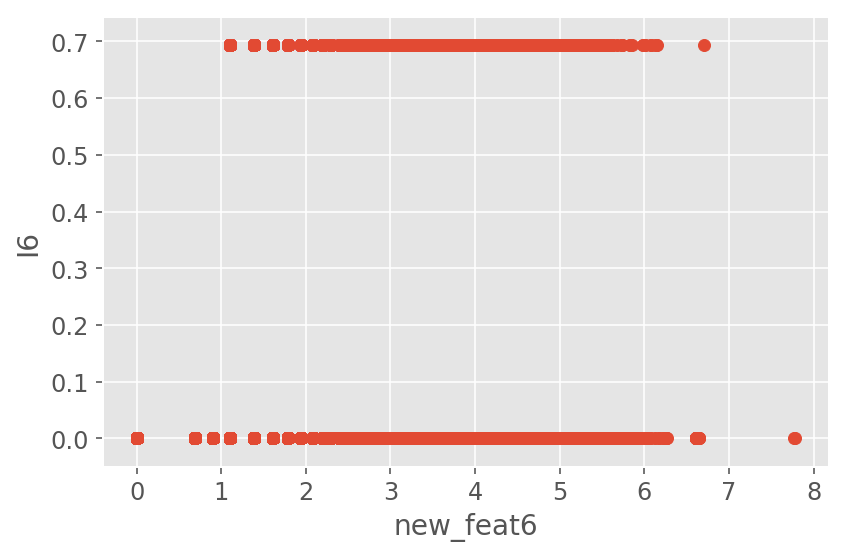

Saving figure label_Vs_scatter_plots-I7I1


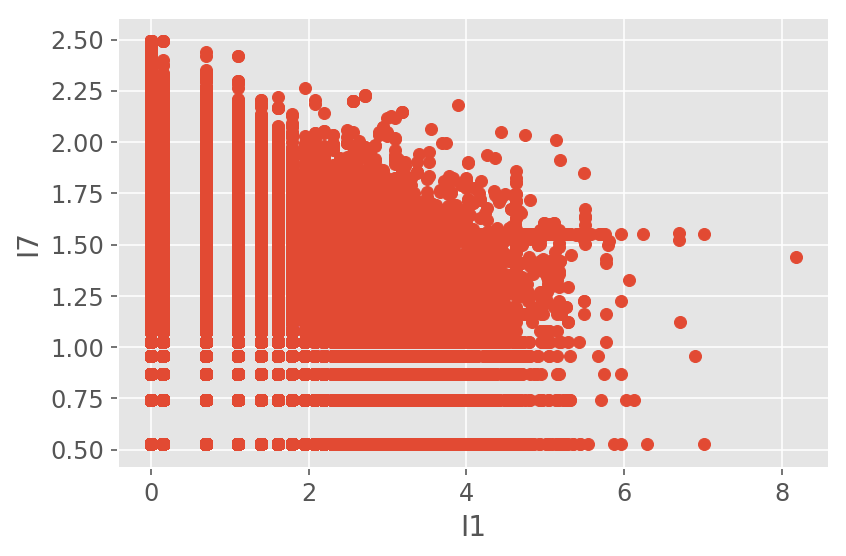

Saving figure label_Vs_scatter_plots-I7I2


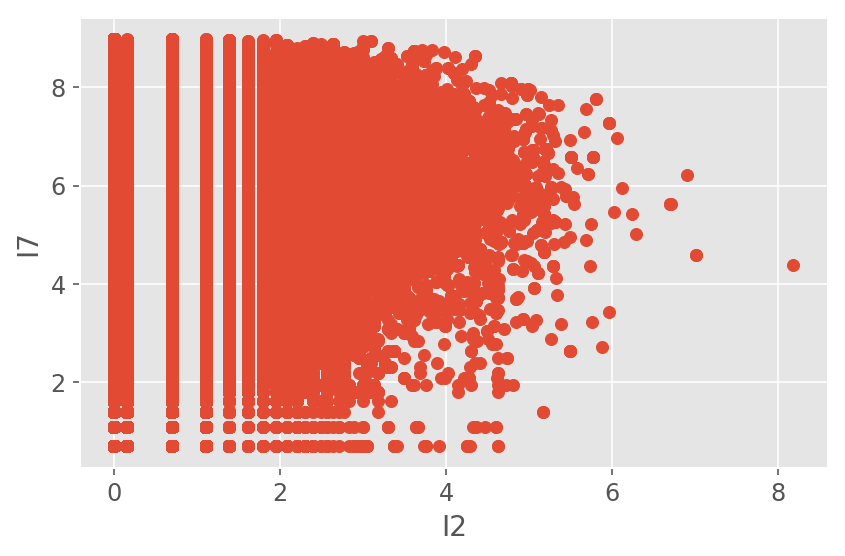

Saving figure label_Vs_scatter_plots-I7I3


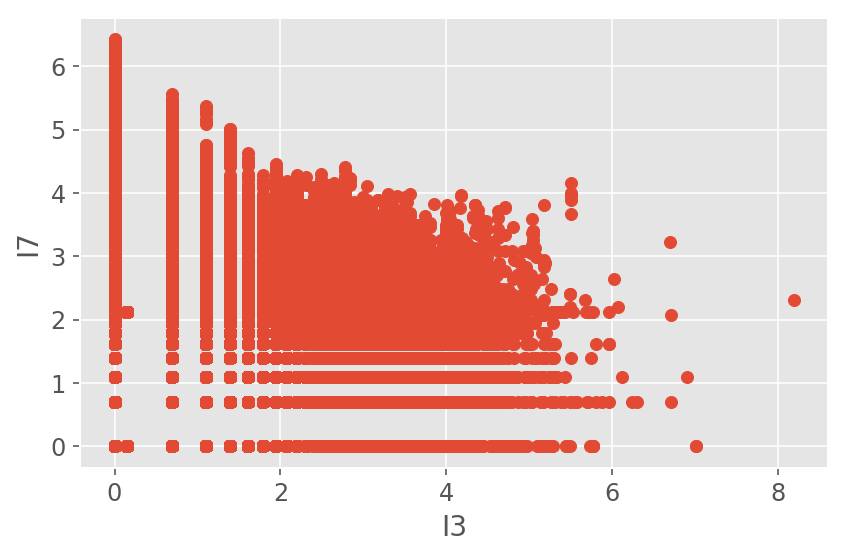

Saving figure label_Vs_scatter_plots-I7I4


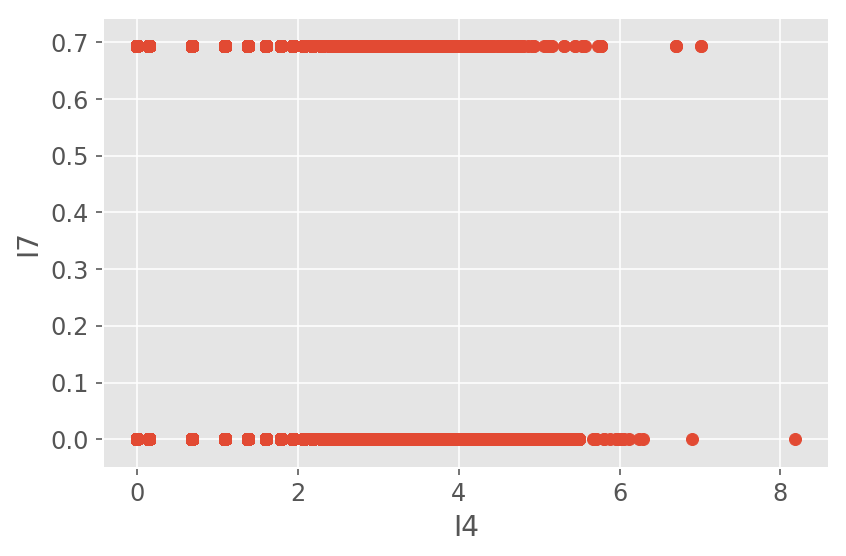

Saving figure label_Vs_scatter_plots-I7I5


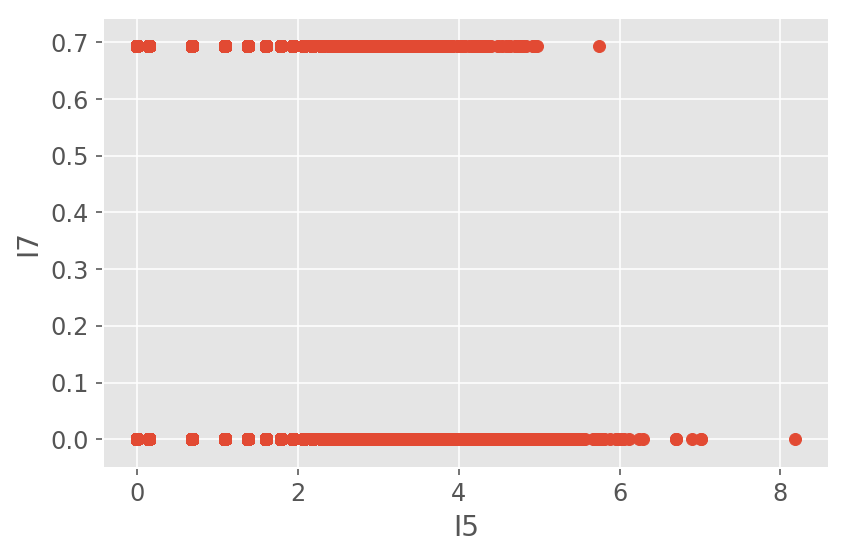

Saving figure label_Vs_scatter_plots-I7I6


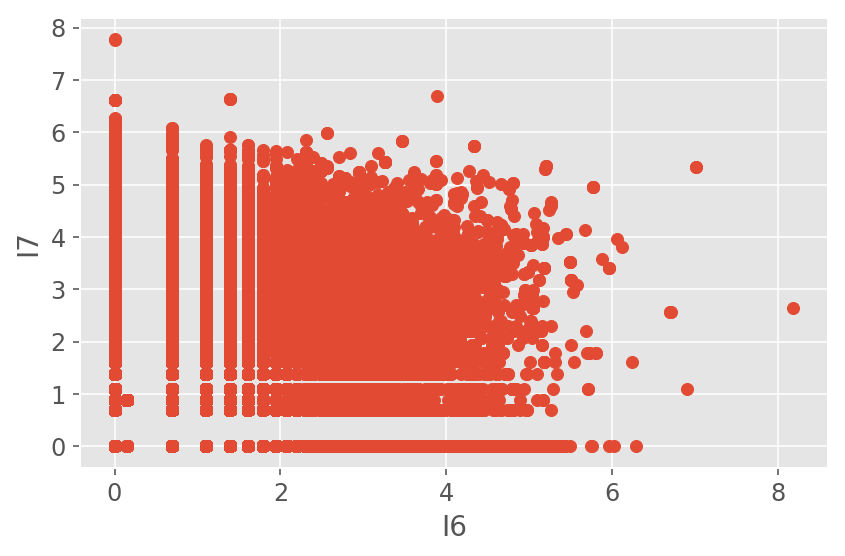

Saving figure label_Vs_scatter_plots-I7I7


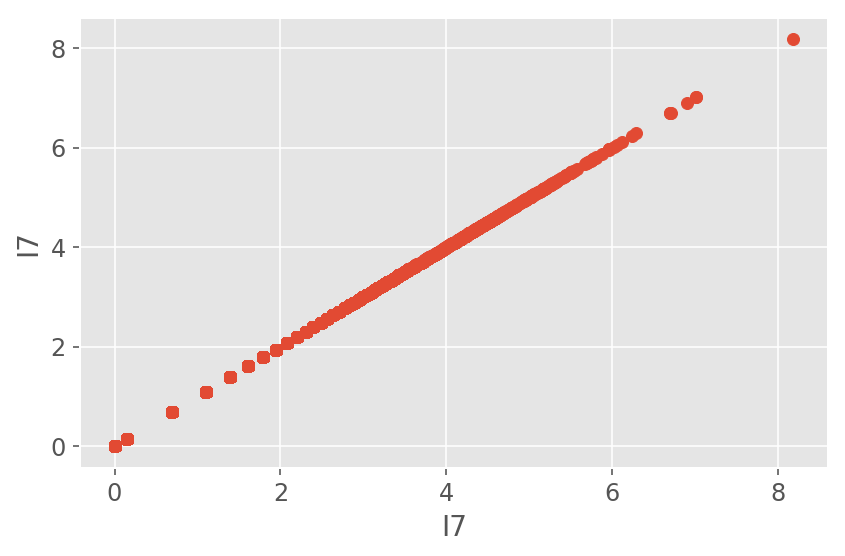

Saving figure label_Vs_scatter_plots-I7I8


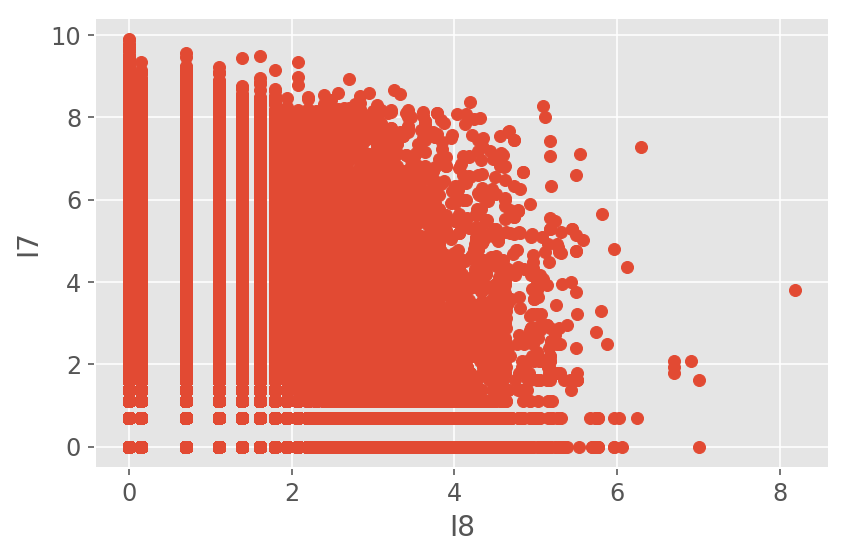

Saving figure label_Vs_scatter_plots-I7I10


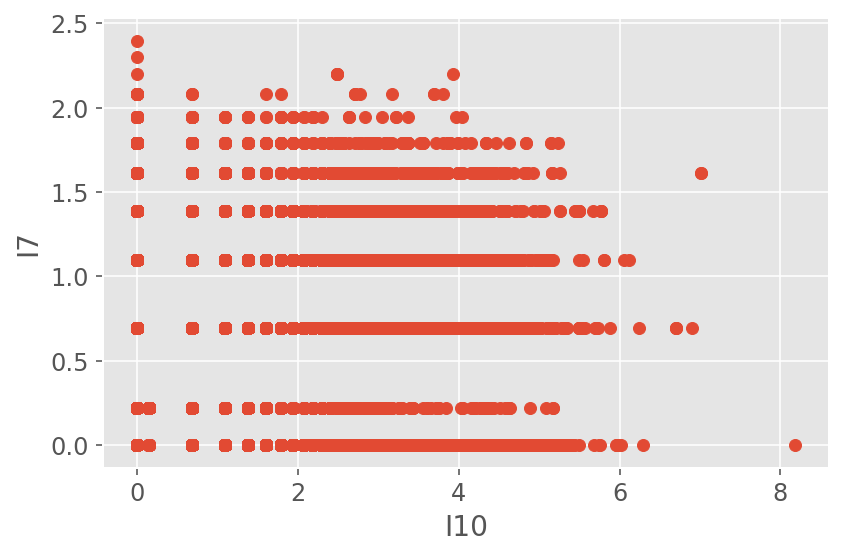

Saving figure label_Vs_scatter_plots-I7I11


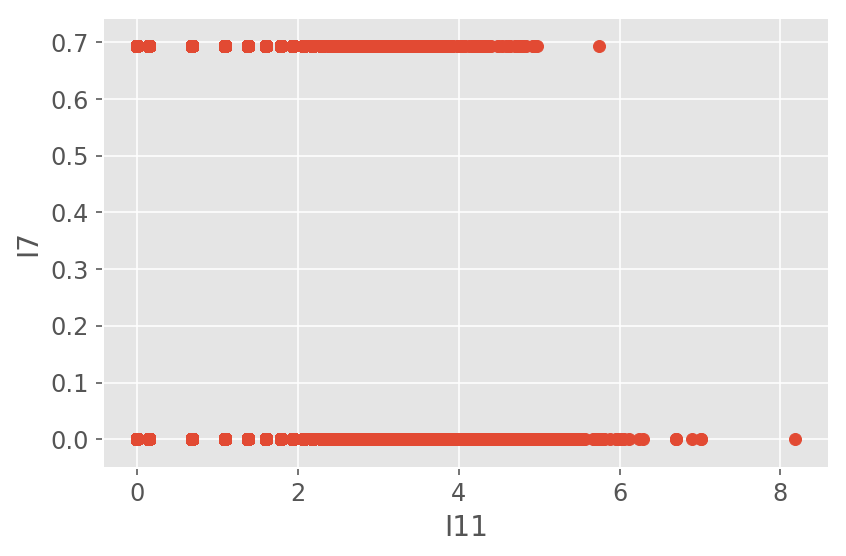

Saving figure label_Vs_scatter_plots-I7I12


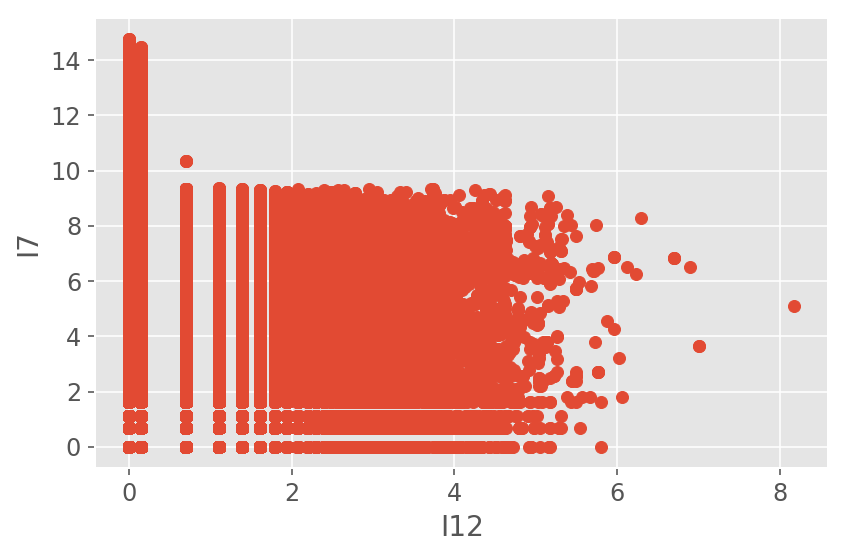

Saving figure label_Vs_scatter_plots-I7I13


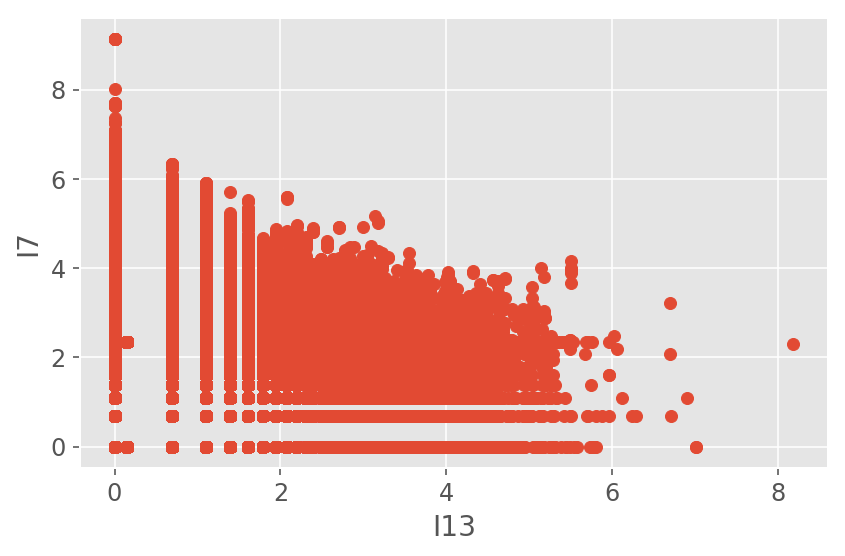

Saving figure label_Vs_scatter_plots-I7new_feat1


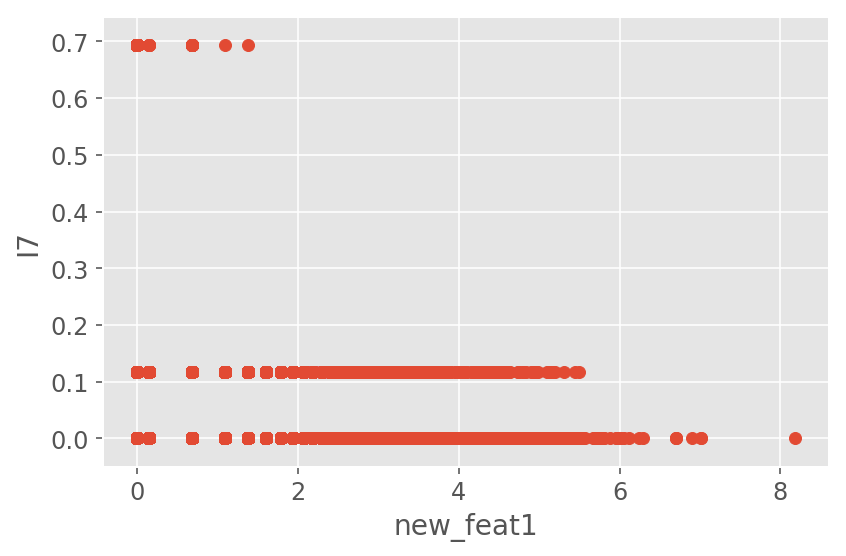

Saving figure label_Vs_scatter_plots-I7new_feat2


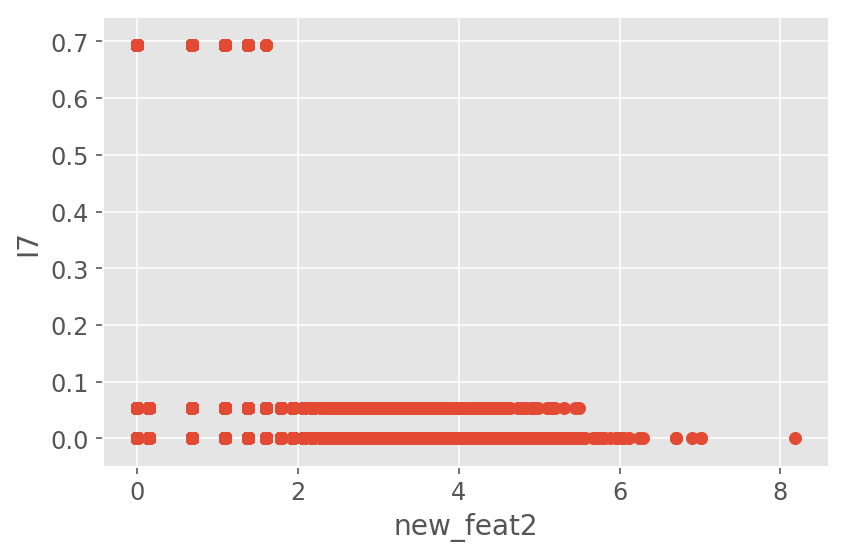

Saving figure label_Vs_scatter_plots-I7new_feat3


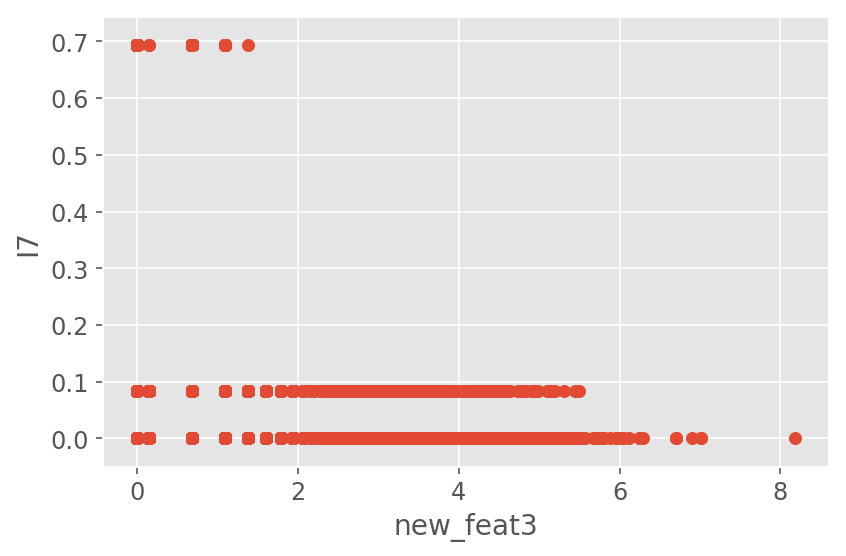

Saving figure label_Vs_scatter_plots-I7new_feat4


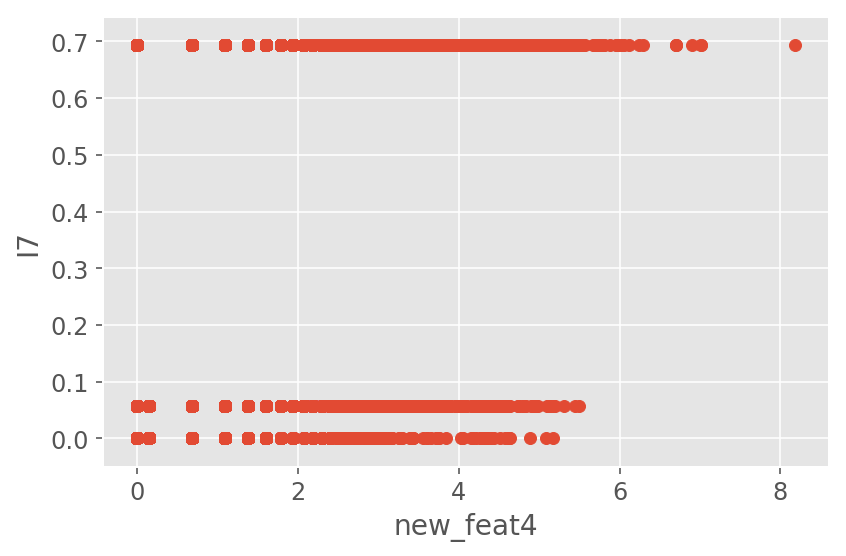

Saving figure label_Vs_scatter_plots-I7new_feat5


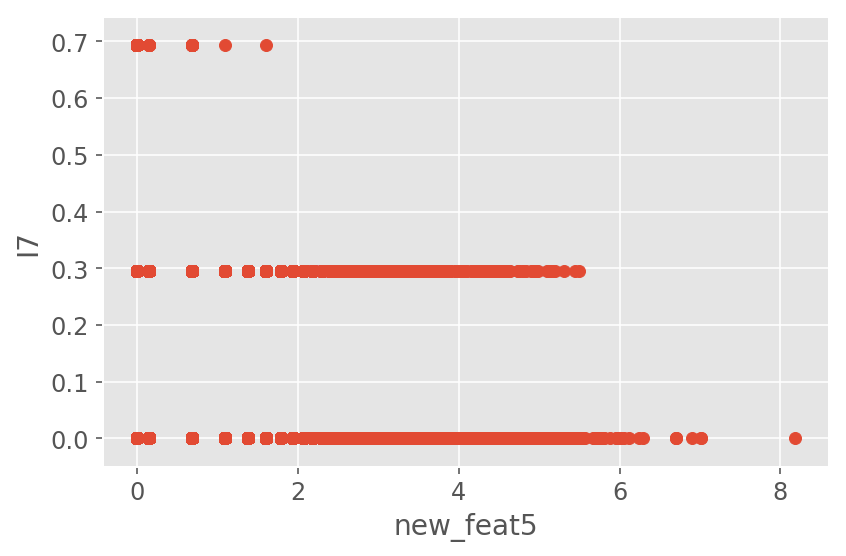

Saving figure label_Vs_scatter_plots-I7new_feat6


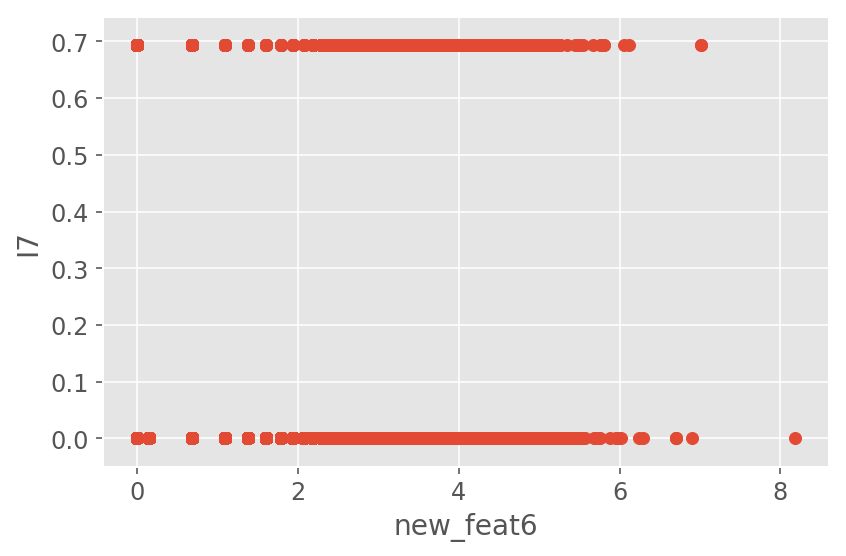

Saving figure label_Vs_scatter_plots-I8I1


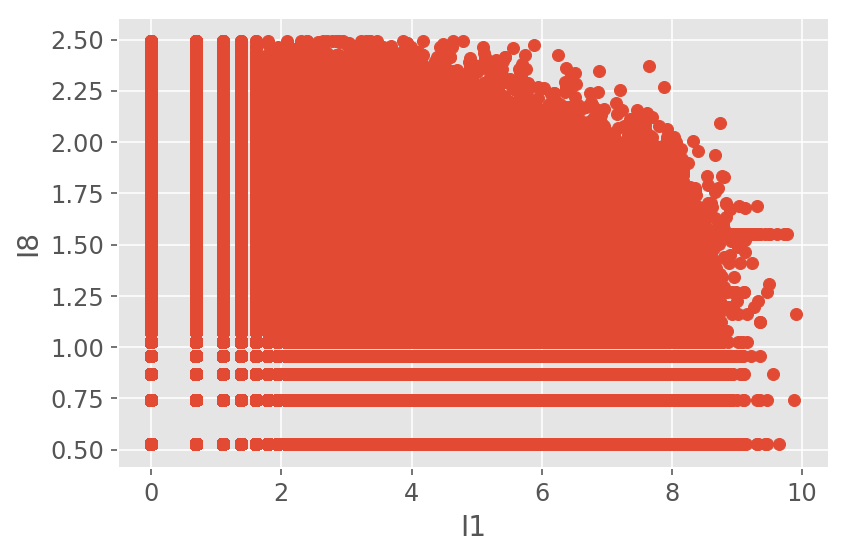

Saving figure label_Vs_scatter_plots-I8I2


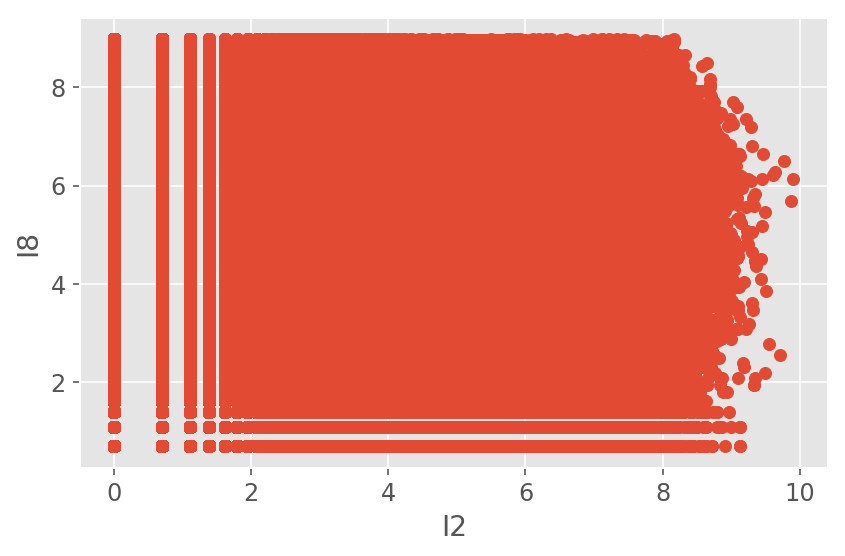

Saving figure label_Vs_scatter_plots-I8I3


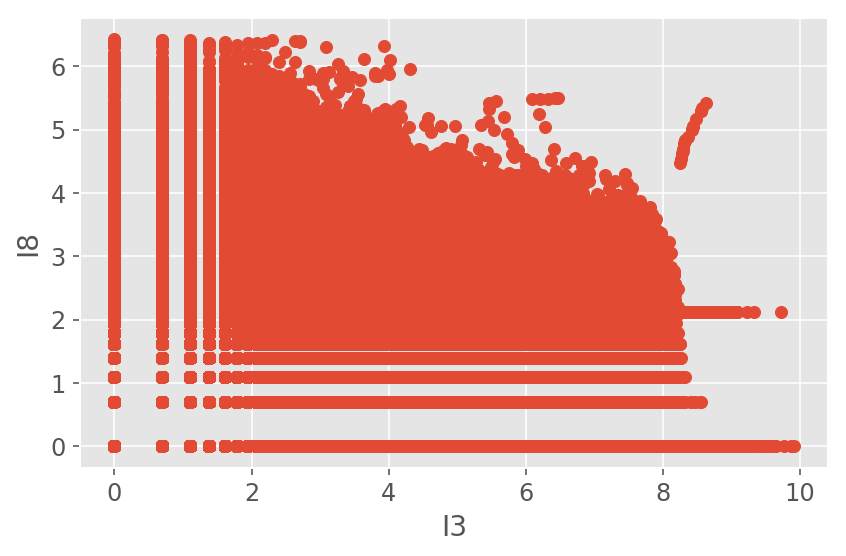

Saving figure label_Vs_scatter_plots-I8I4


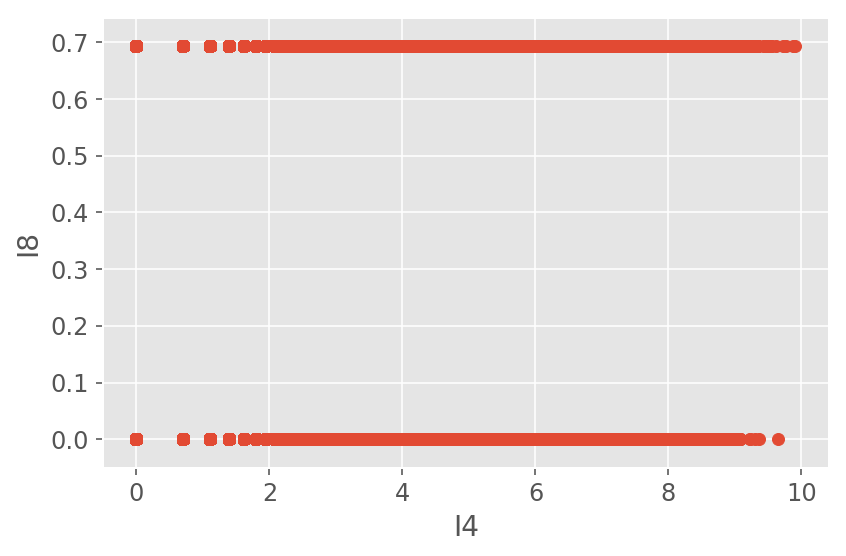

Saving figure label_Vs_scatter_plots-I8I5


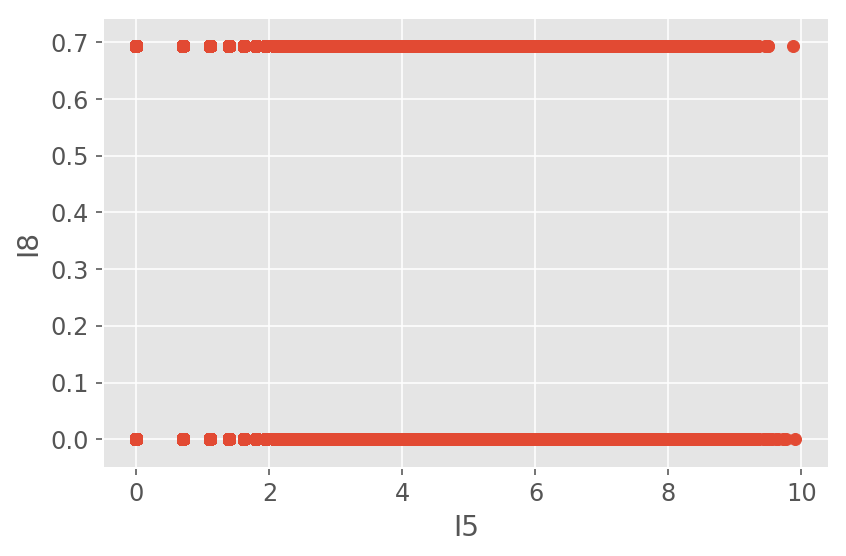

Saving figure label_Vs_scatter_plots-I8I6


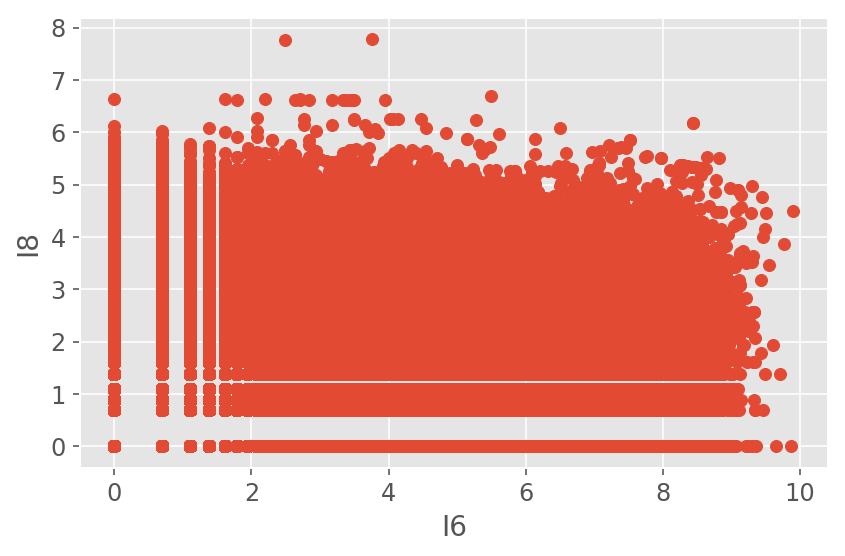

Saving figure label_Vs_scatter_plots-I8I7


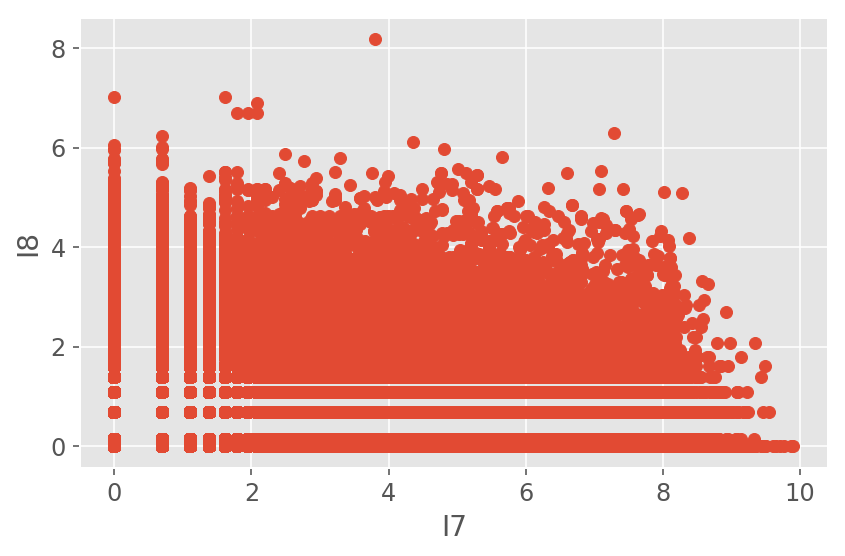

Saving figure label_Vs_scatter_plots-I8I8


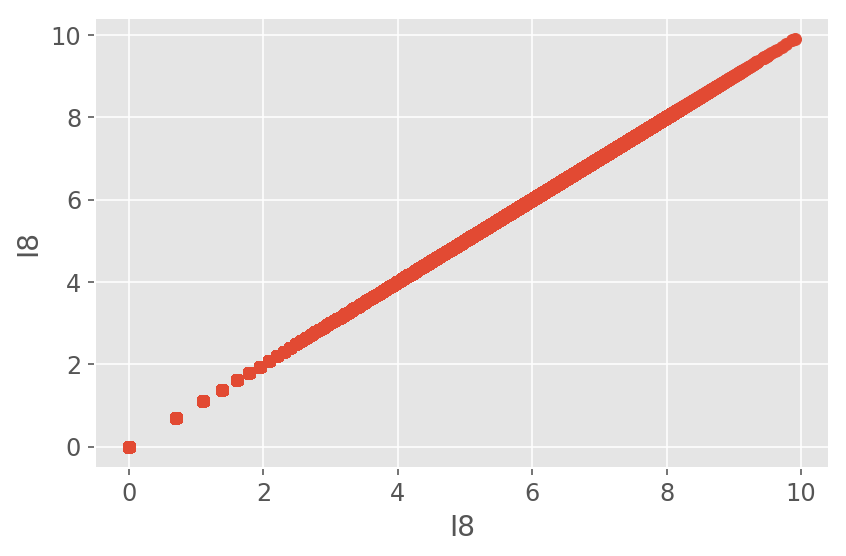

Saving figure label_Vs_scatter_plots-I8I10


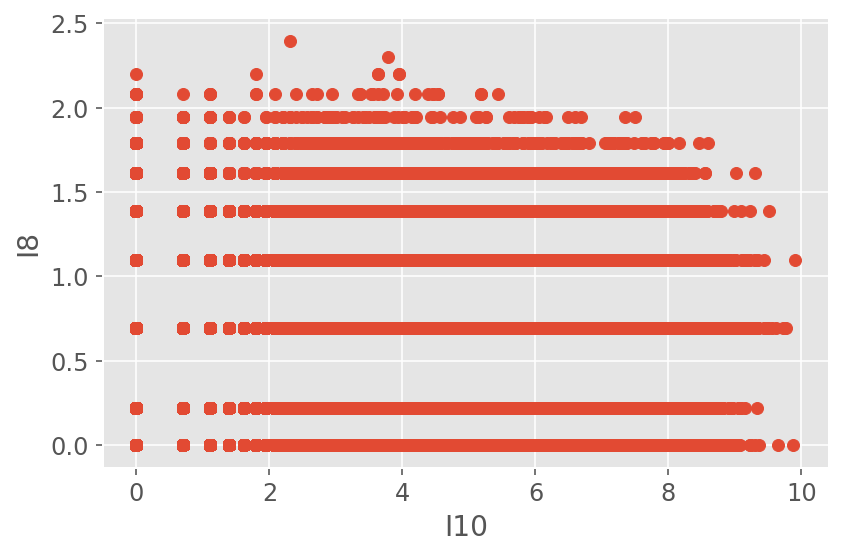

Saving figure label_Vs_scatter_plots-I8I11


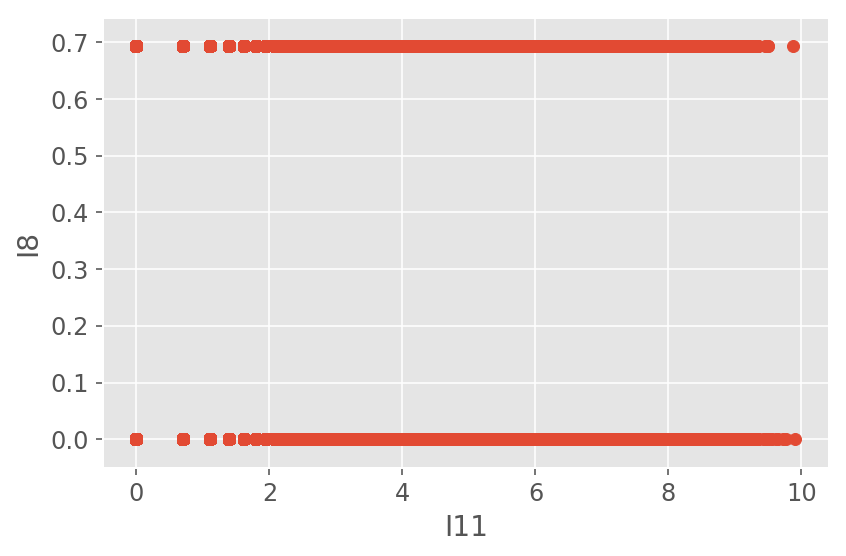

Saving figure label_Vs_scatter_plots-I8I12


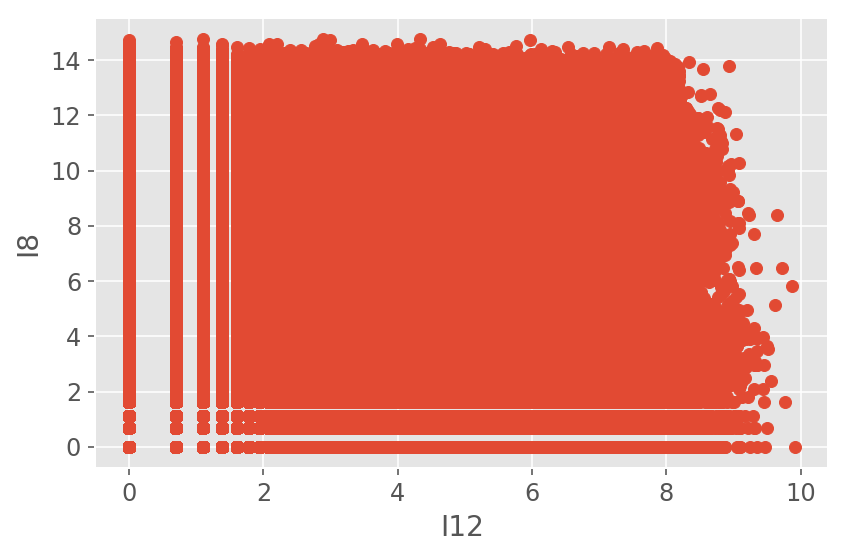

Saving figure label_Vs_scatter_plots-I8I13


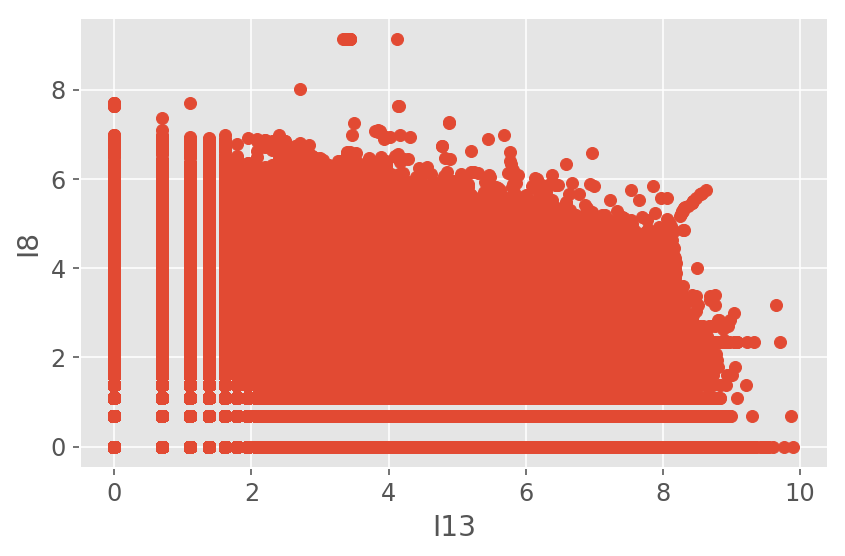

Saving figure label_Vs_scatter_plots-I8new_feat1


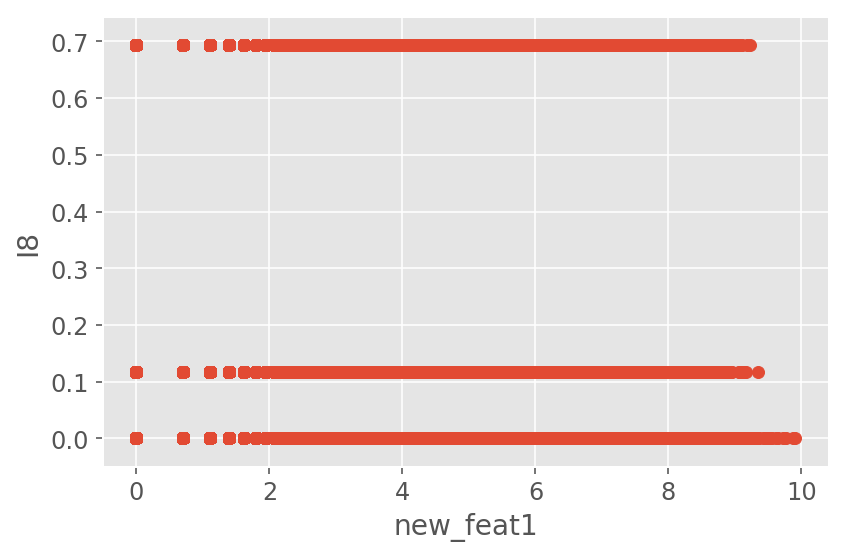

Saving figure label_Vs_scatter_plots-I8new_feat2


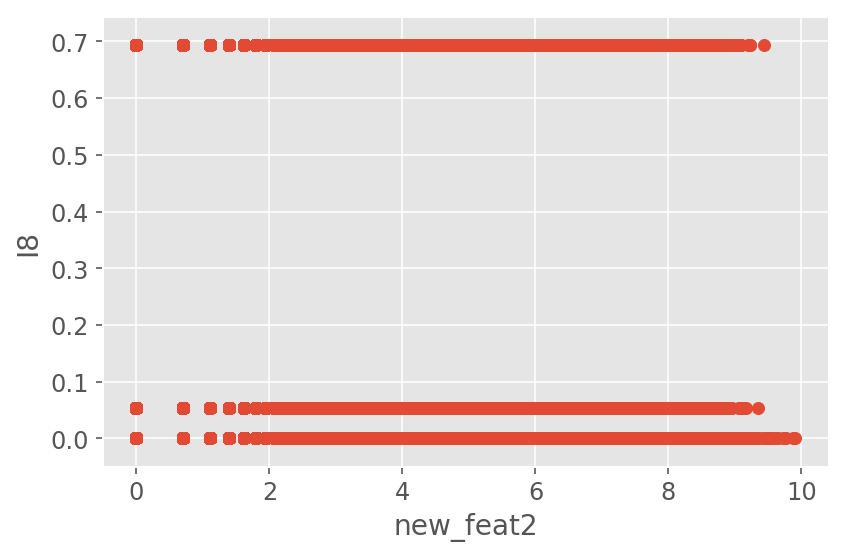

Saving figure label_Vs_scatter_plots-I8new_feat3


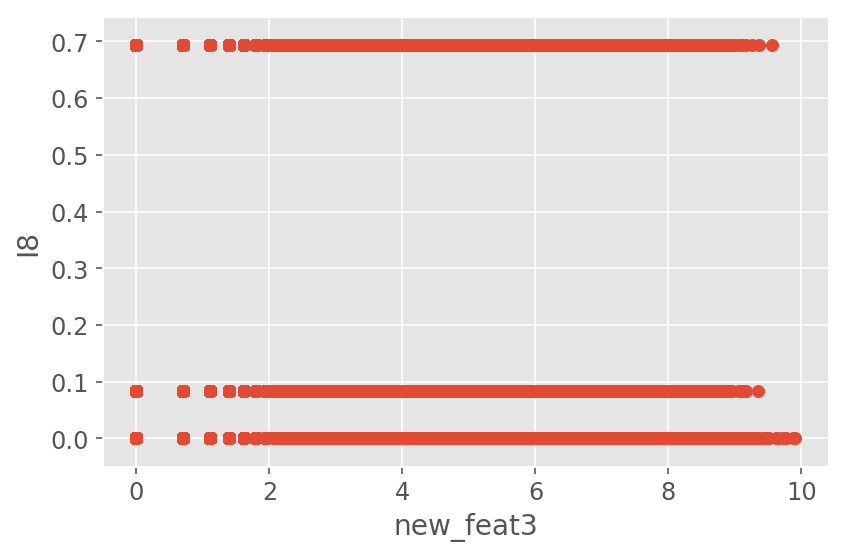

Saving figure label_Vs_scatter_plots-I8new_feat4


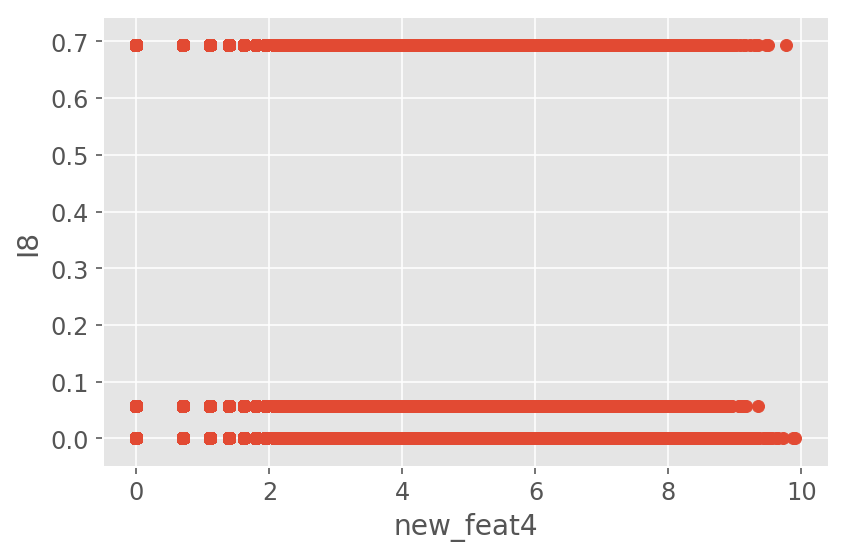

Saving figure label_Vs_scatter_plots-I8new_feat5


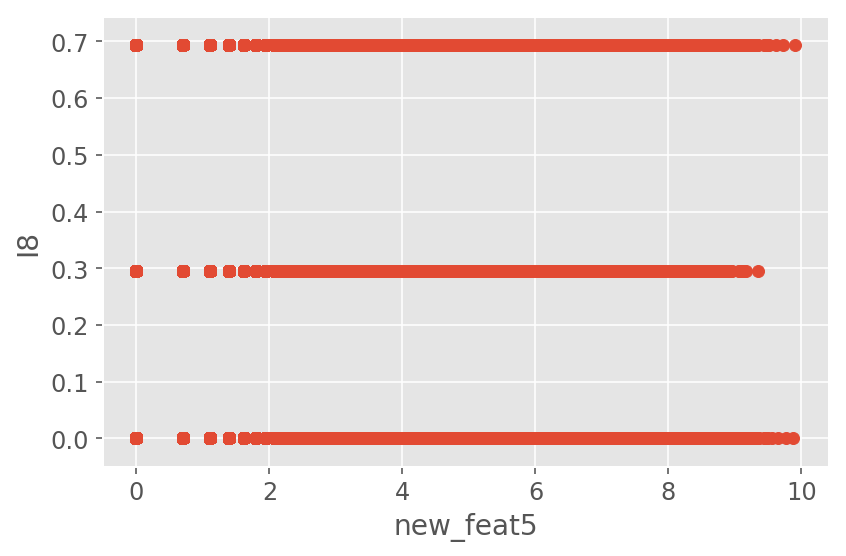

Saving figure label_Vs_scatter_plots-I8new_feat6


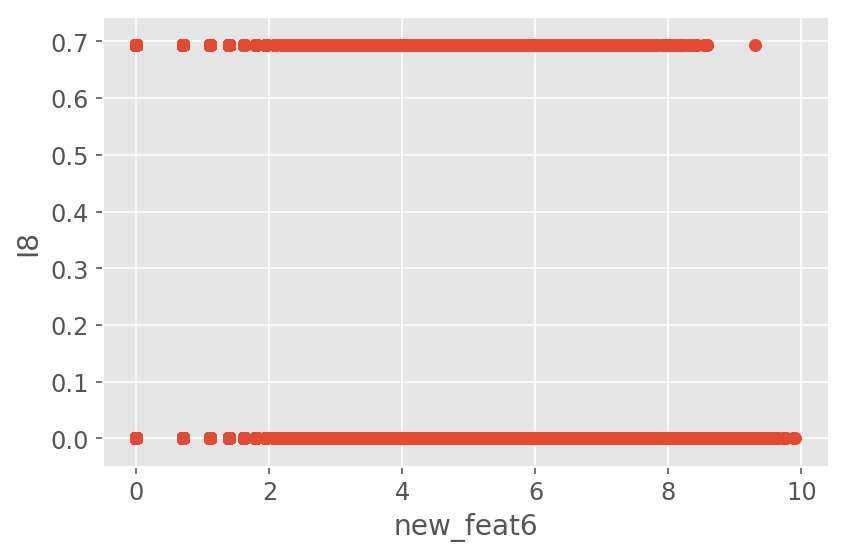

Saving figure label_Vs_scatter_plots-I10I1


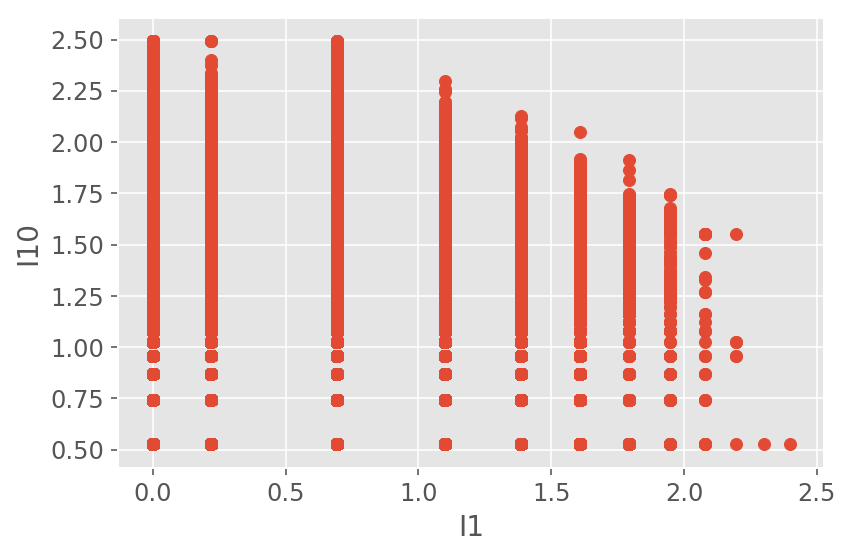

Saving figure label_Vs_scatter_plots-I10I2


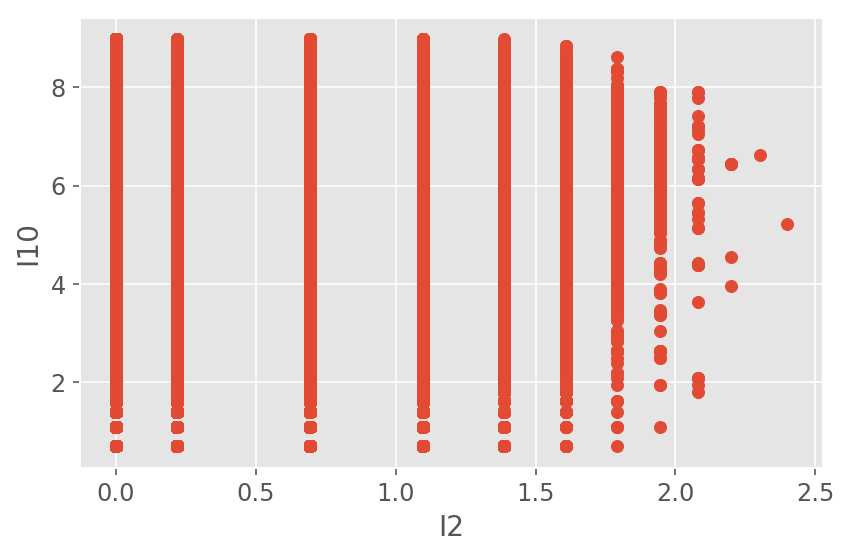

Saving figure label_Vs_scatter_plots-I10I3


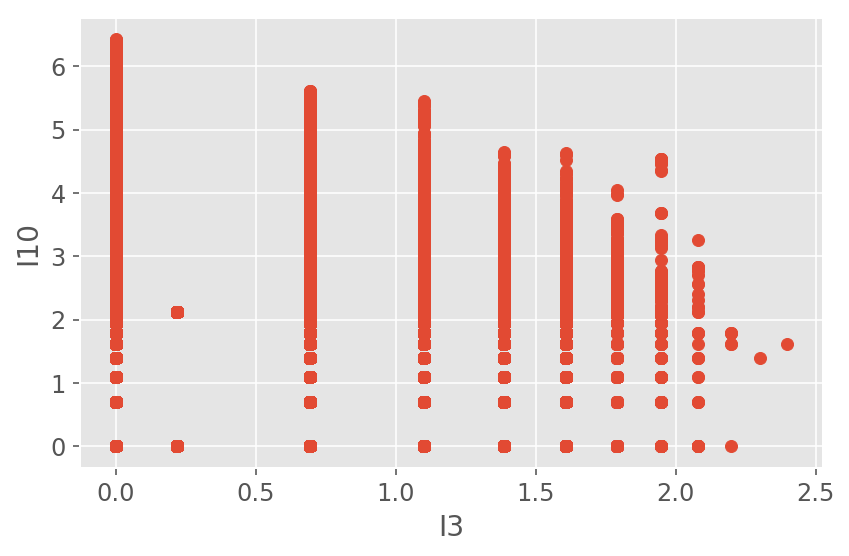

Saving figure label_Vs_scatter_plots-I10I4


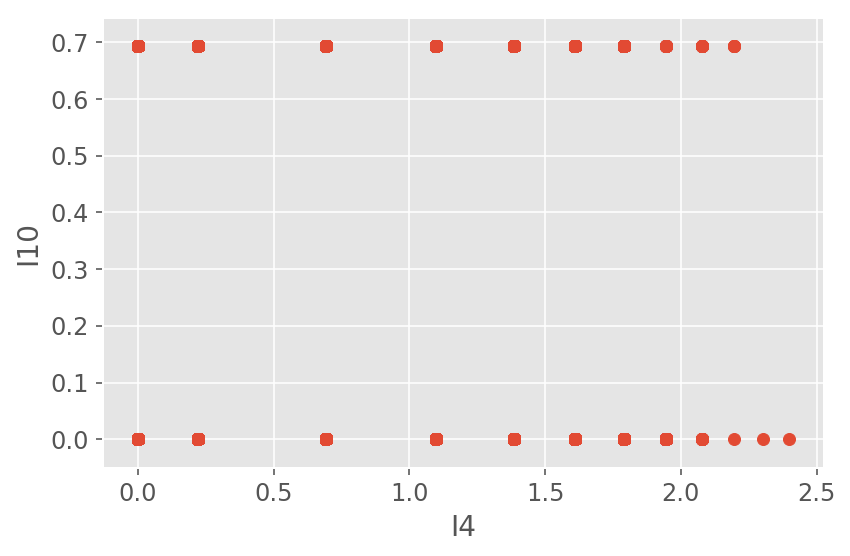

Saving figure label_Vs_scatter_plots-I10I5


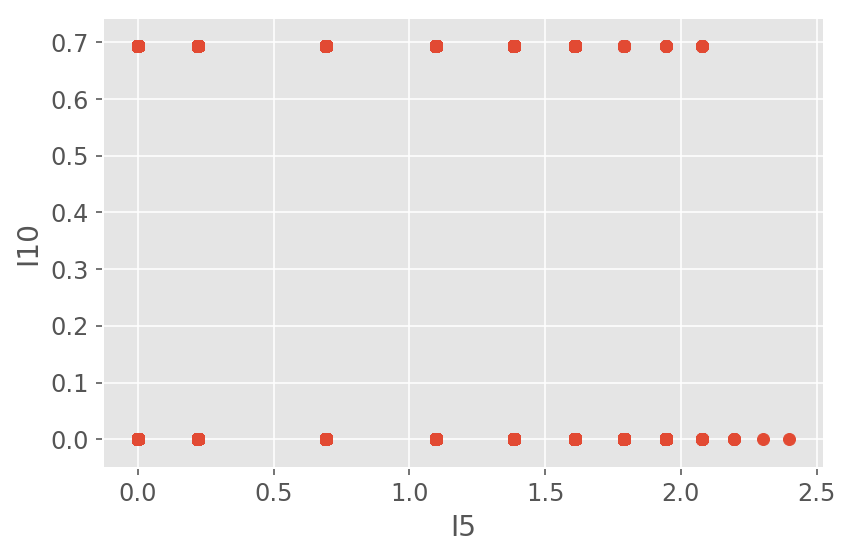

Saving figure label_Vs_scatter_plots-I10I6


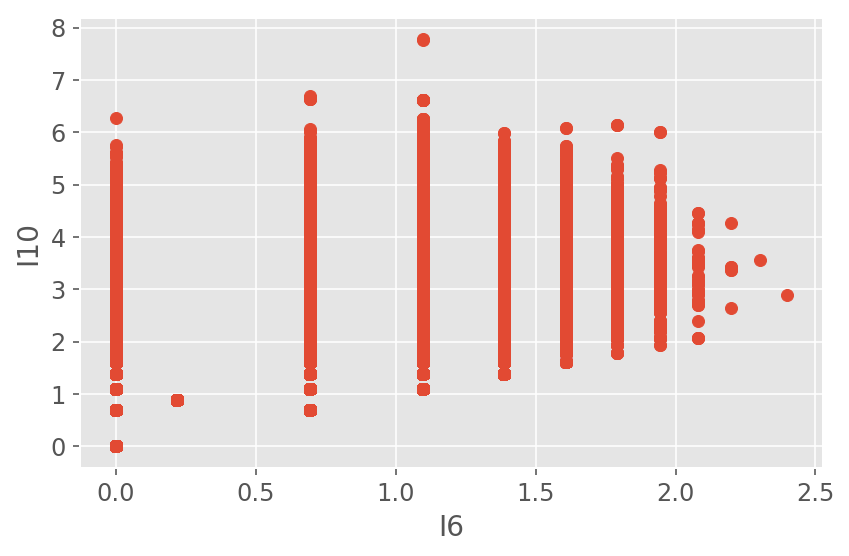

Saving figure label_Vs_scatter_plots-I10I7


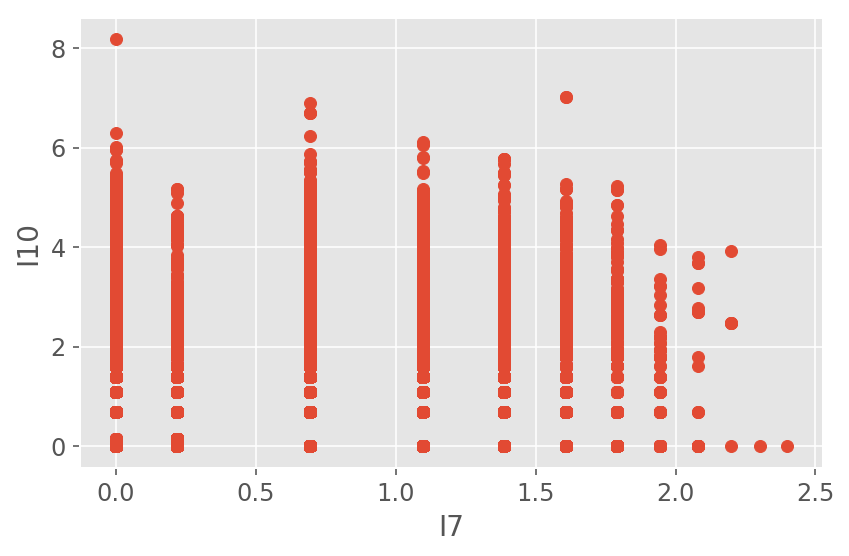

Saving figure label_Vs_scatter_plots-I10I8


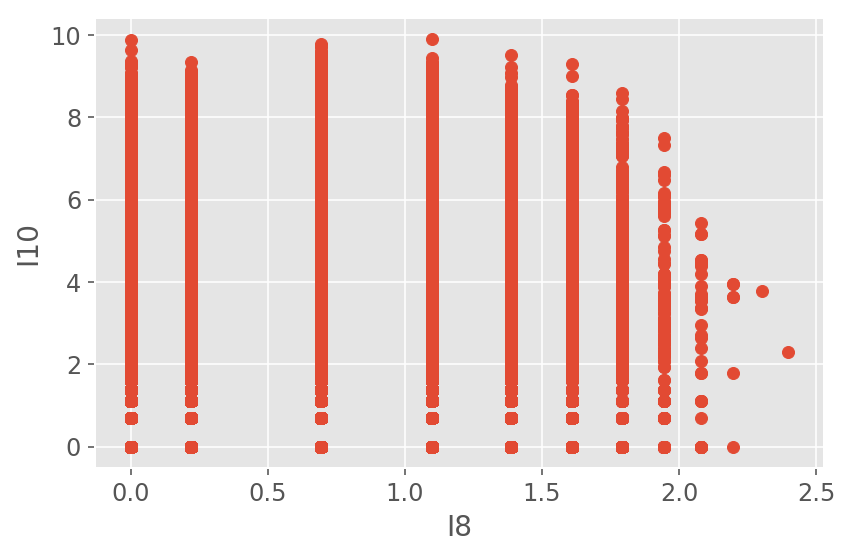

Saving figure label_Vs_scatter_plots-I10I10


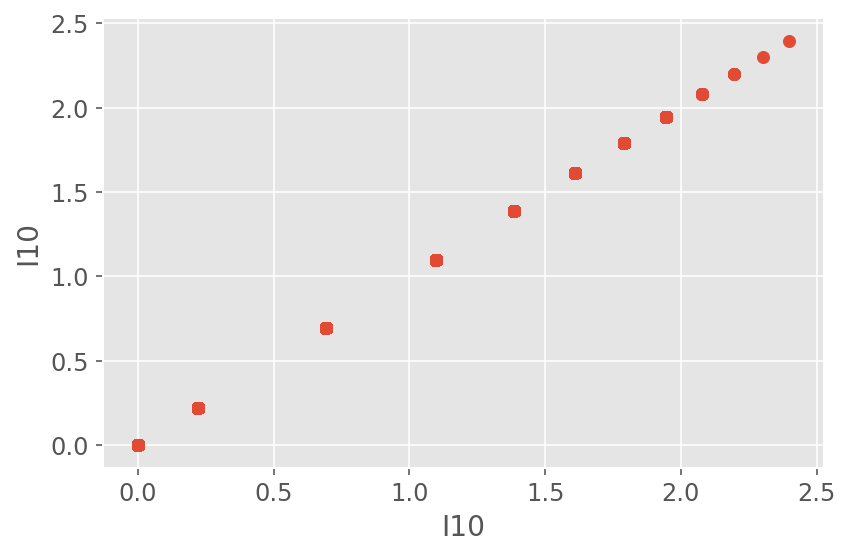

Saving figure label_Vs_scatter_plots-I10I11


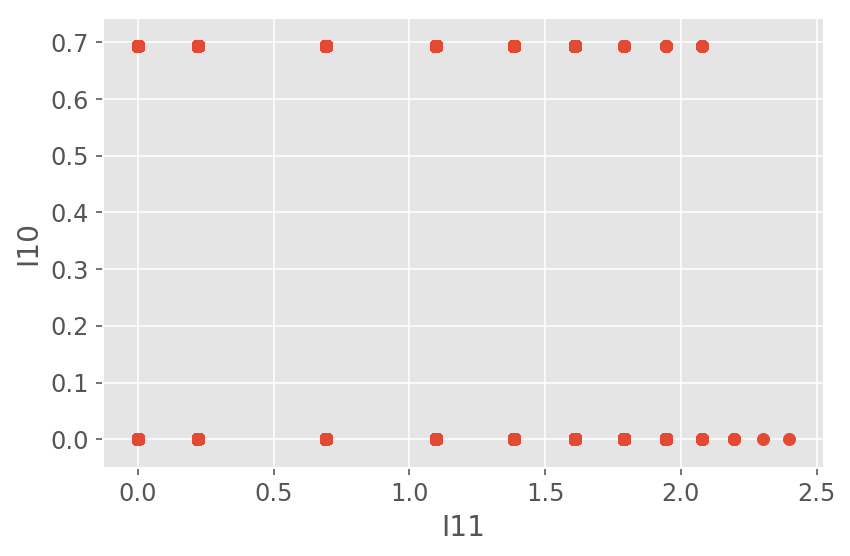

Saving figure label_Vs_scatter_plots-I10I12


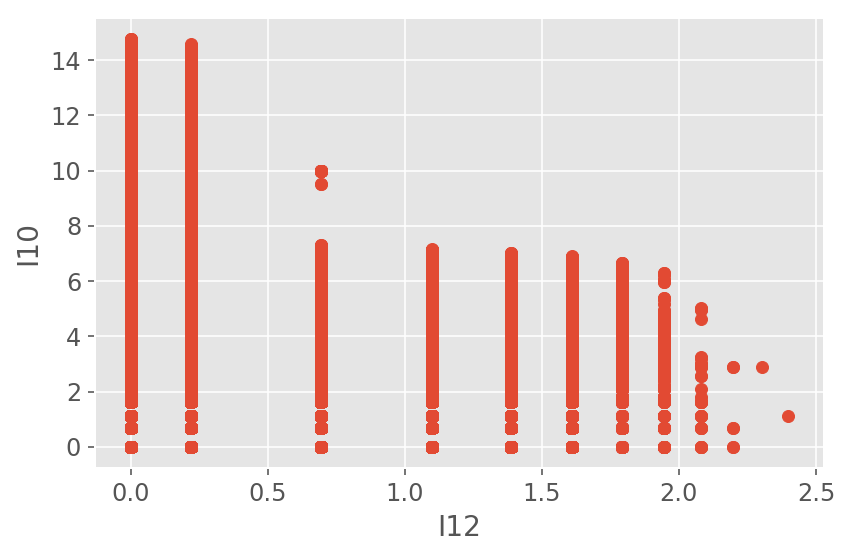

Saving figure label_Vs_scatter_plots-I10I13


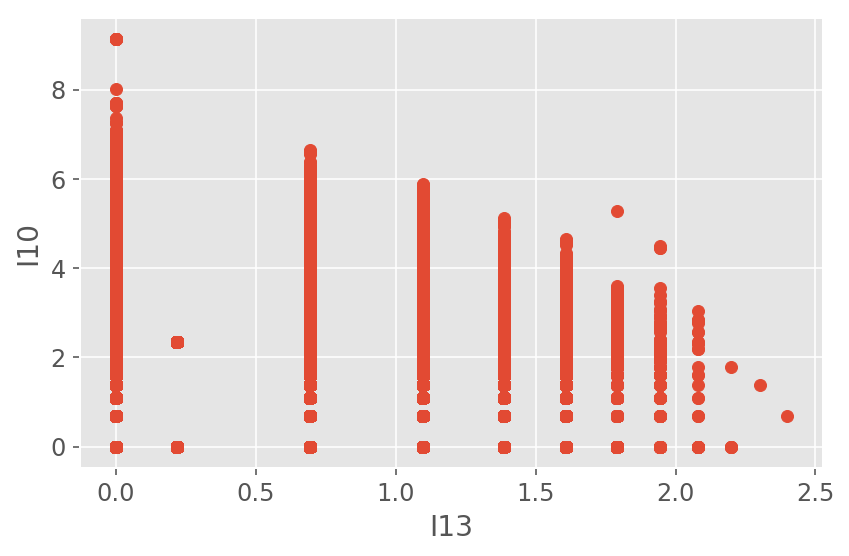

Saving figure label_Vs_scatter_plots-I10new_feat1


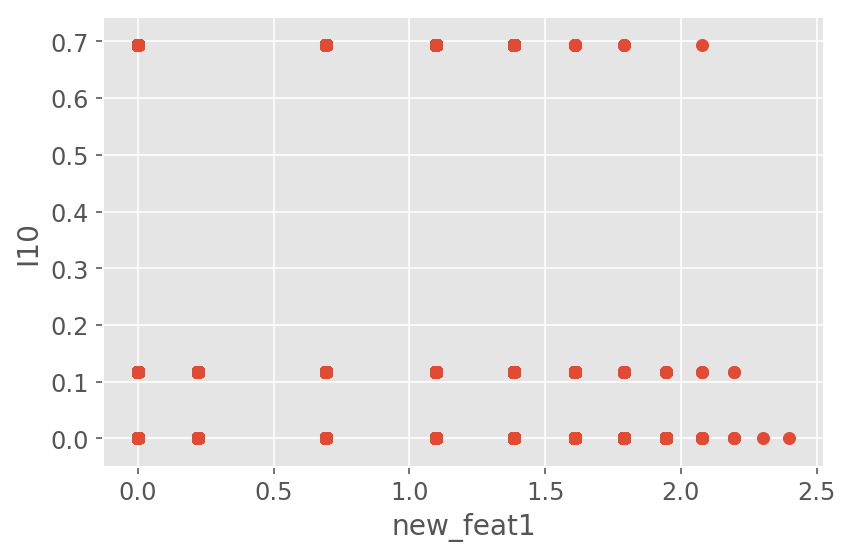

Saving figure label_Vs_scatter_plots-I10new_feat2


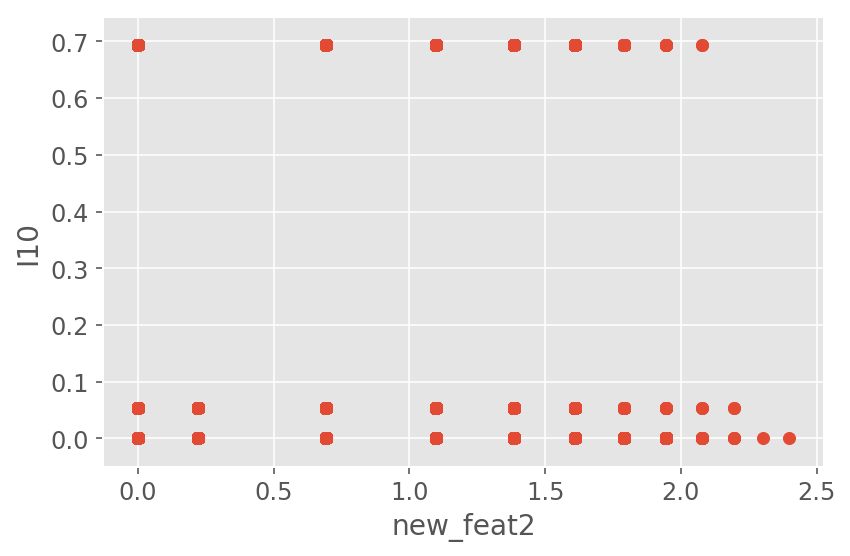

Saving figure label_Vs_scatter_plots-I10new_feat3


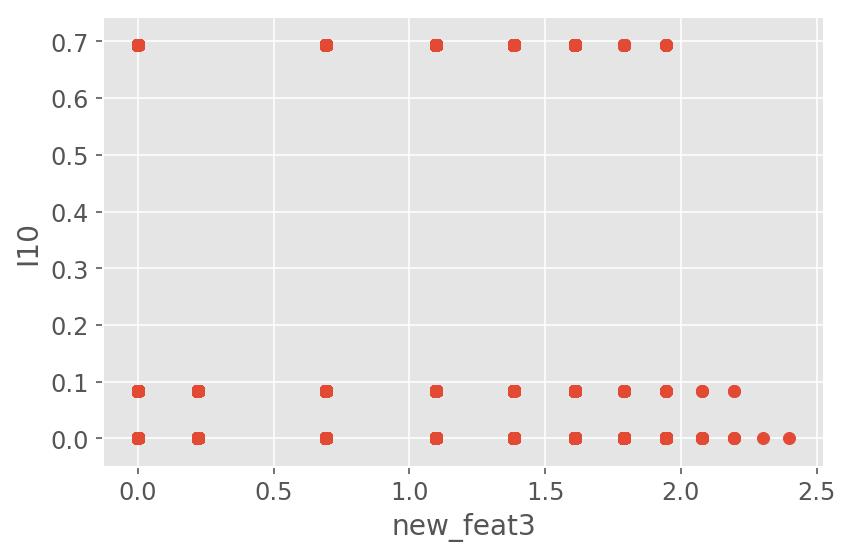

Saving figure label_Vs_scatter_plots-I10new_feat4


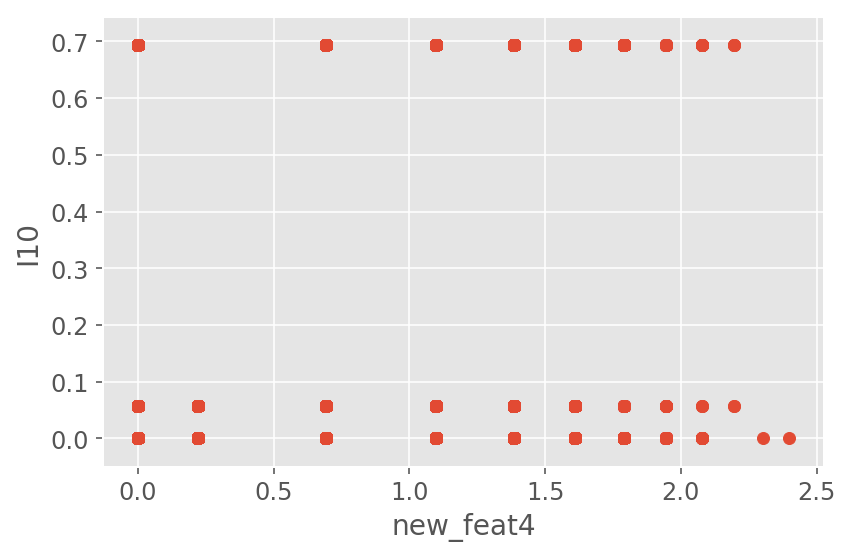

Saving figure label_Vs_scatter_plots-I10new_feat5


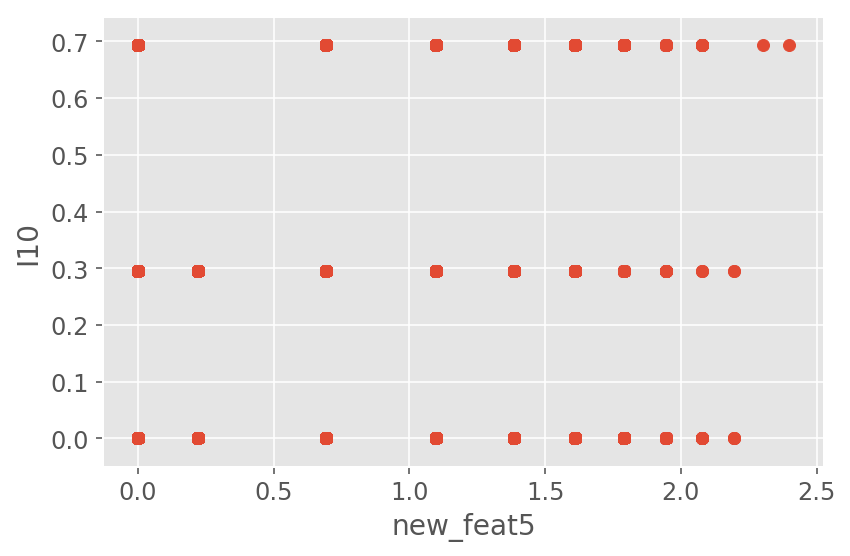

Saving figure label_Vs_scatter_plots-I10new_feat6


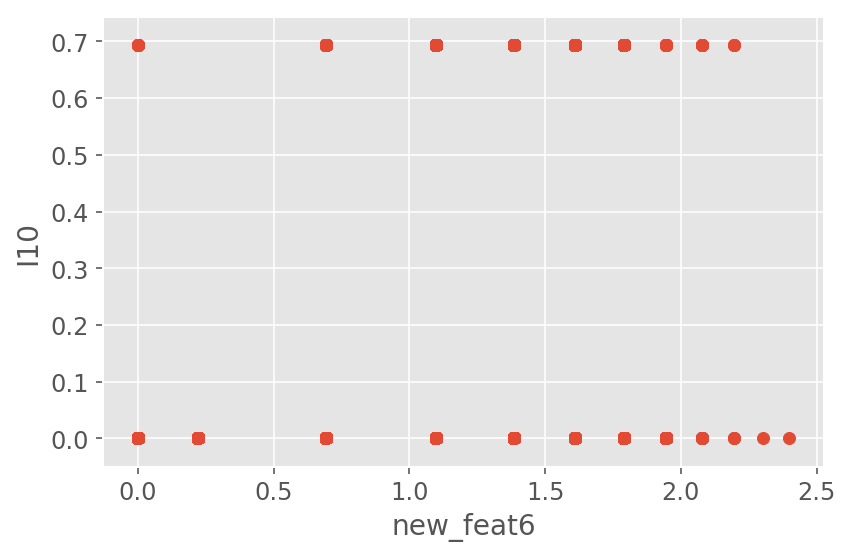

Saving figure label_Vs_scatter_plots-I11I1


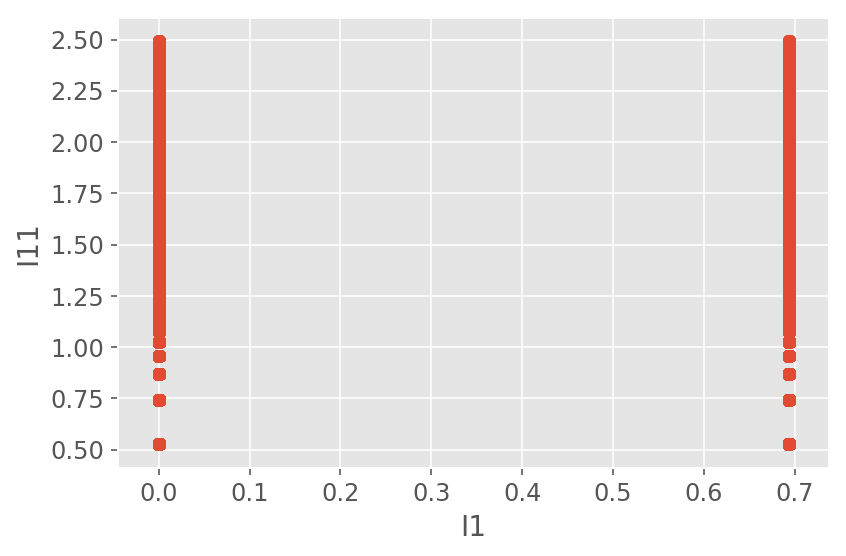

Saving figure label_Vs_scatter_plots-I11I2


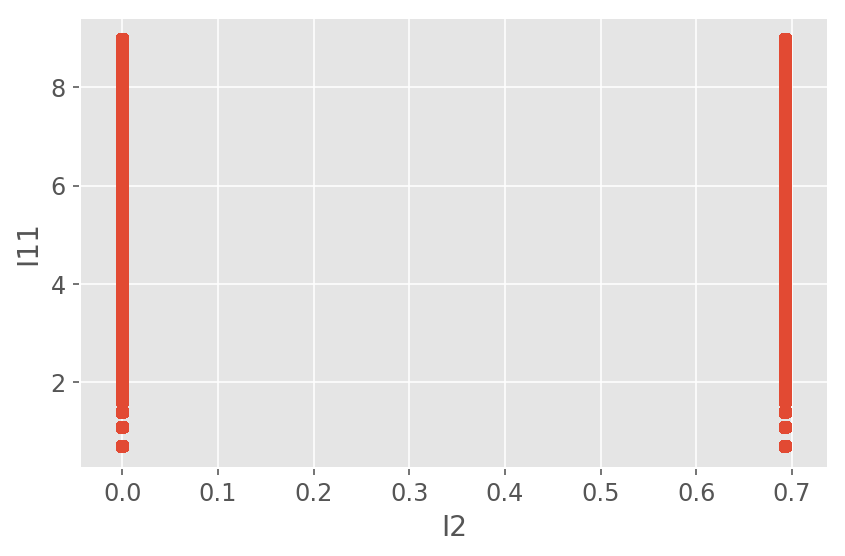

Saving figure label_Vs_scatter_plots-I11I3


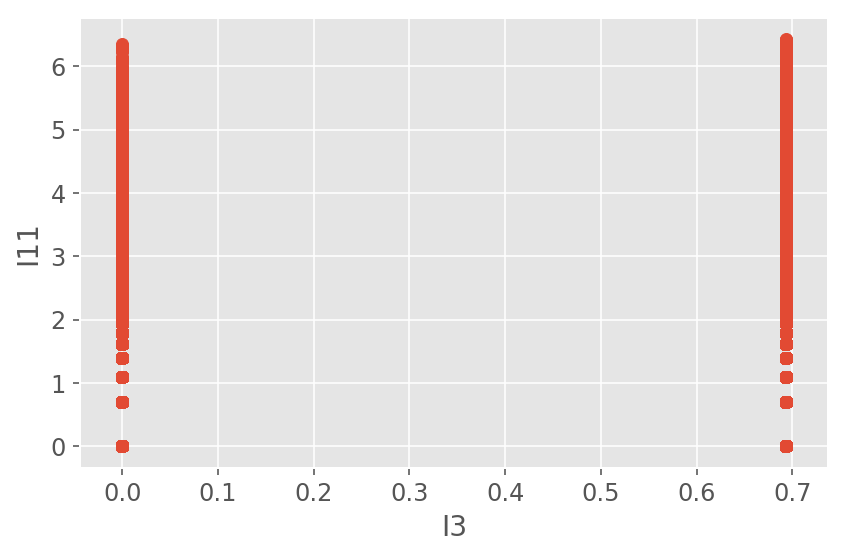

Saving figure label_Vs_scatter_plots-I11I4


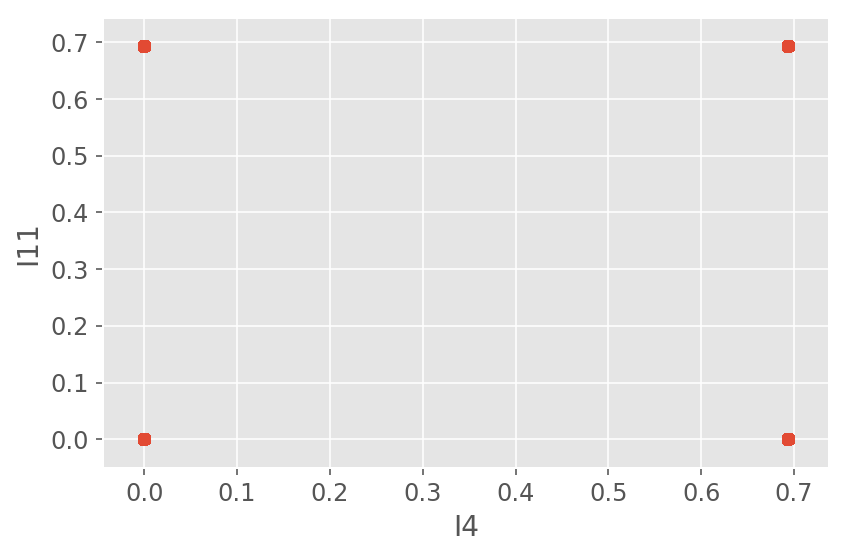

Saving figure label_Vs_scatter_plots-I11I5


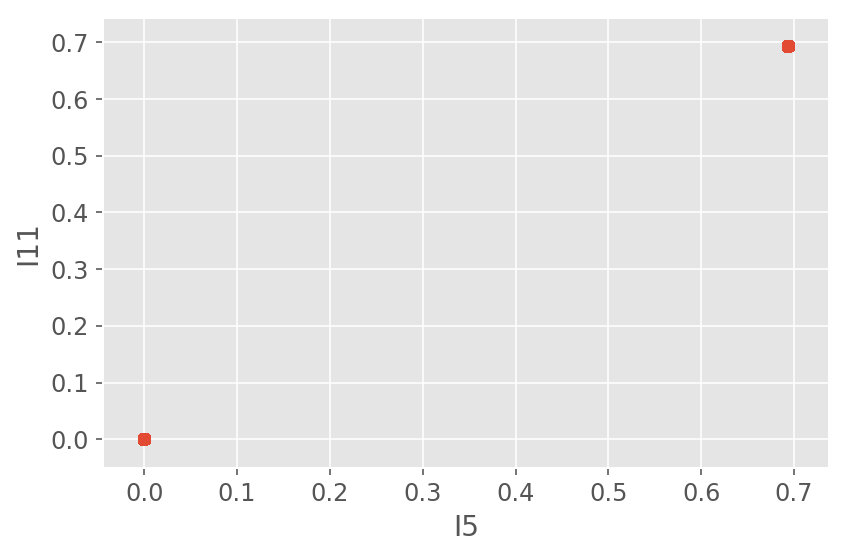

Saving figure label_Vs_scatter_plots-I11I6


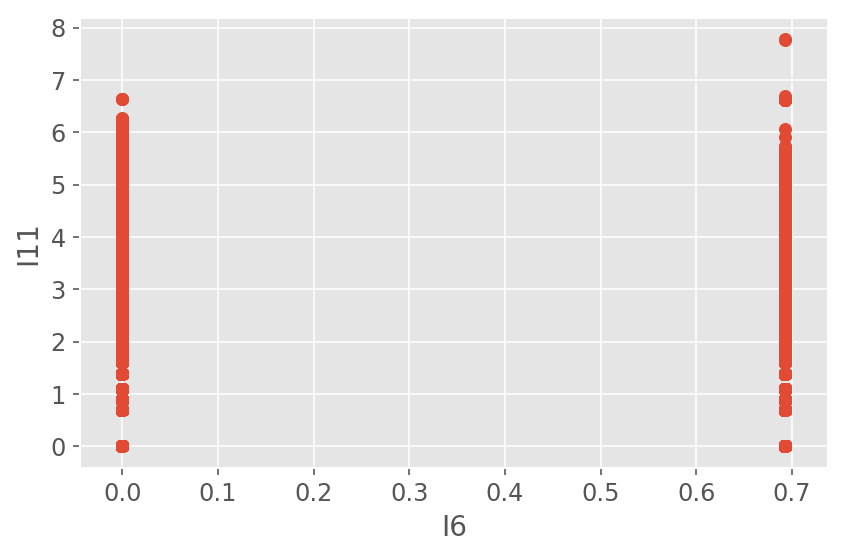

Saving figure label_Vs_scatter_plots-I11I7


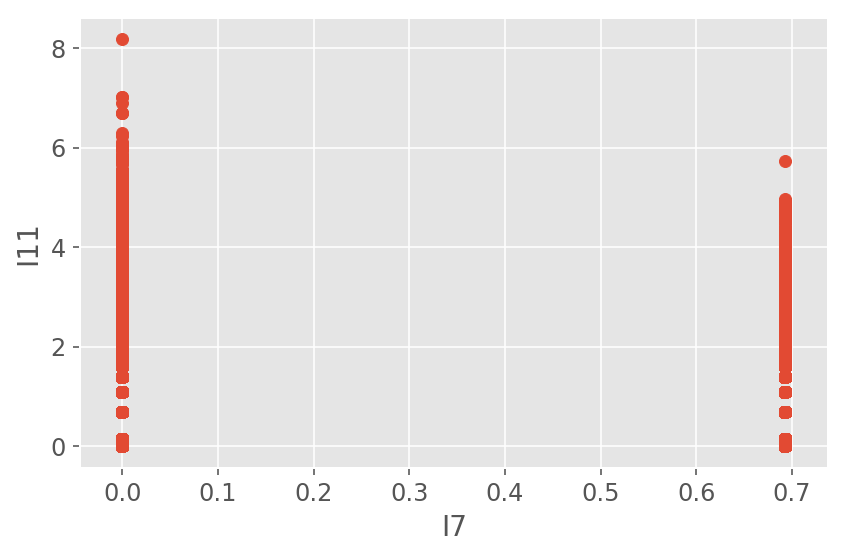

Saving figure label_Vs_scatter_plots-I11I8


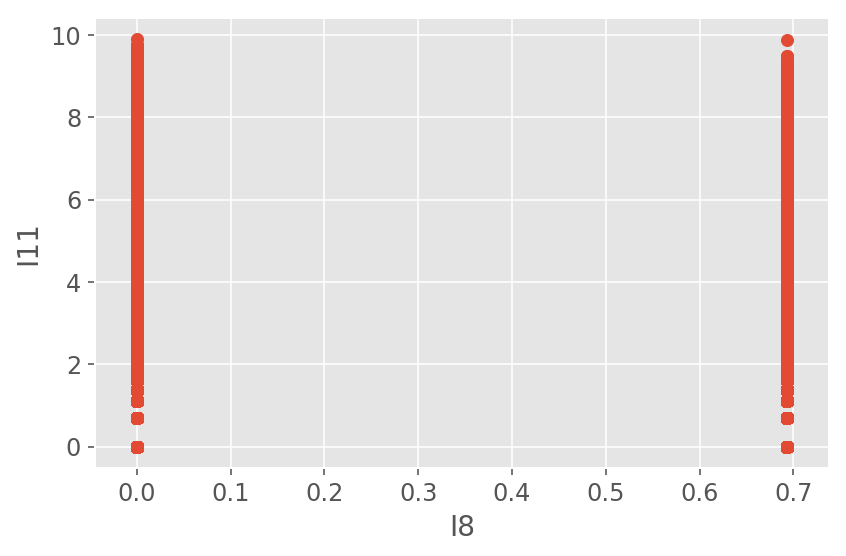

Saving figure label_Vs_scatter_plots-I11I10


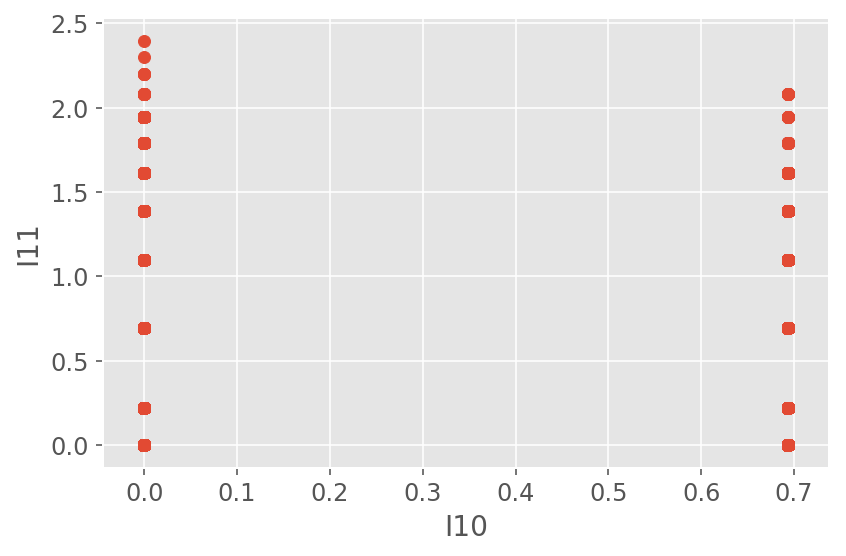

Saving figure label_Vs_scatter_plots-I11I11


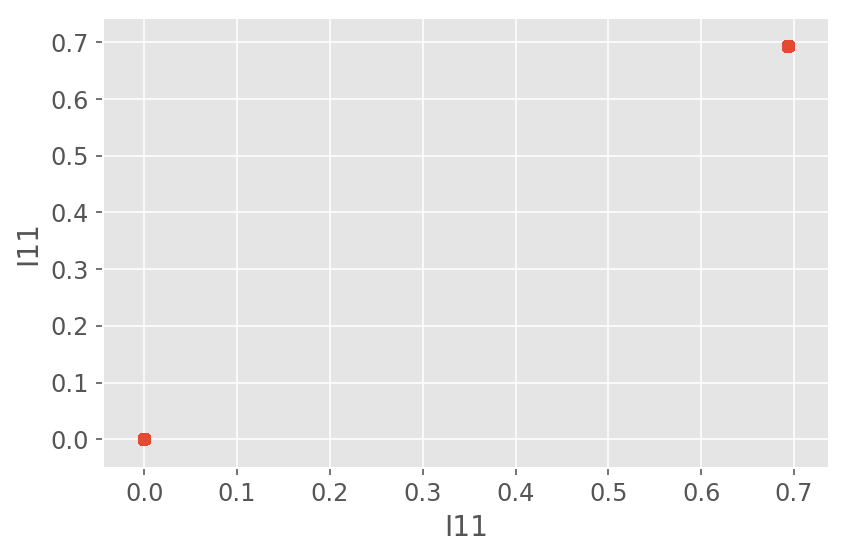

Saving figure label_Vs_scatter_plots-I11I12


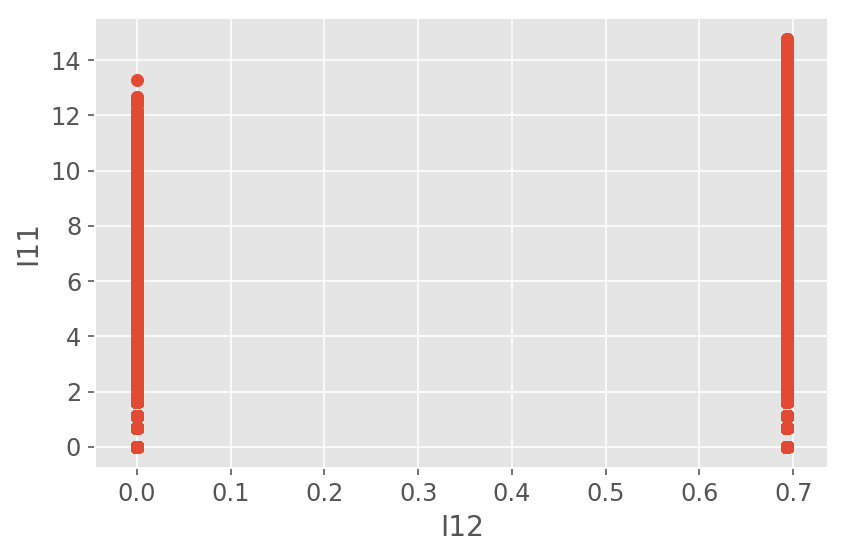

Saving figure label_Vs_scatter_plots-I11I13


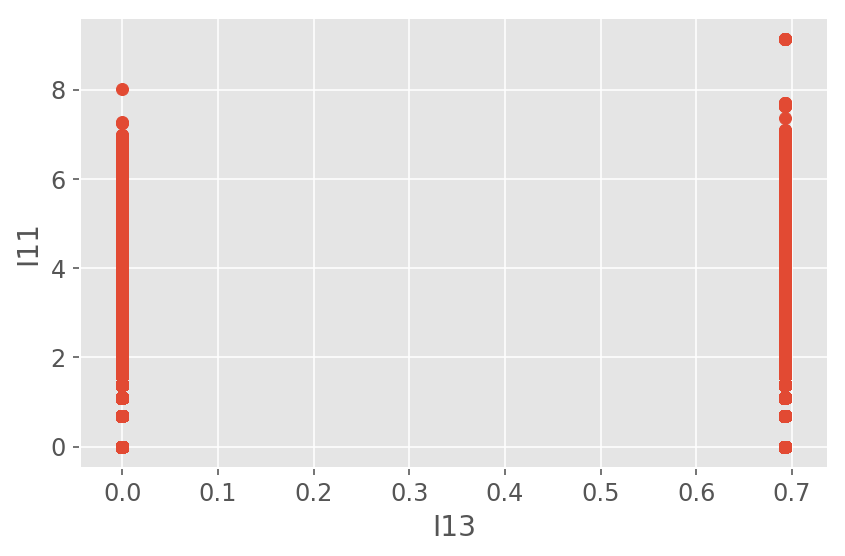

Saving figure label_Vs_scatter_plots-I11new_feat1


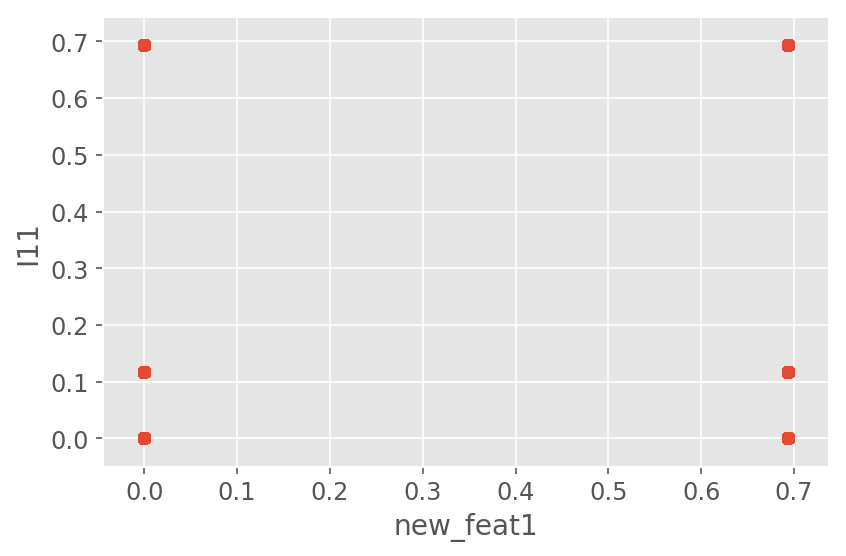

Saving figure label_Vs_scatter_plots-I11new_feat2


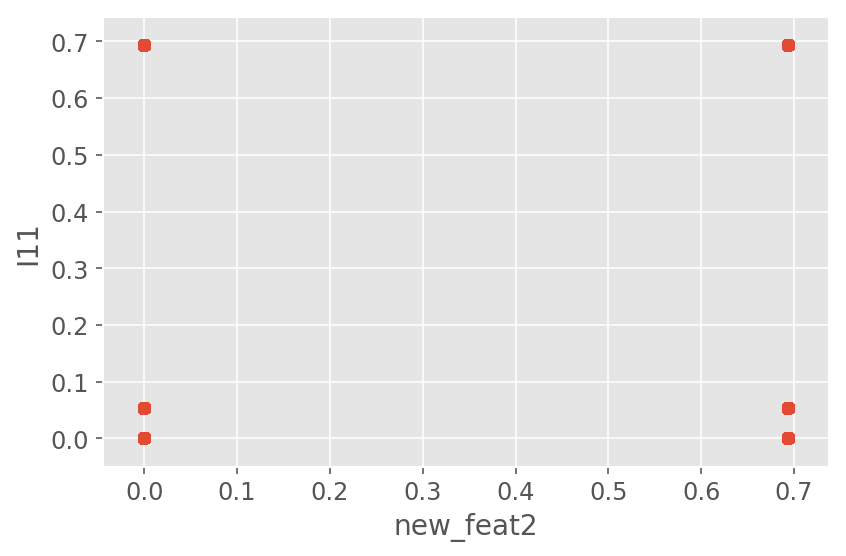

Saving figure label_Vs_scatter_plots-I11new_feat3


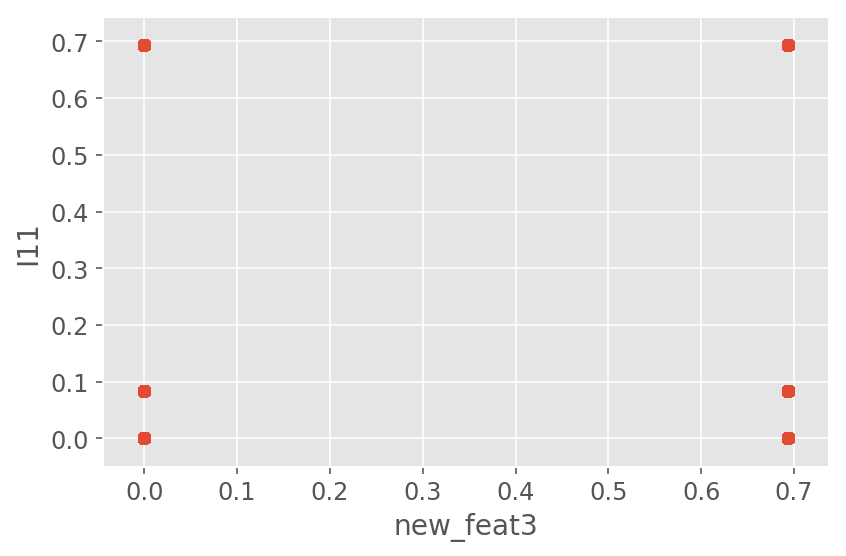

Saving figure label_Vs_scatter_plots-I11new_feat4


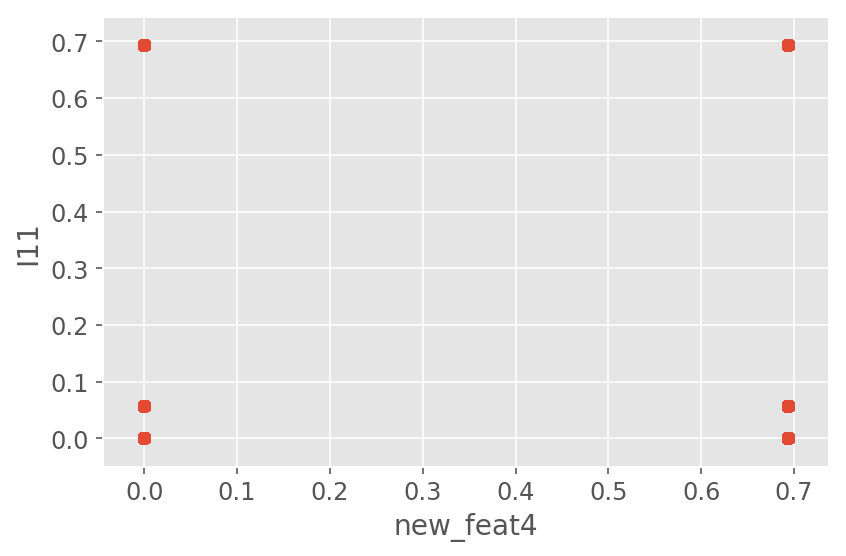

Saving figure label_Vs_scatter_plots-I11new_feat5


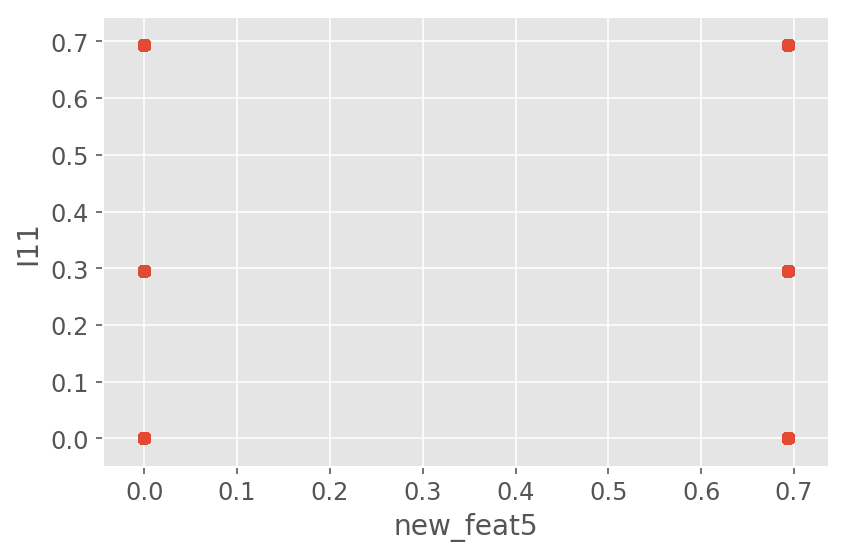

Saving figure label_Vs_scatter_plots-I11new_feat6


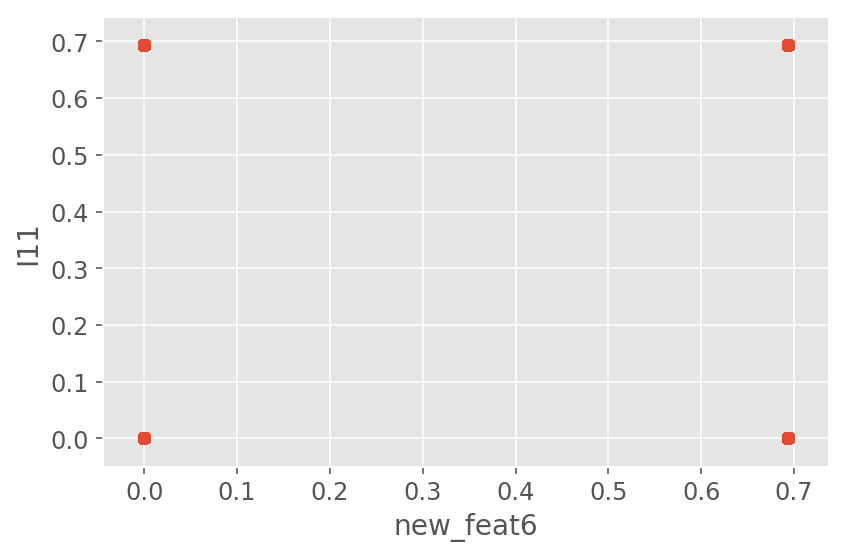

Saving figure label_Vs_scatter_plots-I12I1


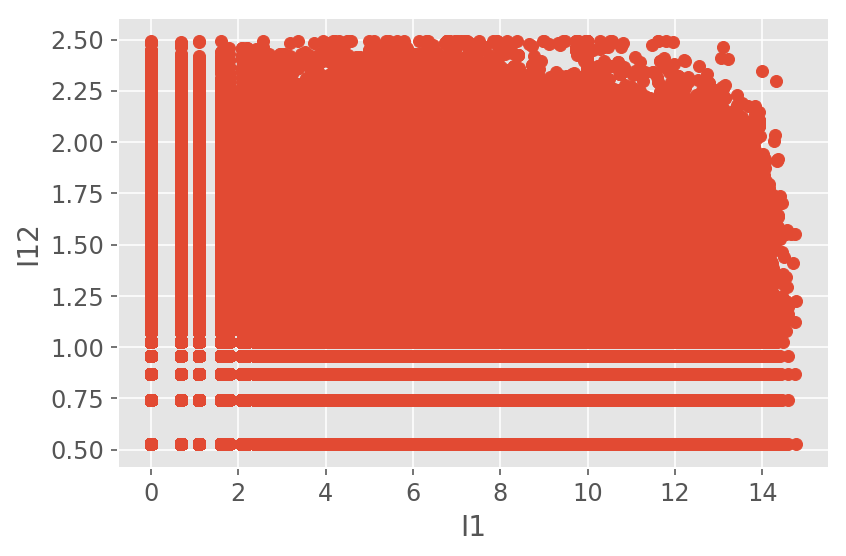

Saving figure label_Vs_scatter_plots-I12I2


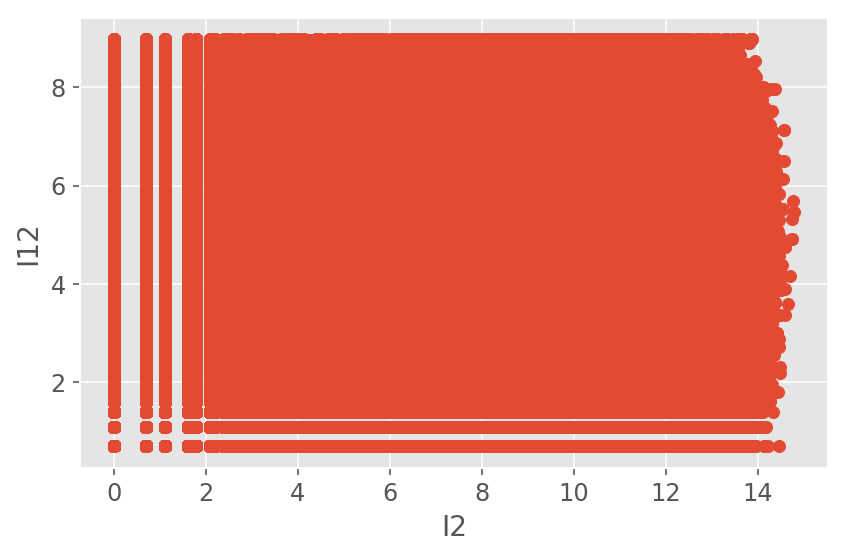

Saving figure label_Vs_scatter_plots-I12I3


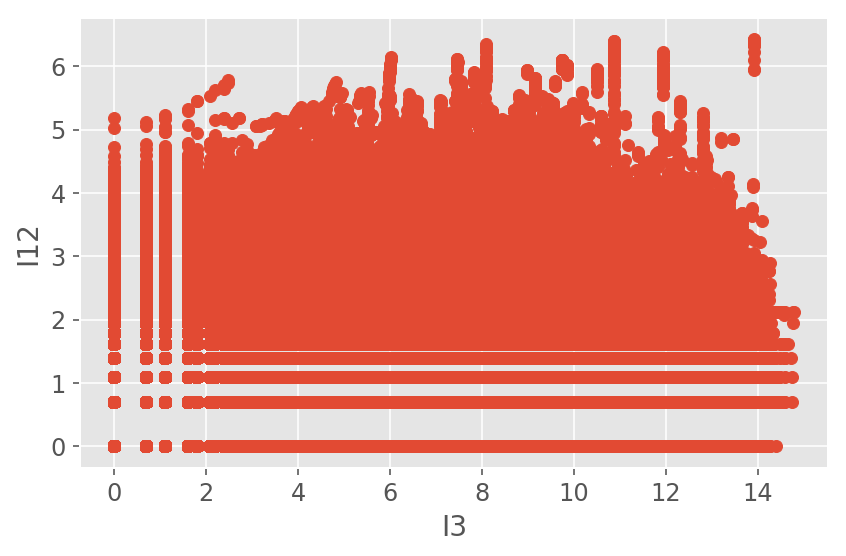

Saving figure label_Vs_scatter_plots-I12I4


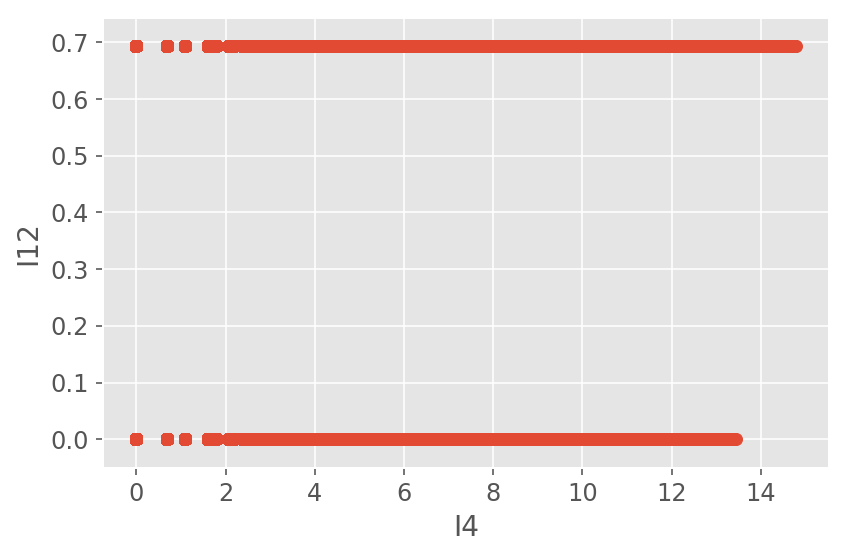

Saving figure label_Vs_scatter_plots-I12I5


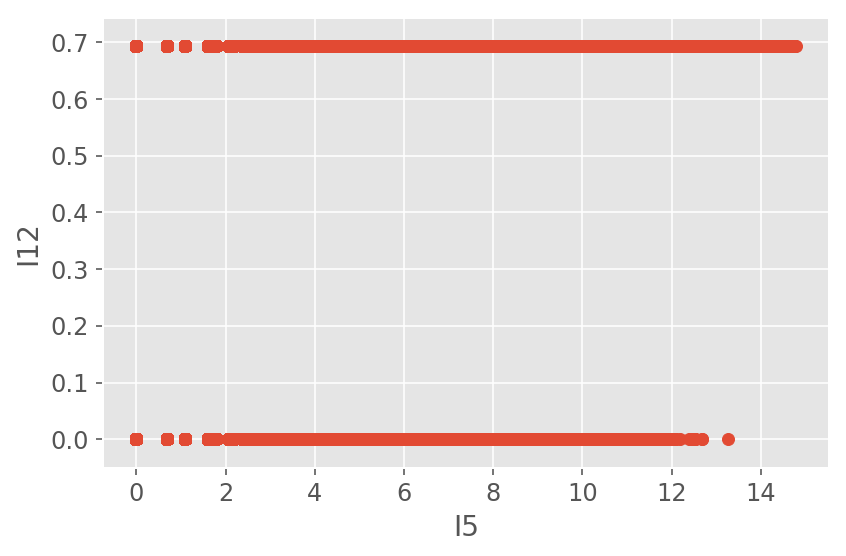

Saving figure label_Vs_scatter_plots-I12I6


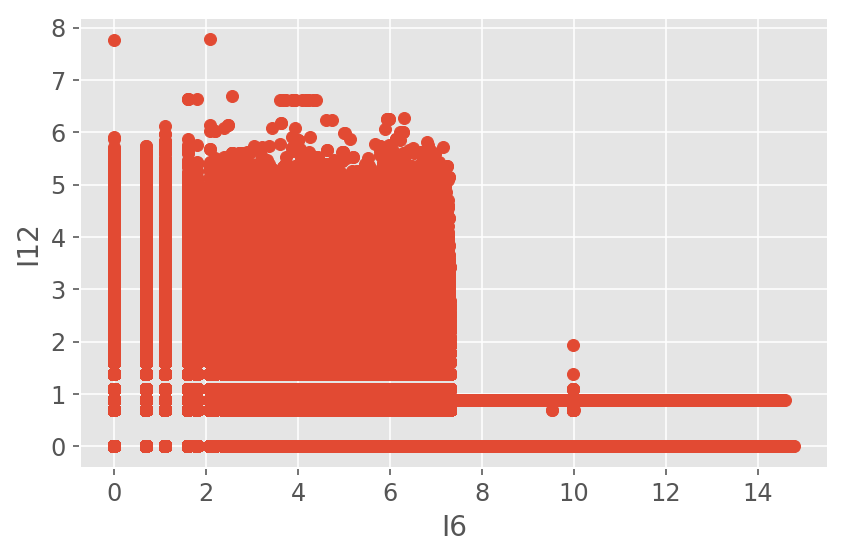

Saving figure label_Vs_scatter_plots-I12I7


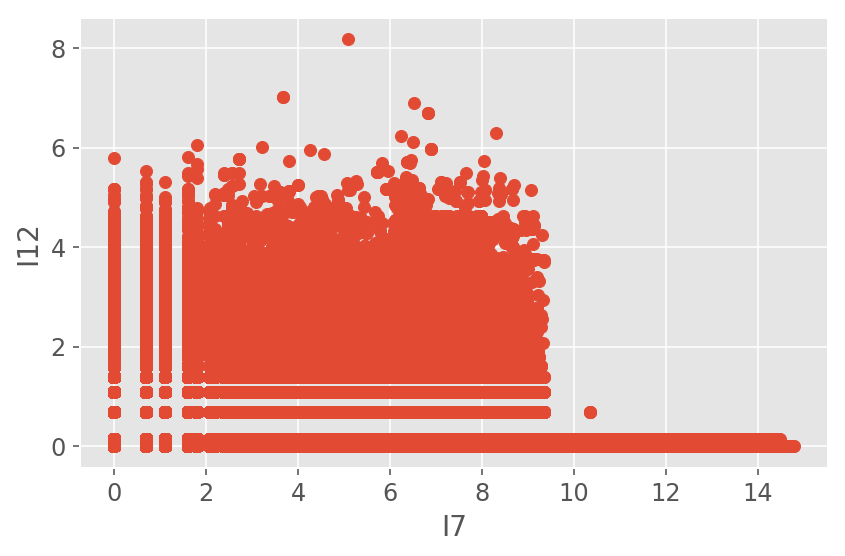

Saving figure label_Vs_scatter_plots-I12I8


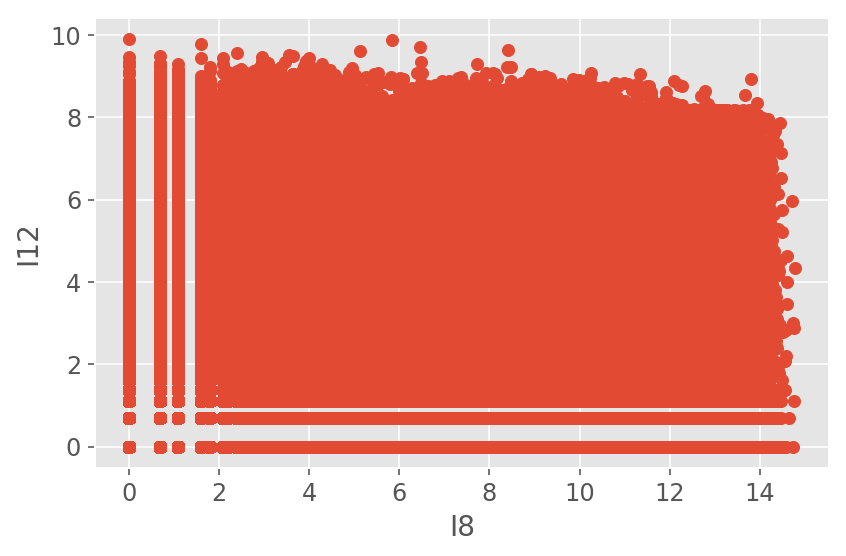

Saving figure label_Vs_scatter_plots-I12I10


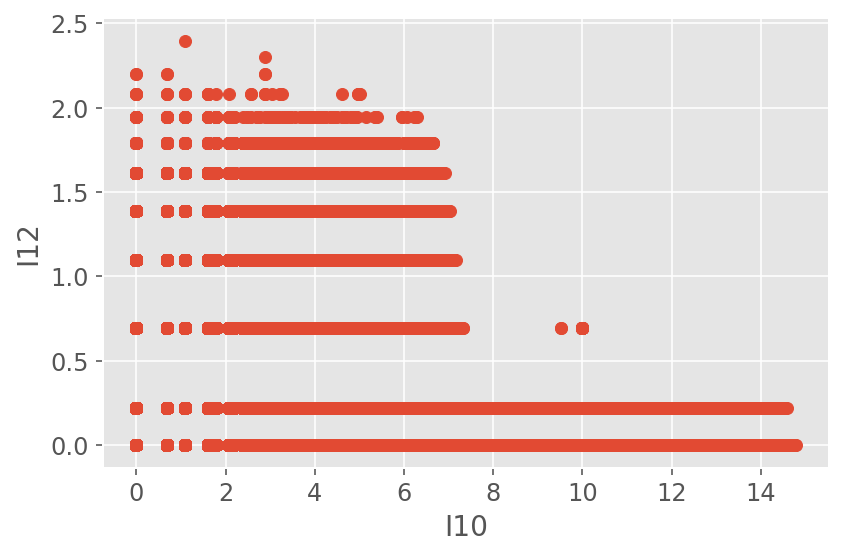

Saving figure label_Vs_scatter_plots-I12I11


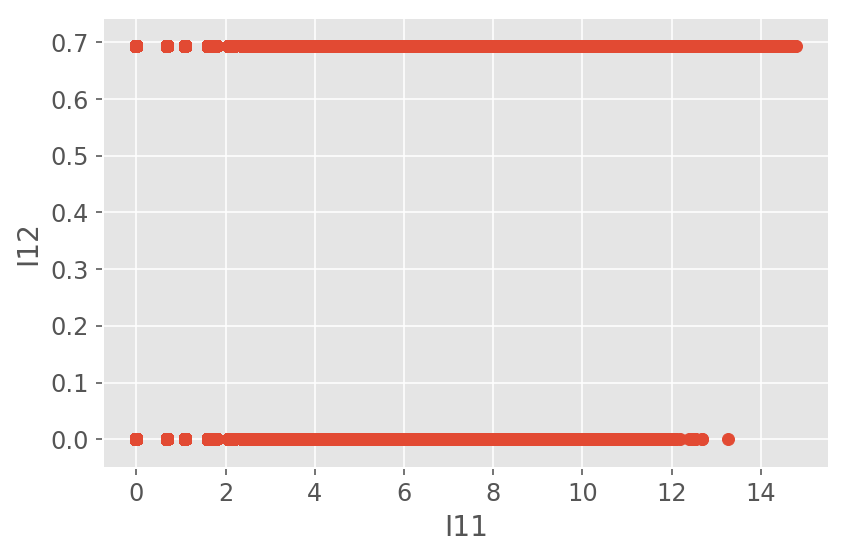

Saving figure label_Vs_scatter_plots-I12I12


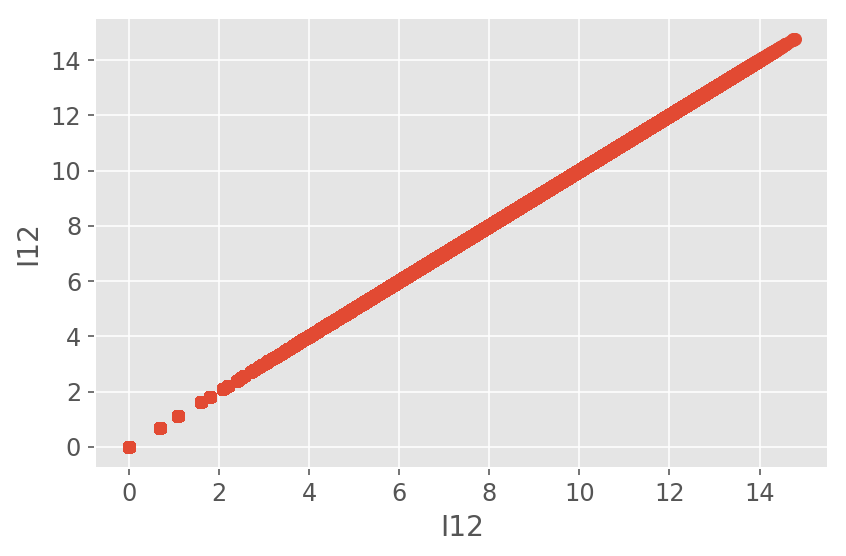

Saving figure label_Vs_scatter_plots-I12I13


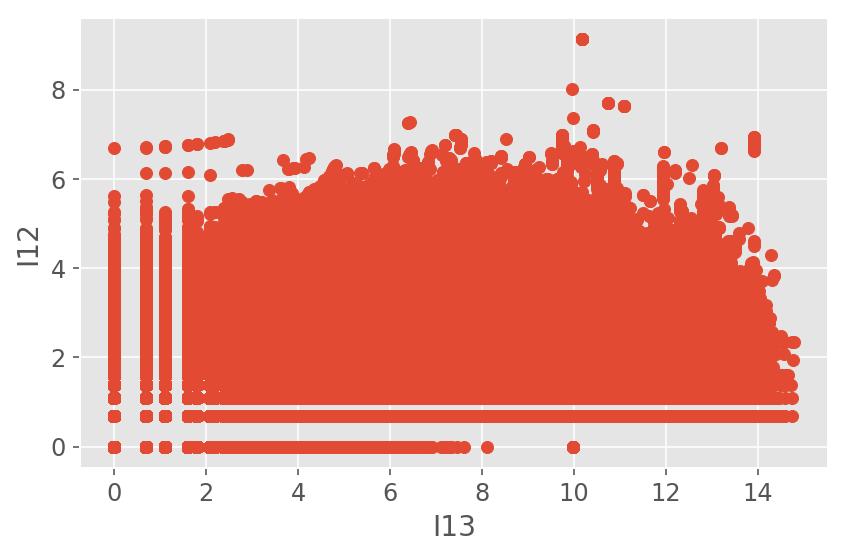

Saving figure label_Vs_scatter_plots-I12new_feat1


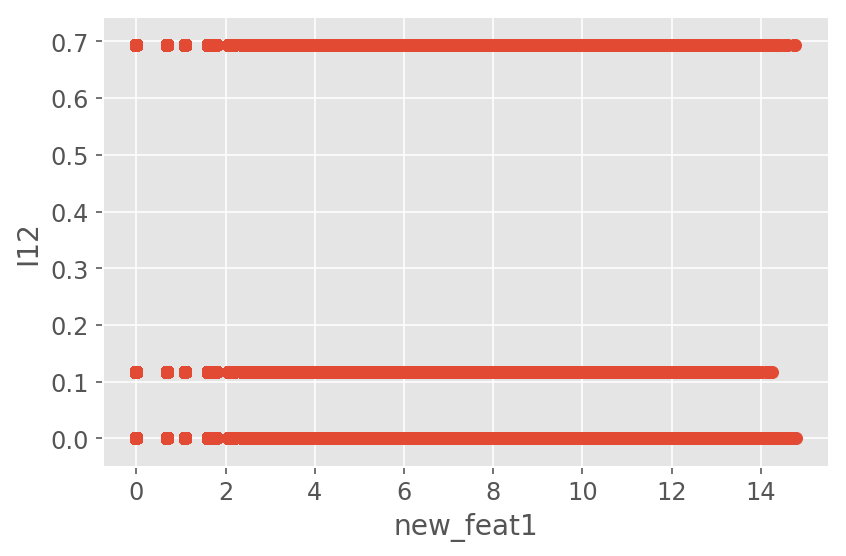

Saving figure label_Vs_scatter_plots-I12new_feat2


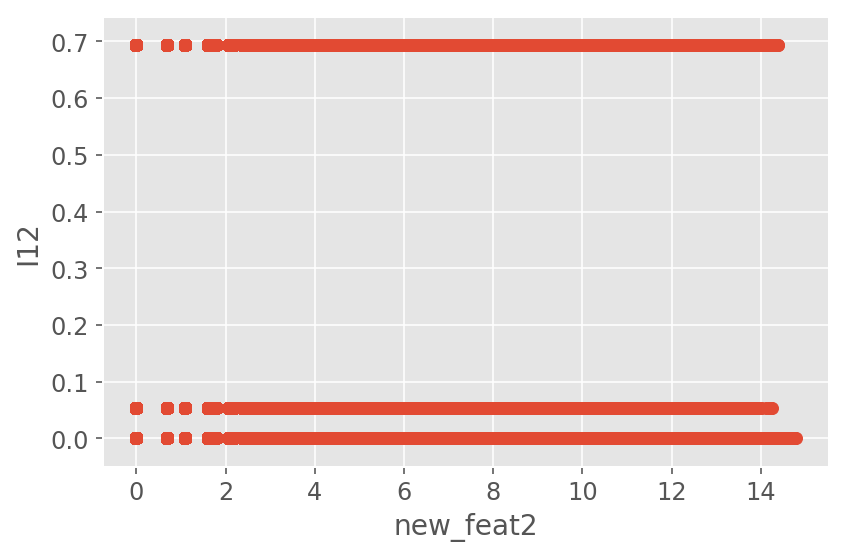

Saving figure label_Vs_scatter_plots-I12new_feat3


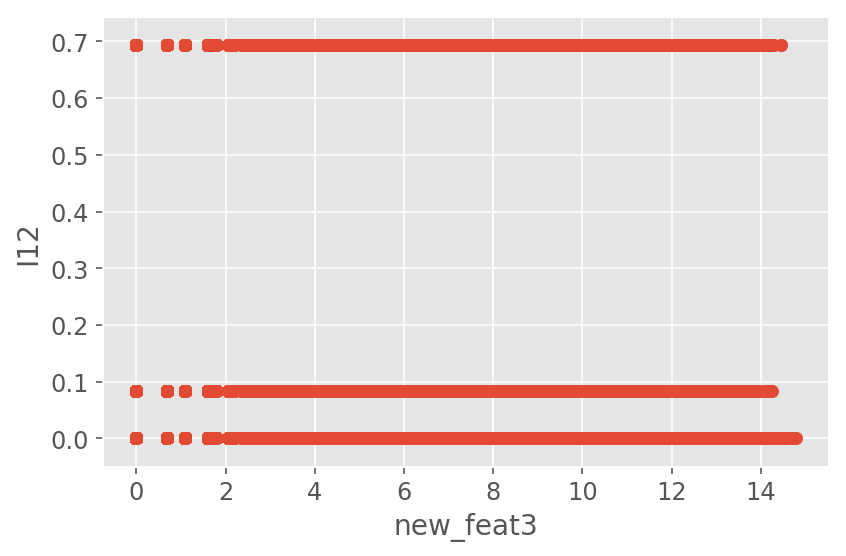

Saving figure label_Vs_scatter_plots-I12new_feat4


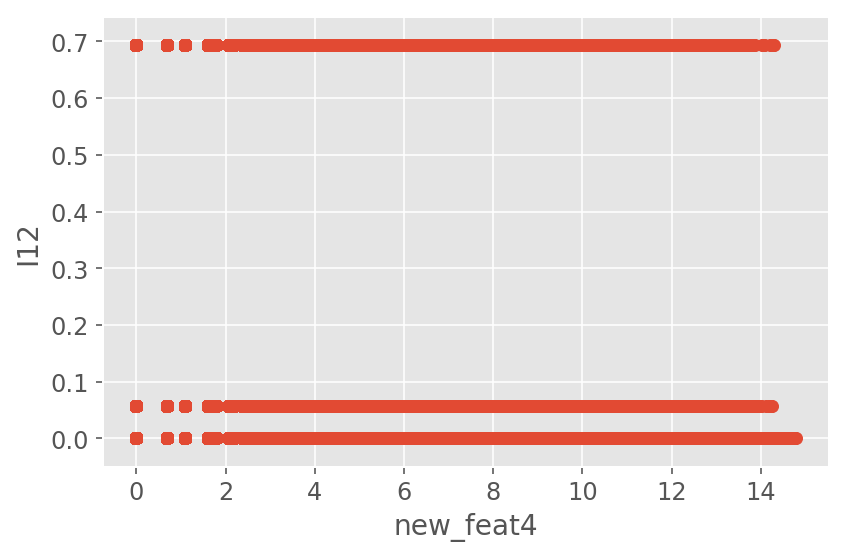

Saving figure label_Vs_scatter_plots-I12new_feat5


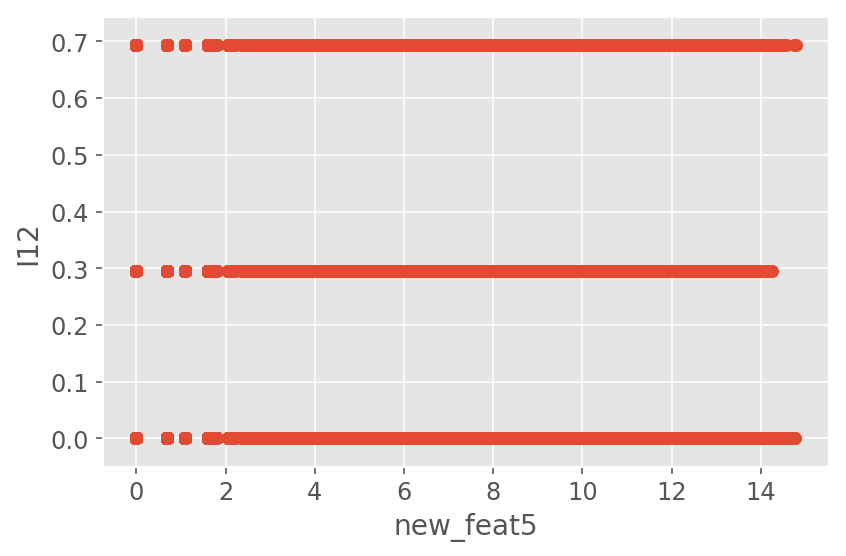

Saving figure label_Vs_scatter_plots-I12new_feat6


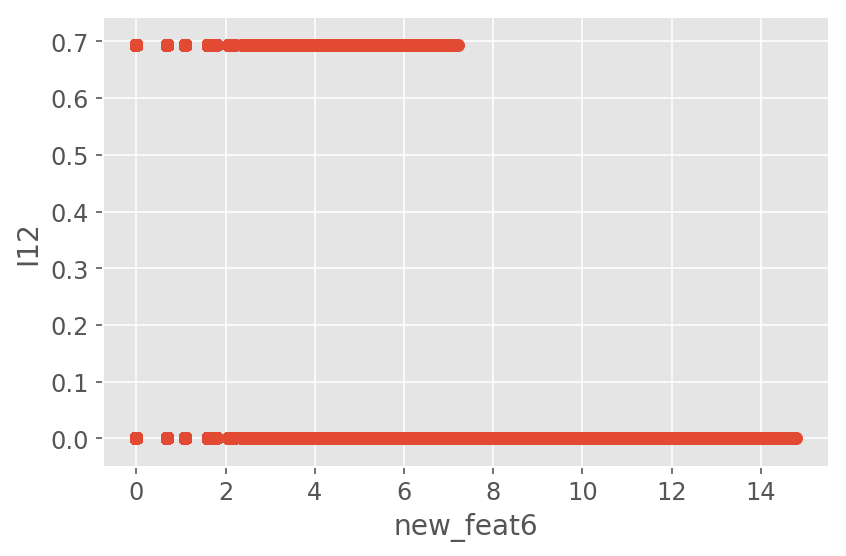

Saving figure label_Vs_scatter_plots-I13I1


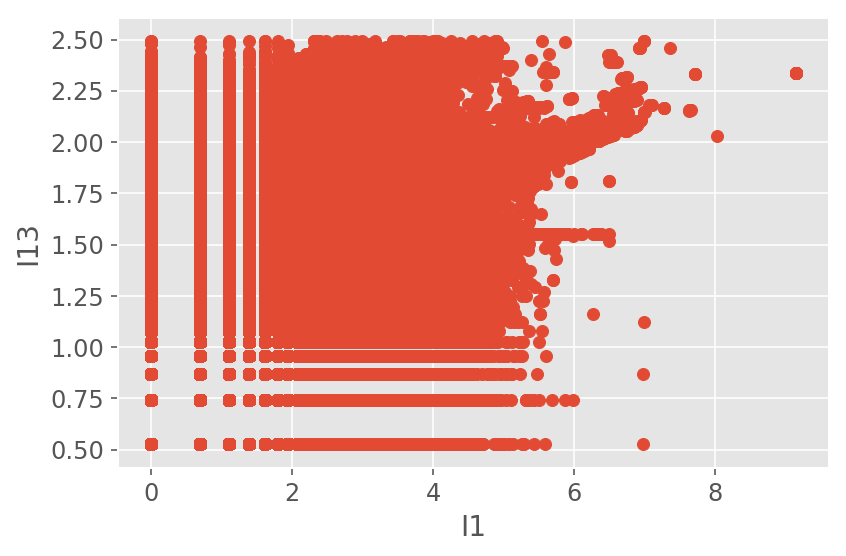

Saving figure label_Vs_scatter_plots-I13I2


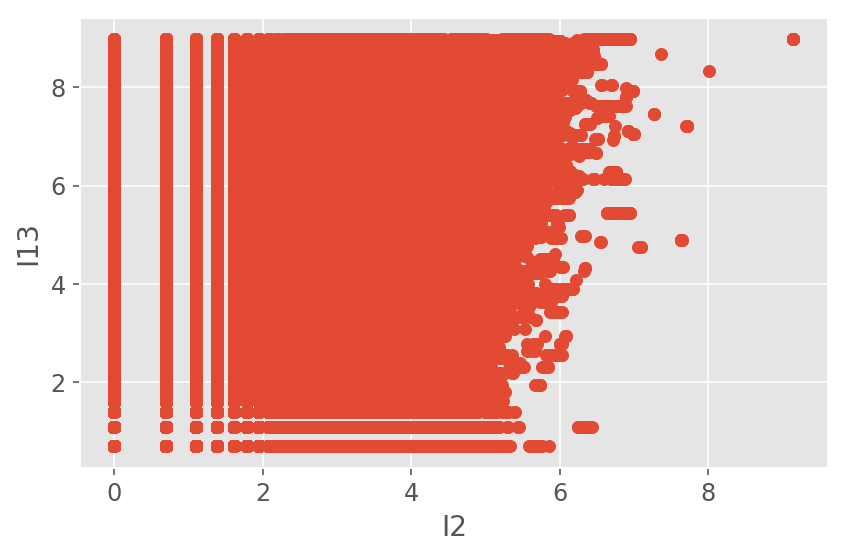

Saving figure label_Vs_scatter_plots-I13I3


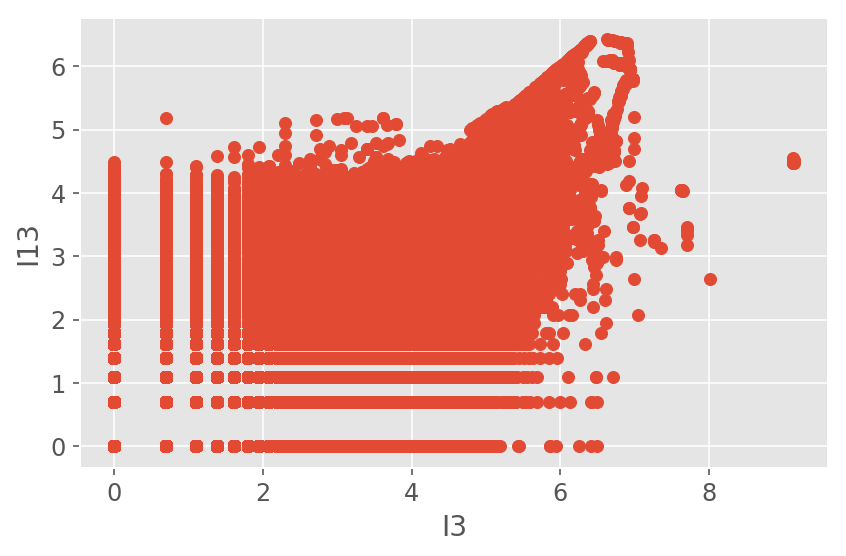

Saving figure label_Vs_scatter_plots-I13I4


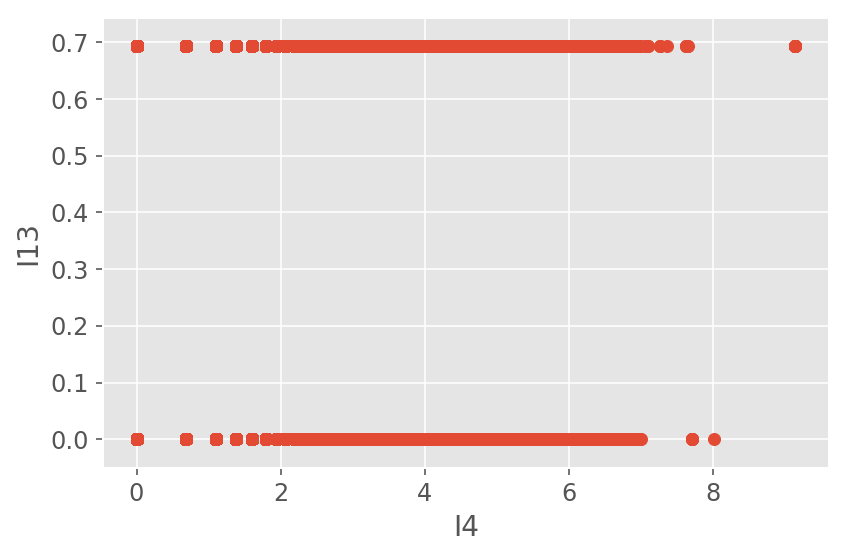

Saving figure label_Vs_scatter_plots-I13I5


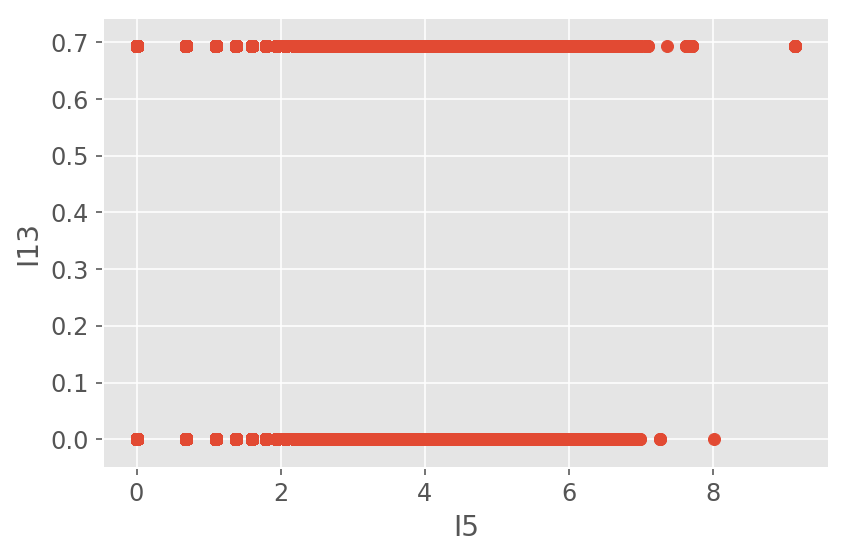

Saving figure label_Vs_scatter_plots-I13I6


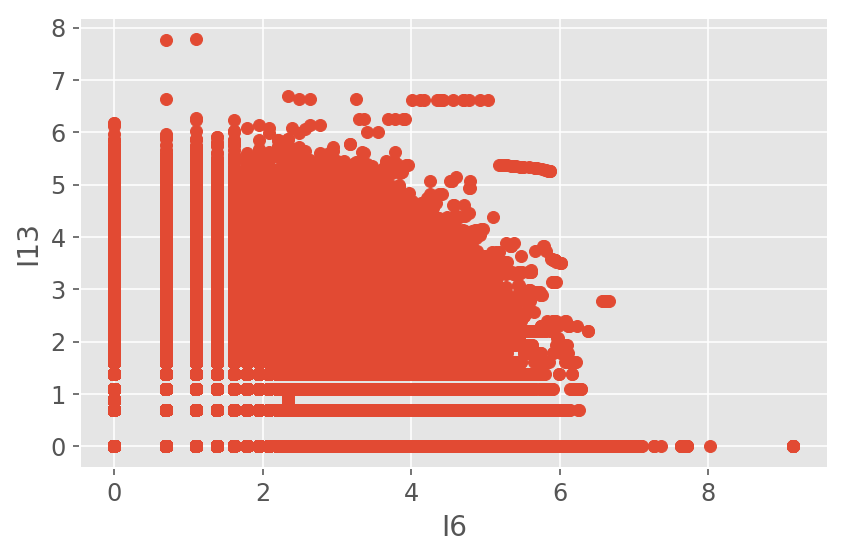

Saving figure label_Vs_scatter_plots-I13I7


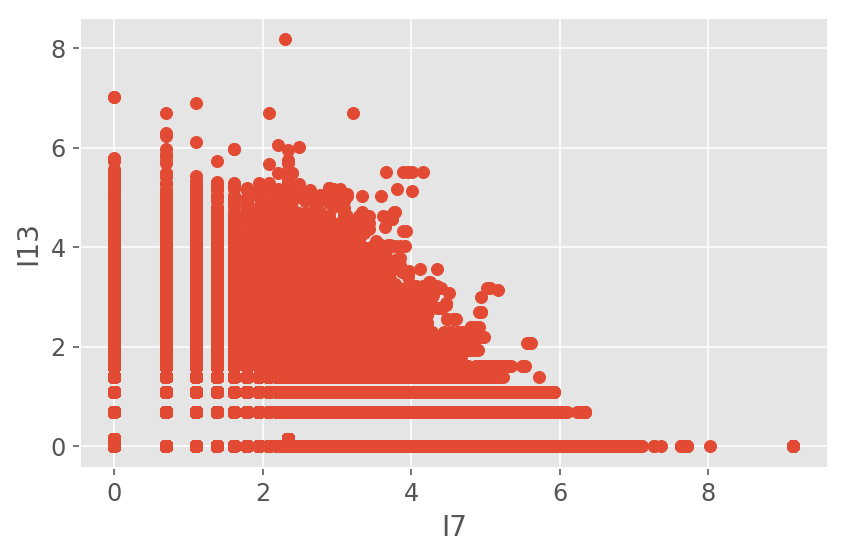

Saving figure label_Vs_scatter_plots-I13I8


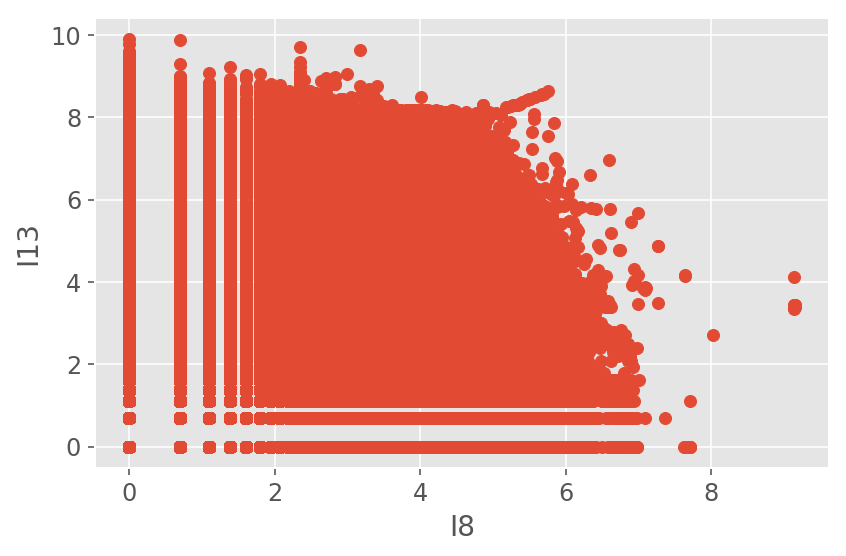

Saving figure label_Vs_scatter_plots-I13I10


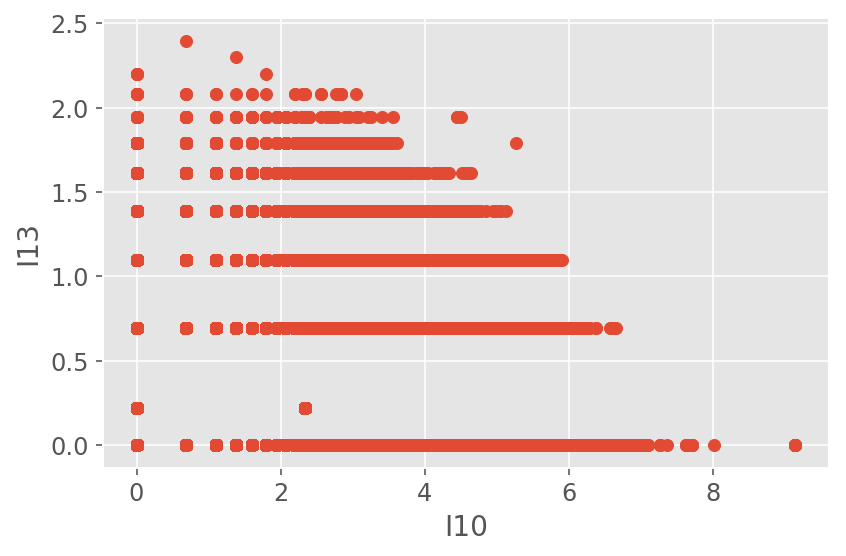

Saving figure label_Vs_scatter_plots-I13I11


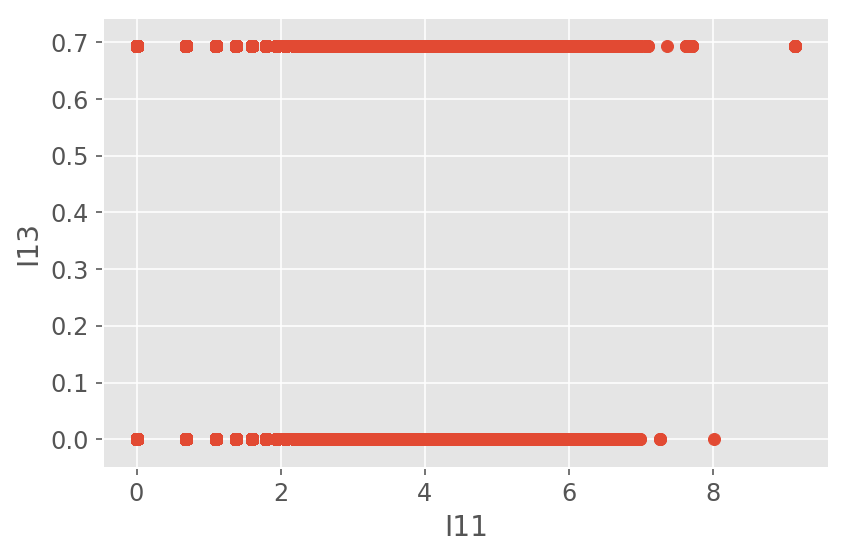

Saving figure label_Vs_scatter_plots-I13I12


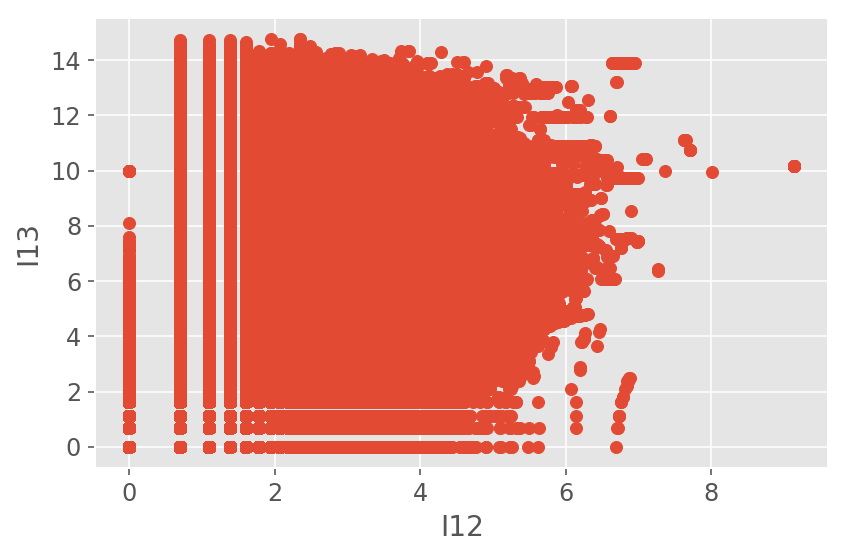

Saving figure label_Vs_scatter_plots-I13I13


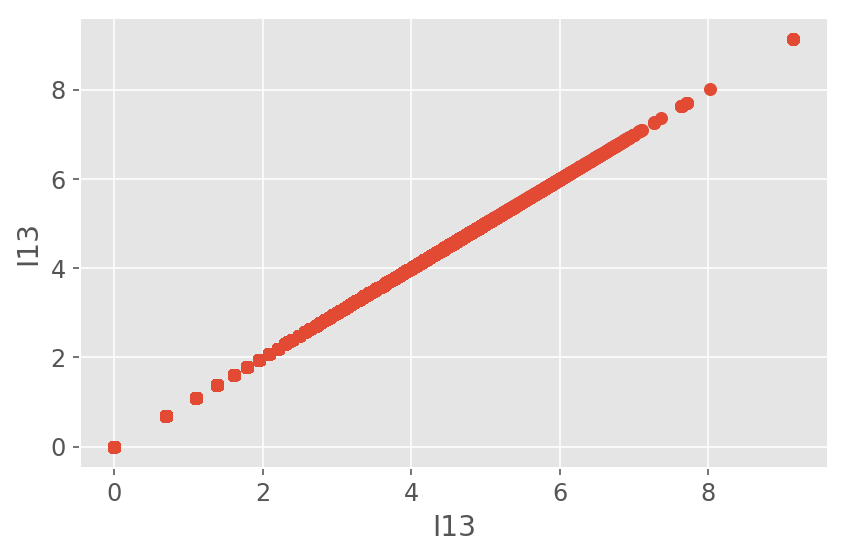

Saving figure label_Vs_scatter_plots-I13new_feat1


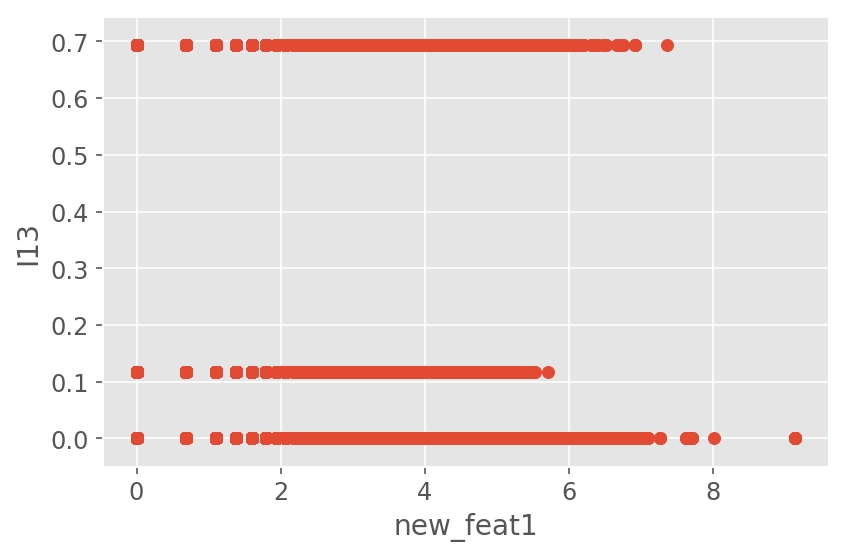

Saving figure label_Vs_scatter_plots-I13new_feat2


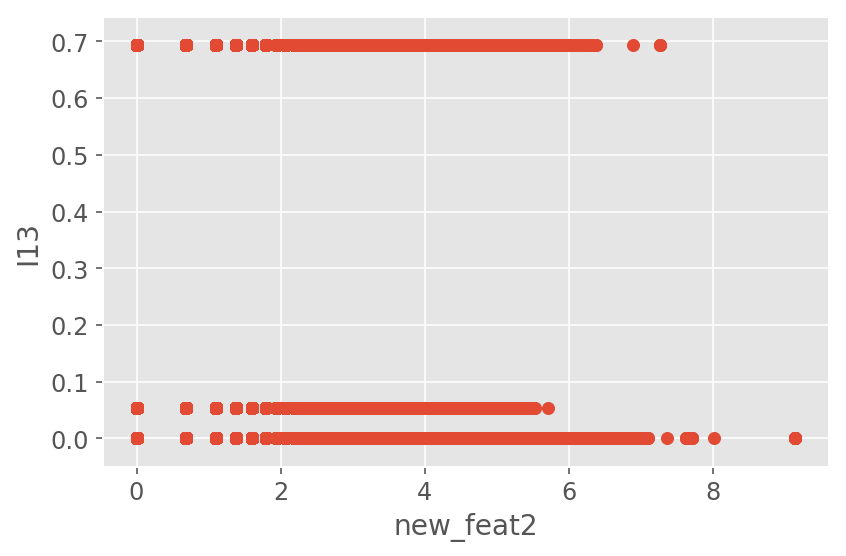

Saving figure label_Vs_scatter_plots-I13new_feat3


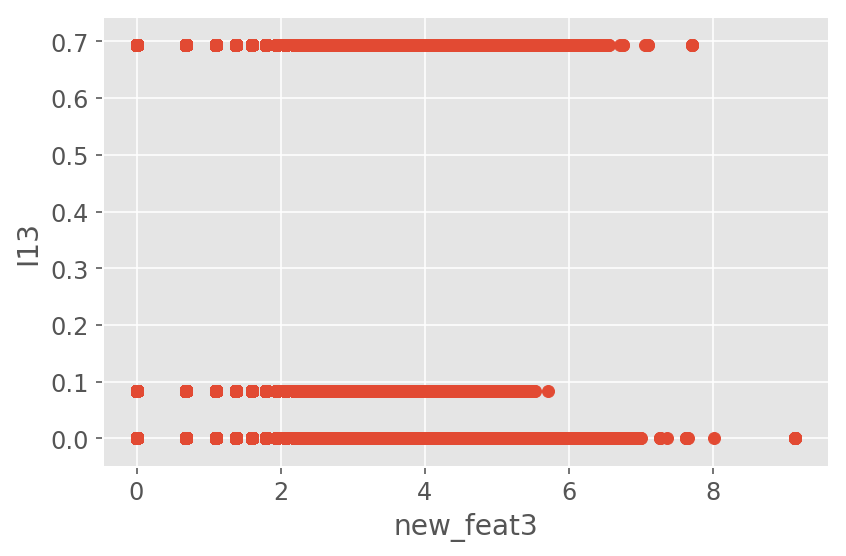

Saving figure label_Vs_scatter_plots-I13new_feat4


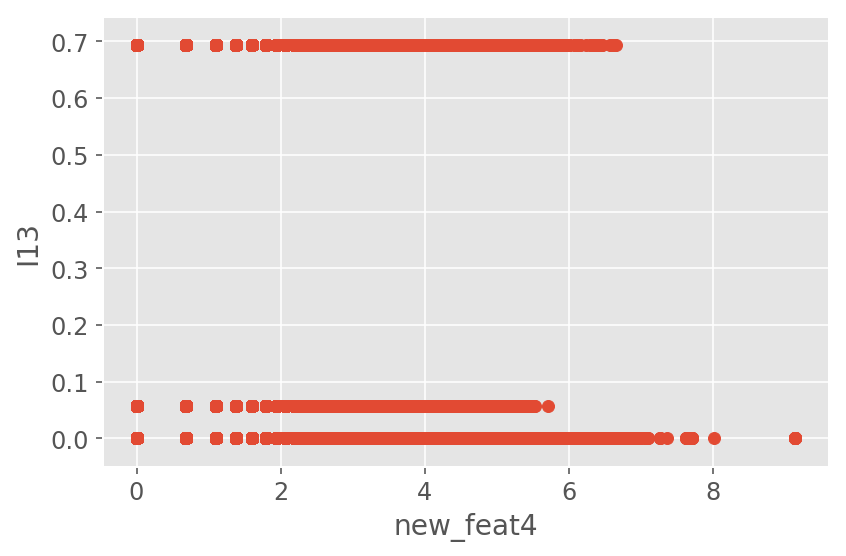

Saving figure label_Vs_scatter_plots-I13new_feat5


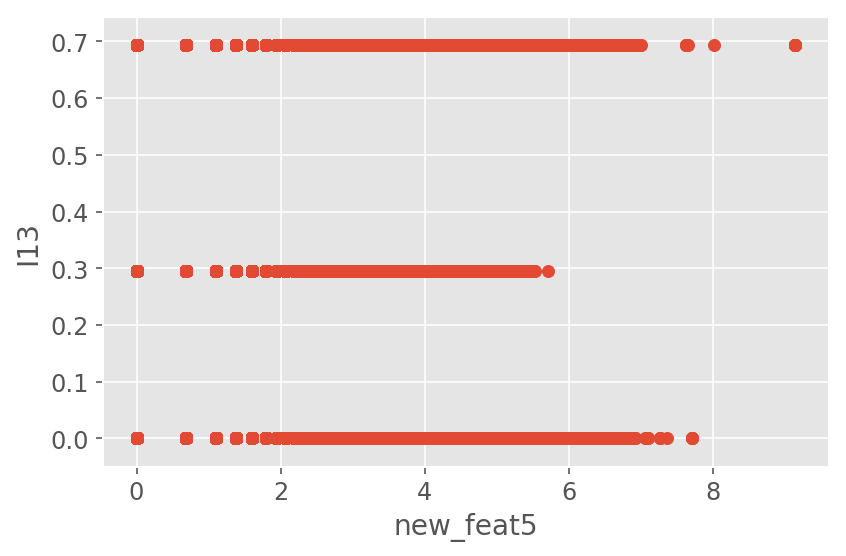

Saving figure label_Vs_scatter_plots-I13new_feat6


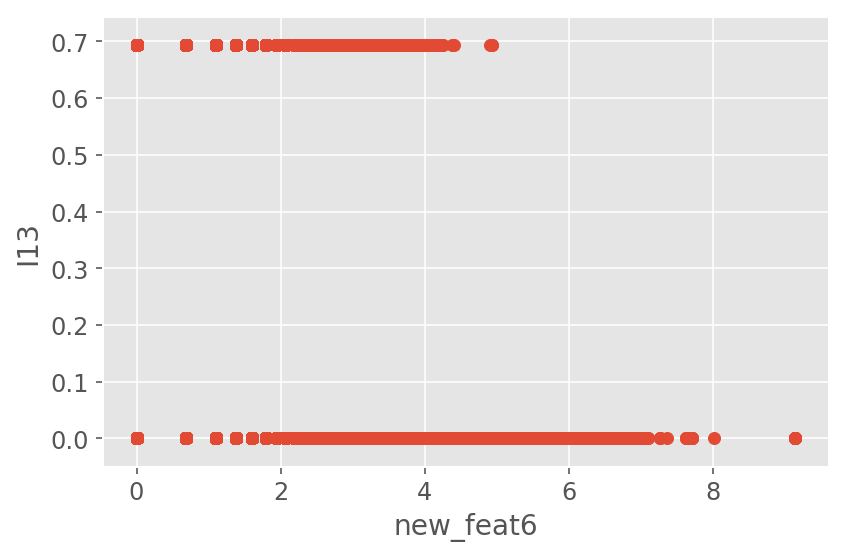

Saving figure label_Vs_scatter_plots-new_feat1I1


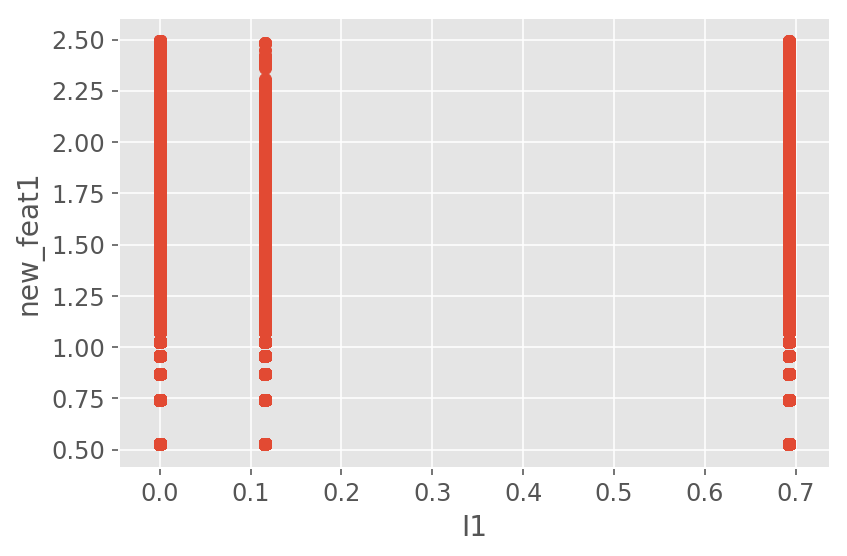

Saving figure label_Vs_scatter_plots-new_feat1I2


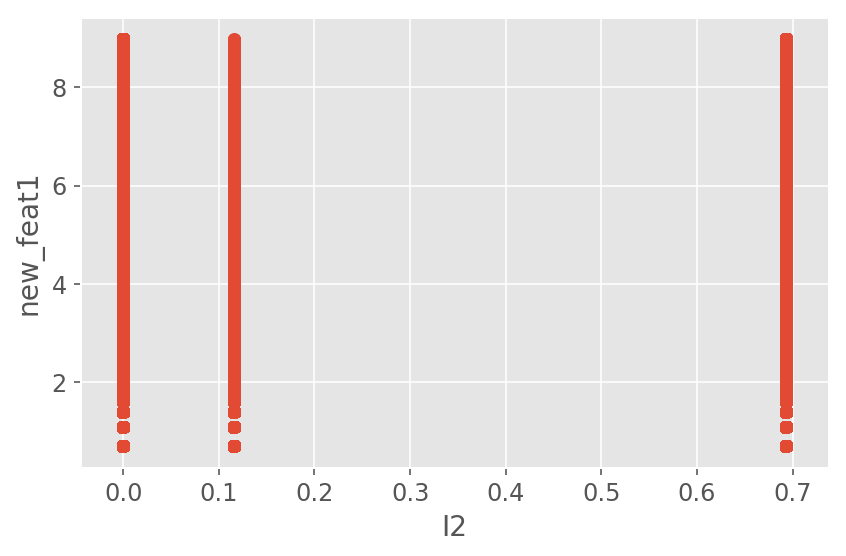

Saving figure label_Vs_scatter_plots-new_feat1I3


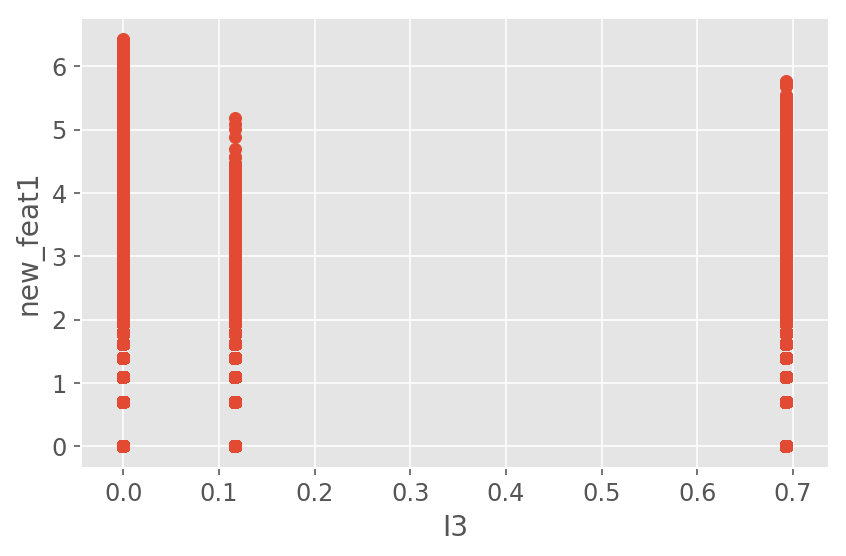

Saving figure label_Vs_scatter_plots-new_feat1I4


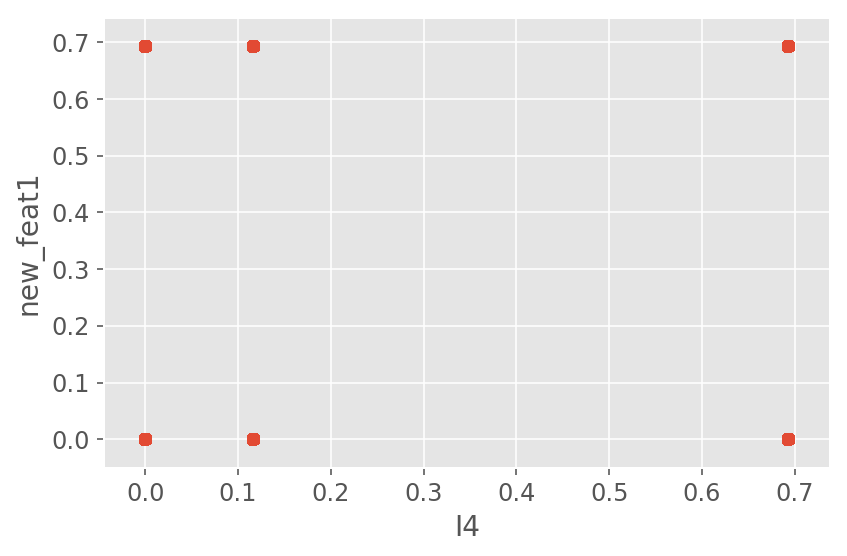

Saving figure label_Vs_scatter_plots-new_feat1I5


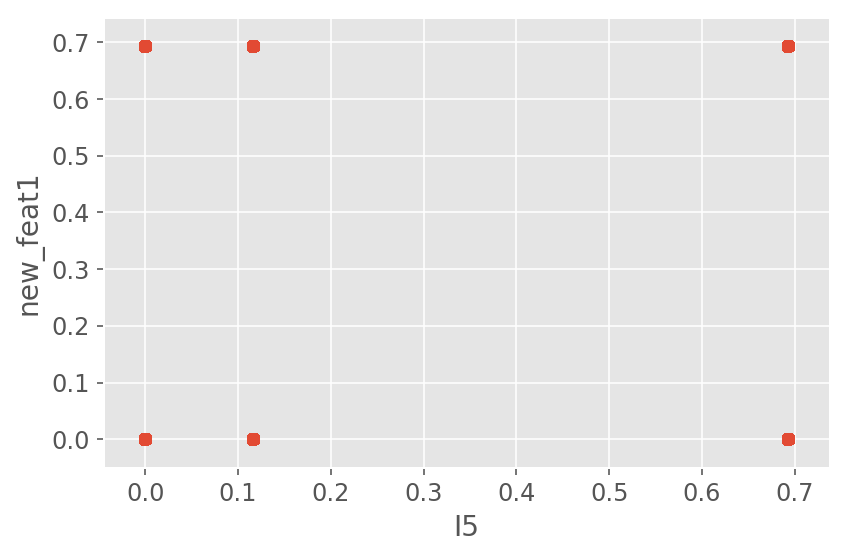

Saving figure label_Vs_scatter_plots-new_feat1I6


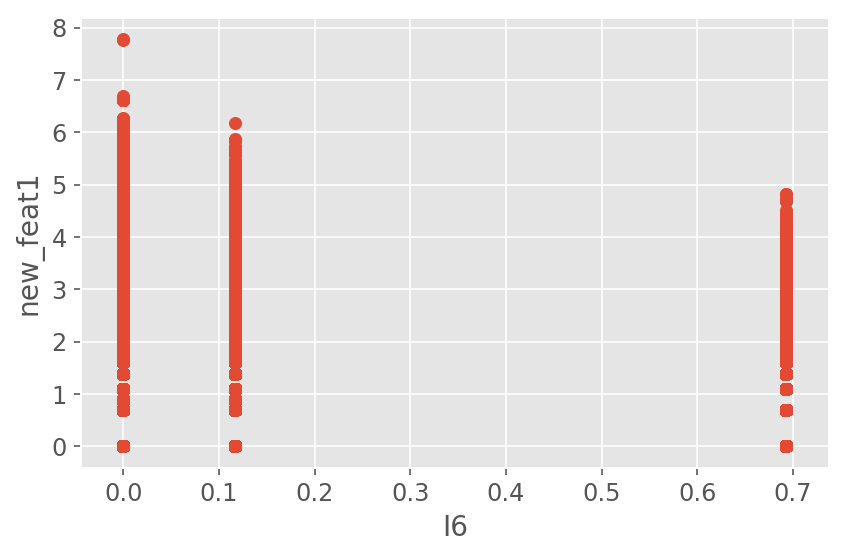

Saving figure label_Vs_scatter_plots-new_feat1I7


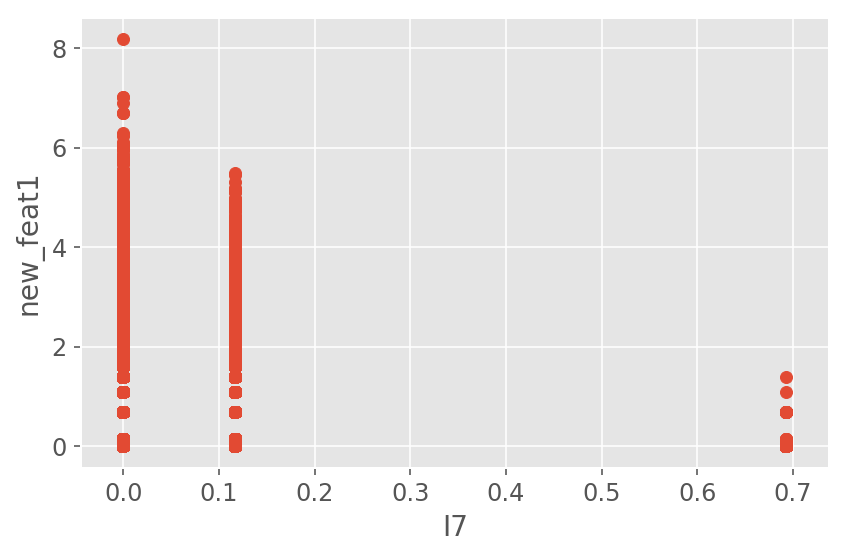

Saving figure label_Vs_scatter_plots-new_feat1I8


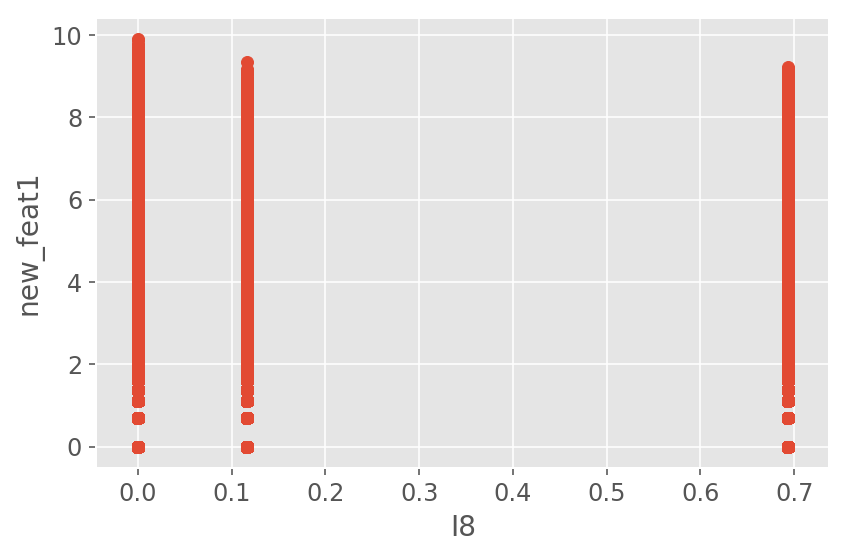

Saving figure label_Vs_scatter_plots-new_feat1I10


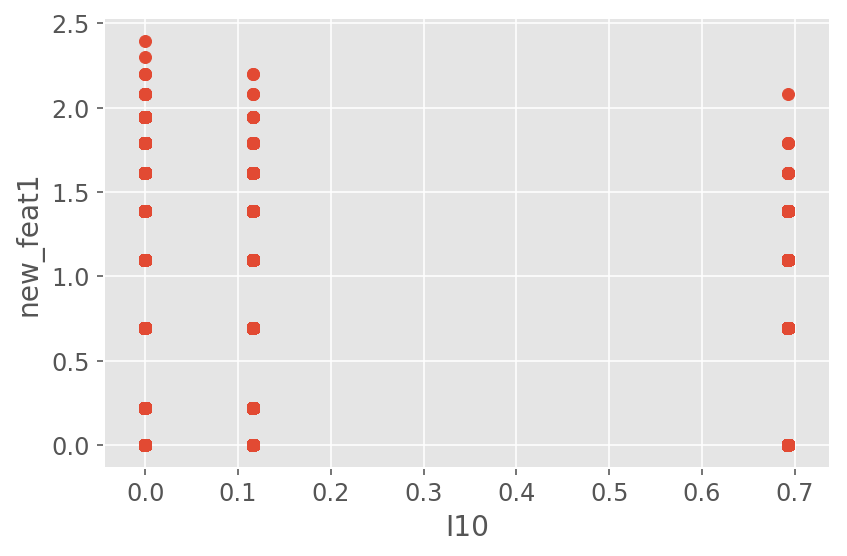

Saving figure label_Vs_scatter_plots-new_feat1I11


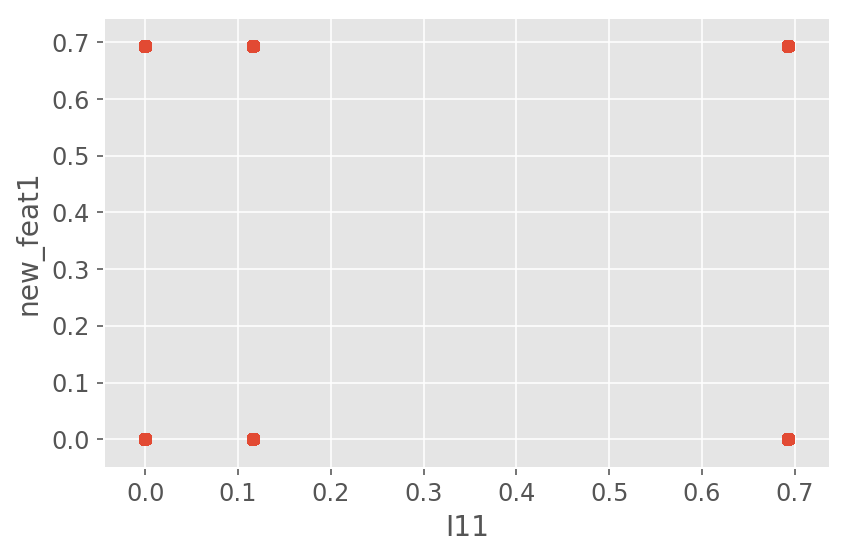

Saving figure label_Vs_scatter_plots-new_feat1I12


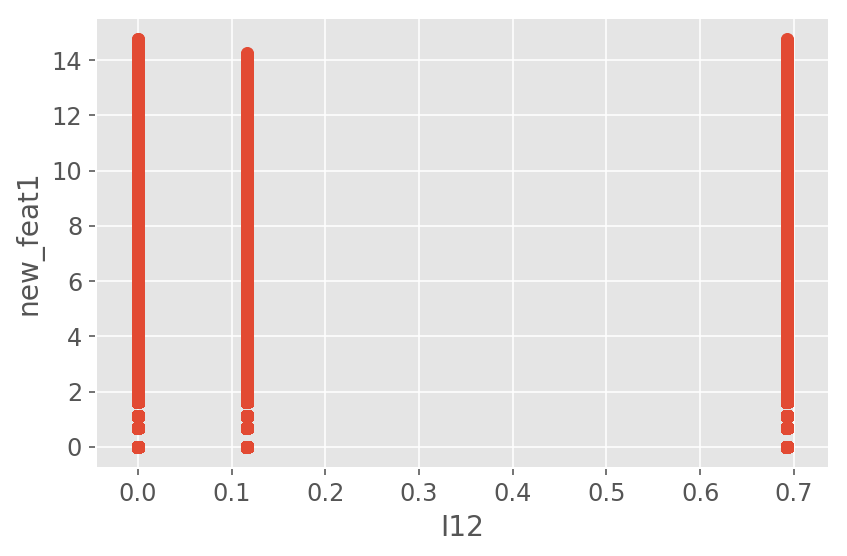

Saving figure label_Vs_scatter_plots-new_feat1I13


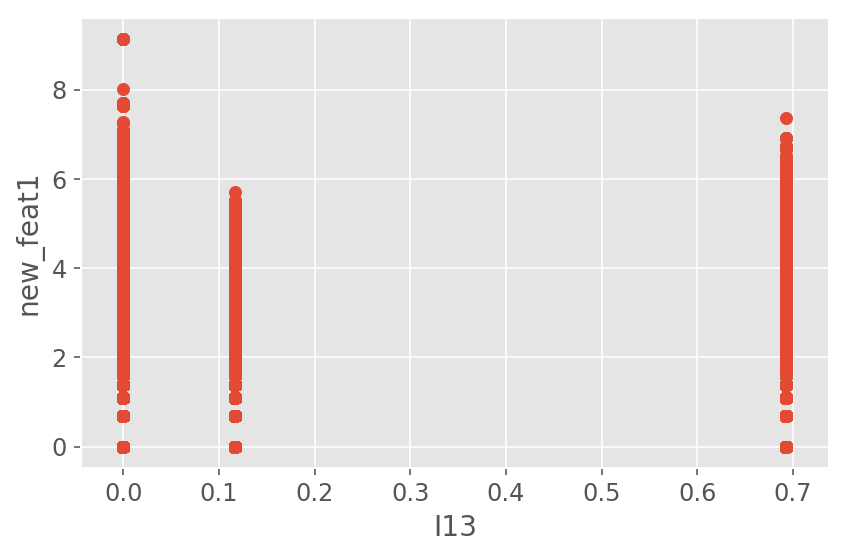

Saving figure label_Vs_scatter_plots-new_feat1new_feat1


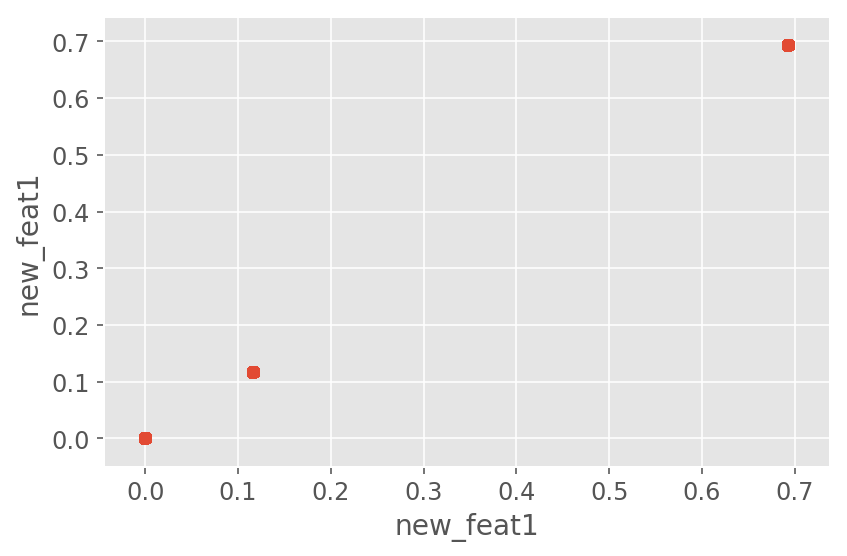

Saving figure label_Vs_scatter_plots-new_feat1new_feat2


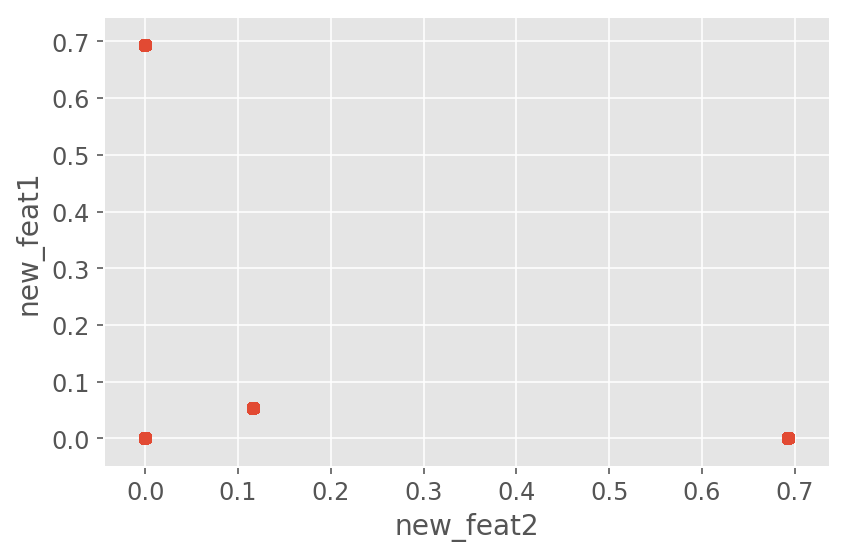

Saving figure label_Vs_scatter_plots-new_feat1new_feat3


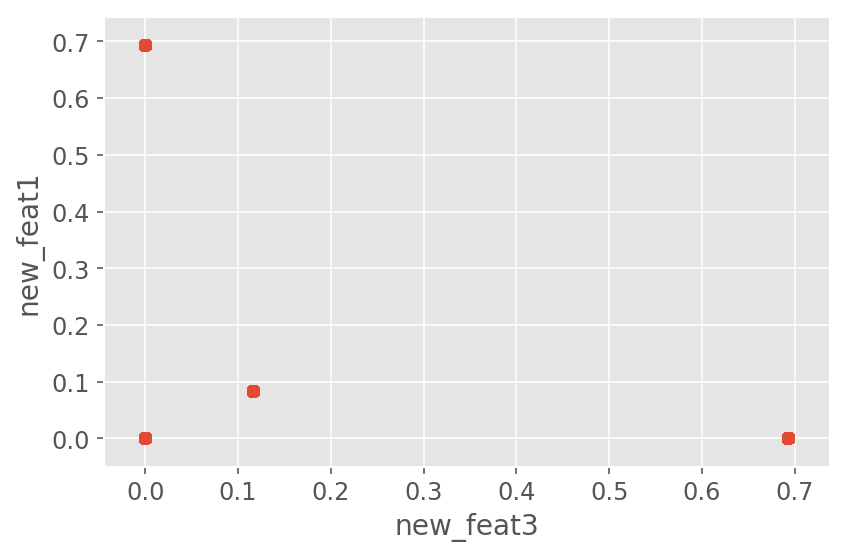

Saving figure label_Vs_scatter_plots-new_feat1new_feat4


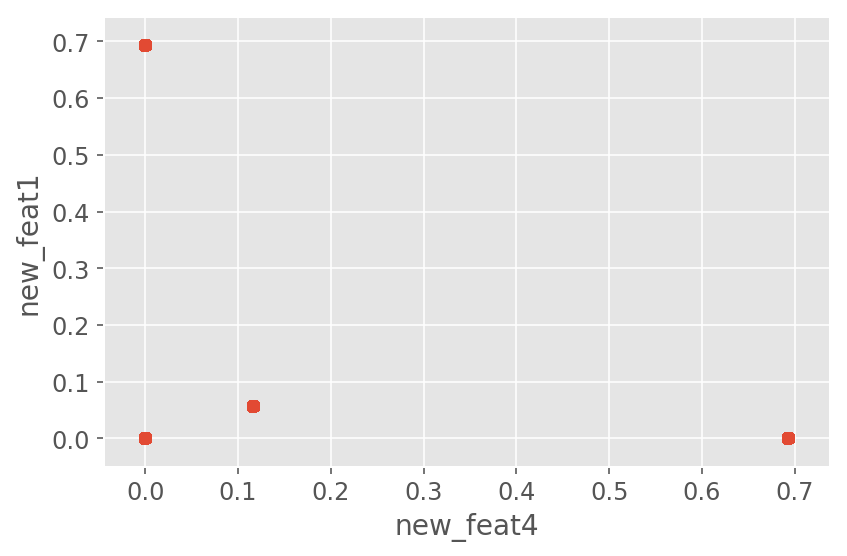

Saving figure label_Vs_scatter_plots-new_feat1new_feat5


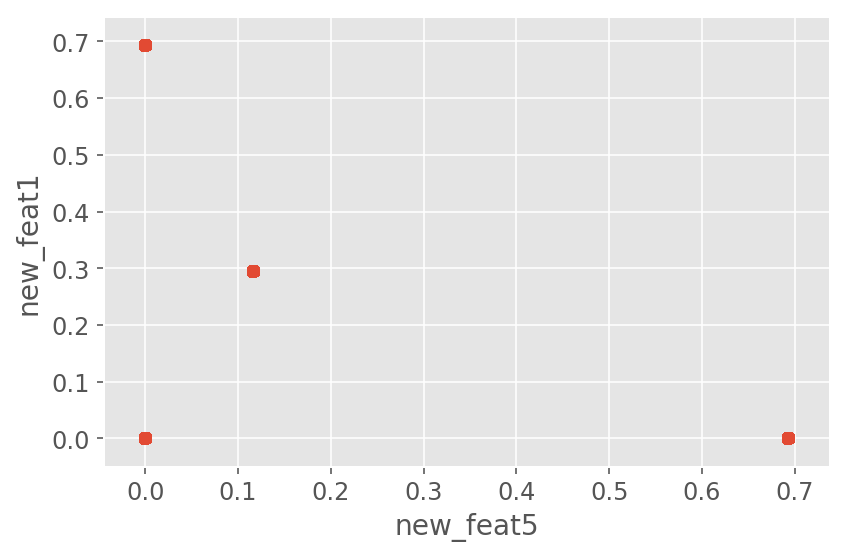

Saving figure label_Vs_scatter_plots-new_feat1new_feat6


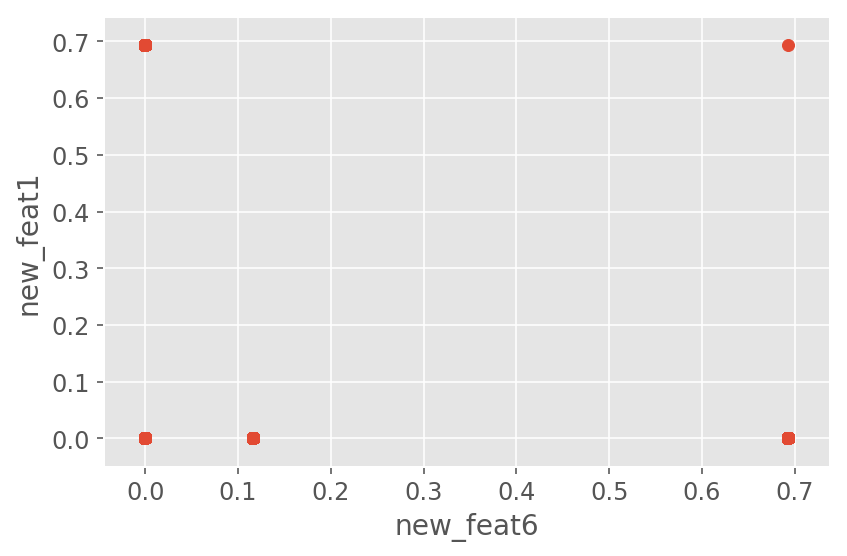

Saving figure label_Vs_scatter_plots-new_feat2I1


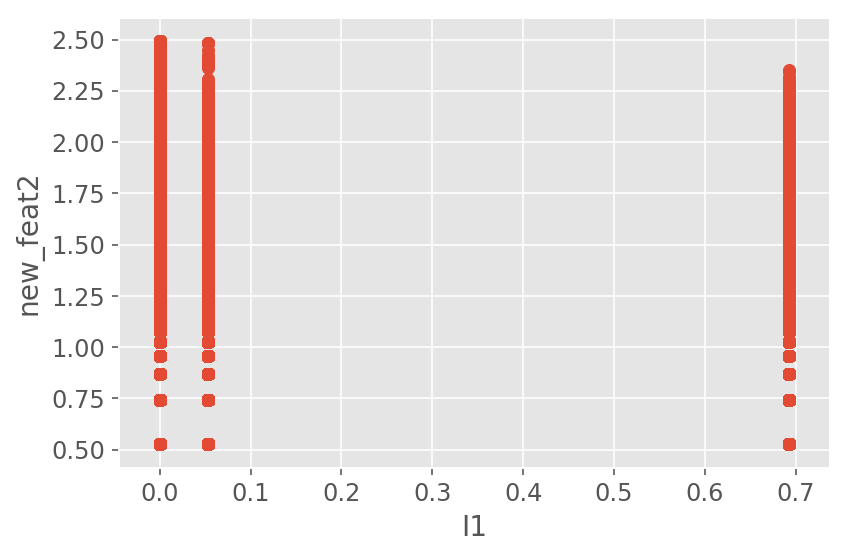

Saving figure label_Vs_scatter_plots-new_feat2I2


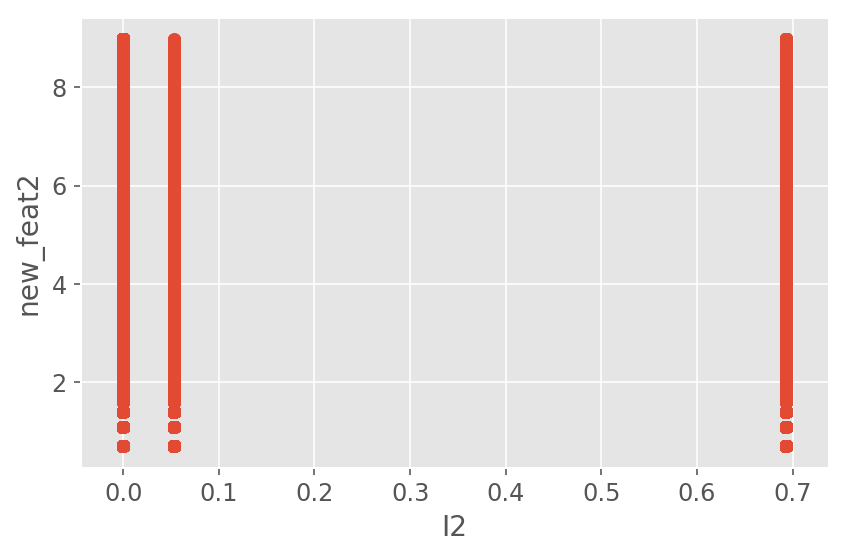

Saving figure label_Vs_scatter_plots-new_feat2I3


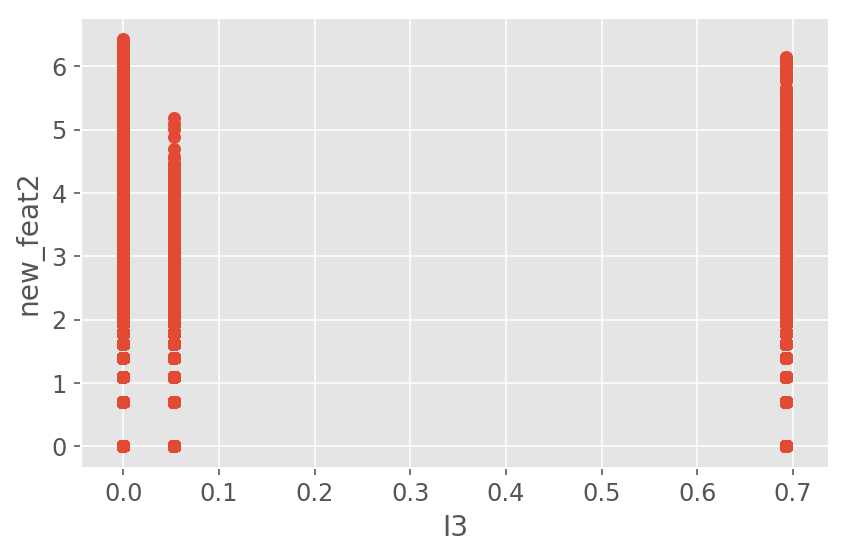

Saving figure label_Vs_scatter_plots-new_feat2I4


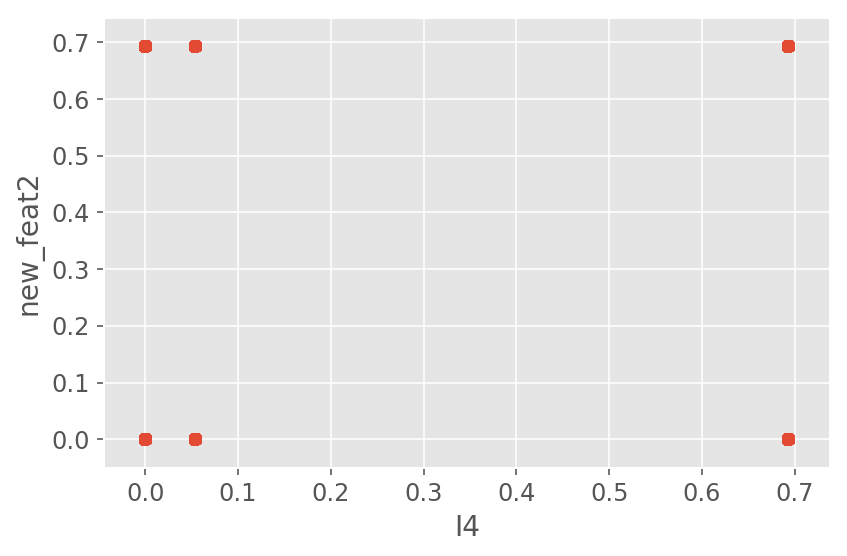

Saving figure label_Vs_scatter_plots-new_feat2I5


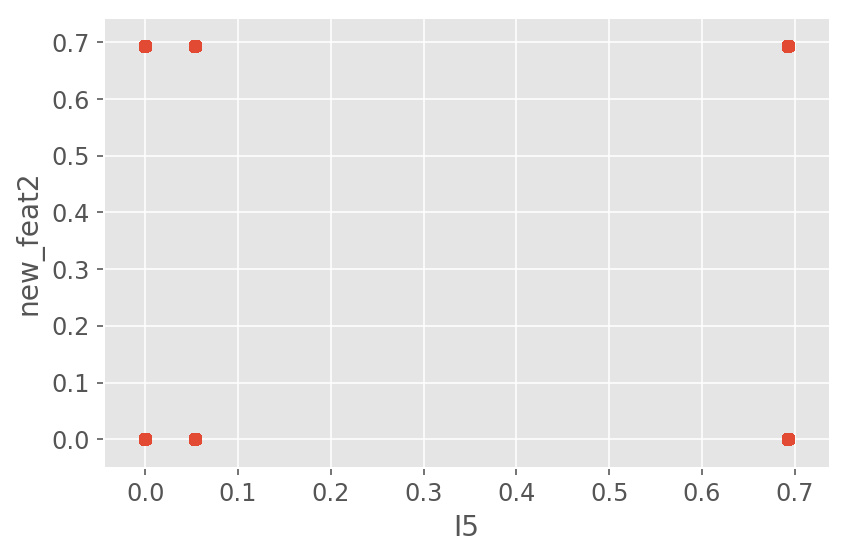

Saving figure label_Vs_scatter_plots-new_feat2I6


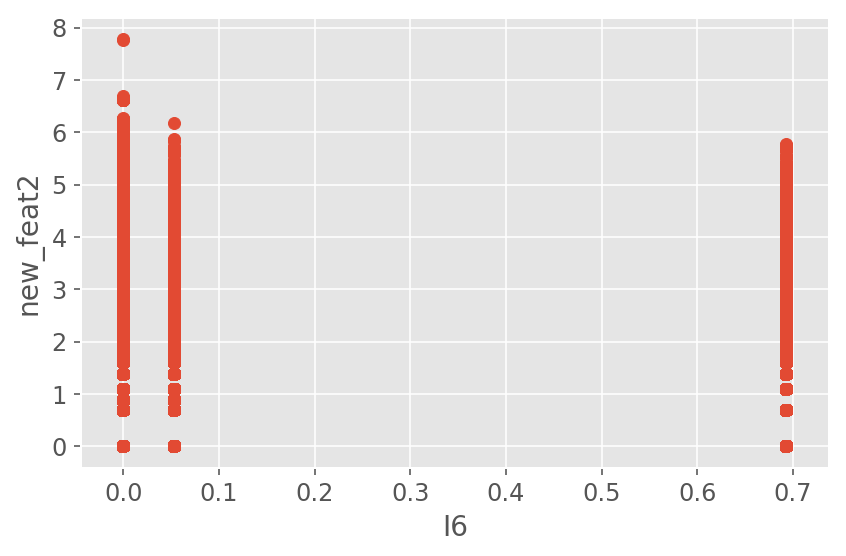

Saving figure label_Vs_scatter_plots-new_feat2I7


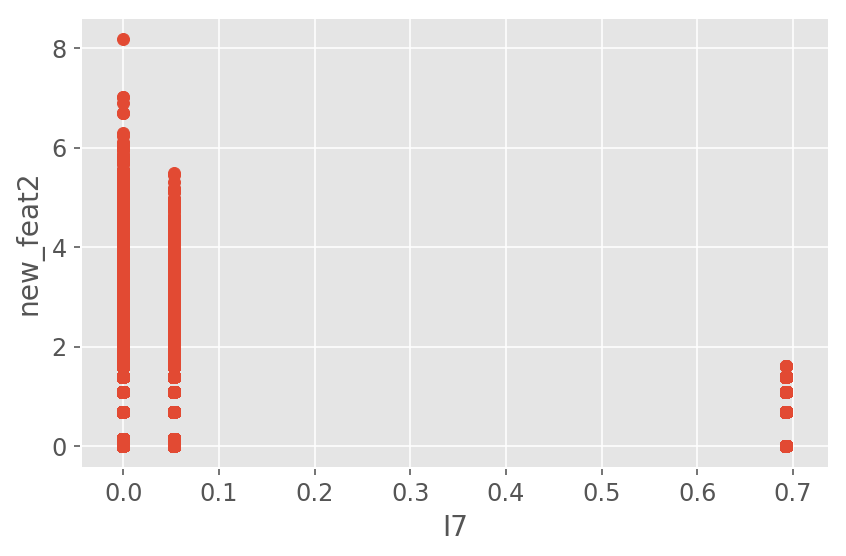

Saving figure label_Vs_scatter_plots-new_feat2I8


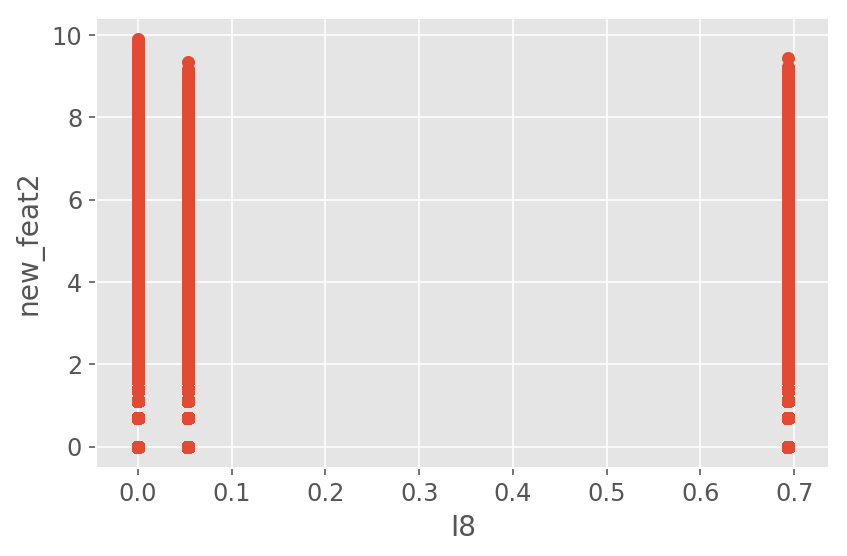

Saving figure label_Vs_scatter_plots-new_feat2I10


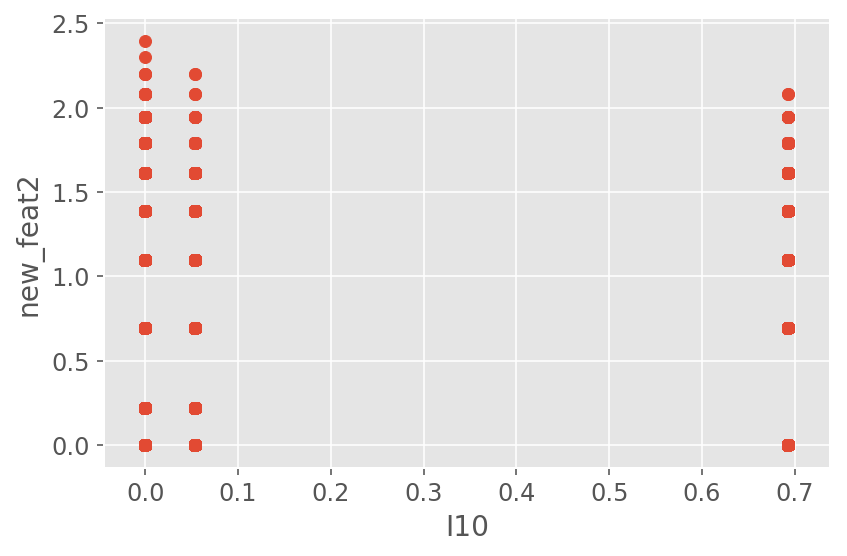

Saving figure label_Vs_scatter_plots-new_feat2I11


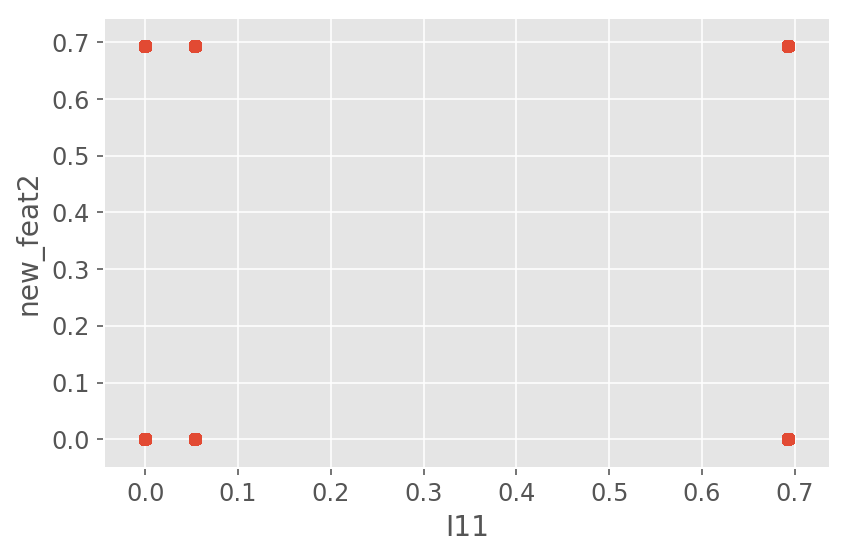

Saving figure label_Vs_scatter_plots-new_feat2I12


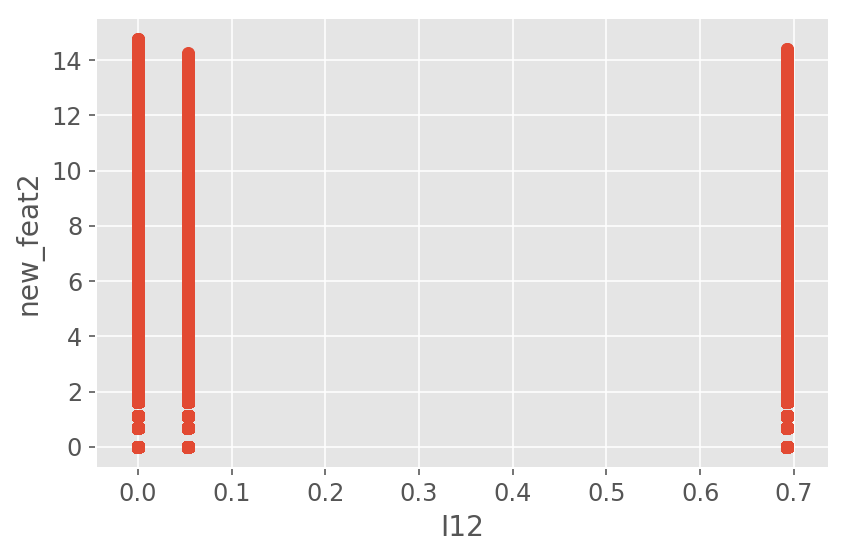

Saving figure label_Vs_scatter_plots-new_feat2I13


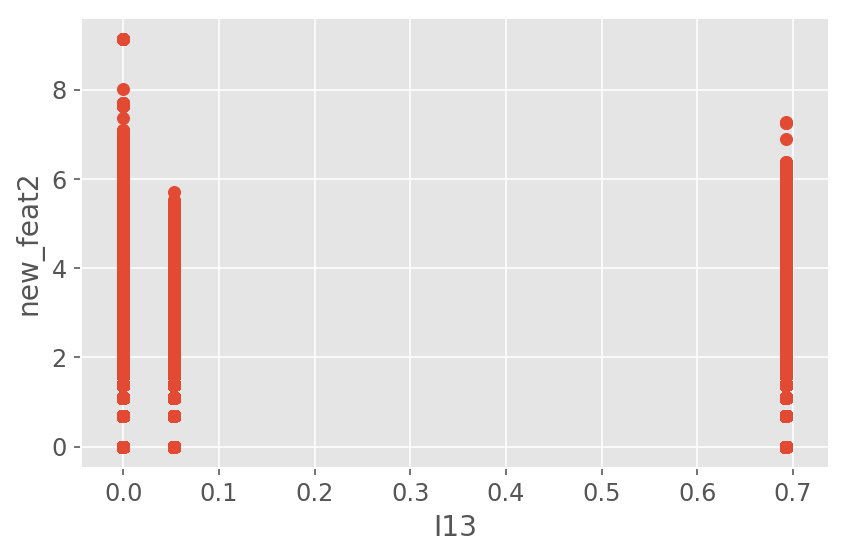

Saving figure label_Vs_scatter_plots-new_feat2new_feat1


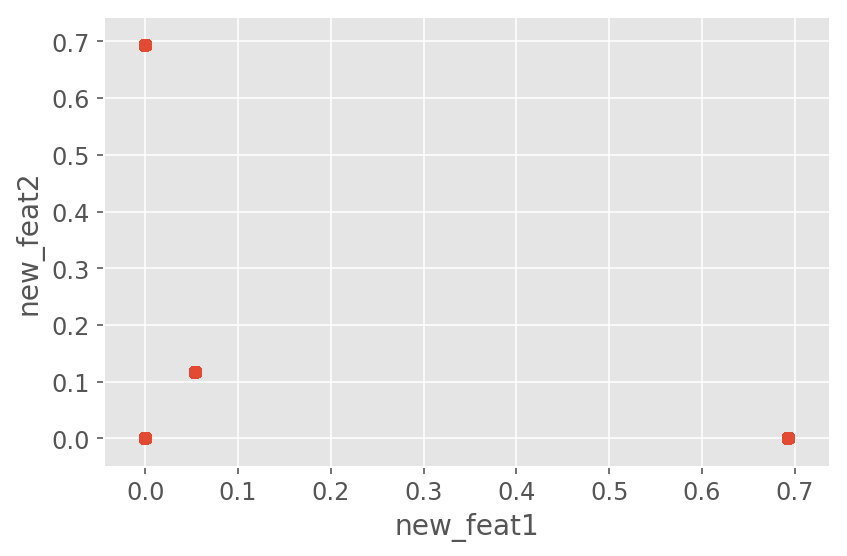

Saving figure label_Vs_scatter_plots-new_feat2new_feat2


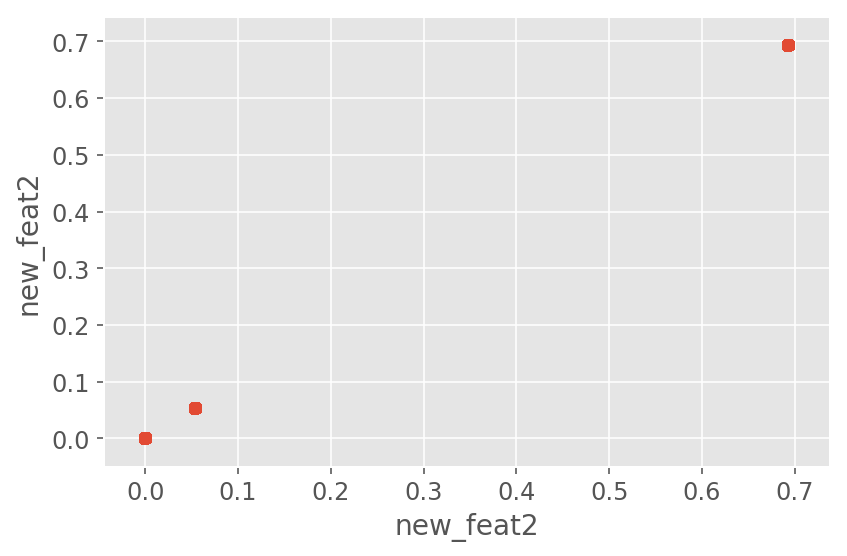

Saving figure label_Vs_scatter_plots-new_feat2new_feat3


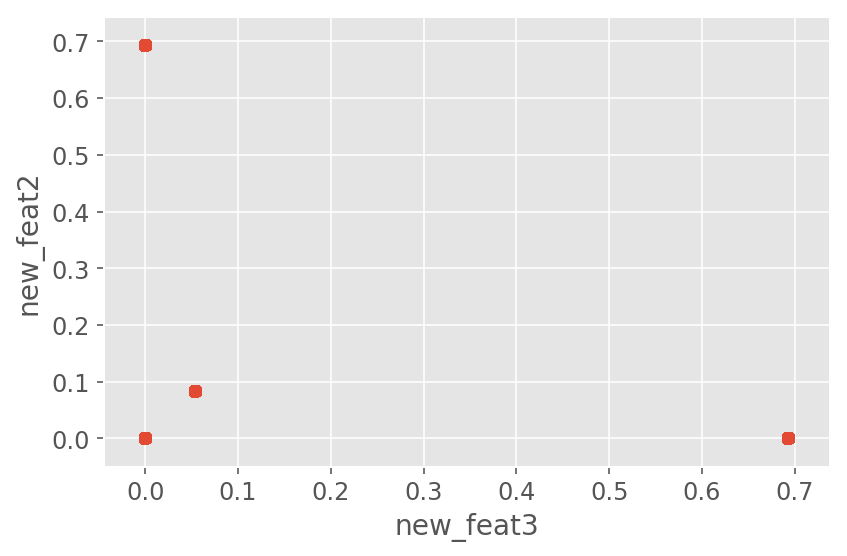

Saving figure label_Vs_scatter_plots-new_feat2new_feat4


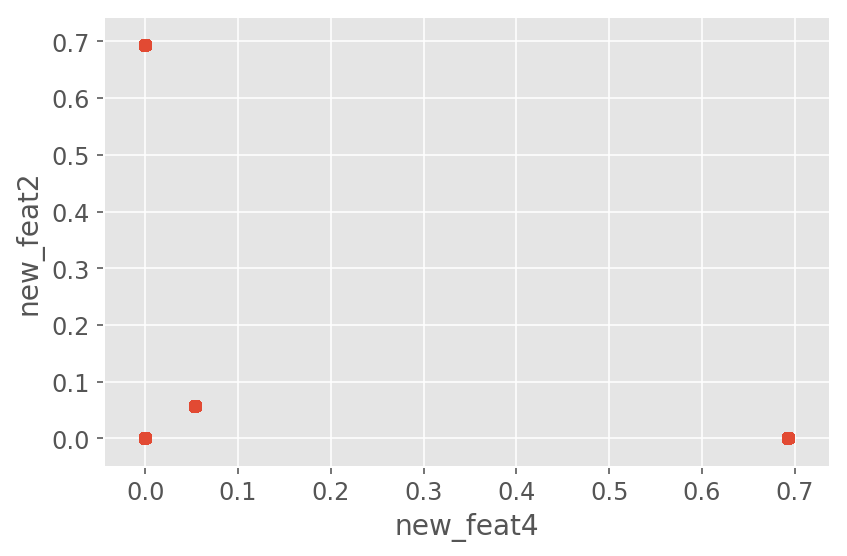

Saving figure label_Vs_scatter_plots-new_feat2new_feat5


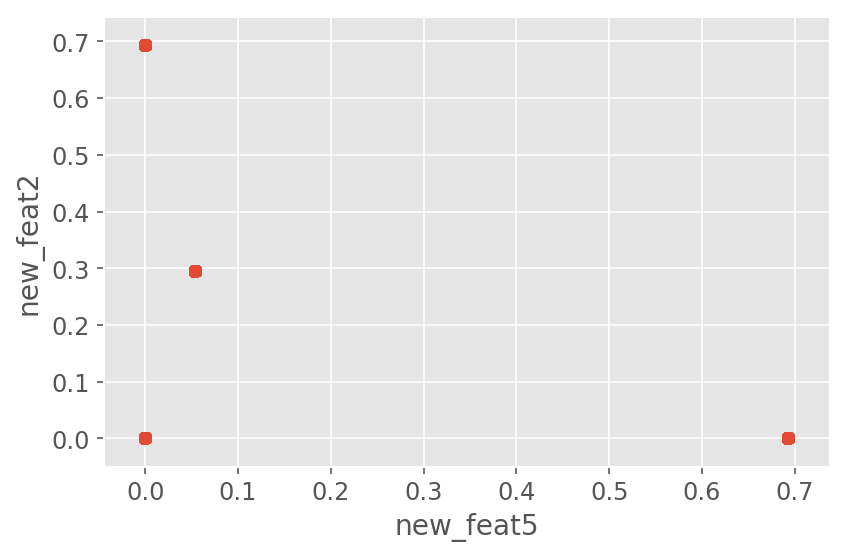

Saving figure label_Vs_scatter_plots-new_feat2new_feat6


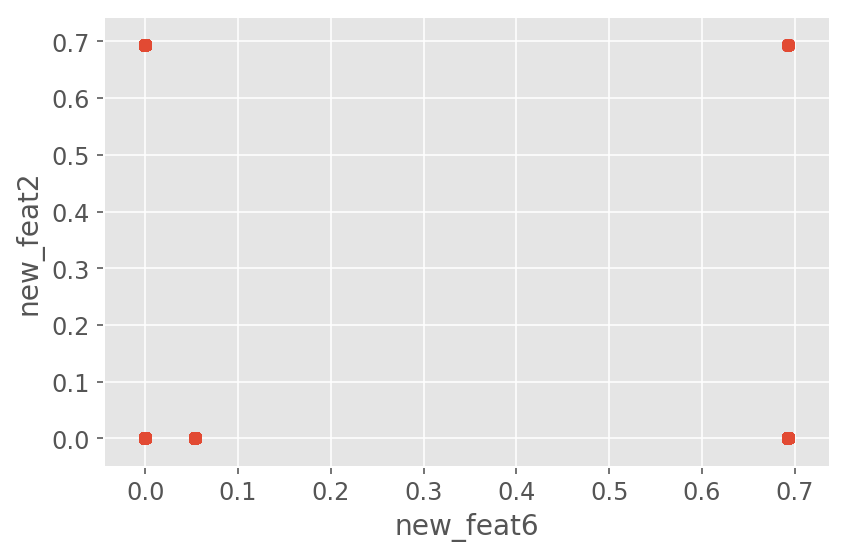

Saving figure label_Vs_scatter_plots-new_feat3I1


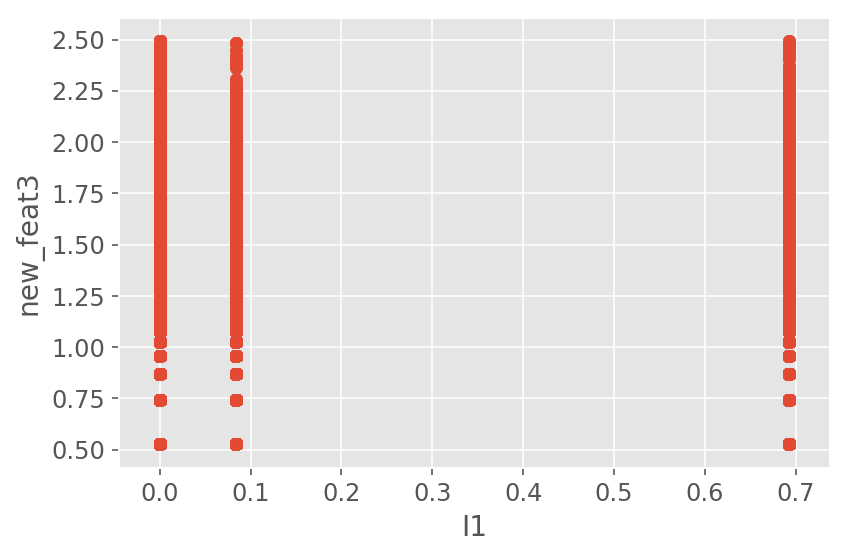

Saving figure label_Vs_scatter_plots-new_feat3I2


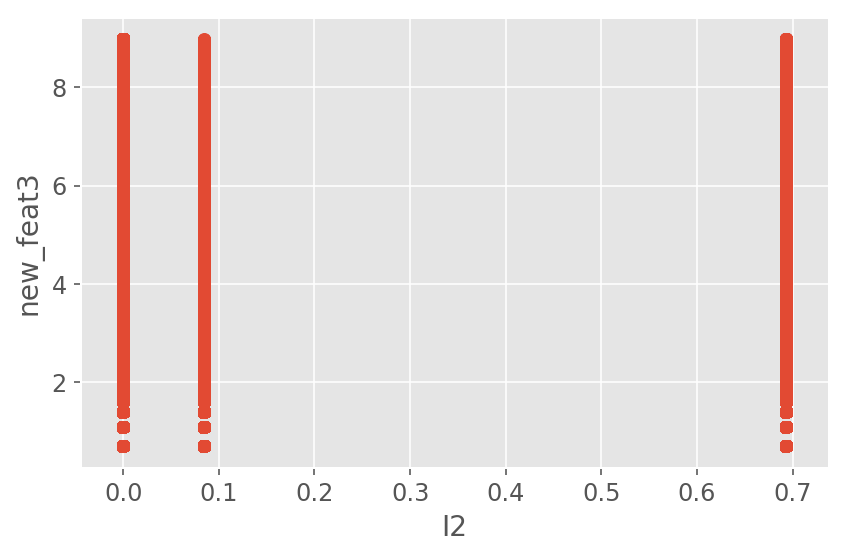

Saving figure label_Vs_scatter_plots-new_feat3I3


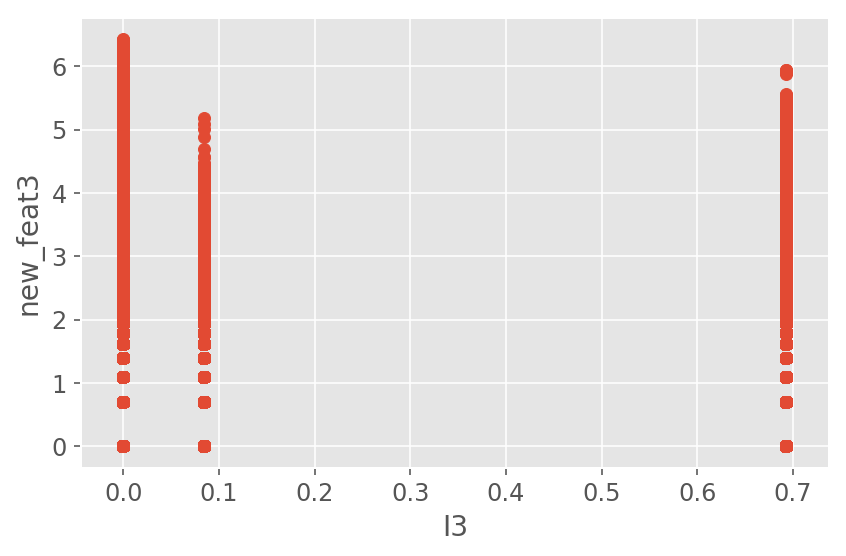

Saving figure label_Vs_scatter_plots-new_feat3I4


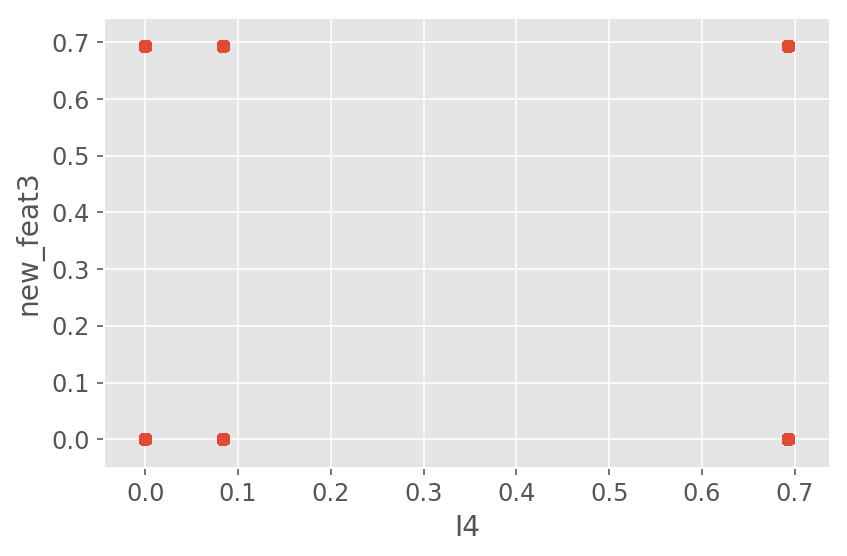

Saving figure label_Vs_scatter_plots-new_feat3I5


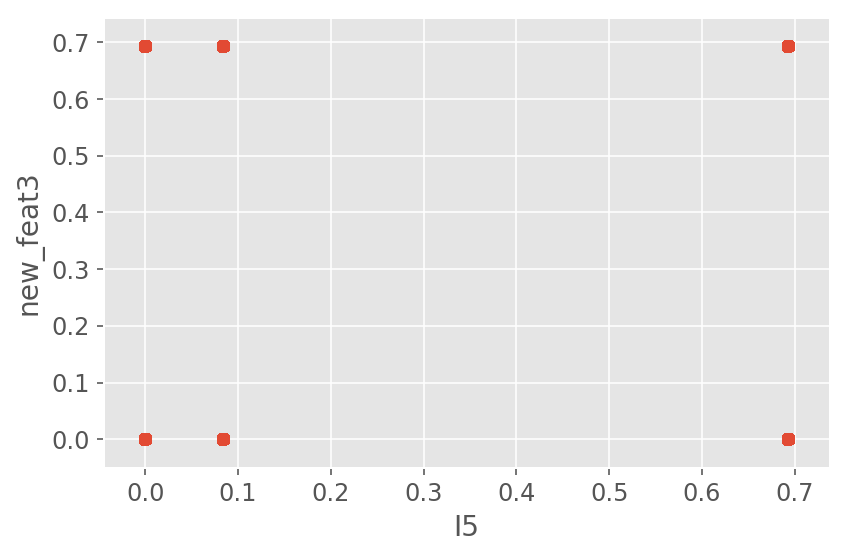

Saving figure label_Vs_scatter_plots-new_feat3I6


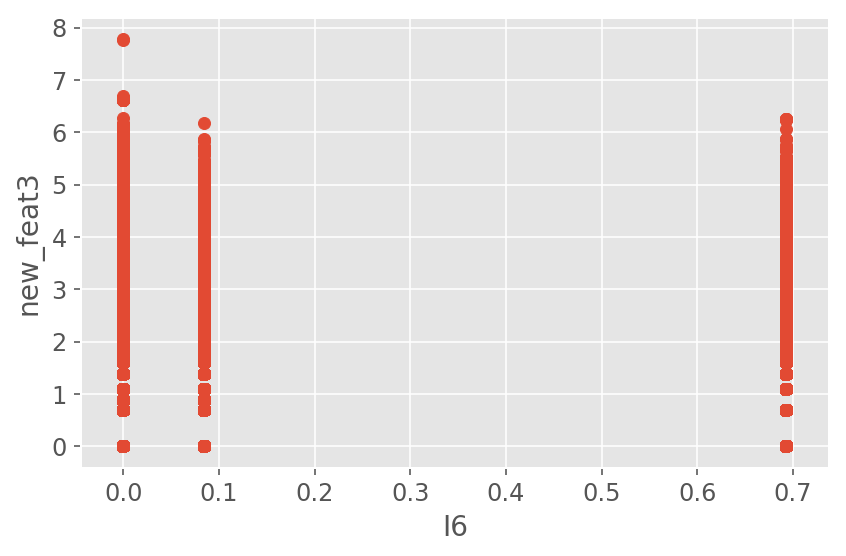

Saving figure label_Vs_scatter_plots-new_feat3I7


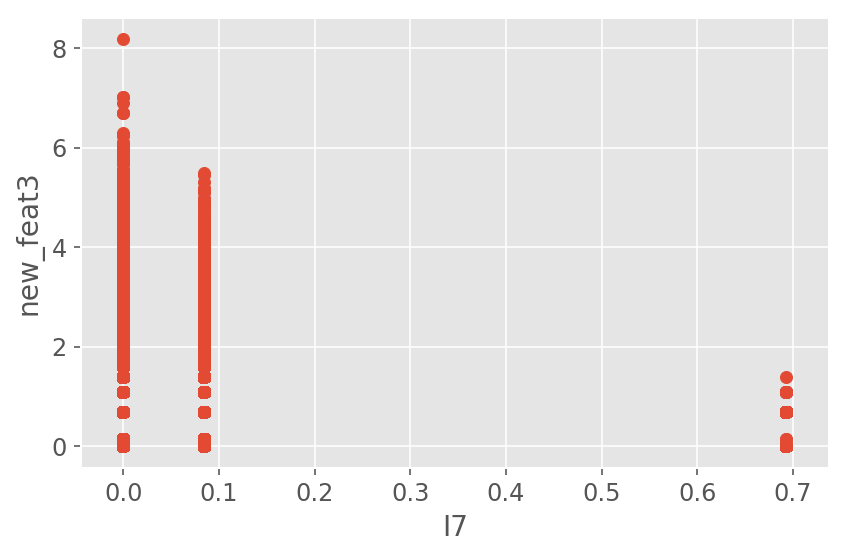

Saving figure label_Vs_scatter_plots-new_feat3I8


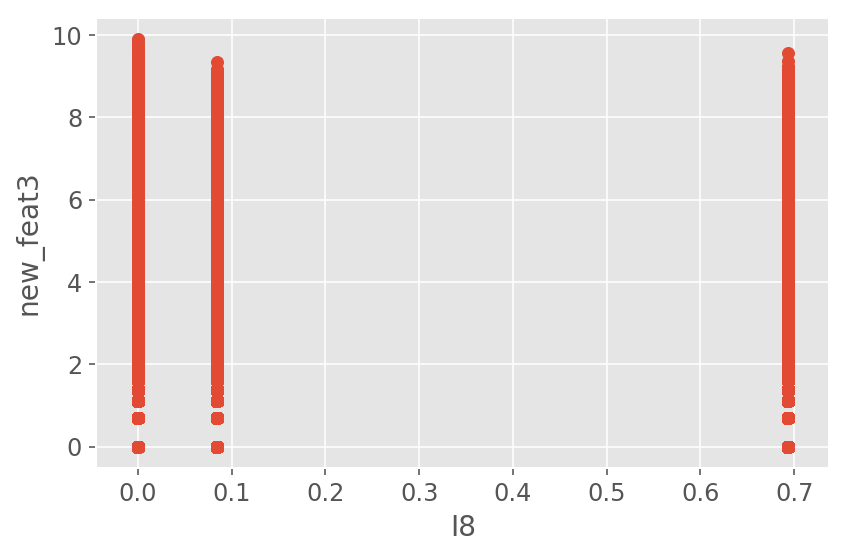

Saving figure label_Vs_scatter_plots-new_feat3I10


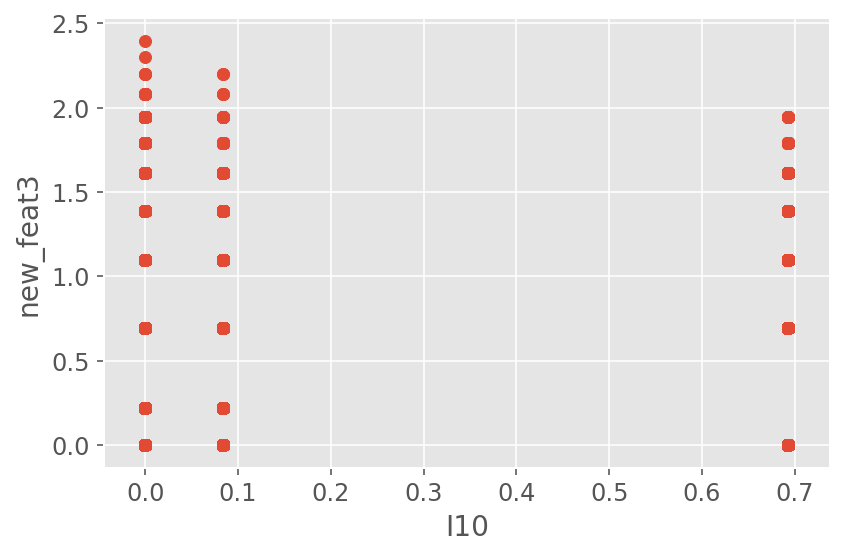

Saving figure label_Vs_scatter_plots-new_feat3I11


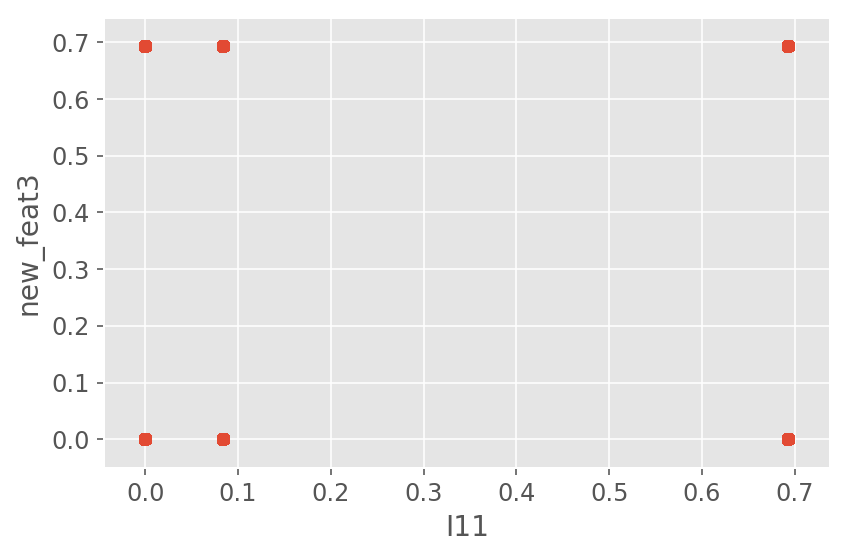

Saving figure label_Vs_scatter_plots-new_feat3I12


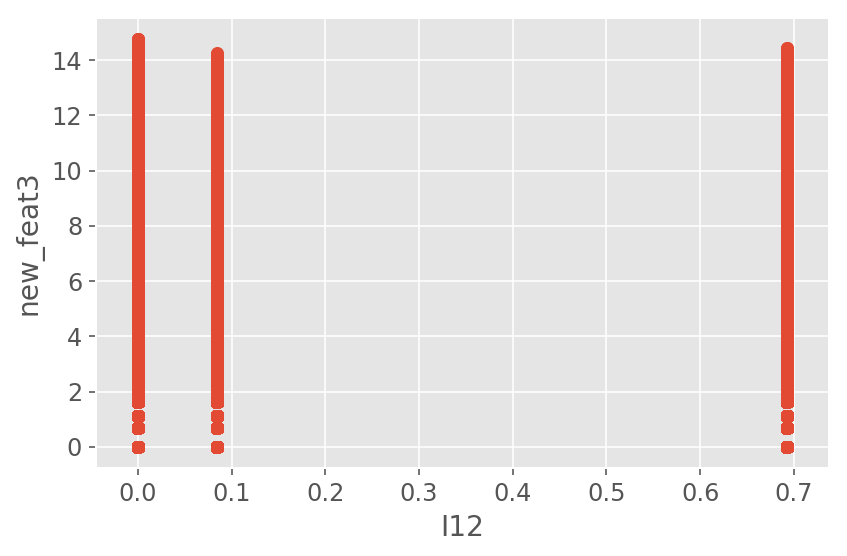

Saving figure label_Vs_scatter_plots-new_feat3I13


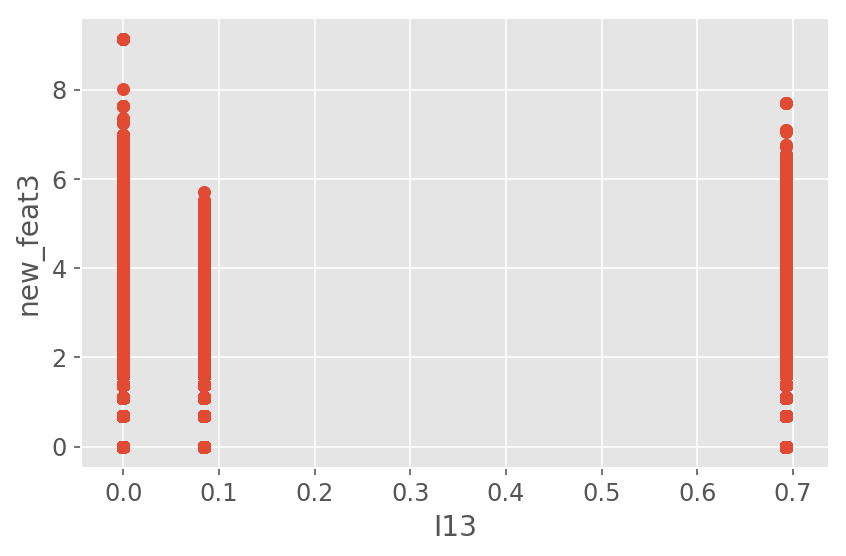

Saving figure label_Vs_scatter_plots-new_feat3new_feat1


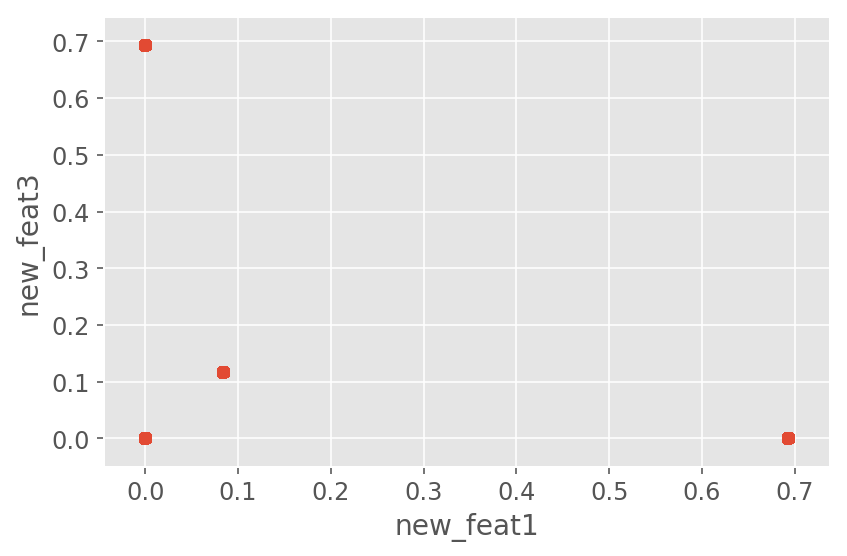

Saving figure label_Vs_scatter_plots-new_feat3new_feat2


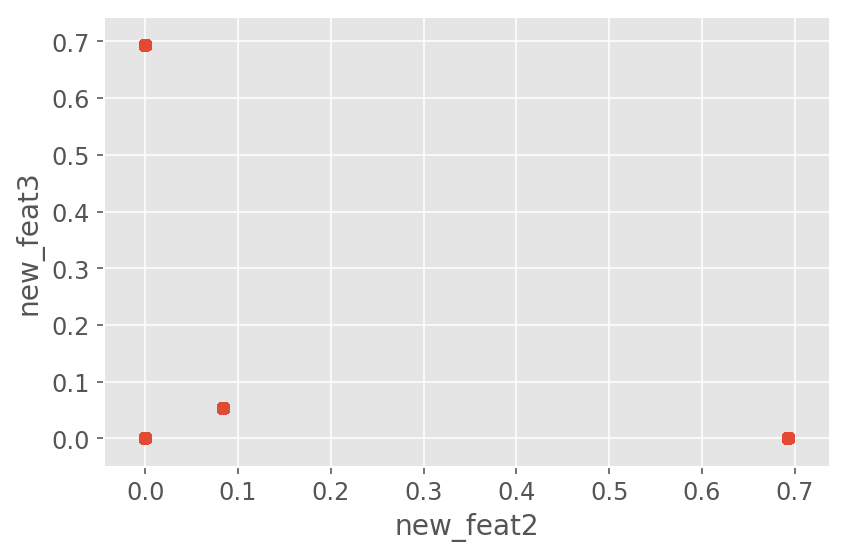

Saving figure label_Vs_scatter_plots-new_feat3new_feat3


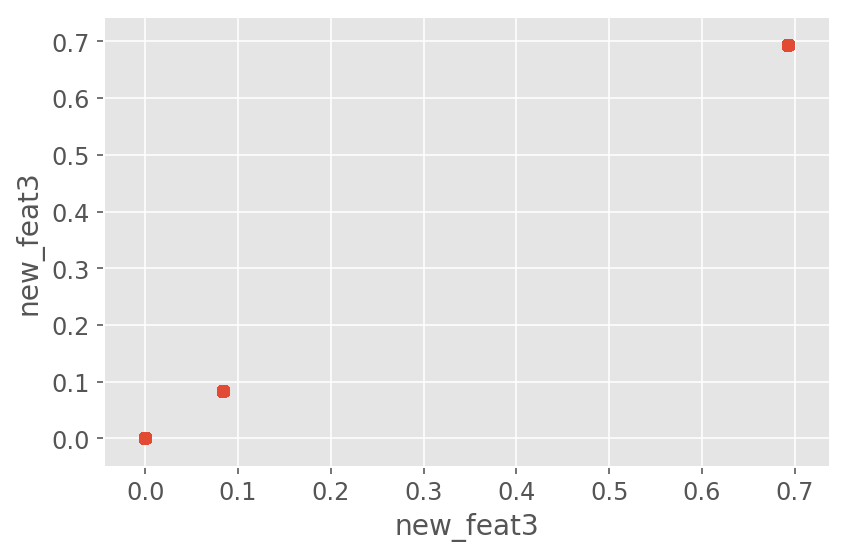

Saving figure label_Vs_scatter_plots-new_feat3new_feat4


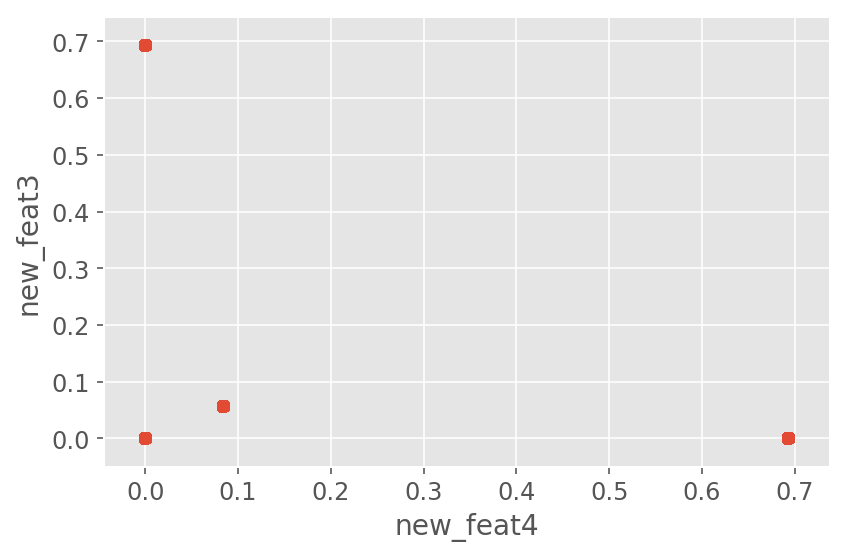

Saving figure label_Vs_scatter_plots-new_feat3new_feat5


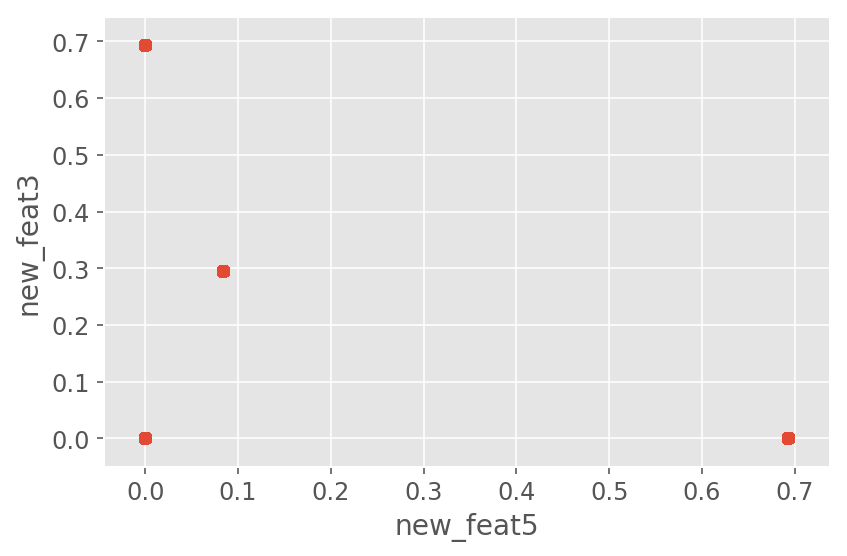

Saving figure label_Vs_scatter_plots-new_feat3new_feat6


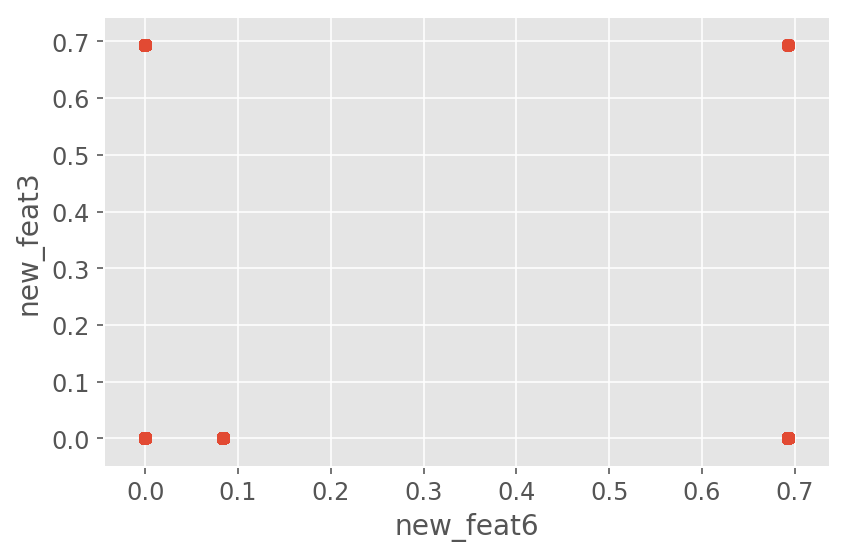

Saving figure label_Vs_scatter_plots-new_feat4I1


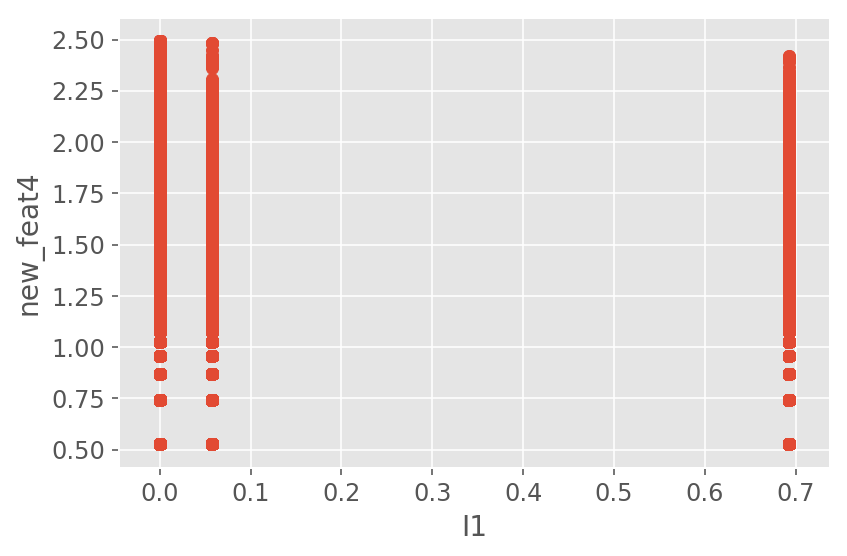

Saving figure label_Vs_scatter_plots-new_feat4I2


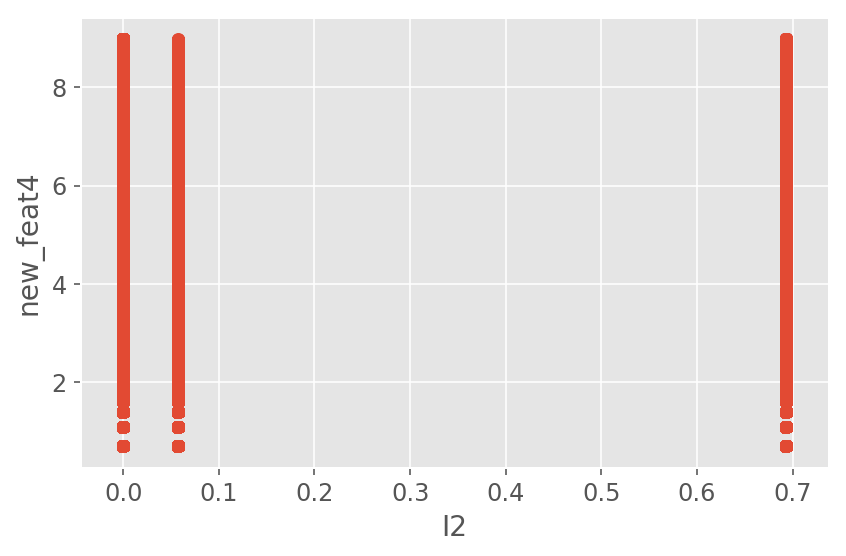

Saving figure label_Vs_scatter_plots-new_feat4I3


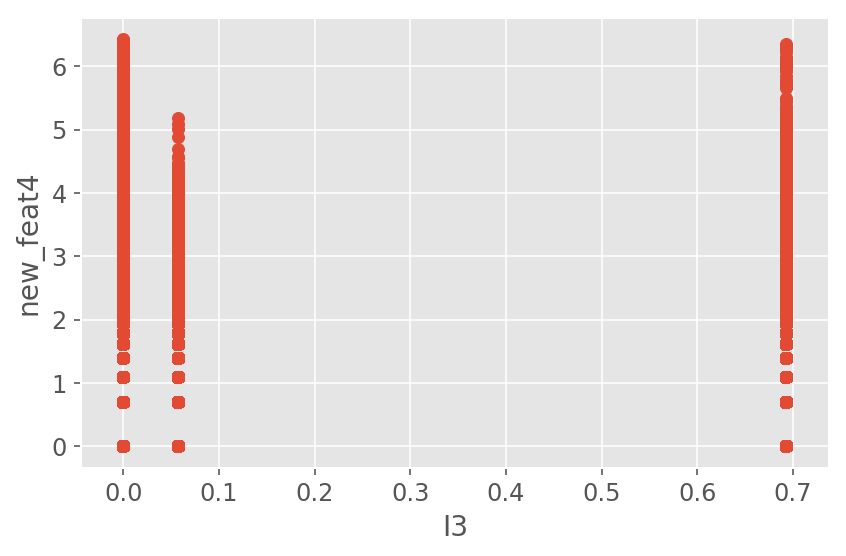

Saving figure label_Vs_scatter_plots-new_feat4I4


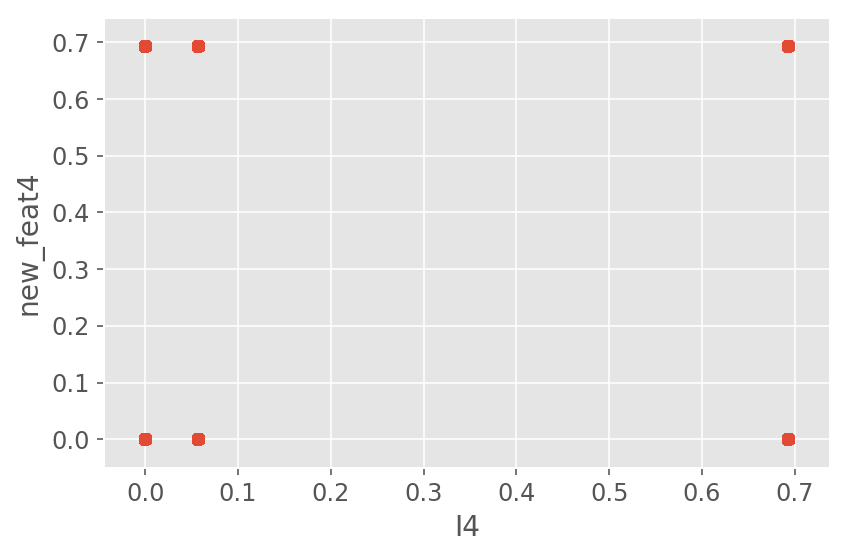

Saving figure label_Vs_scatter_plots-new_feat4I5


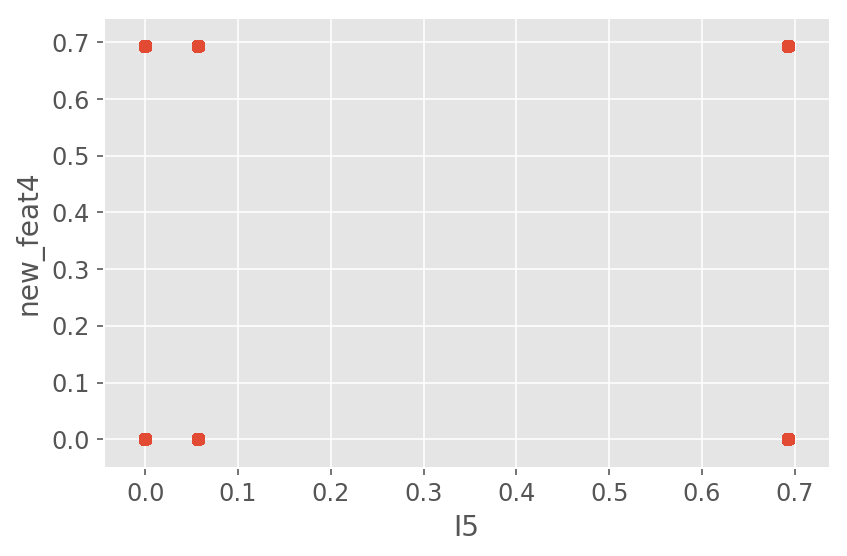

Saving figure label_Vs_scatter_plots-new_feat4I6


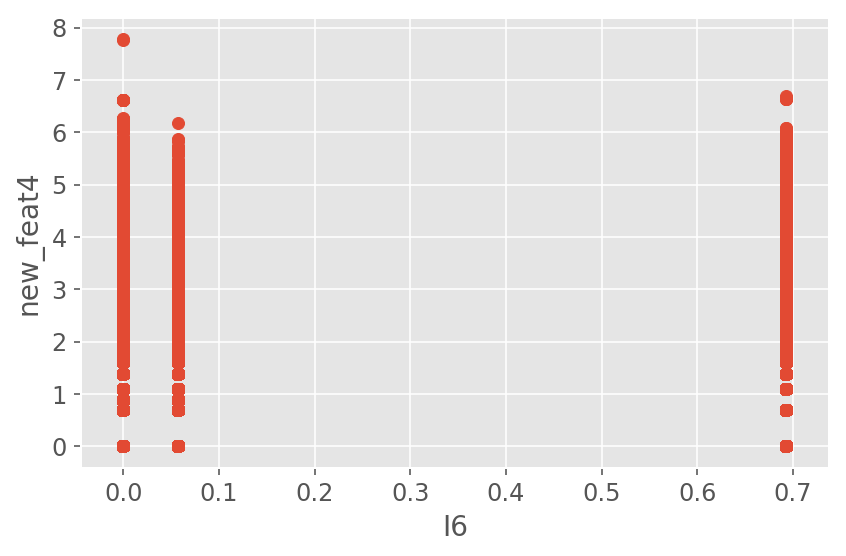

Saving figure label_Vs_scatter_plots-new_feat4I7


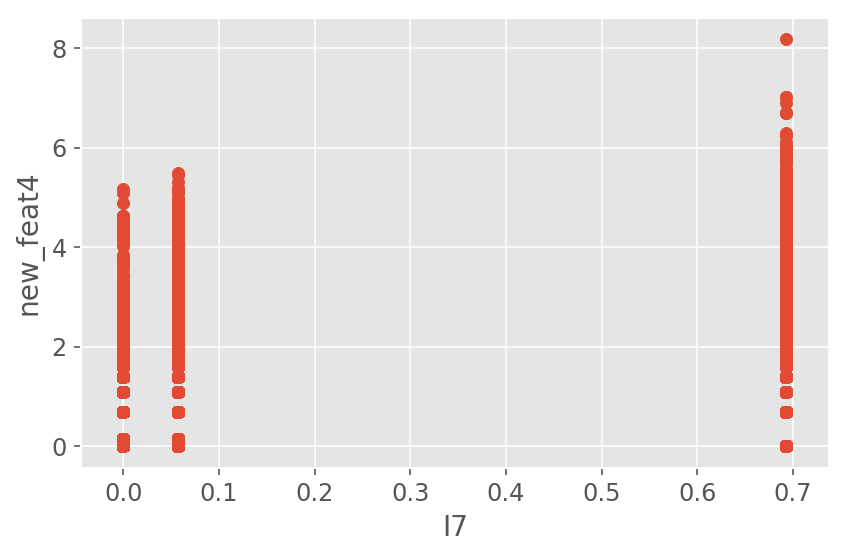

Saving figure label_Vs_scatter_plots-new_feat4I8


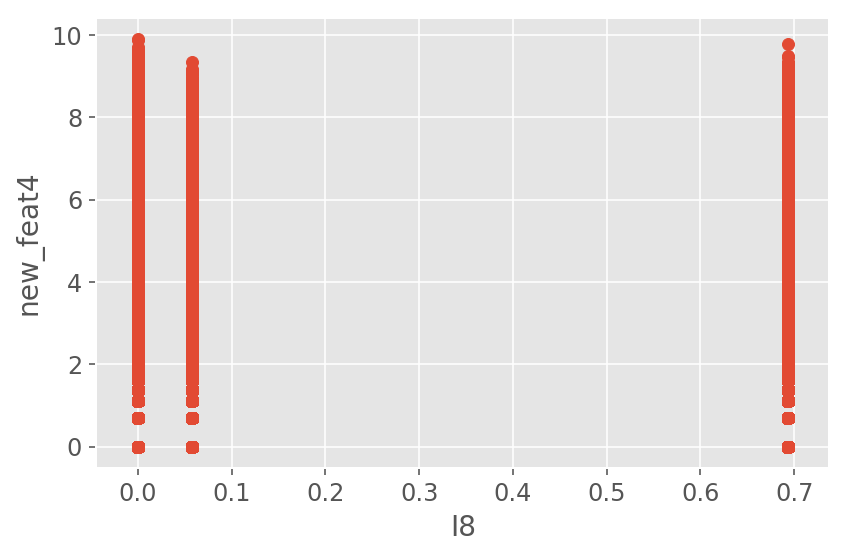

Saving figure label_Vs_scatter_plots-new_feat4I10


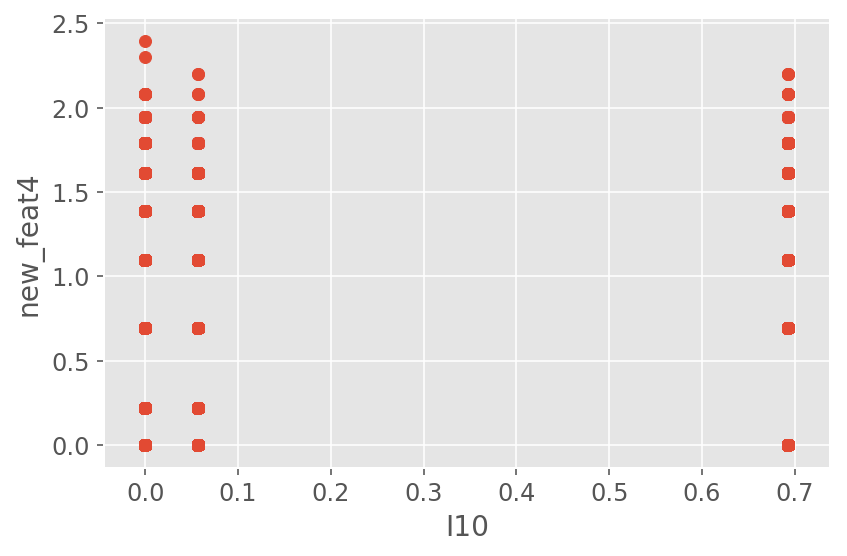

Saving figure label_Vs_scatter_plots-new_feat4I11


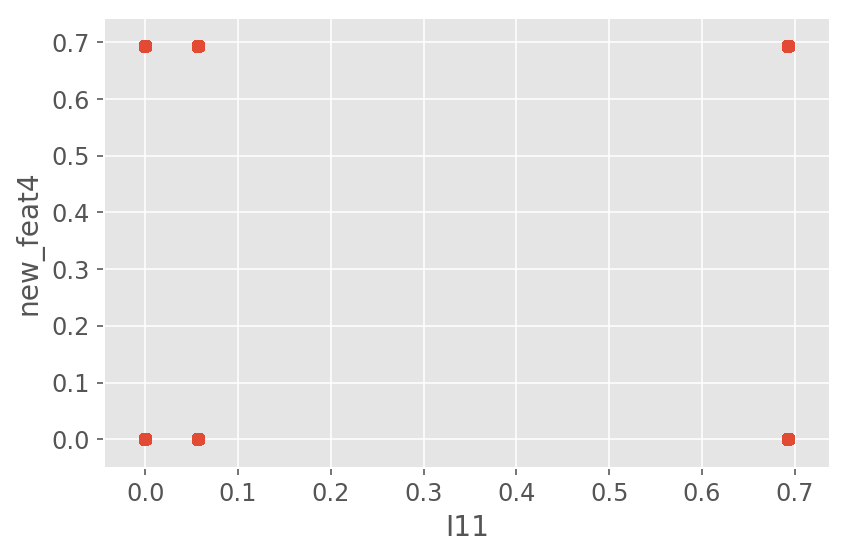

Saving figure label_Vs_scatter_plots-new_feat4I12


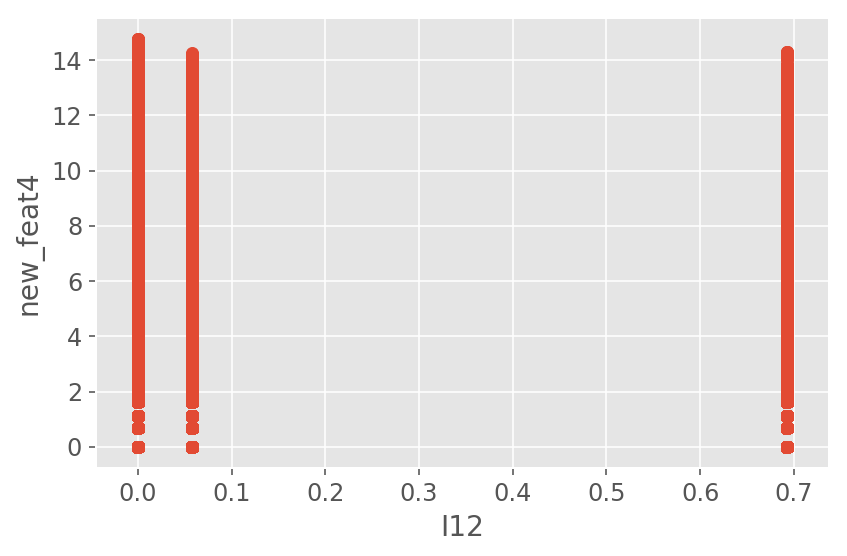

Saving figure label_Vs_scatter_plots-new_feat4I13


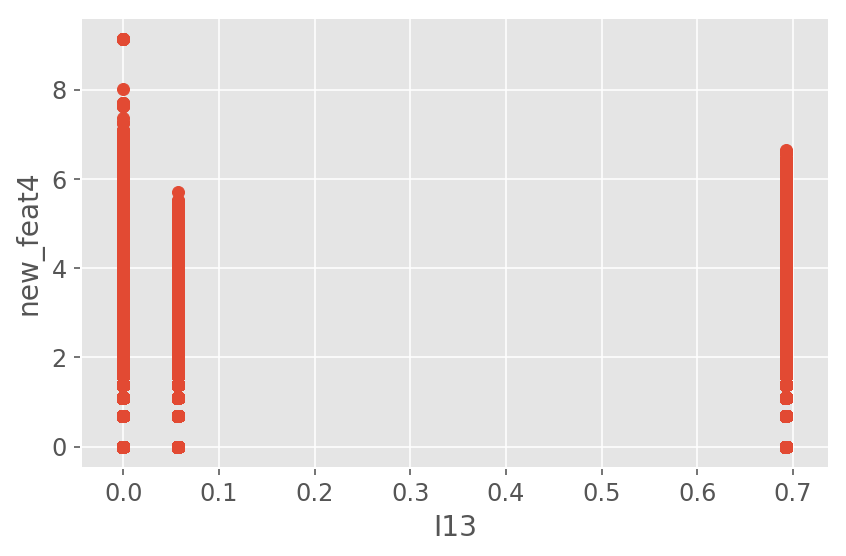

Saving figure label_Vs_scatter_plots-new_feat4new_feat1


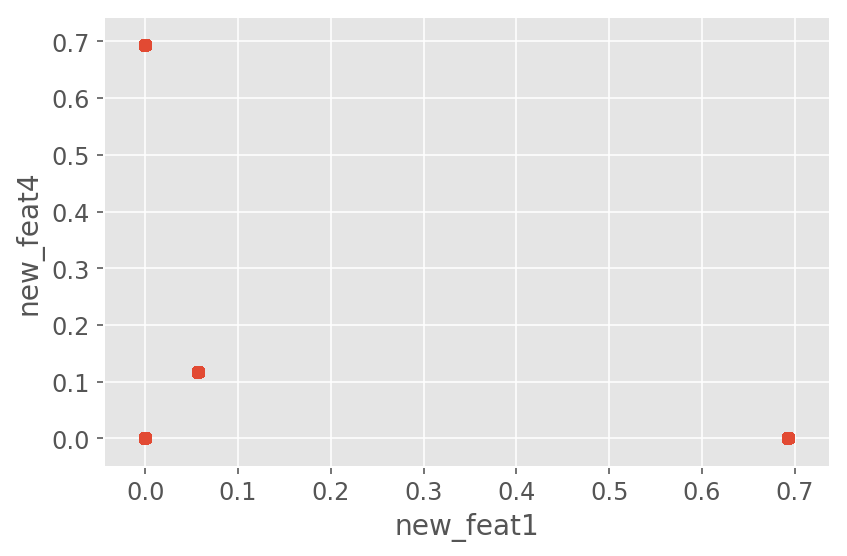

Saving figure label_Vs_scatter_plots-new_feat4new_feat2


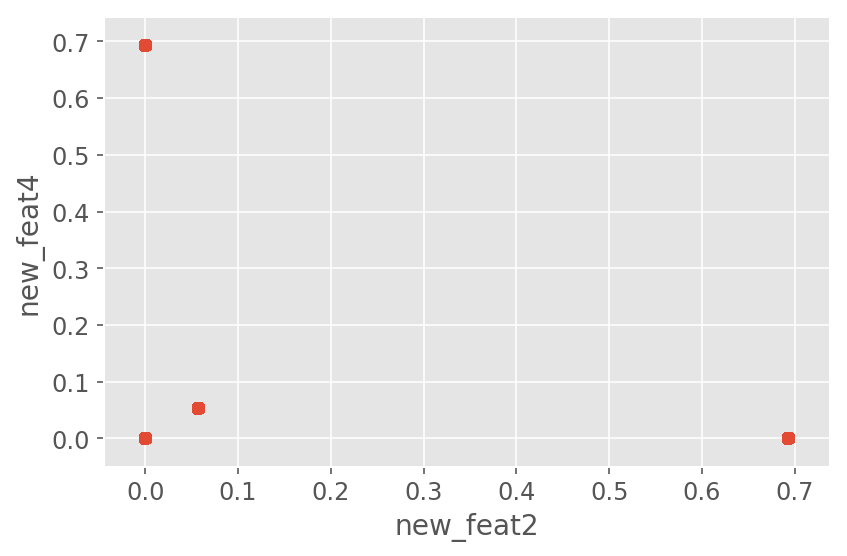

Saving figure label_Vs_scatter_plots-new_feat4new_feat3


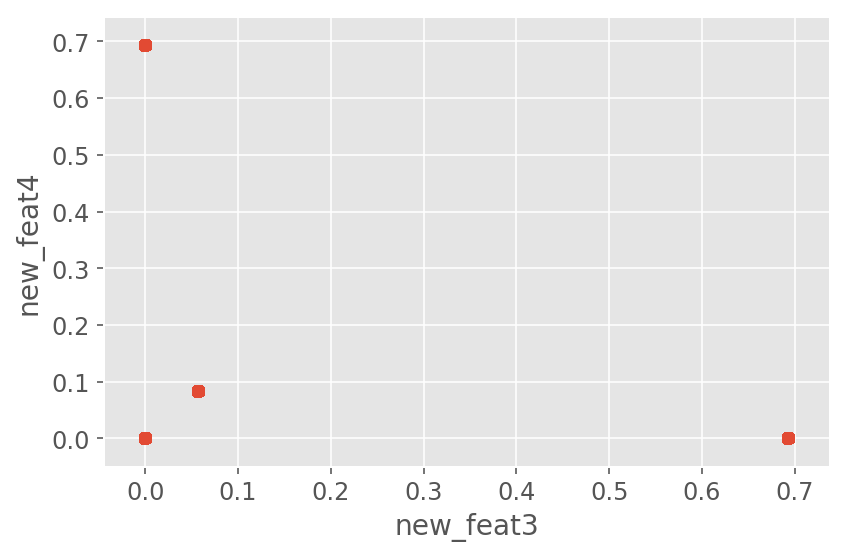

Saving figure label_Vs_scatter_plots-new_feat4new_feat4


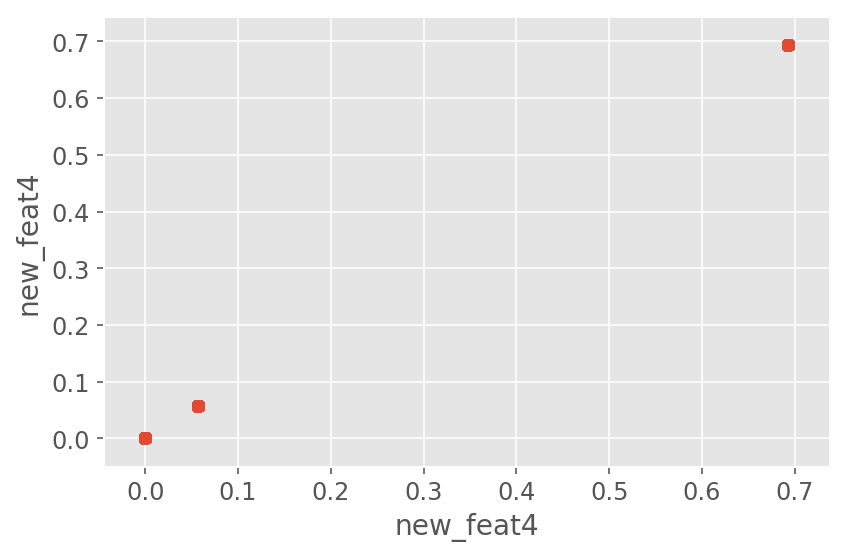

Saving figure label_Vs_scatter_plots-new_feat4new_feat5


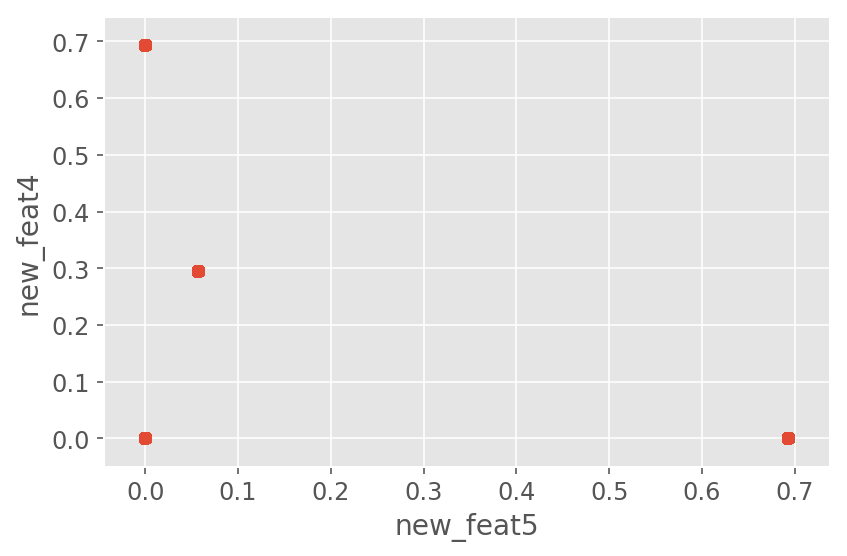

Saving figure label_Vs_scatter_plots-new_feat4new_feat6


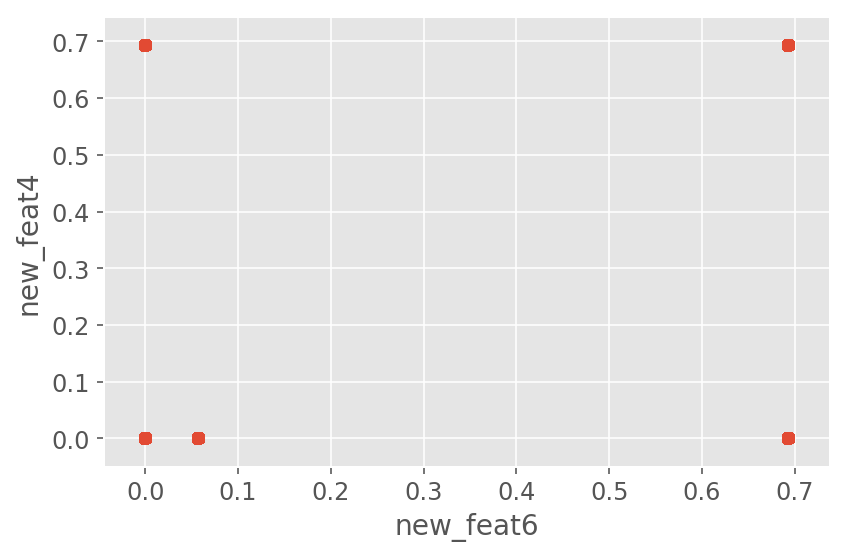

Saving figure label_Vs_scatter_plots-new_feat5I1


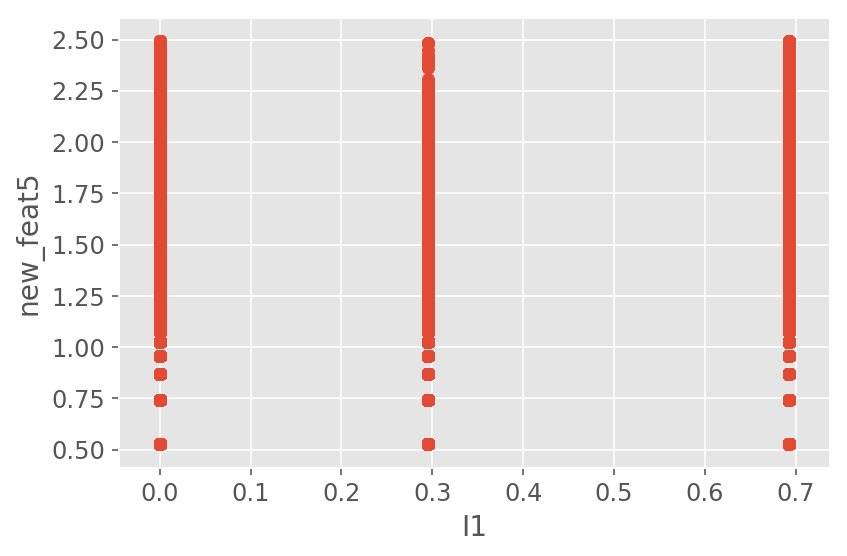

Saving figure label_Vs_scatter_plots-new_feat5I2


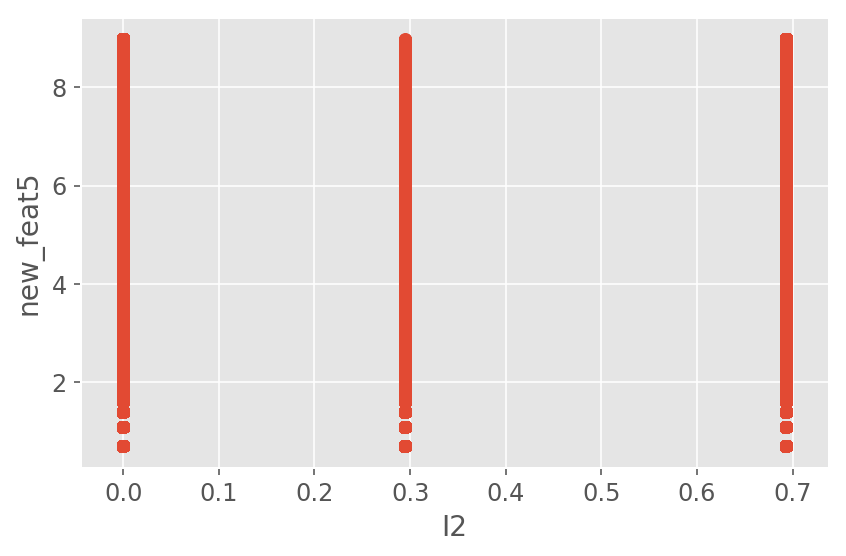

Saving figure label_Vs_scatter_plots-new_feat5I3


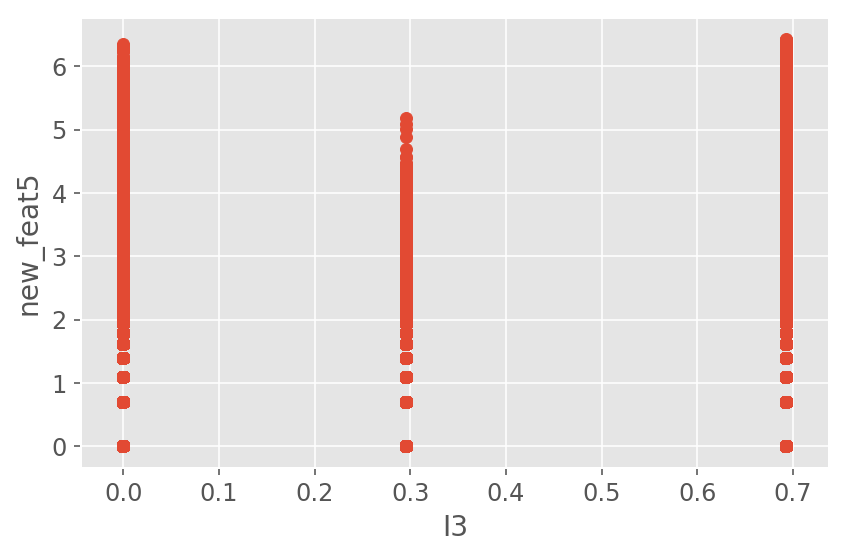

Saving figure label_Vs_scatter_plots-new_feat5I4


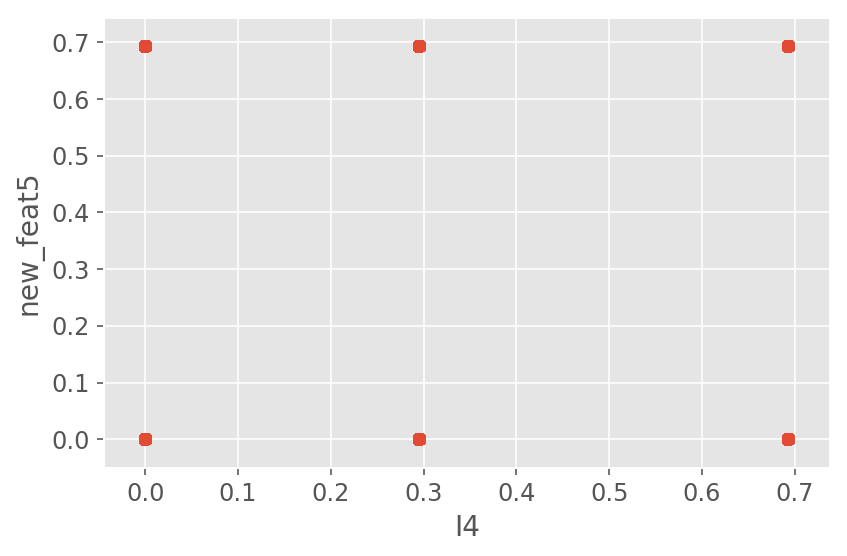

Saving figure label_Vs_scatter_plots-new_feat5I5


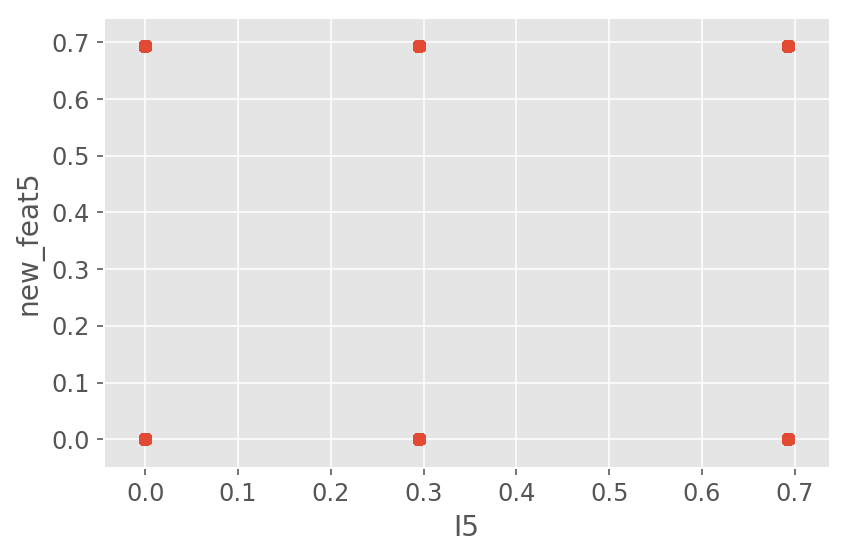

Saving figure label_Vs_scatter_plots-new_feat5I6


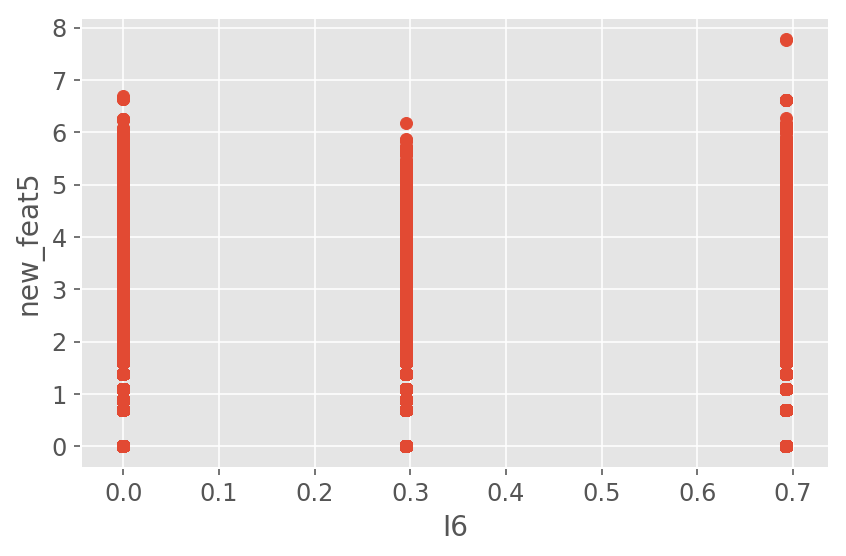

Saving figure label_Vs_scatter_plots-new_feat5I7


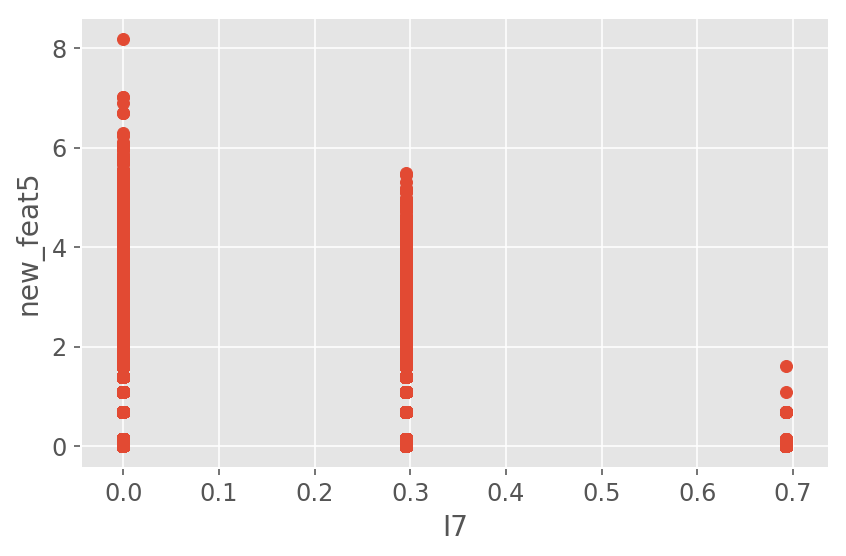

Saving figure label_Vs_scatter_plots-new_feat5I8


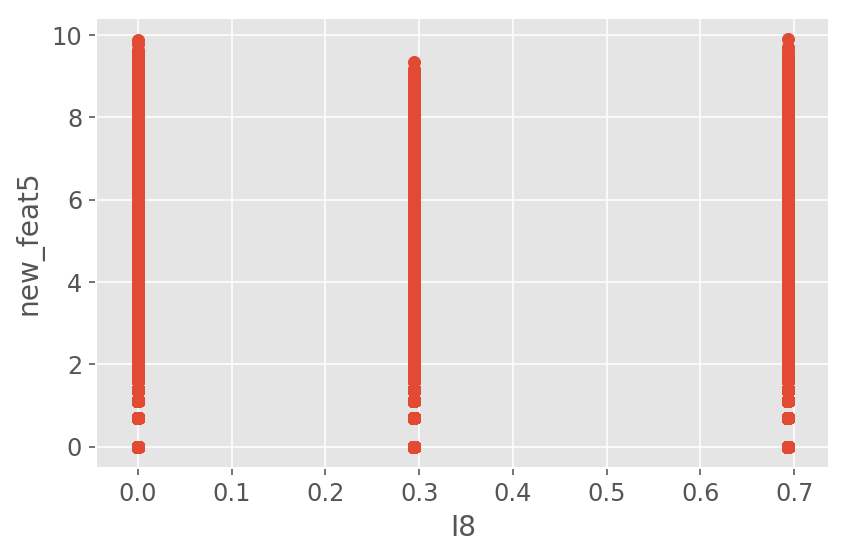

Saving figure label_Vs_scatter_plots-new_feat5I10


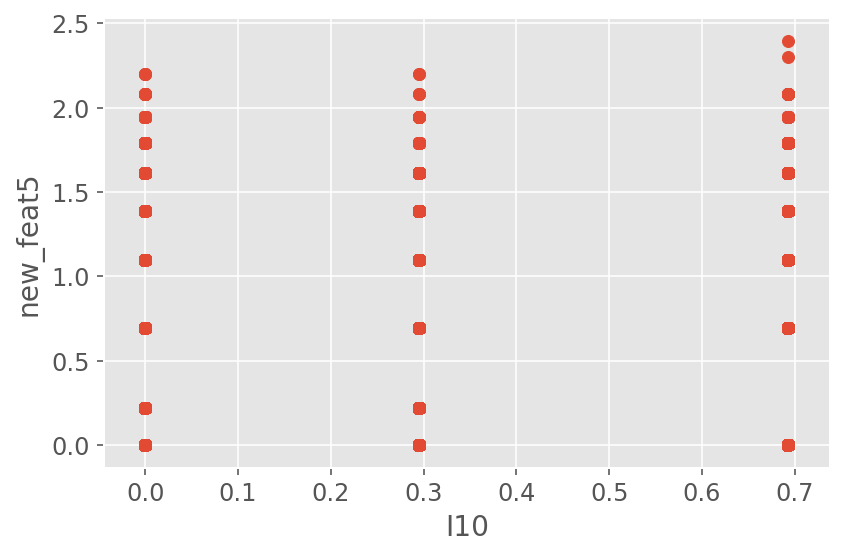

Saving figure label_Vs_scatter_plots-new_feat5I11


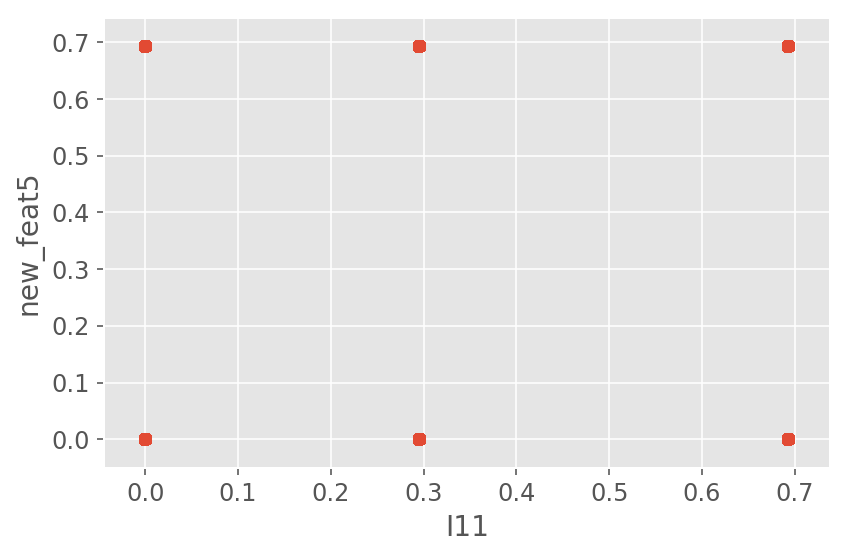

Saving figure label_Vs_scatter_plots-new_feat5I12


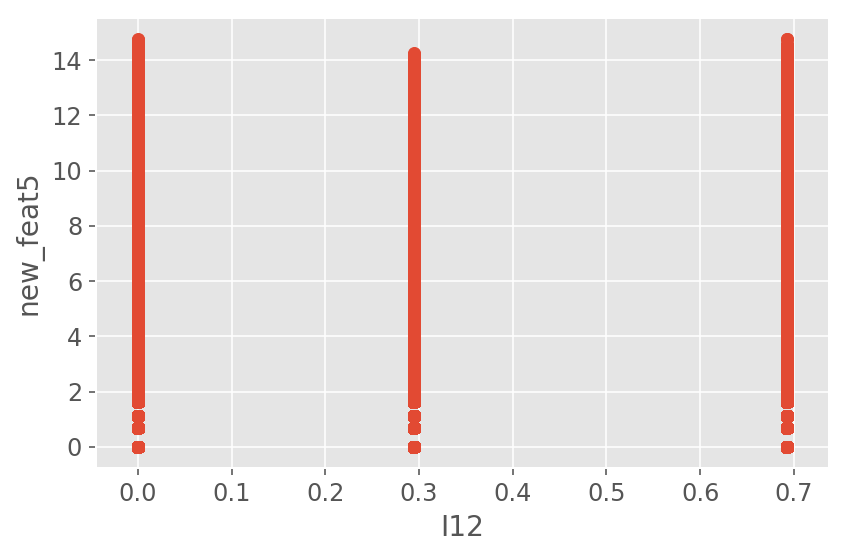

Saving figure label_Vs_scatter_plots-new_feat5I13


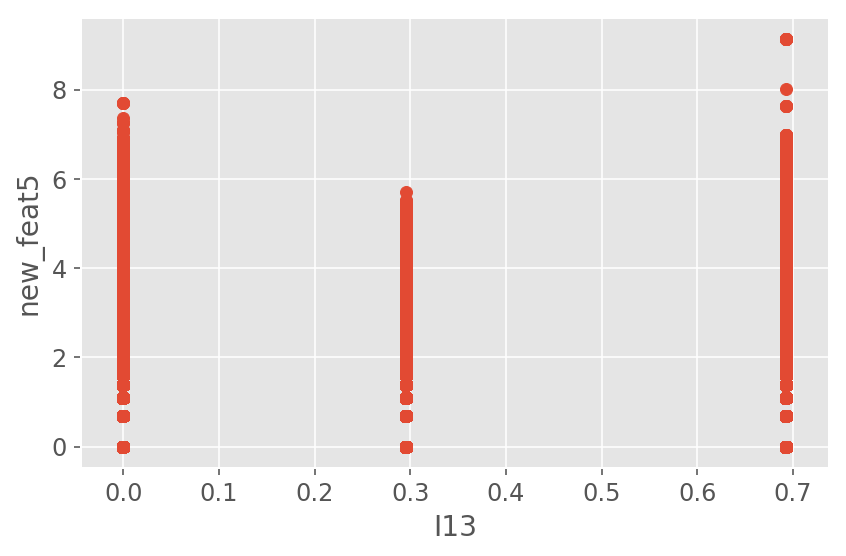

Saving figure label_Vs_scatter_plots-new_feat5new_feat1


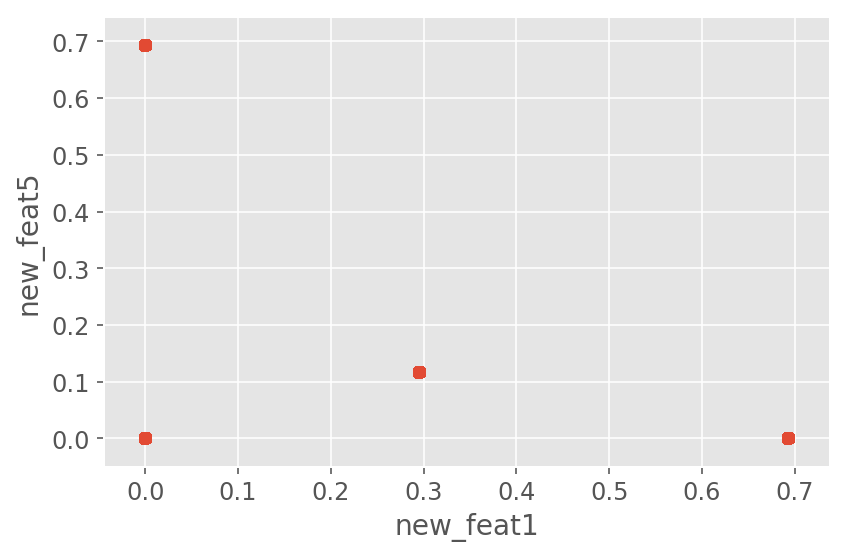

Saving figure label_Vs_scatter_plots-new_feat5new_feat2


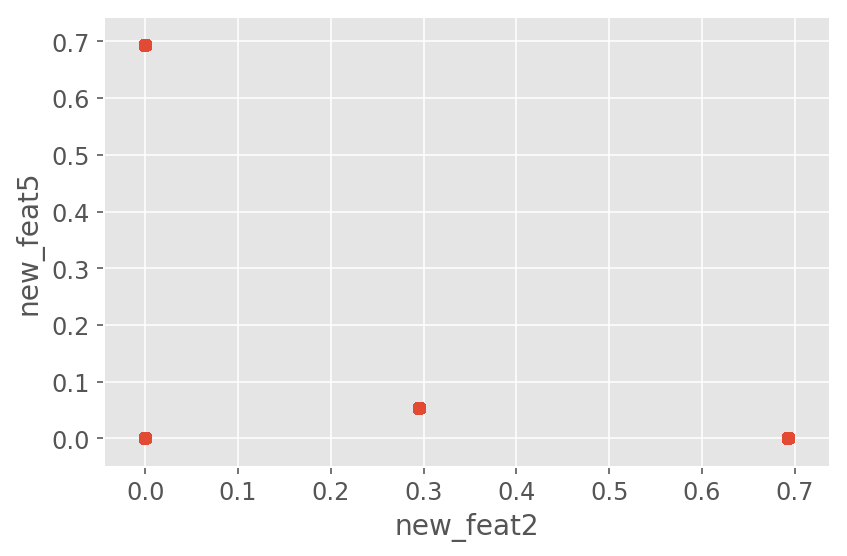

Saving figure label_Vs_scatter_plots-new_feat5new_feat3


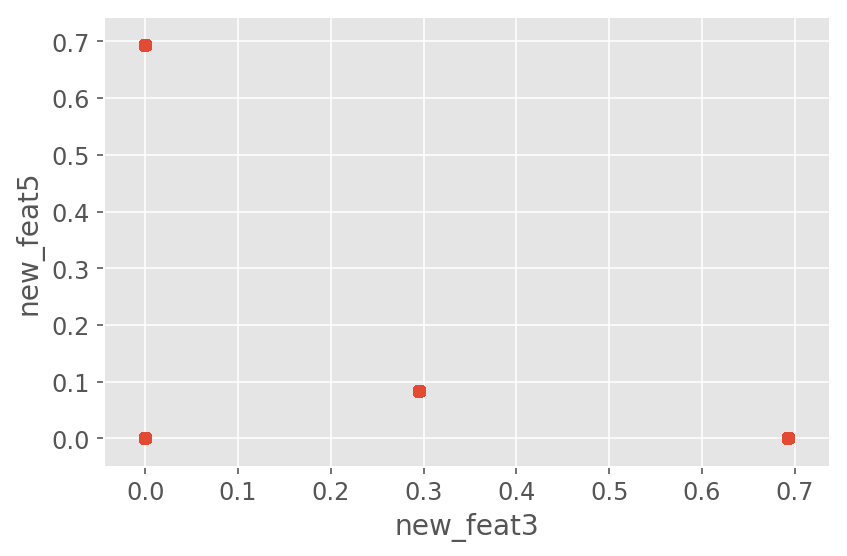

Saving figure label_Vs_scatter_plots-new_feat5new_feat4


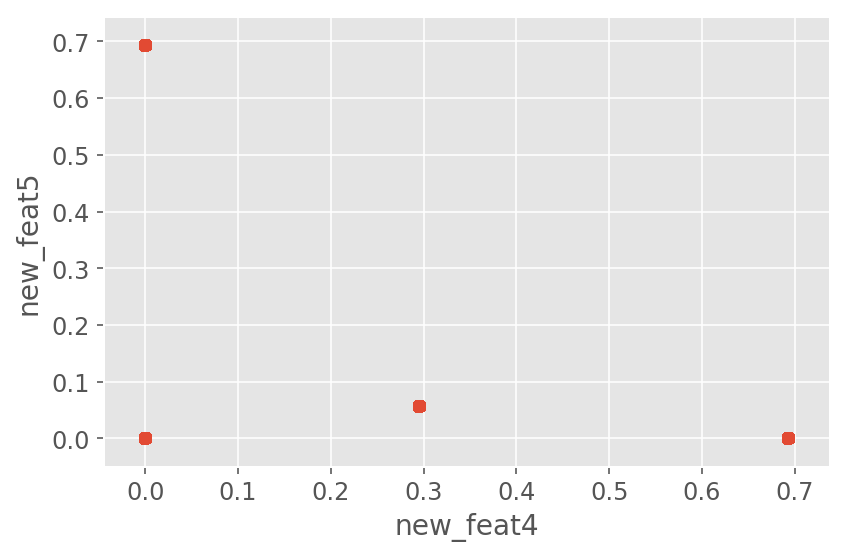

Saving figure label_Vs_scatter_plots-new_feat5new_feat5


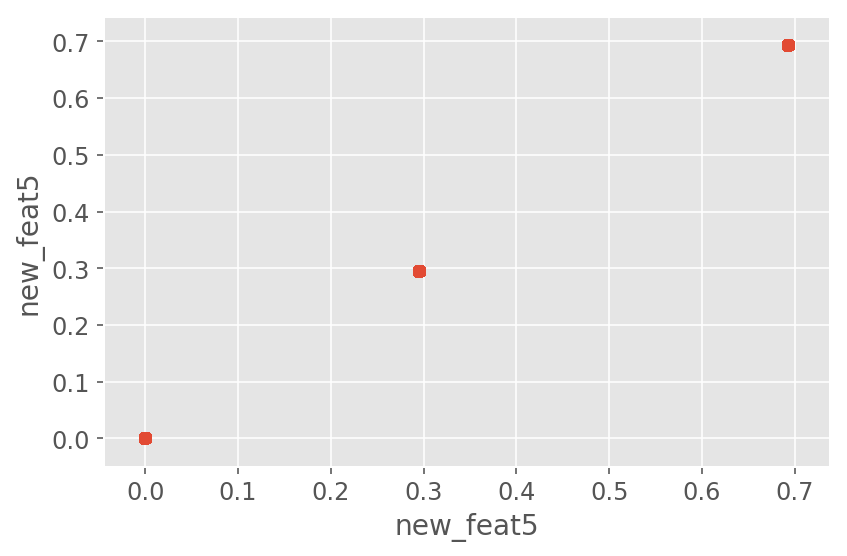

Saving figure label_Vs_scatter_plots-new_feat5new_feat6


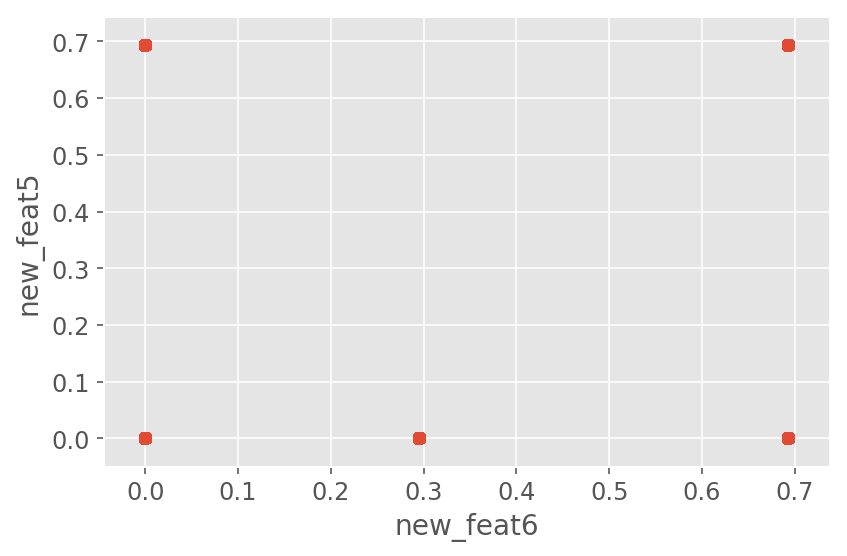

Saving figure label_Vs_scatter_plots-new_feat6I1


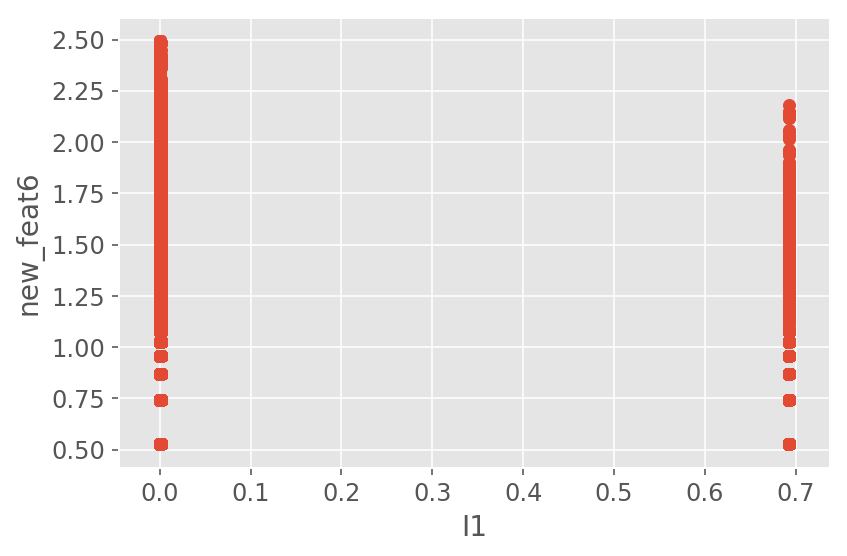

Saving figure label_Vs_scatter_plots-new_feat6I2


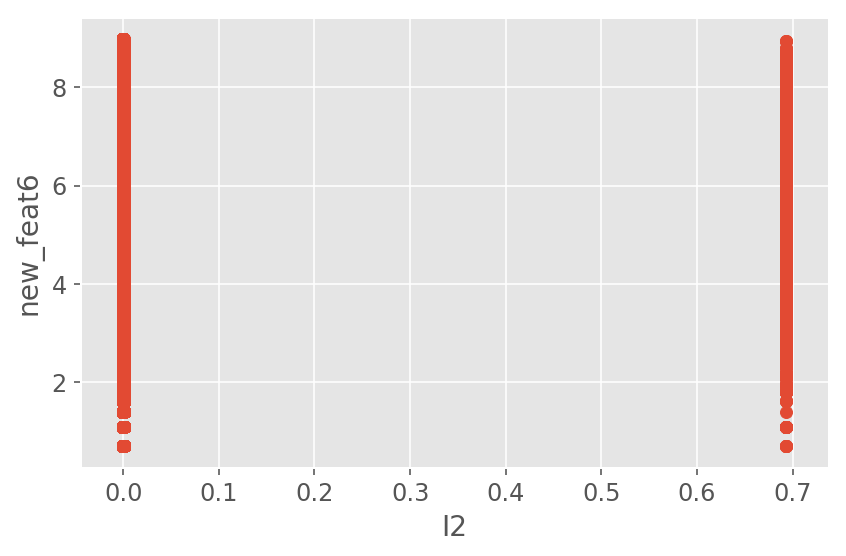

Saving figure label_Vs_scatter_plots-new_feat6I3


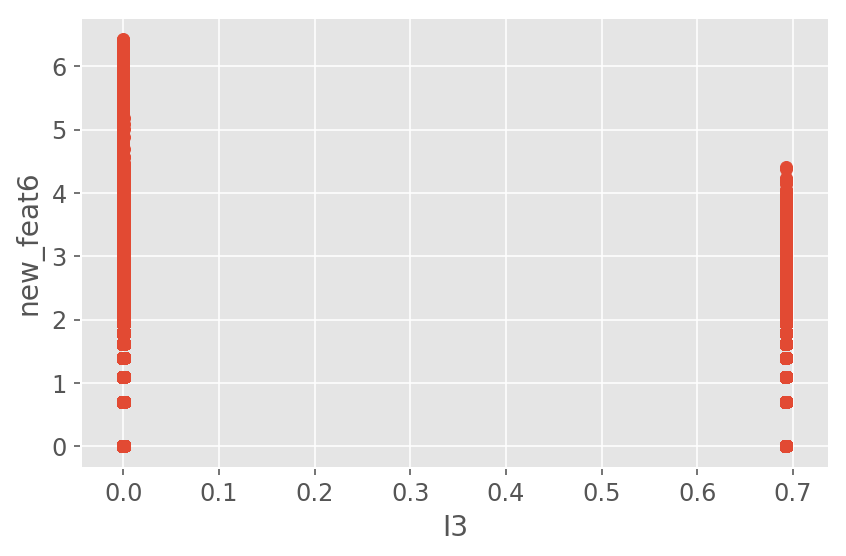

Saving figure label_Vs_scatter_plots-new_feat6I4


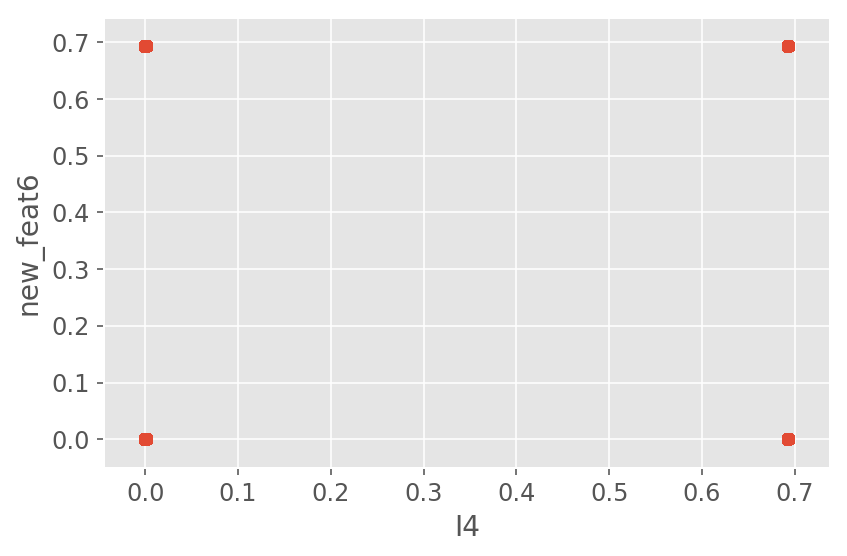

Saving figure label_Vs_scatter_plots-new_feat6I5


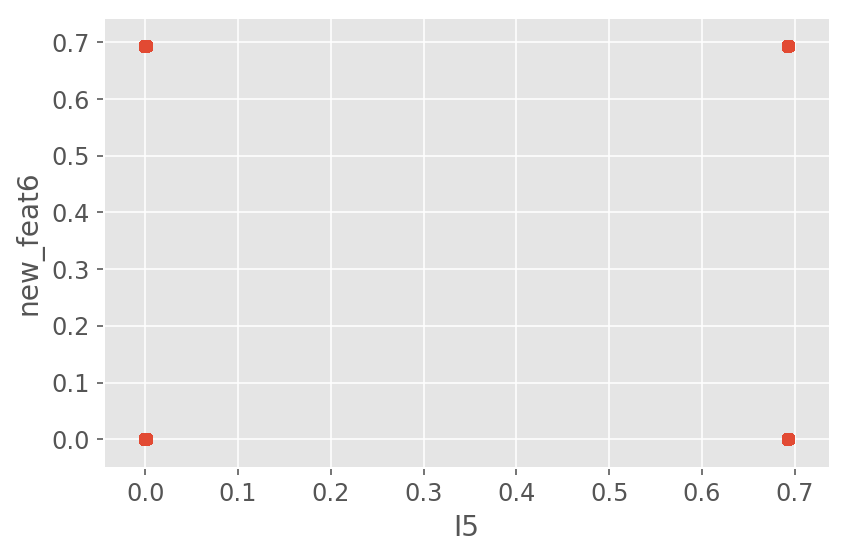

Saving figure label_Vs_scatter_plots-new_feat6I6


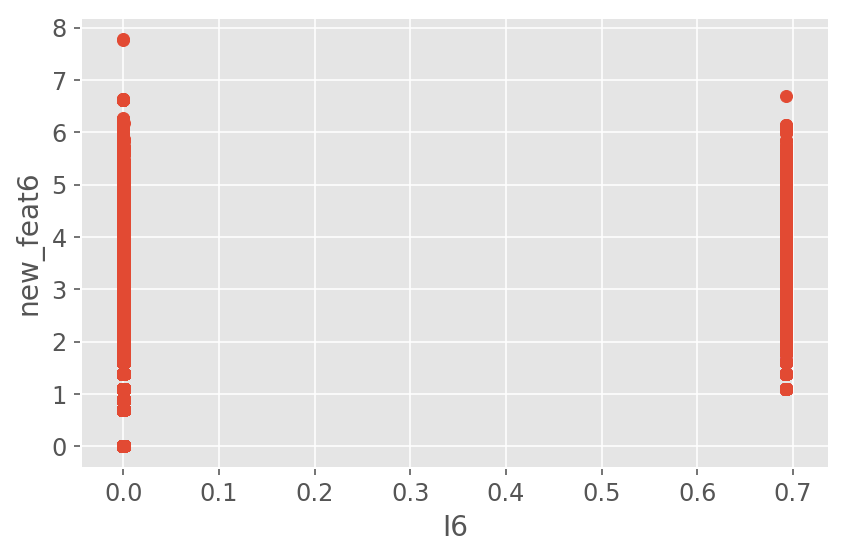

Saving figure label_Vs_scatter_plots-new_feat6I7


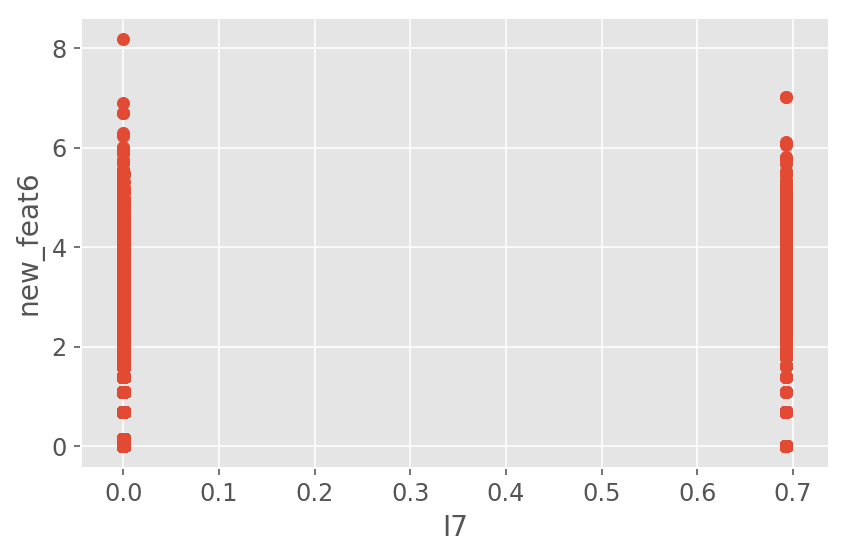

Saving figure label_Vs_scatter_plots-new_feat6I8


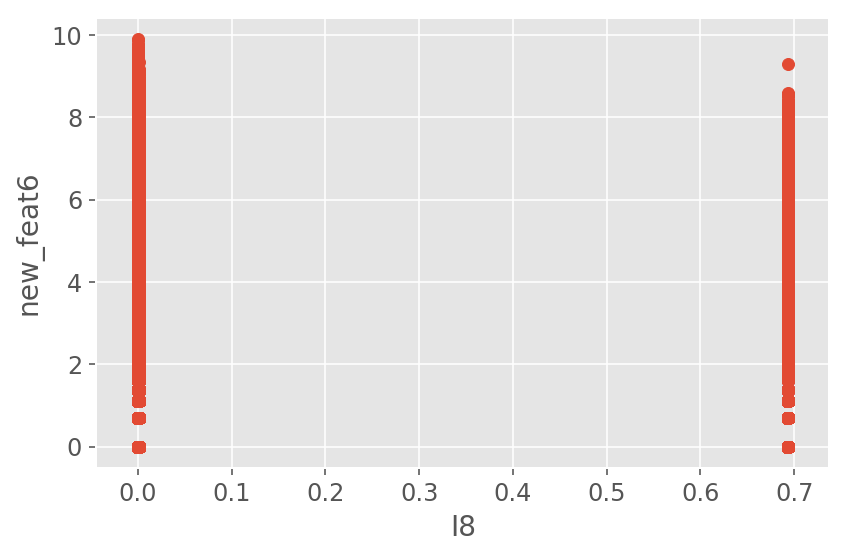

Saving figure label_Vs_scatter_plots-new_feat6I10


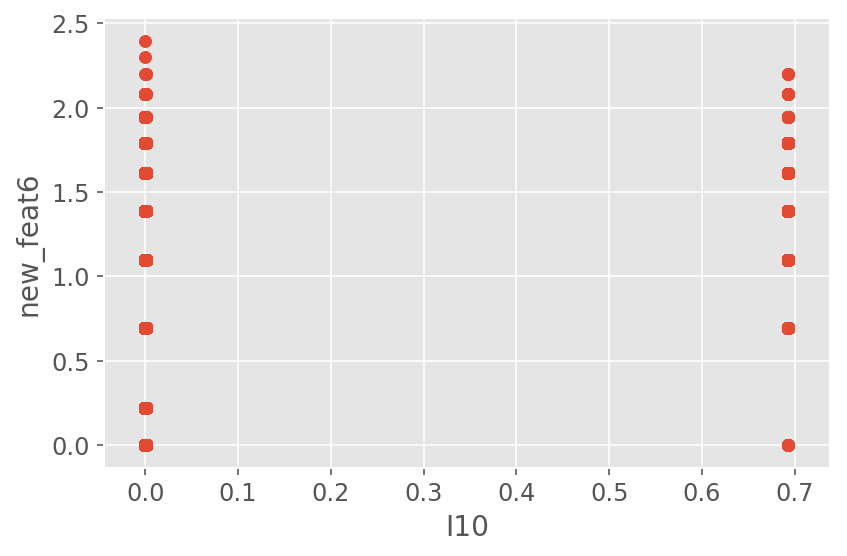

Saving figure label_Vs_scatter_plots-new_feat6I11


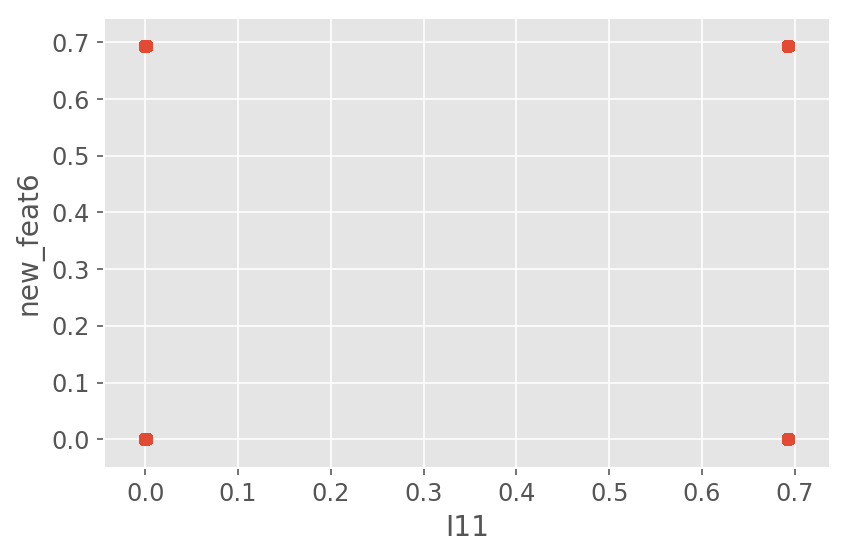

Saving figure label_Vs_scatter_plots-new_feat6I12


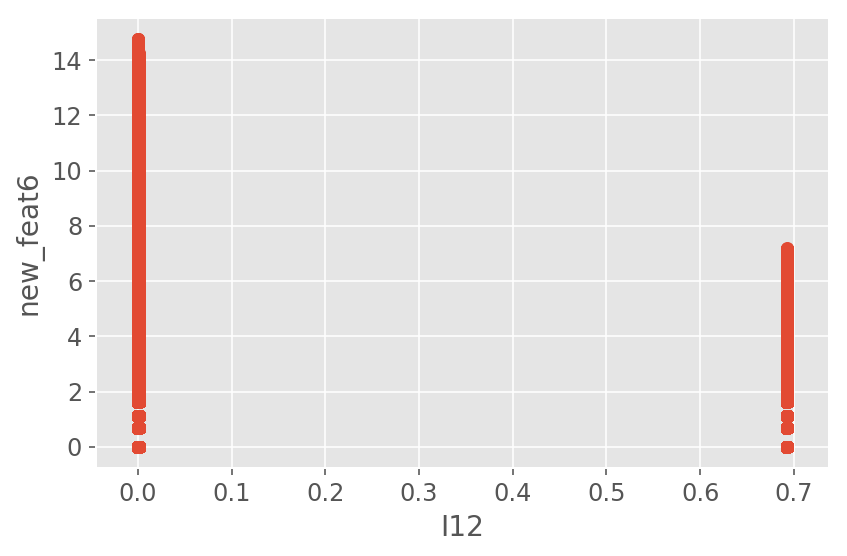

Saving figure label_Vs_scatter_plots-new_feat6I13


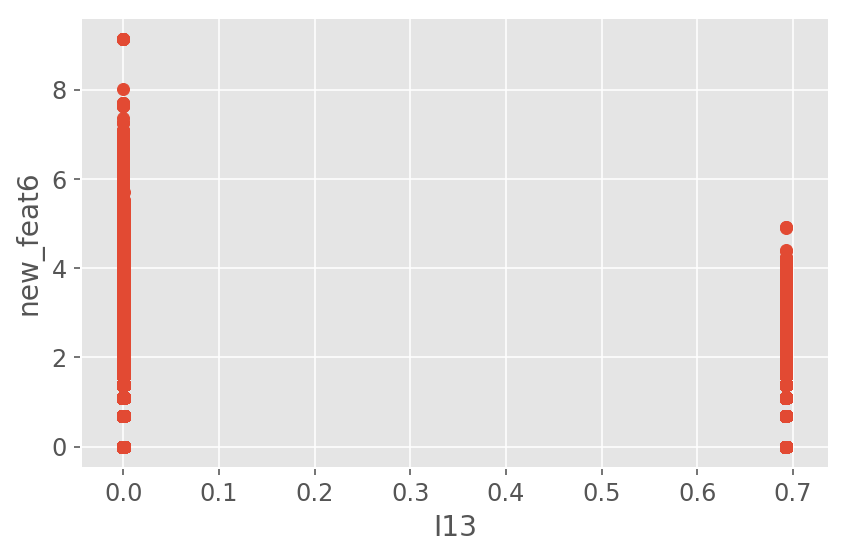

Saving figure label_Vs_scatter_plots-new_feat6new_feat1


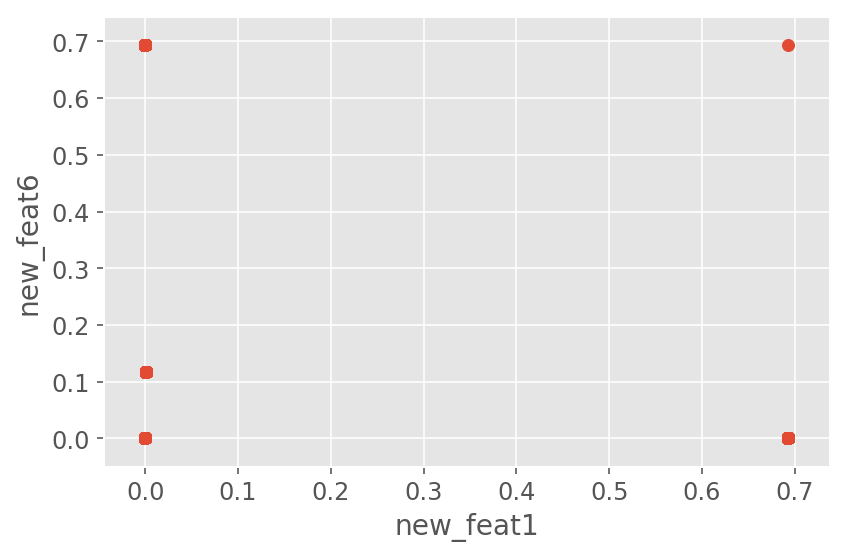

Saving figure label_Vs_scatter_plots-new_feat6new_feat2


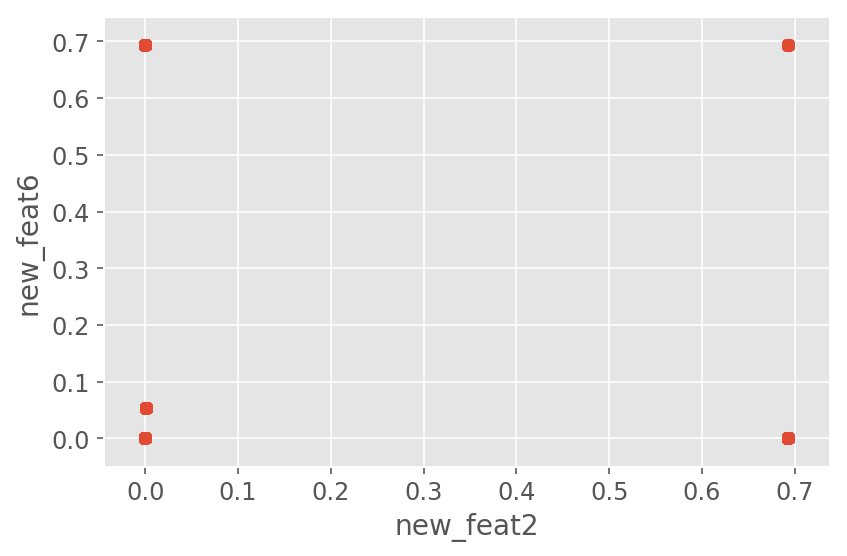

Saving figure label_Vs_scatter_plots-new_feat6new_feat3


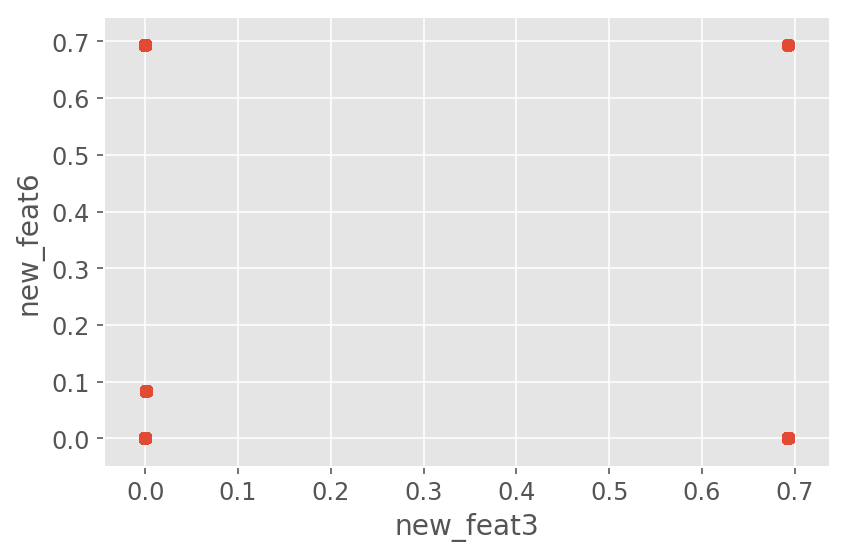

Saving figure label_Vs_scatter_plots-new_feat6new_feat4


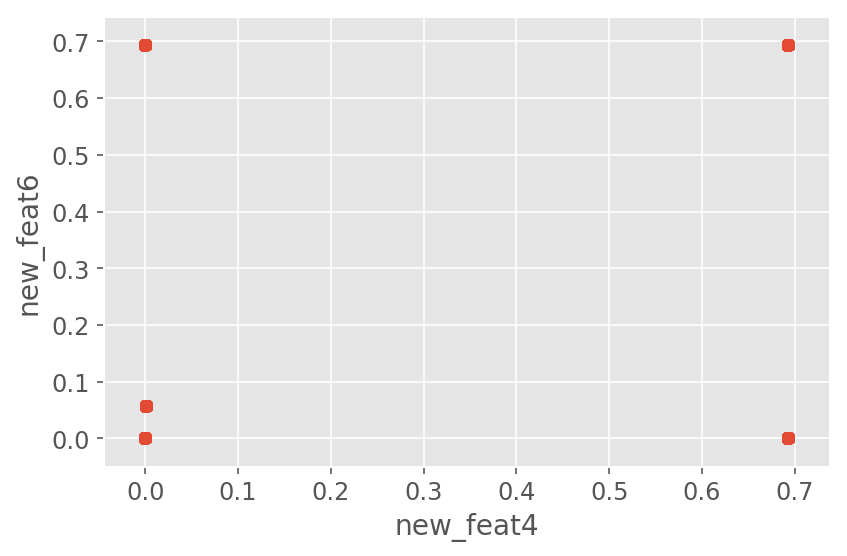

Saving figure label_Vs_scatter_plots-new_feat6new_feat5


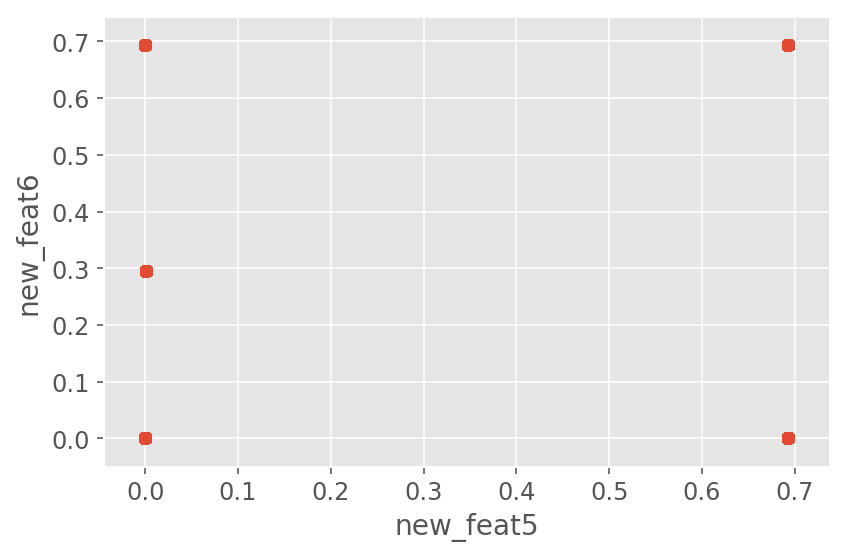

Saving figure label_Vs_scatter_plots-new_feat6new_feat6


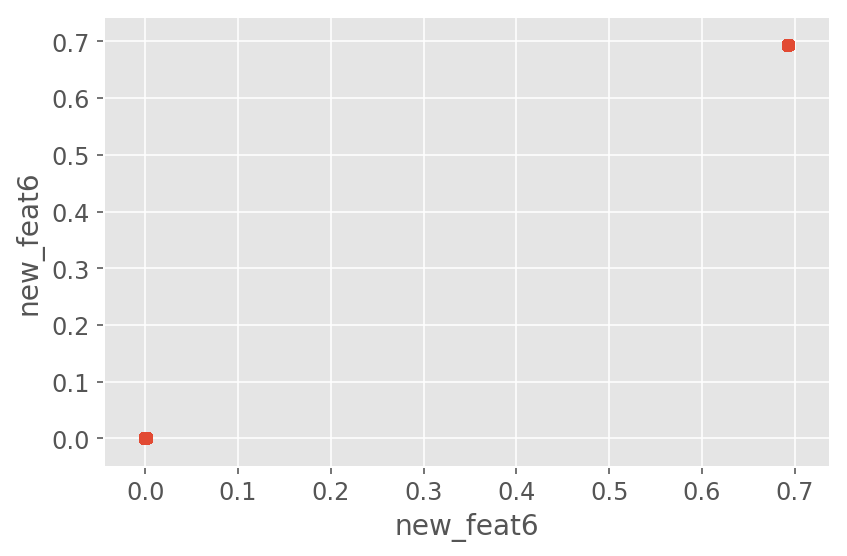

In [114]:
## Takes too much time
num_wo_label = df3[int_cols9]
for num in num_wo_label:
    for num2 in num_wo_label:
        plt.scatter(x=df3[num], y=df3[num2],)
        plt.ylabel(num)
        plt.xlabel(num2)
        save_fig('label_Vs_scatter_plots-' + num + num2)
        plt.show()

In [1]:
# Bin and plot col2 - Method #2
series = pd.Series(df3['I1'])
bins   = pd.cut(series, [0, 1, 2, 4, 10, 25, 50, 75, 100, 500, 1000, 10000, 100000])
fig, ax = plt.subplots()
pd.Series(bins).value_counts().plot(kind='bar')
save_fig('bin_plots_col')
plt.xlabel('I1 - Bin value')
plt.ylabel('Histogram count')

NameError: name 'pd' is not defined

In [ ]:
num_wo_label = df3[int_cols9]
for num in num_wo_label:
    for num2 in num_wo_label:
        sns.set_context("notebook", font_scale=1.1)
        sns.set_style("ticks")
        sns.lmplot(num, num2,
           data=df3,
           fit_reg=False,
           hue="Label",  
           scatter_kws={"marker": "D", "s": 100})
        plt.title('Histogram')
        plt.xlabel(num)
        plt.ylabel(num2)
        save_fig('bin_plots_Int_col-' + num + num2)

In [ ]:
# Bin and plot col2 - Method #1
series = pd.Series(df3['I13'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=200, bottom=0.1, color = 'blue')
ax.set_yscale('log')
plt.xlabel('I3 - Bin value')
plt.ylabel('Histogram count - Log scale')
save_fig('bin_plots_Int_col "I13"')

In [ ]:
# Bin and plot col2 - Method #1
series = pd.Series(df3['I12'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=200, bottom=0.1, color = 'blue')
ax.set_yscale('log')
plt.xlabel('I12 - Bin value')
plt.ylabel('Histogram count - Log scale')
save_fig('bin_plots_Int_col "I12"')

In [ ]:
# Bin and plot col2 - Method #1
series = pd.Series(df3['I11'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1, color = 'purple')
ax.set_yscale('log')
plt.xlabel('I11 - Bin value')
plt.ylabel('Histogram count - Log scale')
save_fig('bin_plots_Int_col "I11"')

In [ ]:
# Bin and plot col2 - Method #1
series = pd.Series(df3['I10'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=50, bottom=0.1, color = 'grey')
ax.set_yscale('log')
plt.xlabel('I10 - Bin value')
plt.ylabel('Histogram count - Log scale')
save_fig('bin_plots_Int_col "I10"')

In [ ]:
# Bin and plot col2 - Method #1
series = pd.Series(df3['I9'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=70, bottom=0.1, color = 'pink')
ax.set_yscale('log')
plt.xlabel('I9 - Bin value')
plt.ylabel('Histogram count - Log scale')
save_fig('bin_plots_Int_col "I9"')

In [ ]:
# Bin and plot col2 - Method #1
series = pd.Series(df3['I8'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=80, bottom=0.1, color = 'red')
ax.set_yscale('log')
plt.xlabel('I8 - Bin value')
plt.ylabel('Histogram count - Log scale')
save_fig('bin_plots_Int_col "I8"')

In [ ]:
# Bin and plot col2 - Method #1
series = pd.Series(df3['I7'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=50, bottom=0.1, color = 'skyblue')
ax.set_yscale('log')
plt.xlabel('I7 - Bin value')
plt.ylabel('Histogram count - Log scale')
save_fig('bin_plots_Int_col "I7"')

In [ ]:
# Bin and plot col2 - Method #1
series = pd.Series(df3['I6'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=60, bottom=0.1, color = 'blue')
ax.set_yscale('log')
plt.xlabel('I6 - Bin value')
plt.ylabel('Histogram count - Log scale')
save_fig('bin_plots_Int_col "I6"')

In [ ]:
# Bin and plot col2 - Method #1
series = pd.Series(df3['I5'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1, color = 'brown')
ax.set_yscale('log')
plt.xlabel('I5 - Bin value')
plt.ylabel('Histogram count - Log scale')
save_fig('bin_plots_Int_col "I7"')

In [ ]:
# Bin and plot col2 - Method #1
series = pd.Series(df3['I4'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1, color = 'darkblue')
ax.set_yscale('log')
plt.xlabel('I4 - Bin value')
plt.ylabel('Histogram count - Log scale')
save_fig('bin_plots_Int_col "I14"')

In [ ]:
# Bin and plot I4 - Method #1
series = pd.Series(df3['I3'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
plt.xlabel('I3 - Bin value')
plt.ylabel('Histogram count - Log scale')
save_fig('bin_plots_Int_col "I3"')

In [ ]:
# Bin and plot I2 - Method #1
series = pd.Series(df3['I2'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1, color = 'lightblue')
ax.set_yscale('log')
plt.xlabel('I2 - Bin value')
plt.ylabel('Histogram count - Log scale')
save_fig('bin_plots_Int_col "I2"')

In [ ]:
# Bin and plot col2 - Method #1
series = pd.Series(df3['I1'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1, color = 'lightpink')
ax.set_yscale('log')
plt.xlabel('I1 - Bin value')
plt.ylabel('Histogram count - Log scale')
save_fig('bin_plots_Int_col "I1"')

In [ ]:
## prints out only numerical type columns
numeric_features = df3.select_dtypes(include=[np.number])
numeric_features.dtypes

In [ ]:
## Lists the top correclated features
corr = numeric_features.corr()

print (corr['Label'].sort_values(ascending=False)[:5], '\n')
print (corr['Label'].sort_values(ascending=False)[-5:])

In [ ]:
## number of unique values per total column count
def df_unique_percent(df):
    print ('shape: %d rows, %d cols\n' % df.shape)
    print ('\n------\n')
    total = df.shape[0]
    print ('column info:')
    for col in df.columns:
        total_nun = df[col].nunique()
        nun_percent = (float(total_nun)/total) * 100.0
        print ('* %s: %d unique vals, %d percent unique' % (
            col, 
            df[col].nunique(),
            nun_percent         
        ))
    print ('\n------\n')

In [ ]:
## This calculates the percentage of unique values
df_unique_percent(df3)

In [ ]:
def float_cat_freq(data):      
    #Filter categorical variables
    categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
    #Print frequency of categories
    for col in categorical_columns:
        print('\nFrequency of Categories for varible %s'%col)
        print(data[col].value_counts())

In [ ]:
float_cat_freq(df3)

In [ ]:
df3.dtypes

In [ ]:
## Number of nulls, distinct values, and counts per column
def df_counts(df):
    print('shape: %d rows, %d cols\n' % df.shape)
    print('column info:')
    for col in df.columns:
        print('* %s: %d nulls, %d unique vals, most common: %s' % (
            col, 
            df[col].isnull().sum(),
            df[col].nunique(),
            df[col].value_counts().head(2).to_dict()
            
        ))
    print('\n------\n')
## Number of nulls, distinct values, and counts per column

In [ ]:
## Nulls, unique values and most common of each column
df_counts(df3)

In [ ]:
## Percentage of nulls percentage total on each column
def df_null_percent(df):
    print('shape: %d rows, %d cols\n' % df.shape)
    print('\n------\n')
    total = df.shape[0]
    print('column info:')
    for col in df.columns:
        total_null = df[col].isnull().sum()
        percent_null = (float(total_null)/total) * 100.0
        print('* %s: %d nulls, %d percent nulls' % (col, total_null,percent_null))      
        if(percent_null > 35.0):
            print('converting column')
            df[col].fillna(0,inplace=True)
            df[col] = df[col].map(lambda x: 1 if x == 0 else 0)
    print('\n------\n')

In [ ]:
## This calculates the percentage of null values
df_null_percent(df3)

In [ ]:
df3.shape

In [ ]:
## correlation table
df3.corr()

In [ ]:
#df2.head(5)

In [ ]:
def correlation_heat_map(df):
    corrs = df.corr()
    # Set the custom matplotlib figure size:
    fig, ax = plt.subplots(figsize=(25,10))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    save_fig("correlation_heat_map_plots_day_4_df3")
    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

In [ ]:
correlation_heat_map(df3)
#save_fig("correlation_heat_map_plots")
plt.show()

In [ ]:
df3.dtypes

In [ ]:
df3.describe()

In [ ]:
df3.head()

In [ ]:
df3.isnull()